In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [3]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_ph_sphs.csv', index_col=0)
dff = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_ph_sphs.csv', index_col=0)
dff

travel time   distance  hour of day  living_street  motorway  \
0             1163  21671.733           18            0.0       0.0   
1              347   2047.629           21            0.0       0.0   
2              720  10175.882           19            0.0       0.0   
3              355   2337.951           16            0.0       0.0   
4              356   3083.625           17            0.0       0.0   
...            ...        ...          ...            ...       ...   
15758         1649  24589.872           21            0.0       0.0   
15759         1385  22240.005            1            0.0       0.0   
15760         1217  22198.850            2            0.0       0.0   
15761         1189  22353.817           22            0.0       0.0   
15762         1112  14764.019            6            0.0       0.0   

       motorway_link    primary  primary_link  residential  road  secondary  \
0                0.0  20416.446         0.000      422.271   0.0      0.000   
1                0.0    386.602         0.000      478.566   0.0      0.000   
2                0.0   8633.723         0.000      179.300   0.0      0.000   
3                0.0    386.602         0.000      194.331   0.0      0.000   
4                0.0    291.863       228.532     1084.292   0.0      0.000   
...              ...        ...           ...          ...   ...        ...   
15758            0.0  20475.622         0.000     1536.363   0.0   1674.394   
15759            0.0  15143.198         0.000      298.832   0.0   1266.655   
15760            0.0  20475.622         0.000       52.278   0.0   1491.485   
15761            0.0  20475.622         0.000       24.336   0.0   1674.394   
15762            0.0  13722.194         0.000        0.000   0.0   1041.825   

       secondary_link  service  tertiary  track  trunk  trunk_link  \
0                 0.0  833.016     0.000    0.0    0.0         0.0   
1                 0.0  675.270     0.000    0.0    0.0         0.0   
2                 0.0  278.634   368.584    0.0    0.0         0.0   
3                 0.0  684.440     0.000    0.0    0.0         0.0   
4                 0.0  644.164     0.000    0.0    0.0         0.0   
...               ...      ...       ...    ...    ...         ...   
15758             0.0    0.000   903.493    0.0    0.0         0.0   
15759             0.0  100.130  5431.190    0.0    0.0         0.0   
15760             0.0    0.000   179.465    0.0    0.0         0.0   
15761             0.0    0.000   179.465    0.0    0.0         0.0   
15762             0.0    0.000     0.000    0.0    0.0         0.0   

       unclassified  others  
0             0.000     0.0  
1           507.191     0.0  
2           715.641     0.0  
3          1072.578     0.0  
4           834.774     0.0  
...             ...     ...  
15758         0.000     0.0  
15759         0.000     0.0  
15760         0.000     0.0  
15761         0.000     0.0  
15762         0.000     0.0  

[15763 rows x 19 columns]

In [4]:
df

travel time   distance  hour of day    1st ranked    2nd ranked  \
0             1163  21671.733           18       primary       service   
1              347   2047.629           21       service  unclassified   
2              720  10175.882           19       primary  unclassified   
3              355   2337.951           16  unclassified       service   
4              356   3083.625           17   residential  unclassified   
...            ...        ...          ...           ...           ...   
15758         1649  24589.872           21       primary     secondary   
15759         1385  22240.005            1       primary      tertiary   
15760         1217  22198.850            2       primary     secondary   
15761         1189  22353.817           22       primary     secondary   
15762         1112  14764.019            6       primary     secondary   

        3rd ranked    4d ranked    5th ranked 6th ranked  1st dist  2nd dist  \
0      residential          NaN           NaN        NaN  0.942077  0.038438   
1      residential      primary           NaN        NaN  0.329781  0.247697   
2         tertiary      service   residential        NaN  0.848450  0.070327   
3          primary  residential           NaN        NaN  0.458768  0.292752   
4          service      primary  primary_link        NaN  0.351629  0.270712   
...            ...          ...           ...        ...       ...       ...   
15758  residential     tertiary           NaN        NaN  0.832685  0.068093   
15759    secondary  residential       service        NaN  0.680899  0.244208   
15760     tertiary  residential           NaN        NaN  0.922373  0.067187   
15761     tertiary  residential           NaN        NaN  0.915979  0.074904   
15762          NaN          NaN           NaN        NaN  0.929435  0.070565   

       3rd dist  4rd dist  5th dist  6th dist  
0      0.019485       NaN       NaN       NaN  
1      0.233717  0.188805       NaN       NaN  
2      0.036221  0.027382  0.017620       NaN  
3      0.165359  0.083120       NaN       NaN  
4      0.208898  0.094649  0.074111       NaN  
...         ...       ...       ...       ...  
15758  0.062480  0.036742       NaN       NaN  
15759  0.056954  0.013437  0.004502       NaN  
15760  0.008084  0.002355       NaN       NaN  
15761  0.008028  0.001089       NaN       NaN  
15762       NaN       NaN       NaN       NaN  

[15763 rows x 15 columns]

In [5]:
dff.loc[(dff['travel time']==536) & (dff['distance']==9008.779)]
dff.loc[(dff['travel time']==1038) & (dff['distance']==17838.624)]

Empty DataFrame
Columns: [travel time, distance, hour of day, living_street, motorway, motorway_link, primary, primary_link, residential, road, secondary, secondary_link, service, tertiary, track, trunk, trunk_link, unclassified, others]
Index: []

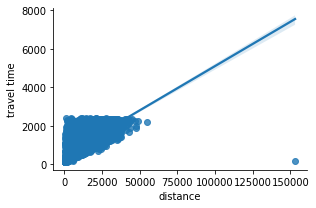

In [6]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)

### Outlier removal

In [7]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
from scipy import stats
df = df[(np.abs(stats.zscore(df['distance'])) < 3)]


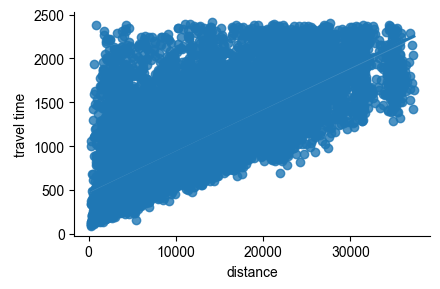

In [8]:
sns.lmplot(x='distance',y='travel time',data=df, height=3, aspect=1.5)
sns.set(rc={"figure.figsize":(10, 10)}) #width=1, #height=2

In [9]:
# Normalize using Min/Max Normalization.
normalized_distance2=(df['distance']-df['distance'].min())/(df['distance'].max()-df['distance'].min())
normalized_distance22=(dff['distance']-dff['distance'].min())/(dff['distance'].max()-dff['distance'].min())
# normalized_distance2
# from sklearn.preprocessing import StandardScaler
# x = breast_dataset.loc[:, features].values
# x = StandardScaler().fit_transform(x) # normalizing the features

In [10]:
df['distance'] = normalized_distance2
dff['distance'] = normalized_distance22

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [12]:
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))
df = df.iloc[:,[0,1,2,15,16,3,4,5,6,7,8,9,10,11,12,13,14]] # change the column order to put "hr_sin" beside the "hour of day"
df.head(4)
df

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


travel time  distance  hour of day    hr_sin        hr_cos  \
0             1163  0.578883           18 -1.000000 -1.836970e-16   
1              347  0.048963           21 -0.707107  7.071068e-01   
2              720  0.268455           19 -0.965926  2.588190e-01   
3              355  0.056803           16 -0.866025 -5.000000e-01   
4              356  0.076939           17 -0.965926 -2.588190e-01   
...            ...       ...          ...       ...           ...   
15758         1649  0.657683           21 -0.707107  7.071068e-01   
15759         1385  0.594228            1  0.258819  9.659258e-01   
15760         1217  0.593117            2  0.500000  8.660254e-01   
15761         1189  0.597302           22 -0.500000  8.660254e-01   
15762         1112  0.392350            6  1.000000  6.123234e-17   

         1st ranked    2nd ranked   3rd ranked    4d ranked    5th ranked  \
0           primary       service  residential          NaN           NaN   
1           service  unclassified  residential      primary           NaN   
2           primary  unclassified     tertiary      service   residential   
3      unclassified       service      primary  residential           NaN   
4       residential  unclassified      service      primary  primary_link   
...             ...           ...          ...          ...           ...   
15758       primary     secondary  residential     tertiary           NaN   
15759       primary      tertiary    secondary  residential       service   
15760       primary     secondary     tertiary  residential           NaN   
15761       primary     secondary     tertiary  residential           NaN   
15762       primary     secondary          NaN          NaN           NaN   

      6th ranked  1st dist  2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0            NaN  0.942077  0.038438  0.019485       NaN       NaN       NaN  
1            NaN  0.329781  0.247697  0.233717  0.188805       NaN       NaN  
2            NaN  0.848450  0.070327  0.036221  0.027382  0.017620       NaN  
3            NaN  0.458768  0.292752  0.165359  0.083120       NaN       NaN  
4            NaN  0.351629  0.270712  0.208898  0.094649  0.074111       NaN  
...          ...       ...       ...       ...       ...       ...       ...  
15758        NaN  0.832685  0.068093  0.062480  0.036742       NaN       NaN  
15759        NaN  0.680899  0.244208  0.056954  0.013437  0.004502       NaN  
15760        NaN  0.922373  0.067187  0.008084  0.002355       NaN       NaN  
15761        NaN  0.915979  0.074904  0.008028  0.001089       NaN       NaN  
15762        NaN  0.929435  0.070565       NaN       NaN       NaN       NaN  

[15728 rows x 17 columns]

In [13]:
# fix random seed for reproducibility
#The specific seed value does not matter as long as it stays the same for each run of your code, it could be 1,2,3,...
np.random.seed(7)

In [14]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [15]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0)) 
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [16]:
def plotme(model):

    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 3))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend()
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [17]:
my_df = df[['distance','travel time']]
my_df.head(3)

distance  travel time
0  0.578883         1163
1  0.048963          347
2  0.268455          720

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

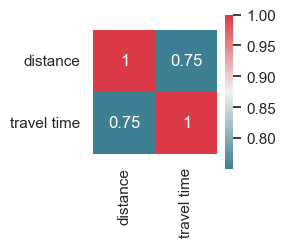

In [18]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(2,2))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [19]:
x = np.array(df[['distance']])
y = np.array(df['travel time'])
# x

In [20]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 1)
(3146, 1)


In [22]:
import math

In [23]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=500)
model1_1

Epoch 1/500
394/394 [==============================] - 1s 957us/step - loss: 1300089.1250 - mape: 99.8926 - rmse: 1140.2145 - val_loss: 1330156.1250 - val_mape: 99.7396 - val_rmse: 1153.3240
Epoch 2/500
394/394 [==============================] - 0s 736us/step - loss: 1292718.7500 - mape: 99.4430 - rmse: 1136.9779 - val_loss: 1319122.5000 - val_mape: 99.0873 - val_rmse: 1148.5306
Epoch 3/500
394/394 [==============================] - 0s 723us/step - loss: 1279103.2500 - mape: 98.6153 - rmse: 1130.9745 - val_loss: 1302432.7500 - val_mape: 98.0931 - val_rmse: 1141.2417
Epoch 4/500
394/394 [==============================] - 0s 741us/step - loss: 1260466.8750 - mape: 97.4662 - rmse: 1122.7052 - val_loss: 1281018.2500 - val_mape: 96.8063 - val_rmse: 1131.8208
Epoch 5/500
394/394 [==============================] - 0s 723us/step - loss: 1237600.8750 - mape: 96.0443 - rmse: 1112.4751 - val_loss: 1255613.1250 - val_mape: 95.2629 - val_rmse: 1120.5414
Epoch 6/500
394/394 [========================

Epoch 88/500
394/394 [==============================] - 0s 791us/step - loss: 131964.5781 - mape: 39.8178 - rmse: 363.2693 - val_loss: 123799.5781 - val_mape: 39.2645 - val_rmse: 351.8517
Epoch 89/500
394/394 [==============================] - 0s 736us/step - loss: 131769.2812 - mape: 39.7394 - rmse: 363.0004 - val_loss: 123579.9844 - val_mape: 39.0586 - val_rmse: 351.5395
Epoch 90/500
394/394 [==============================] - 0s 736us/step - loss: 131592.5000 - mape: 39.4814 - rmse: 362.7568 - val_loss: 123377.0781 - val_mape: 38.9529 - val_rmse: 351.2507
Epoch 91/500
394/394 [==============================] - 0s 700us/step - loss: 131424.5000 - mape: 39.3555 - rmse: 362.5252 - val_loss: 123194.4062 - val_mape: 38.8138 - val_rmse: 350.9906
Epoch 92/500
394/394 [==============================] - 0s 745us/step - loss: 131273.7344 - mape: 39.2544 - rmse: 362.3172 - val_loss: 123026.4375 - val_mape: 38.7055 - val_rmse: 350.7513
Epoch 93/500
394/394 [==============================] - 0s 6

394/394 [==============================] - 0s 715us/step - loss: 129760.1406 - mape: 36.4372 - rmse: 360.2224 - val_loss: 121133.6016 - val_mape: 35.8763 - val_rmse: 348.0425
Epoch 175/500
394/394 [==============================] - 0s 753us/step - loss: 129760.1172 - mape: 36.3682 - rmse: 360.2223 - val_loss: 121133.8359 - val_mape: 35.8786 - val_rmse: 348.0429
Epoch 176/500
394/394 [==============================] - 0s 714us/step - loss: 129760.5781 - mape: 36.3802 - rmse: 360.2230 - val_loss: 121141.4844 - val_mape: 35.9301 - val_rmse: 348.0539
Epoch 177/500
394/394 [==============================] - 0s 724us/step - loss: 129762.0312 - mape: 36.4210 - rmse: 360.2250 - val_loss: 121137.6562 - val_mape: 35.9054 - val_rmse: 348.0483
Epoch 178/500
394/394 [==============================] - 0s 727us/step - loss: 129758.8281 - mape: 36.4215 - rmse: 360.2205 - val_loss: 121135.4531 - val_mape: 35.8903 - val_rmse: 348.0452
Epoch 179/500
394/394 [==============================] - 0s 716us/ste

394/394 [==============================] - 0s 704us/step - loss: 129762.2812 - mape: 36.3465 - rmse: 360.2253 - val_loss: 121124.2422 - val_mape: 35.8086 - val_rmse: 348.0291
Epoch 261/500
394/394 [==============================] - 0s 735us/step - loss: 129756.3594 - mape: 36.3055 - rmse: 360.2171 - val_loss: 121135.1953 - val_mape: 35.8867 - val_rmse: 348.0448
Epoch 262/500
394/394 [==============================] - 0s 707us/step - loss: 129760.4453 - mape: 36.3228 - rmse: 360.2228 - val_loss: 121138.4609 - val_mape: 35.9064 - val_rmse: 348.0495
Epoch 263/500
394/394 [==============================] - 0s 711us/step - loss: 129760.7969 - mape: 36.3912 - rmse: 360.2233 - val_loss: 121135.0312 - val_mape: 35.8858 - val_rmse: 348.0446
Epoch 264/500
394/394 [==============================] - 0s 670us/step - loss: 129756.8203 - mape: 36.3560 - rmse: 360.2177 - val_loss: 121131.5078 - val_mape: 35.8626 - val_rmse: 348.0395
Epoch 265/500
394/394 [==============================] - 0s 694us/ste

394/394 [==============================] - 0s 708us/step - loss: 129758.5703 - mape: 36.3819 - rmse: 360.2202 - val_loss: 121130.3047 - val_mape: 35.8546 - val_rmse: 348.0378
Epoch 347/500
394/394 [==============================] - 0s 725us/step - loss: 129762.1250 - mape: 36.3595 - rmse: 360.2251 - val_loss: 121128.2578 - val_mape: 35.8398 - val_rmse: 348.0349
Epoch 348/500
394/394 [==============================] - 0s 714us/step - loss: 129759.7578 - mape: 36.3703 - rmse: 360.2218 - val_loss: 121122.6250 - val_mape: 35.7958 - val_rmse: 348.0268
Epoch 349/500
394/394 [==============================] - 0s 738us/step - loss: 129758.8438 - mape: 36.3119 - rmse: 360.2206 - val_loss: 121128.4297 - val_mape: 35.8410 - val_rmse: 348.0351
Epoch 350/500
394/394 [==============================] - 0s 692us/step - loss: 129758.2734 - mape: 36.3777 - rmse: 360.2198 - val_loss: 121125.2812 - val_mape: 35.8175 - val_rmse: 348.0306
Epoch 351/500
394/394 [==============================] - 0s 707us/ste

394/394 [==============================] - 0s 685us/step - loss: 129760.3125 - mape: 36.3554 - rmse: 360.2226 - val_loss: 121133.5625 - val_mape: 35.8762 - val_rmse: 348.0425
Epoch 433/500
394/394 [==============================] - 0s 712us/step - loss: 129757.0078 - mape: 36.2806 - rmse: 360.2180 - val_loss: 121135.6641 - val_mape: 35.8893 - val_rmse: 348.0455
Epoch 434/500
394/394 [==============================] - 0s 738us/step - loss: 129759.7500 - mape: 36.3919 - rmse: 360.2218 - val_loss: 121132.0859 - val_mape: 35.8664 - val_rmse: 348.0403
Epoch 435/500
394/394 [==============================] - 0s 713us/step - loss: 129758.6641 - mape: 36.3592 - rmse: 360.2203 - val_loss: 121128.5469 - val_mape: 35.8418 - val_rmse: 348.0353
Epoch 436/500
394/394 [==============================] - 0s 683us/step - loss: 129758.7422 - mape: 36.3341 - rmse: 360.2204 - val_loss: 121131.4766 - val_mape: 35.8620 - val_rmse: 348.0395
Epoch 437/500
394/394 [==============================] - 0s 707us/ste

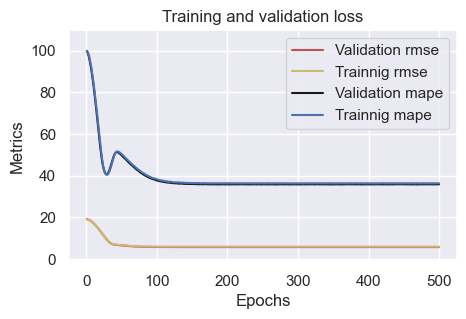

In [24]:
plotme(model1_1)

In [25]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model1_2

Epoch 1/500
394/394 [==============================] - 1s 926us/step - loss: 1301190.3750 - mape: 99.9533 - rmse: 1140.6973 - val_loss: 1332605.5000 - val_mape: 99.8821 - val_rmse: 1154.3854
Epoch 2/500
394/394 [==============================] - 0s 763us/step - loss: 1297693.7500 - mape: 99.7489 - rmse: 1139.1636 - val_loss: 1326839.5000 - val_mape: 99.5496 - val_rmse: 1151.8853
Epoch 3/500
394/394 [==============================] - 0s 749us/step - loss: 1289338.0000 - mape: 99.2475 - rmse: 1135.4902 - val_loss: 1315907.0000 - val_mape: 98.9090 - val_rmse: 1147.1299
Epoch 4/500
394/394 [==============================] - 0s 747us/step - loss: 1276984.1250 - mape: 98.4990 - rmse: 1130.0372 - val_loss: 1301620.0000 - val_mape: 98.0633 - val_rmse: 1140.8856
Epoch 5/500
394/394 [==============================] - 0s 740us/step - loss: 1261664.0000 - mape: 97.5653 - rmse: 1123.2382 - val_loss: 1284533.2500 - val_mape: 97.0428 - val_rmse: 1133.3726
Epoch 6/500
394/394 [========================

Epoch 88/500
394/394 [==============================] - 0s 697us/step - loss: 138441.9531 - mape: 43.4558 - rmse: 372.0779 - val_loss: 130930.7031 - val_mape: 42.9315 - val_rmse: 361.8435
Epoch 89/500
394/394 [==============================] - 0s 719us/step - loss: 137932.1406 - mape: 43.2551 - rmse: 371.3922 - val_loss: 130380.2891 - val_mape: 42.7278 - val_rmse: 361.0821
Epoch 90/500
394/394 [==============================] - 0s 722us/step - loss: 137450.0000 - mape: 43.1104 - rmse: 370.7425 - val_loss: 129857.2734 - val_mape: 42.4805 - val_rmse: 360.3571
Epoch 91/500
394/394 [==============================] - 0s 709us/step - loss: 136986.8438 - mape: 42.8320 - rmse: 370.1173 - val_loss: 129347.2422 - val_mape: 42.2710 - val_rmse: 359.6488
Epoch 92/500
394/394 [==============================] - 0s 701us/step - loss: 136542.6250 - mape: 42.6352 - rmse: 369.5168 - val_loss: 128863.6016 - val_mape: 42.0781 - val_rmse: 358.9758
Epoch 93/500
394/394 [==============================] - 0s 6

394/394 [==============================] - 0s 717us/step - loss: 129770.5156 - mape: 36.5504 - rmse: 360.2368 - val_loss: 121175.2109 - val_mape: 36.1045 - val_rmse: 348.1023
Epoch 175/500
394/394 [==============================] - 0s 674us/step - loss: 129767.0938 - mape: 36.5941 - rmse: 360.2320 - val_loss: 121172.9922 - val_mape: 36.0924 - val_rmse: 348.0991
Epoch 176/500
394/394 [==============================] - 0s 724us/step - loss: 129766.8594 - mape: 36.5798 - rmse: 360.2317 - val_loss: 121171.5156 - val_mape: 36.0865 - val_rmse: 348.0970
Epoch 177/500
394/394 [==============================] - 0s 700us/step - loss: 129765.7188 - mape: 36.5674 - rmse: 360.2301 - val_loss: 121168.7500 - val_mape: 36.0737 - val_rmse: 348.0930
Epoch 178/500
394/394 [==============================] - 0s 689us/step - loss: 129767.6484 - mape: 36.5309 - rmse: 360.2328 - val_loss: 121168.7422 - val_mape: 36.0776 - val_rmse: 348.0930
Epoch 179/500
394/394 [==============================] - 0s 678us/ste

394/394 [==============================] - 0s 679us/step - loss: 129758.5234 - mape: 36.3355 - rmse: 360.2201 - val_loss: 121131.7891 - val_mape: 35.8651 - val_rmse: 348.0399
Epoch 261/500
394/394 [==============================] - 0s 723us/step - loss: 129757.2344 - mape: 36.3521 - rmse: 360.2183 - val_loss: 121132.7422 - val_mape: 35.8715 - val_rmse: 348.0413
Epoch 262/500
394/394 [==============================] - 0s 688us/step - loss: 129757.3281 - mape: 36.3678 - rmse: 360.2184 - val_loss: 121132.1953 - val_mape: 35.8678 - val_rmse: 348.0405
Epoch 263/500
394/394 [==============================] - 0s 741us/step - loss: 129756.6172 - mape: 36.3257 - rmse: 360.2175 - val_loss: 121135.0156 - val_mape: 35.8858 - val_rmse: 348.0446
Epoch 264/500
394/394 [==============================] - 0s 700us/step - loss: 129759.7422 - mape: 36.3037 - rmse: 360.2218 - val_loss: 121130.3984 - val_mape: 35.8552 - val_rmse: 348.0379
Epoch 265/500
394/394 [==============================] - 0s 707us/ste

394/394 [==============================] - 0s 708us/step - loss: 129757.5703 - mape: 36.3107 - rmse: 360.2188 - val_loss: 121136.6953 - val_mape: 35.8966 - val_rmse: 348.0470
Epoch 347/500
394/394 [==============================] - 0s 669us/step - loss: 129756.6406 - mape: 36.4318 - rmse: 360.2175 - val_loss: 121133.2812 - val_mape: 35.8748 - val_rmse: 348.0421
Epoch 348/500
394/394 [==============================] - 0s 699us/step - loss: 129757.7031 - mape: 36.3699 - rmse: 360.2190 - val_loss: 121133.3516 - val_mape: 35.8757 - val_rmse: 348.0422
Epoch 349/500
394/394 [==============================] - 0s 676us/step - loss: 129757.9609 - mape: 36.3588 - rmse: 360.2193 - val_loss: 121132.3906 - val_mape: 35.8689 - val_rmse: 348.0408
Epoch 350/500
394/394 [==============================] - 0s 702us/step - loss: 129757.5469 - mape: 36.3778 - rmse: 360.2188 - val_loss: 121132.9922 - val_mape: 35.8731 - val_rmse: 348.0417
Epoch 351/500
394/394 [==============================] - 0s 719us/ste

394/394 [==============================] - 0s 739us/step - loss: 129756.4844 - mape: 36.3660 - rmse: 360.2173 - val_loss: 121131.0781 - val_mape: 35.8598 - val_rmse: 348.0389
Epoch 433/500
394/394 [==============================] - 0s 772us/step - loss: 129759.0391 - mape: 36.3127 - rmse: 360.2208 - val_loss: 121127.3750 - val_mape: 35.8332 - val_rmse: 348.0336
Epoch 434/500
394/394 [==============================] - 0s 705us/step - loss: 129755.2344 - mape: 36.3100 - rmse: 360.2155 - val_loss: 121136.1641 - val_mape: 35.8924 - val_rmse: 348.0462
Epoch 435/500
394/394 [==============================] - 0s 701us/step - loss: 129755.1328 - mape: 36.3751 - rmse: 360.2154 - val_loss: 121132.7578 - val_mape: 35.8709 - val_rmse: 348.0413
Epoch 436/500
394/394 [==============================] - 0s 750us/step - loss: 129755.9375 - mape: 36.3384 - rmse: 360.2165 - val_loss: 121137.2578 - val_mape: 35.8989 - val_rmse: 348.0478
Epoch 437/500
394/394 [==============================] - 0s 726us/ste

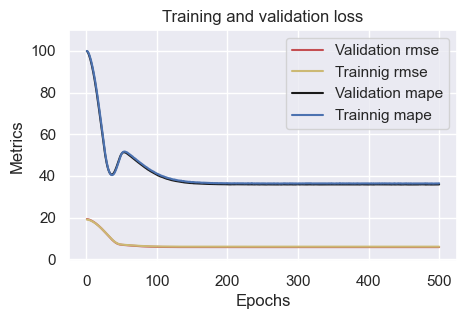

In [26]:
plotme(model1_2)

In [27]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=500)
model1_3

Epoch 1/500
394/394 [==============================] - 1s 879us/step - loss: 1298575.3750 - mape: 99.8015 - rmse: 1139.5505 - val_loss: 1325280.1250 - val_mape: 99.4557 - val_rmse: 1151.2081
Epoch 2/500
394/394 [==============================] - 0s 705us/step - loss: 1282357.7500 - mape: 98.8165 - rmse: 1132.4124 - val_loss: 1301410.2500 - val_mape: 98.0404 - val_rmse: 1140.7937
Epoch 3/500
394/394 [==============================] - 0s 691us/step - loss: 1252747.0000 - mape: 96.9986 - rmse: 1119.2618 - val_loss: 1264941.3750 - val_mape: 95.8461 - val_rmse: 1124.6962
Epoch 4/500
394/394 [==============================] - 0s 728us/step - loss: 1212136.0000 - mape: 94.4576 - rmse: 1100.9705 - val_loss: 1218397.6250 - val_mape: 92.9898 - val_rmse: 1103.8105
Epoch 5/500
394/394 [==============================] - 0s 684us/step - loss: 1162628.0000 - mape: 91.3002 - rmse: 1078.2523 - val_loss: 1163746.2500 - val_mape: 89.5522 - val_rmse: 1078.7708
Epoch 6/500
394/394 [========================

Epoch 88/500
394/394 [==============================] - 0s 654us/step - loss: 129787.9844 - mape: 36.7010 - rmse: 360.2610 - val_loss: 121205.1250 - val_mape: 36.2141 - val_rmse: 348.1453
Epoch 89/500
394/394 [==============================] - 0s 659us/step - loss: 129780.5234 - mape: 36.6095 - rmse: 360.2506 - val_loss: 121205.5703 - val_mape: 36.2407 - val_rmse: 348.1459
Epoch 90/500
394/394 [==============================] - 0s 685us/step - loss: 129785.0234 - mape: 36.7252 - rmse: 360.2569 - val_loss: 121198.2500 - val_mape: 36.2117 - val_rmse: 348.1354
Epoch 91/500
394/394 [==============================] - 0s 688us/step - loss: 129777.0234 - mape: 36.6245 - rmse: 360.2458 - val_loss: 121203.2734 - val_mape: 36.2503 - val_rmse: 348.1426
Epoch 92/500
394/394 [==============================] - 0s 698us/step - loss: 129774.5938 - mape: 36.7156 - rmse: 360.2424 - val_loss: 121179.7891 - val_mape: 36.1118 - val_rmse: 348.1089
Epoch 93/500
394/394 [==============================] - 0s 6

394/394 [==============================] - 0s 694us/step - loss: 129761.2969 - mape: 36.3823 - rmse: 360.2240 - val_loss: 121149.0625 - val_mape: 35.9646 - val_rmse: 348.0647
Epoch 175/500
394/394 [==============================] - 0s 674us/step - loss: 129759.3203 - mape: 36.3899 - rmse: 360.2212 - val_loss: 121131.7969 - val_mape: 35.8646 - val_rmse: 348.0399
Epoch 176/500
394/394 [==============================] - 0s 692us/step - loss: 129762.1094 - mape: 36.3073 - rmse: 360.2251 - val_loss: 121136.8984 - val_mape: 35.8970 - val_rmse: 348.0473
Epoch 177/500
394/394 [==============================] - 0s 691us/step - loss: 129762.2422 - mape: 36.4118 - rmse: 360.2253 - val_loss: 121139.8672 - val_mape: 35.9157 - val_rmse: 348.0515
Epoch 178/500
394/394 [==============================] - 0s 677us/step - loss: 129761.2031 - mape: 36.3663 - rmse: 360.2238 - val_loss: 121132.3906 - val_mape: 35.8687 - val_rmse: 348.0408
Epoch 179/500
394/394 [==============================] - 0s 695us/ste

394/394 [==============================] - 0s 683us/step - loss: 129762.4141 - mape: 36.2415 - rmse: 360.2255 - val_loss: 121137.4922 - val_mape: 35.9017 - val_rmse: 348.0481
Epoch 261/500
394/394 [==============================] - 0s 689us/step - loss: 129762.5000 - mape: 36.3668 - rmse: 360.2256 - val_loss: 121136.1953 - val_mape: 35.8933 - val_rmse: 348.0463
Epoch 262/500
394/394 [==============================] - 0s 698us/step - loss: 129766.3203 - mape: 36.3135 - rmse: 360.2309 - val_loss: 121148.0625 - val_mape: 35.9607 - val_rmse: 348.0633
Epoch 263/500
394/394 [==============================] - 0s 674us/step - loss: 129766.7188 - mape: 36.4557 - rmse: 360.2315 - val_loss: 121131.3594 - val_mape: 35.8619 - val_rmse: 348.0393
Epoch 264/500
394/394 [==============================] - 0s 669us/step - loss: 129762.0625 - mape: 36.3836 - rmse: 360.2250 - val_loss: 121132.9688 - val_mape: 35.8726 - val_rmse: 348.0416
Epoch 265/500
394/394 [==============================] - 0s 719us/ste

394/394 [==============================] - 0s 741us/step - loss: 129762.8203 - mape: 36.3639 - rmse: 360.2261 - val_loss: 121129.9609 - val_mape: 35.8520 - val_rmse: 348.0373
Epoch 347/500
394/394 [==============================] - 0s 678us/step - loss: 129760.2266 - mape: 36.4518 - rmse: 360.2225 - val_loss: 121123.1641 - val_mape: 35.7985 - val_rmse: 348.0275
Epoch 348/500
394/394 [==============================] - 0s 743us/step - loss: 129763.0156 - mape: 36.3375 - rmse: 360.2263 - val_loss: 121129.4766 - val_mape: 35.8486 - val_rmse: 348.0366
Epoch 349/500
394/394 [==============================] - 0s 705us/step - loss: 129763.3750 - mape: 36.3282 - rmse: 360.2268 - val_loss: 121139.2422 - val_mape: 35.9108 - val_rmse: 348.0506
Epoch 350/500
394/394 [==============================] - 0s 695us/step - loss: 129759.6094 - mape: 36.3924 - rmse: 360.2216 - val_loss: 121125.2422 - val_mape: 35.8168 - val_rmse: 348.0305
Epoch 351/500
394/394 [==============================] - 0s 691us/ste

394/394 [==============================] - 0s 688us/step - loss: 129760.1562 - mape: 36.3096 - rmse: 360.2224 - val_loss: 121131.9453 - val_mape: 35.8653 - val_rmse: 348.0402
Epoch 433/500
394/394 [==============================] - 0s 675us/step - loss: 129760.5547 - mape: 36.3684 - rmse: 360.2229 - val_loss: 121130.7344 - val_mape: 35.8573 - val_rmse: 348.0384
Epoch 434/500
394/394 [==============================] - 0s 685us/step - loss: 129761.2891 - mape: 36.3236 - rmse: 360.2239 - val_loss: 121136.5000 - val_mape: 35.8947 - val_rmse: 348.0467
Epoch 435/500
394/394 [==============================] - 0s 684us/step - loss: 129760.9844 - mape: 36.3622 - rmse: 360.2235 - val_loss: 121140.9609 - val_mape: 35.9211 - val_rmse: 348.0531
Epoch 436/500
394/394 [==============================] - 0s 681us/step - loss: 129761.7266 - mape: 36.3883 - rmse: 360.2245 - val_loss: 121131.3438 - val_mape: 35.8615 - val_rmse: 348.0393
Epoch 437/500
394/394 [==============================] - 0s 698us/ste

In [28]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model1_4

Epoch 1/500
394/394 [==============================] - 1s 893us/step - loss: 1301524.6250 - mape: 99.9732 - rmse: 1140.8439 - val_loss: 1333809.7500 - val_mape: 99.9458 - val_rmse: 1154.9069
Epoch 2/500
394/394 [==============================] - 0s 766us/step - loss: 1300715.6250 - mape: 99.9179 - rmse: 1140.4893 - val_loss: 1333012.1250 - val_mape: 99.8909 - val_rmse: 1154.5614
Epoch 3/500
394/394 [==============================] - 0s 747us/step - loss: 1299927.7500 - mape: 99.8626 - rmse: 1140.1438 - val_loss: 1332214.7500 - val_mape: 99.8360 - val_rmse: 1154.2161
Epoch 4/500
394/394 [==============================] - 0s 751us/step - loss: 1299140.3750 - mape: 99.8074 - rmse: 1139.7983 - val_loss: 1331417.8750 - val_mape: 99.7811 - val_rmse: 1153.8708
Epoch 5/500
394/394 [==============================] - 0s 716us/step - loss: 1298354.5000 - mape: 99.7521 - rmse: 1139.4536 - val_loss: 1330622.1250 - val_mape: 99.7263 - val_rmse: 1153.5260
Epoch 6/500
394/394 [========================

Epoch 44/500
394/394 [==============================] - 0s 698us/step - loss: 1267917.2500 - mape: 97.6004 - rmse: 1126.0183 - val_loss: 1299814.0000 - val_mape: 97.5869 - val_rmse: 1140.0939
Epoch 45/500
394/394 [==============================] - 0s 758us/step - loss: 1267143.5000 - mape: 97.5452 - rmse: 1125.6747 - val_loss: 1299030.7500 - val_mape: 97.5321 - val_rmse: 1139.7502
Epoch 46/500
394/394 [==============================] - 0s 722us/step - loss: 1266369.2500 - mape: 97.4902 - rmse: 1125.3307 - val_loss: 1298246.7500 - val_mape: 97.4772 - val_rmse: 1139.4064
Epoch 47/500
394/394 [==============================] - 0s 735us/step - loss: 1265595.8750 - mape: 97.4349 - rmse: 1124.9871 - val_loss: 1297464.2500 - val_mape: 97.4224 - val_rmse: 1139.0629
Epoch 48/500
394/394 [==============================] - 0s 750us/step - loss: 1264822.2500 - mape: 97.3798 - rmse: 1124.6432 - val_loss: 1296680.2500 - val_mape: 97.3675 - val_rmse: 1138.7186
Epoch 49/500
394/394 [==================

Epoch 87/500
394/394 [==============================] - 0s 741us/step - loss: 1234910.7500 - mape: 95.2286 - rmse: 1111.2654 - val_loss: 1266397.1250 - val_mape: 95.2289 - val_rmse: 1125.3431
Epoch 88/500
394/394 [==============================] - 0s 760us/step - loss: 1234150.3750 - mape: 95.1734 - rmse: 1110.9232 - val_loss: 1265627.1250 - val_mape: 95.1741 - val_rmse: 1125.0010
Epoch 89/500
394/394 [==============================] - 0s 766us/step - loss: 1233389.2500 - mape: 95.1182 - rmse: 1110.5806 - val_loss: 1264856.6250 - val_mape: 95.1192 - val_rmse: 1124.6584
Epoch 90/500
394/394 [==============================] - 0s 705us/step - loss: 1232628.8750 - mape: 95.0628 - rmse: 1110.2382 - val_loss: 1264086.3750 - val_mape: 95.0643 - val_rmse: 1124.3159
Epoch 91/500
394/394 [==============================] - 0s 703us/step - loss: 1231869.2500 - mape: 95.0076 - rmse: 1109.8960 - val_loss: 1263317.8750 - val_mape: 95.0095 - val_rmse: 1123.9741
Epoch 92/500
394/394 [==================

394/394 [==============================] - 0s 741us/step - loss: 1172082.8750 - mape: 90.5959 - rmse: 1082.6278 - val_loss: 1202769.1250 - val_mape: 90.6235 - val_rmse: 1096.7084
Epoch 172/500
394/394 [==============================] - 0s 709us/step - loss: 1171348.0000 - mape: 90.5407 - rmse: 1082.2883 - val_loss: 1202024.6250 - val_mape: 90.5686 - val_rmse: 1096.3689
Epoch 173/500
394/394 [==============================] - 0s 730us/step - loss: 1170612.3750 - mape: 90.4858 - rmse: 1081.9484 - val_loss: 1201279.1250 - val_mape: 90.5137 - val_rmse: 1096.0288
Epoch 174/500
394/394 [==============================] - 0s 745us/step - loss: 1169878.3750 - mape: 90.4303 - rmse: 1081.6091 - val_loss: 1200535.5000 - val_mape: 90.4589 - val_rmse: 1095.6895
Epoch 175/500
394/394 [==============================] - 0s 758us/step - loss: 1169145.7500 - mape: 90.3753 - rmse: 1081.2704 - val_loss: 1199793.3750 - val_mape: 90.4042 - val_rmse: 1095.3508
Epoch 176/500
394/394 [==========================

394/394 [==============================] - 0s 722us/step - loss: 1111446.5000 - mape: 85.9666 - rmse: 1054.2516 - val_loss: 1141331.8750 - val_mape: 86.0201 - val_rmse: 1068.3313
Epoch 256/500
394/394 [==============================] - 0s 695us/step - loss: 1110738.2500 - mape: 85.9113 - rmse: 1053.9156 - val_loss: 1140614.0000 - val_mape: 85.9653 - val_rmse: 1067.9954
Epoch 257/500
394/394 [==============================] - 0s 727us/step - loss: 1110030.6250 - mape: 85.8566 - rmse: 1053.5800 - val_loss: 1139896.2500 - val_mape: 85.9106 - val_rmse: 1067.6592
Epoch 258/500
394/394 [==============================] - 0s 705us/step - loss: 1109321.2500 - mape: 85.8014 - rmse: 1053.2432 - val_loss: 1139178.0000 - val_mape: 85.8557 - val_rmse: 1067.3229
Epoch 259/500
394/394 [==============================] - 0s 711us/step - loss: 1108613.5000 - mape: 85.7467 - rmse: 1052.9072 - val_loss: 1138461.3750 - val_mape: 85.8009 - val_rmse: 1066.9871
Epoch 260/500
394/394 [==========================

394/394 [==============================] - 0s 740us/step - loss: 1053002.0000 - mape: 81.3608 - rmse: 1026.1588 - val_loss: 1082088.3750 - val_mape: 81.4242 - val_rmse: 1040.2347
Epoch 340/500
394/394 [==============================] - 0s 700us/step - loss: 1052320.3750 - mape: 81.3061 - rmse: 1025.8267 - val_loss: 1081396.6250 - val_mape: 81.3697 - val_rmse: 1039.9022
Epoch 341/500
394/394 [==============================] - 0s 724us/step - loss: 1051637.6250 - mape: 81.2518 - rmse: 1025.4939 - val_loss: 1080703.7500 - val_mape: 81.3150 - val_rmse: 1039.5690
Epoch 342/500
394/394 [==============================] - 0s 738us/step - loss: 1050955.2500 - mape: 81.1970 - rmse: 1025.1611 - val_loss: 1080012.5000 - val_mape: 81.2605 - val_rmse: 1039.2365
Epoch 343/500
394/394 [==============================] - 0s 704us/step - loss: 1050273.6250 - mape: 81.1425 - rmse: 1024.8286 - val_loss: 1079321.0000 - val_mape: 81.2059 - val_rmse: 1038.9038
Epoch 344/500
394/394 [==========================

394/394 [==============================] - 0s 743us/step - loss: 996738.4375 - mape: 76.8151 - rmse: 998.3679 - val_loss: 1025024.8750 - val_mape: 76.8874 - val_rmse: 1012.4351
Epoch 424/500
394/394 [==============================] - 0s 728us/step - loss: 996081.3125 - mape: 76.7614 - rmse: 998.0388 - val_loss: 1024357.3125 - val_mape: 76.8339 - val_rmse: 1012.1054
Epoch 425/500
394/394 [==============================] - 0s 743us/step - loss: 995424.5000 - mape: 76.7077 - rmse: 997.7097 - val_loss: 1023692.5625 - val_mape: 76.7805 - val_rmse: 1011.7769
Epoch 426/500
394/394 [==============================] - 0s 689us/step - loss: 994768.6875 - mape: 76.6544 - rmse: 997.3809 - val_loss: 1023026.1250 - val_mape: 76.7271 - val_rmse: 1011.4475
Epoch 427/500
394/394 [==============================] - 0s 697us/step - loss: 994112.8125 - mape: 76.6002 - rmse: 997.0521 - val_loss: 1022360.6250 - val_mape: 76.6737 - val_rmse: 1011.1185
Epoch 428/500
394/394 [==============================] - 0s

394/394 [==============================] - 0s 711us/step - loss: 968786.5000 - mape: 74.5155 - rmse: 984.2695 - val_loss: 996663.7500 - val_mape: 74.6017 - val_rmse: 998.3305
Epoch 467/500
394/394 [==============================] - 0s 700us/step - loss: 968142.7500 - mape: 74.4620 - rmse: 983.9424 - val_loss: 996010.5625 - val_mape: 74.5490 - val_rmse: 998.0033
Epoch 468/500
394/394 [==============================] - 0s 725us/step - loss: 967500.3750 - mape: 74.4086 - rmse: 983.6160 - val_loss: 995358.8125 - val_mape: 74.4964 - val_rmse: 997.6767
Epoch 469/500
394/394 [==============================] - 0s 715us/step - loss: 966856.9375 - mape: 74.3555 - rmse: 983.2888 - val_loss: 994705.6875 - val_mape: 74.4437 - val_rmse: 997.3493
Epoch 470/500
394/394 [==============================] - 0s 744us/step - loss: 966214.1250 - mape: 74.3023 - rmse: 982.9619 - val_loss: 994053.1875 - val_mape: 74.3910 - val_rmse: 997.0222
Epoch 471/500
394/394 [==============================] - 0s 750us/ste

In [29]:
# plotme(model1_4)

In [30]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model1_5

Epoch 1/500
394/394 [==============================] - 1s 895us/step - loss: 1283393.5000 - mape: 98.9076 - rmse: 1132.8696 - val_loss: 1265151.6250 - val_mape: 95.9751 - val_rmse: 1124.7896
Epoch 2/500
394/394 [==============================] - 0s 802us/step - loss: 1085189.3750 - mape: 86.3523 - rmse: 1041.7242 - val_loss: 904321.8125 - val_mape: 72.3091 - val_rmse: 950.9584
Epoch 3/500
394/394 [==============================] - 0s 730us/step - loss: 636792.5625 - mape: 54.5679 - rmse: 797.9929 - val_loss: 413316.4375 - val_mape: 41.5149 - val_rmse: 642.8969
Epoch 4/500
394/394 [==============================] - 0s 720us/step - loss: 274036.2500 - mape: 41.0884 - rmse: 523.4847 - val_loss: 191757.9219 - val_mape: 44.6131 - val_rmse: 437.9017
Epoch 5/500
394/394 [==============================] - 0s 731us/step - loss: 176084.9062 - mape: 48.4949 - rmse: 419.6247 - val_loss: 163874.2188 - val_mape: 50.0133 - val_rmse: 404.8138
Epoch 6/500
394/394 [==============================] - 0s 7

Epoch 88/500
394/394 [==============================] - 0s 775us/step - loss: 129787.4844 - mape: 36.3770 - rmse: 360.2603 - val_loss: 121118.4453 - val_mape: 35.7509 - val_rmse: 348.0208
Epoch 89/500
394/394 [==============================] - 0s 720us/step - loss: 129799.6328 - mape: 36.2110 - rmse: 360.2772 - val_loss: 121364.4141 - val_mape: 36.5711 - val_rmse: 348.3740
Epoch 90/500
394/394 [==============================] - 0s 712us/step - loss: 129790.3125 - mape: 36.4316 - rmse: 360.2642 - val_loss: 121114.4844 - val_mape: 35.6189 - val_rmse: 348.0151
Epoch 91/500
394/394 [==============================] - 0s 734us/step - loss: 129818.8203 - mape: 36.3258 - rmse: 360.3038 - val_loss: 121110.8281 - val_mape: 35.6335 - val_rmse: 348.0098
Epoch 92/500
394/394 [==============================] - 0s 749us/step - loss: 129780.5938 - mape: 36.3689 - rmse: 360.2507 - val_loss: 121128.8594 - val_mape: 35.3623 - val_rmse: 348.0357
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 730us/step - loss: 129814.2188 - mape: 36.4160 - rmse: 360.2974 - val_loss: 121168.9219 - val_mape: 36.0494 - val_rmse: 348.0933
Epoch 175/500
394/394 [==============================] - 0s 708us/step - loss: 129794.2344 - mape: 36.4521 - rmse: 360.2697 - val_loss: 121112.7031 - val_mape: 35.5193 - val_rmse: 348.0125
Epoch 176/500
394/394 [==============================] - 0s 724us/step - loss: 129807.1406 - mape: 36.3101 - rmse: 360.2876 - val_loss: 121180.3672 - val_mape: 36.1000 - val_rmse: 348.1097
Epoch 177/500
394/394 [==============================] - 0s 726us/step - loss: 129798.0391 - mape: 36.4672 - rmse: 360.2750 - val_loss: 121118.4219 - val_mape: 35.4848 - val_rmse: 348.0207
Epoch 178/500
394/394 [==============================] - 0s 728us/step - loss: 129824.4609 - mape: 36.2783 - rmse: 360.3116 - val_loss: 121145.4219 - val_mape: 35.9533 - val_rmse: 348.0595
Epoch 179/500
394/394 [==============================] - 0s 712us/ste

394/394 [==============================] - 0s 708us/step - loss: 129787.5234 - mape: 36.3691 - rmse: 360.2603 - val_loss: 121143.3359 - val_mape: 35.9338 - val_rmse: 348.0565
Epoch 261/500
394/394 [==============================] - 0s 761us/step - loss: 129806.4062 - mape: 36.4015 - rmse: 360.2866 - val_loss: 121123.9297 - val_mape: 35.8061 - val_rmse: 348.0286
Epoch 262/500
394/394 [==============================] - 0s 713us/step - loss: 129795.1328 - mape: 36.2675 - rmse: 360.2709 - val_loss: 121170.8047 - val_mape: 36.0631 - val_rmse: 348.0960
Epoch 263/500
394/394 [==============================] - 0s 706us/step - loss: 129803.9922 - mape: 36.4554 - rmse: 360.2832 - val_loss: 121166.8672 - val_mape: 35.1681 - val_rmse: 348.0903
Epoch 264/500
394/394 [==============================] - 0s 719us/step - loss: 129801.1641 - mape: 36.4093 - rmse: 360.2793 - val_loss: 121112.7188 - val_mape: 35.5952 - val_rmse: 348.0125
Epoch 265/500
394/394 [==============================] - 0s 769us/ste

394/394 [==============================] - 0s 729us/step - loss: 129795.8359 - mape: 36.3481 - rmse: 360.2719 - val_loss: 121136.1250 - val_mape: 35.8885 - val_rmse: 348.0461
Epoch 347/500
394/394 [==============================] - 0s 732us/step - loss: 129808.7734 - mape: 36.3165 - rmse: 360.2899 - val_loss: 121136.8203 - val_mape: 35.8931 - val_rmse: 348.0471
Epoch 348/500
394/394 [==============================] - 0s 731us/step - loss: 129805.5391 - mape: 36.3881 - rmse: 360.2854 - val_loss: 121107.8438 - val_mape: 35.6152 - val_rmse: 348.0055
Epoch 349/500
394/394 [==============================] - 0s 722us/step - loss: 129805.7578 - mape: 36.3758 - rmse: 360.2857 - val_loss: 121157.8516 - val_mape: 36.0013 - val_rmse: 348.0774
Epoch 350/500
394/394 [==============================] - 0s 712us/step - loss: 129822.0938 - mape: 36.4184 - rmse: 360.3083 - val_loss: 121121.9297 - val_mape: 35.7878 - val_rmse: 348.0258
Epoch 351/500
394/394 [==============================] - 0s 720us/ste

394/394 [==============================] - 0s 756us/step - loss: 129797.1875 - mape: 36.2688 - rmse: 360.2738 - val_loss: 121152.4609 - val_mape: 35.9772 - val_rmse: 348.0696
Epoch 433/500
394/394 [==============================] - 0s 702us/step - loss: 129794.5625 - mape: 36.3945 - rmse: 360.2701 - val_loss: 121111.5156 - val_mape: 35.5708 - val_rmse: 348.0108
Epoch 434/500
394/394 [==============================] - 0s 702us/step - loss: 129783.7812 - mape: 36.3558 - rmse: 360.2552 - val_loss: 121111.9922 - val_mape: 35.5101 - val_rmse: 348.0115
Epoch 435/500
394/394 [==============================] - 0s 760us/step - loss: 129803.7891 - mape: 36.3417 - rmse: 360.2829 - val_loss: 121137.6406 - val_mape: 35.9023 - val_rmse: 348.0483
Epoch 436/500
394/394 [==============================] - 0s 730us/step - loss: 129794.7188 - mape: 36.4680 - rmse: 360.2704 - val_loss: 121116.9375 - val_mape: 35.7171 - val_rmse: 348.0186
Epoch 437/500
394/394 [==============================] - 0s 743us/ste

In [31]:
# inputs: distance
model1_6 = nnmodel(2, num_hlayers=1,Epoch=500)
model1_6

Epoch 1/500
394/394 [==============================] - 0s 848us/step - loss: 1300555.8750 - mape: 99.9204 - rmse: 1140.4192 - val_loss: 1331710.8750 - val_mape: 99.8280 - val_rmse: 1153.9978
Epoch 2/500
394/394 [==============================] - 0s 721us/step - loss: 1296983.8750 - mape: 99.6989 - rmse: 1138.8521 - val_loss: 1327107.8750 - val_mape: 99.5508 - val_rmse: 1152.0017
Epoch 3/500
394/394 [==============================] - 0s 693us/step - loss: 1291605.1250 - mape: 99.3664 - rmse: 1136.4880 - val_loss: 1320714.1250 - val_mape: 99.1666 - val_rmse: 1149.2233
Epoch 4/500
394/394 [==============================] - 0s 704us/step - loss: 1284561.1250 - mape: 98.9327 - rmse: 1133.3848 - val_loss: 1312698.0000 - val_mape: 98.6847 - val_rmse: 1145.7303
Epoch 5/500
394/394 [==============================] - 0s 712us/step - loss: 1276019.7500 - mape: 98.4015 - rmse: 1129.6105 - val_loss: 1303238.1250 - val_mape: 98.1149 - val_rmse: 1141.5946
Epoch 6/500
394/394 [========================

Epoch 88/500
394/394 [==============================] - 0s 686us/step - loss: 160712.2500 - mape: 50.1393 - rmse: 400.8893 - val_loss: 155251.3750 - val_mape: 49.6582 - val_rmse: 394.0195
Epoch 89/500
394/394 [==============================] - 0s 716us/step - loss: 159845.0469 - mape: 49.9788 - rmse: 399.8063 - val_loss: 154305.6250 - val_mape: 49.4740 - val_rmse: 392.8175
Epoch 90/500
394/394 [==============================] - 0s 689us/step - loss: 158989.2812 - mape: 49.7630 - rmse: 398.7346 - val_loss: 153377.1406 - val_mape: 49.2718 - val_rmse: 391.6339
Epoch 91/500
394/394 [==============================] - 0s 727us/step - loss: 158154.3281 - mape: 49.5811 - rmse: 397.6862 - val_loss: 152468.5625 - val_mape: 49.0932 - val_rmse: 390.4722
Epoch 92/500
394/394 [==============================] - 0s 687us/step - loss: 157329.5469 - mape: 49.4413 - rmse: 396.6479 - val_loss: 151572.6250 - val_mape: 48.8747 - val_rmse: 389.3233
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 698us/step - loss: 130338.5469 - mape: 38.1732 - rmse: 361.0243 - val_loss: 121961.6562 - val_mape: 37.6155 - val_rmse: 349.2301
Epoch 175/500
394/394 [==============================] - 0s 698us/step - loss: 130305.7891 - mape: 38.0914 - rmse: 360.9789 - val_loss: 121924.9453 - val_mape: 37.5852 - val_rmse: 349.1775
Epoch 176/500
394/394 [==============================] - 0s 713us/step - loss: 130275.1719 - mape: 38.0502 - rmse: 360.9365 - val_loss: 121884.4375 - val_mape: 37.5161 - val_rmse: 349.1195
Epoch 177/500
394/394 [==============================] - 0s 737us/step - loss: 130247.2344 - mape: 37.9556 - rmse: 360.8978 - val_loss: 121845.1641 - val_mape: 37.4485 - val_rmse: 349.0633
Epoch 178/500
394/394 [==============================] - 0s 725us/step - loss: 130218.4531 - mape: 37.9247 - rmse: 360.8579 - val_loss: 121814.9141 - val_mape: 37.4410 - val_rmse: 349.0199
Epoch 179/500
394/394 [==============================] - 0s 699us/ste

394/394 [==============================] - 0s 695us/step - loss: 129758.4453 - mape: 36.4781 - rmse: 360.2200 - val_loss: 121154.2969 - val_mape: 36.0049 - val_rmse: 348.0723
Epoch 261/500
394/394 [==============================] - 0s 737us/step - loss: 129761.6875 - mape: 36.4685 - rmse: 360.2245 - val_loss: 121155.1406 - val_mape: 36.0113 - val_rmse: 348.0735
Epoch 262/500
394/394 [==============================] - 0s 719us/step - loss: 129758.1641 - mape: 36.4882 - rmse: 360.2196 - val_loss: 121153.0859 - val_mape: 35.9988 - val_rmse: 348.0705
Epoch 263/500
394/394 [==============================] - 0s 722us/step - loss: 129758.4297 - mape: 36.4196 - rmse: 360.2200 - val_loss: 121153.9219 - val_mape: 36.0045 - val_rmse: 348.0717
Epoch 264/500
394/394 [==============================] - 0s 660us/step - loss: 129759.8047 - mape: 36.5189 - rmse: 360.2219 - val_loss: 121148.8984 - val_mape: 35.9724 - val_rmse: 348.0645
Epoch 265/500
394/394 [==============================] - 0s 692us/ste

394/394 [==============================] - 0s 699us/step - loss: 129756.1484 - mape: 36.3983 - rmse: 360.2168 - val_loss: 121136.1328 - val_mape: 35.8939 - val_rmse: 348.0462
Epoch 347/500
394/394 [==============================] - 0s 735us/step - loss: 129755.9453 - mape: 36.3638 - rmse: 360.2165 - val_loss: 121139.7734 - val_mape: 35.9166 - val_rmse: 348.0514
Epoch 348/500
394/394 [==============================] - 0s 713us/step - loss: 129756.2500 - mape: 36.3703 - rmse: 360.2169 - val_loss: 121138.5938 - val_mape: 35.9096 - val_rmse: 348.0497
Epoch 349/500
394/394 [==============================] - 0s 707us/step - loss: 129755.7109 - mape: 36.4108 - rmse: 360.2162 - val_loss: 121136.5703 - val_mape: 35.8968 - val_rmse: 348.0468
Epoch 350/500
394/394 [==============================] - 0s 716us/step - loss: 129755.5156 - mape: 36.3997 - rmse: 360.2159 - val_loss: 121132.6406 - val_mape: 35.8708 - val_rmse: 348.0411
Epoch 351/500
394/394 [==============================] - 0s 698us/ste

394/394 [==============================] - 0s 693us/step - loss: 129755.9766 - mape: 36.3802 - rmse: 360.2166 - val_loss: 121130.7812 - val_mape: 35.8576 - val_rmse: 348.0385
Epoch 433/500
394/394 [==============================] - 0s 712us/step - loss: 129755.8984 - mape: 36.3403 - rmse: 360.2165 - val_loss: 121128.7344 - val_mape: 35.8434 - val_rmse: 348.0355
Epoch 434/500
394/394 [==============================] - 0s 708us/step - loss: 129754.6328 - mape: 36.3408 - rmse: 360.2147 - val_loss: 121132.0547 - val_mape: 35.8660 - val_rmse: 348.0403
Epoch 435/500
394/394 [==============================] - 0s 673us/step - loss: 129755.3125 - mape: 36.3314 - rmse: 360.2156 - val_loss: 121133.1484 - val_mape: 35.8729 - val_rmse: 348.0419
Epoch 436/500
394/394 [==============================] - 0s 689us/step - loss: 129754.4609 - mape: 36.3768 - rmse: 360.2145 - val_loss: 121130.0703 - val_mape: 35.8527 - val_rmse: 348.0374
Epoch 437/500
394/394 [==============================] - 0s 725us/ste

In [32]:
# plotme(model1_6)

# sub-problem 2:     ******* input: distance & hour *********

In [33]:
df.shape

(15728, 17)

In [34]:
df.head()

travel time  distance  hour of day    hr_sin        hr_cos    1st ranked  \
0         1163  0.578883           18 -1.000000 -1.836970e-16       primary   
1          347  0.048963           21 -0.707107  7.071068e-01       service   
2          720  0.268455           19 -0.965926  2.588190e-01       primary   
3          355  0.056803           16 -0.866025 -5.000000e-01  unclassified   
4          356  0.076939           17 -0.965926 -2.588190e-01   residential   

     2nd ranked   3rd ranked    4d ranked    5th ranked 6th ranked  1st dist  \
0       service  residential          NaN           NaN        NaN  0.942077   
1  unclassified  residential      primary           NaN        NaN  0.329781   
2  unclassified     tertiary      service   residential        NaN  0.848450   
3       service      primary  residential           NaN        NaN  0.458768   
4  unclassified      service      primary  primary_link        NaN  0.351629   

   2nd dist  3rd dist  4rd dist  5th dist  6th dist  
0  0.038438  0.019485       NaN       NaN       NaN  
1  0.247697  0.233717  0.188805       NaN       NaN  
2  0.070327  0.036221  0.027382  0.017620       NaN  
3  0.292752  0.165359  0.083120       NaN       NaN  
4  0.270712  0.208898  0.094649  0.074111       NaN

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


<AxesSubplot:>

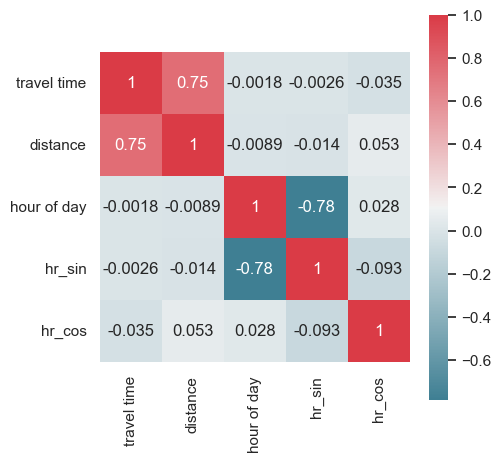

In [35]:
# run correlation matrix and plot
my_df = df[['travel time','distance','hour of day','hr_sin','hr_cos']]
f, ax = plt.subplots(figsize=(5,5))
corr = my_df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

### cyclical encoding of hour

In [36]:
x = np.array(df[['distance','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 5.78882945e-01, -1.00000000e+00, -1.83697020e-16],
       [ 4.89634734e-02, -7.07106781e-01,  7.07106781e-01],
       [ 2.68454745e-01, -9.65925826e-01,  2.58819045e-01],
       ...,
       [ 5.93116949e-01,  5.00000000e-01,  8.66025404e-01],
       [ 5.97301600e-01, -5.00000000e-01,  8.66025404e-01],
       [ 3.92350497e-01,  1.00000000e+00,  6.12323400e-17]])

In [37]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 3)
(3146, 3)


In [39]:
# inputs: distance + hour
model2_0 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_0

Epoch 1/500
394/394 [==============================] - 0s 872us/step - loss: 1298110.5000 - mape: 99.7742 - rmse: 1139.3466 - val_loss: 1327145.3750 - val_mape: 99.5519 - val_rmse: 1152.0179
Epoch 2/500
394/394 [==============================] - 0s 696us/step - loss: 1289169.0000 - mape: 99.2075 - rmse: 1135.4158 - val_loss: 1315170.5000 - val_mape: 98.8324 - val_rmse: 1146.8088
Epoch 3/500
394/394 [==============================] - 0s 710us/step - loss: 1274439.2500 - mape: 98.2935 - rmse: 1128.9106 - val_loss: 1297255.5000 - val_mape: 97.7567 - val_rmse: 1138.9712
Epoch 4/500
394/394 [==============================] - 0s 745us/step - loss: 1254156.8750 - mape: 97.0411 - rmse: 1119.8915 - val_loss: 1274008.6250 - val_mape: 96.3524 - val_rmse: 1128.7198
Epoch 5/500
394/394 [==============================] - 0s 729us/step - loss: 1229089.1250 - mape: 95.4569 - rmse: 1108.6429 - val_loss: 1246339.1250 - val_mape: 94.6607 - val_rmse: 1116.3956
Epoch 6/500
394/394 [========================

Epoch 88/500
394/394 [==============================] - 0s 699us/step - loss: 130473.5703 - mape: 39.5784 - rmse: 361.2112 - val_loss: 122200.3438 - val_mape: 39.0976 - val_rmse: 349.5717
Epoch 89/500
394/394 [==============================] - 0s 677us/step - loss: 130267.7500 - mape: 39.4193 - rmse: 360.9262 - val_loss: 121972.8906 - val_mape: 38.9179 - val_rmse: 349.2462
Epoch 90/500
394/394 [==============================] - 0s 725us/step - loss: 130079.7734 - mape: 39.2746 - rmse: 360.6657 - val_loss: 121759.8281 - val_mape: 38.7299 - val_rmse: 348.9410
Epoch 91/500
394/394 [==============================] - 0s 733us/step - loss: 129905.3281 - mape: 39.0528 - rmse: 360.4238 - val_loss: 121569.6562 - val_mape: 38.5839 - val_rmse: 348.6684
Epoch 92/500
394/394 [==============================] - 0s 721us/step - loss: 129743.5078 - mape: 38.9503 - rmse: 360.1992 - val_loss: 121388.1172 - val_mape: 38.4386 - val_rmse: 348.4080
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 719us/step - loss: 128126.5859 - mape: 35.8910 - rmse: 357.9478 - val_loss: 119410.5391 - val_mape: 35.5121 - val_rmse: 345.5583
Epoch 175/500
394/394 [==============================] - 0s 677us/step - loss: 128124.3594 - mape: 35.9431 - rmse: 357.9446 - val_loss: 119413.7344 - val_mape: 35.5294 - val_rmse: 345.5629
Epoch 176/500
394/394 [==============================] - 0s 717us/step - loss: 128125.6406 - mape: 36.0274 - rmse: 357.9464 - val_loss: 119412.6406 - val_mape: 35.5260 - val_rmse: 345.5613
Epoch 177/500
394/394 [==============================] - 0s 725us/step - loss: 128126.9453 - mape: 35.9441 - rmse: 357.9482 - val_loss: 119416.0859 - val_mape: 35.5408 - val_rmse: 345.5663
Epoch 178/500
394/394 [==============================] - 0s 710us/step - loss: 128124.3984 - mape: 35.9442 - rmse: 357.9447 - val_loss: 119418.8906 - val_mape: 35.5419 - val_rmse: 345.5704
Epoch 179/500
394/394 [==============================] - 0s 688us/ste

394/394 [==============================] - 0s 716us/step - loss: 128128.8047 - mape: 36.0039 - rmse: 357.9508 - val_loss: 119404.1719 - val_mape: 35.4716 - val_rmse: 345.5491
Epoch 261/500
394/394 [==============================] - 0s 696us/step - loss: 128127.6172 - mape: 35.9052 - rmse: 357.9492 - val_loss: 119408.2422 - val_mape: 35.4873 - val_rmse: 345.5550
Epoch 262/500
394/394 [==============================] - 0s 697us/step - loss: 128125.8359 - mape: 35.9402 - rmse: 357.9467 - val_loss: 119408.2969 - val_mape: 35.4856 - val_rmse: 345.5551
Epoch 263/500
394/394 [==============================] - 0s 772us/step - loss: 128124.7109 - mape: 35.9105 - rmse: 357.9451 - val_loss: 119404.5234 - val_mape: 35.4645 - val_rmse: 345.5496
Epoch 264/500
394/394 [==============================] - 0s 704us/step - loss: 128124.1406 - mape: 35.8818 - rmse: 357.9443 - val_loss: 119411.3047 - val_mape: 35.5002 - val_rmse: 345.5594
Epoch 265/500
394/394 [==============================] - 0s 688us/ste

394/394 [==============================] - 0s 703us/step - loss: 128126.6953 - mape: 35.9793 - rmse: 357.9479 - val_loss: 119405.2031 - val_mape: 35.4711 - val_rmse: 345.5506
Epoch 347/500
394/394 [==============================] - 0s 755us/step - loss: 128127.1641 - mape: 35.9795 - rmse: 357.9485 - val_loss: 119401.1328 - val_mape: 35.4647 - val_rmse: 345.5447
Epoch 348/500
394/394 [==============================] - 0s 717us/step - loss: 128124.3516 - mape: 35.9127 - rmse: 357.9446 - val_loss: 119410.9766 - val_mape: 35.5142 - val_rmse: 345.5589
Epoch 349/500
394/394 [==============================] - 0s 715us/step - loss: 128127.5859 - mape: 35.9148 - rmse: 357.9491 - val_loss: 119415.1875 - val_mape: 35.5251 - val_rmse: 345.5650
Epoch 350/500
394/394 [==============================] - 0s 723us/step - loss: 128130.1328 - mape: 35.9339 - rmse: 357.9527 - val_loss: 119408.9062 - val_mape: 35.4977 - val_rmse: 345.5559
Epoch 351/500
394/394 [==============================] - 0s 713us/ste

394/394 [==============================] - 0s 710us/step - loss: 128127.8203 - mape: 35.9312 - rmse: 357.9495 - val_loss: 119399.0000 - val_mape: 35.4373 - val_rmse: 345.5416
Epoch 433/500
394/394 [==============================] - 0s 728us/step - loss: 128124.0625 - mape: 35.8895 - rmse: 357.9442 - val_loss: 119405.0234 - val_mape: 35.4724 - val_rmse: 345.5503
Epoch 434/500
394/394 [==============================] - 0s 723us/step - loss: 128125.5000 - mape: 35.9761 - rmse: 357.9462 - val_loss: 119395.5312 - val_mape: 35.4213 - val_rmse: 345.5366
Epoch 435/500
394/394 [==============================] - 0s 739us/step - loss: 128126.5938 - mape: 35.8851 - rmse: 357.9478 - val_loss: 119397.2109 - val_mape: 35.4427 - val_rmse: 345.5390
Epoch 436/500
394/394 [==============================] - 0s 707us/step - loss: 128127.2500 - mape: 35.9692 - rmse: 357.9487 - val_loss: 119400.3516 - val_mape: 35.4585 - val_rmse: 345.5435
Epoch 437/500
394/394 [==============================] - 0s 730us/ste

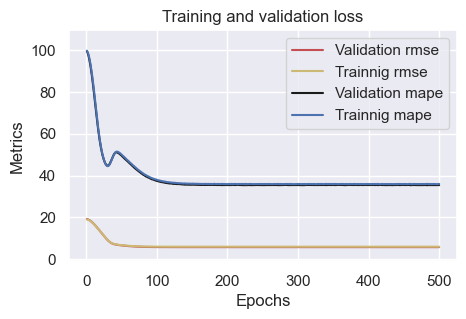

In [40]:
plotme(model2_0)

In [41]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
394/394 [==============================] - 0s 858us/step - loss: 1294143.1250 - mape: 99.4810 - rmse: 1137.6041 - val_loss: 1314149.1250 - val_mape: 98.6969 - val_rmse: 1146.3634
Epoch 2/500
394/394 [==============================] - 0s 723us/step - loss: 1257434.5000 - mape: 97.1513 - rmse: 1121.3539 - val_loss: 1258226.2500 - val_mape: 95.2554 - val_rmse: 1121.7068
Epoch 3/500
394/394 [==============================] - 0s 693us/step - loss: 1186144.6250 - mape: 92.5489 - rmse: 1089.1027 - val_loss: 1171112.8750 - val_mape: 89.7280 - val_rmse: 1082.1797
Epoch 4/500
394/394 [==============================] - 0s 735us/step - loss: 1090778.8750 - mape: 86.1781 - rmse: 1044.4036 - val_loss: 1065503.3750 - val_mape: 82.6625 - val_rmse: 1032.2322
Epoch 5/500
394/394 [==============================] - 0s 699us/step - loss: 982358.3750 - mape: 78.5621 - rmse: 991.1400 - val_loss: 951077.4375 - val_mape: 74.6900 - val_rmse: 975.2320
Epoch 6/500
394/394 [============================

Epoch 88/500
394/394 [==============================] - 0s 690us/step - loss: 127369.5312 - mape: 35.6361 - rmse: 356.8887 - val_loss: 118590.5469 - val_mape: 35.2161 - val_rmse: 344.3698
Epoch 89/500
394/394 [==============================] - 0s 699us/step - loss: 127368.1797 - mape: 35.7084 - rmse: 356.8868 - val_loss: 118579.0547 - val_mape: 35.1549 - val_rmse: 344.3531
Epoch 90/500
394/394 [==============================] - 0s 699us/step - loss: 127362.6953 - mape: 35.6277 - rmse: 356.8791 - val_loss: 118588.6250 - val_mape: 35.2469 - val_rmse: 344.3670
Epoch 91/500
394/394 [==============================] - 0s 692us/step - loss: 127343.7031 - mape: 35.6681 - rmse: 356.8525 - val_loss: 118556.4844 - val_mape: 35.0928 - val_rmse: 344.3203
Epoch 92/500
394/394 [==============================] - 0s 736us/step - loss: 127345.0234 - mape: 35.6292 - rmse: 356.8543 - val_loss: 118563.2734 - val_mape: 35.1895 - val_rmse: 344.3302
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 707us/step - loss: 126824.7734 - mape: 35.3213 - rmse: 356.1247 - val_loss: 118010.0078 - val_mape: 34.7772 - val_rmse: 343.5258
Epoch 175/500
394/394 [==============================] - 0s 695us/step - loss: 126822.1016 - mape: 35.2624 - rmse: 356.1209 - val_loss: 118006.0938 - val_mape: 34.7806 - val_rmse: 343.5201
Epoch 176/500
394/394 [==============================] - 0s 728us/step - loss: 126811.0078 - mape: 35.3047 - rmse: 356.1053 - val_loss: 117999.8750 - val_mape: 34.8294 - val_rmse: 343.5111
Epoch 177/500
394/394 [==============================] - 0s 735us/step - loss: 126802.2891 - mape: 35.2529 - rmse: 356.0931 - val_loss: 117994.3438 - val_mape: 34.8090 - val_rmse: 343.5031
Epoch 178/500
394/394 [==============================] - 0s 727us/step - loss: 126800.3359 - mape: 35.2931 - rmse: 356.0904 - val_loss: 117988.0547 - val_mape: 34.8313 - val_rmse: 343.4939
Epoch 179/500
394/394 [==============================] - 0s 717us/ste

394/394 [==============================] - 0s 728us/step - loss: 126409.1328 - mape: 35.1620 - rmse: 355.5406 - val_loss: 117571.9844 - val_mape: 34.5370 - val_rmse: 342.8877
Epoch 261/500
394/394 [==============================] - 0s 720us/step - loss: 126409.6406 - mape: 35.0670 - rmse: 355.5413 - val_loss: 117571.4141 - val_mape: 34.5836 - val_rmse: 342.8869
Epoch 262/500
394/394 [==============================] - 0s 726us/step - loss: 126402.2969 - mape: 35.0388 - rmse: 355.5310 - val_loss: 117570.5938 - val_mape: 34.5712 - val_rmse: 342.8857
Epoch 263/500
394/394 [==============================] - 0s 749us/step - loss: 126399.5078 - mape: 35.2059 - rmse: 355.5271 - val_loss: 117551.4609 - val_mape: 34.4338 - val_rmse: 342.8578
Epoch 264/500
394/394 [==============================] - 0s 709us/step - loss: 126393.7031 - mape: 35.0963 - rmse: 355.5189 - val_loss: 117545.4531 - val_mape: 34.4457 - val_rmse: 342.8490
Epoch 265/500
394/394 [==============================] - 0s 723us/ste

394/394 [==============================] - 0s 693us/step - loss: 126149.2578 - mape: 34.9941 - rmse: 355.1750 - val_loss: 117300.2109 - val_mape: 34.3513 - val_rmse: 342.4912
Epoch 347/500
394/394 [==============================] - 0s 714us/step - loss: 126143.5000 - mape: 34.8407 - rmse: 355.1669 - val_loss: 117333.2266 - val_mape: 34.5292 - val_rmse: 342.5394
Epoch 348/500
394/394 [==============================] - 0s 743us/step - loss: 126124.4375 - mape: 35.0810 - rmse: 355.1400 - val_loss: 117286.5312 - val_mape: 34.2189 - val_rmse: 342.4712
Epoch 349/500
394/394 [==============================] - 0s 721us/step - loss: 126139.3203 - mape: 34.8471 - rmse: 355.1610 - val_loss: 117295.8906 - val_mape: 34.3162 - val_rmse: 342.4849
Epoch 350/500
394/394 [==============================] - 0s 720us/step - loss: 126138.0703 - mape: 34.9474 - rmse: 355.1592 - val_loss: 117303.7422 - val_mape: 34.4089 - val_rmse: 342.4963
Epoch 351/500
394/394 [==============================] - 0s 699us/ste

394/394 [==============================] - 0s 750us/step - loss: 125987.0469 - mape: 34.7568 - rmse: 354.9465 - val_loss: 117168.4609 - val_mape: 34.4262 - val_rmse: 342.2988
Epoch 433/500
394/394 [==============================] - 0s 704us/step - loss: 125991.5938 - mape: 34.8785 - rmse: 354.9529 - val_loss: 117144.0078 - val_mape: 34.2832 - val_rmse: 342.2631
Epoch 434/500
394/394 [==============================] - 0s 721us/step - loss: 125979.9141 - mape: 34.8419 - rmse: 354.9365 - val_loss: 117164.9766 - val_mape: 34.4329 - val_rmse: 342.2937
Epoch 435/500
394/394 [==============================] - 0s 697us/step - loss: 125974.5781 - mape: 34.8304 - rmse: 354.9290 - val_loss: 117147.0156 - val_mape: 34.3626 - val_rmse: 342.2675
Epoch 436/500
394/394 [==============================] - 0s 758us/step - loss: 125975.6016 - mape: 34.9546 - rmse: 354.9304 - val_loss: 117131.7500 - val_mape: 34.2277 - val_rmse: 342.2451
Epoch 437/500
394/394 [==============================] - 0s 725us/ste

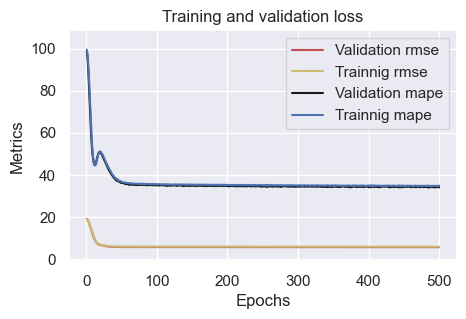

In [42]:
plotme(model2_1)

In [43]:
# inputs: distance + hour
model2_2 = nnmodel(50, num_hlayers=1,Epoch=1000)
model2_2

Epoch 1/1000
394/394 [==============================] - 0s 863us/step - loss: 1289433.7500 - mape: 99.2069 - rmse: 1135.5323 - val_loss: 1296060.6250 - val_mape: 97.6498 - val_rmse: 1138.4465
Epoch 2/1000
394/394 [==============================] - 0s 726us/step - loss: 1210678.0000 - mape: 94.2376 - rmse: 1100.3081 - val_loss: 1174686.0000 - val_mape: 90.0910 - val_rmse: 1083.8293
Epoch 3/1000
394/394 [==============================] - 0s 755us/step - loss: 1064452.0000 - mape: 84.4769 - rmse: 1031.7228 - val_loss: 1004499.0000 - val_mape: 78.5898 - val_rmse: 1002.2469
Epoch 4/1000
394/394 [==============================] - 0s 716us/step - loss: 889060.5625 - mape: 71.9981 - rmse: 942.9001 - val_loss: 821033.2500 - val_mape: 65.7818 - val_rmse: 906.1088
Epoch 5/1000
394/394 [==============================] - 0s 760us/step - loss: 713813.6250 - mape: 59.7360 - rmse: 844.8749 - val_loss: 648794.8750 - val_mape: 55.3007 - val_rmse: 805.4780
Epoch 6/1000
394/394 [==========================

394/394 [==============================] - 0s 711us/step - loss: 126469.9609 - mape: 35.1963 - rmse: 355.6262 - val_loss: 117616.2031 - val_mape: 34.4791 - val_rmse: 342.9522
Epoch 88/1000
394/394 [==============================] - 0s 713us/step - loss: 126463.6328 - mape: 34.9624 - rmse: 355.6172 - val_loss: 117646.0859 - val_mape: 34.8003 - val_rmse: 342.9958
Epoch 89/1000
394/394 [==============================] - 0s 699us/step - loss: 126454.1719 - mape: 35.2118 - rmse: 355.6039 - val_loss: 117602.4531 - val_mape: 34.5852 - val_rmse: 342.9321
Epoch 90/1000
394/394 [==============================] - 0s 709us/step - loss: 126455.6953 - mape: 35.0079 - rmse: 355.6061 - val_loss: 117612.2734 - val_mape: 34.6772 - val_rmse: 342.9465
Epoch 91/1000
394/394 [==============================] - 0s 728us/step - loss: 126436.1562 - mape: 35.0879 - rmse: 355.5786 - val_loss: 117612.2344 - val_mape: 34.6789 - val_rmse: 342.9464
Epoch 92/1000
394/394 [==============================] - 0s 716us/ste

394/394 [==============================] - 0s 707us/step - loss: 126023.9453 - mape: 34.9597 - rmse: 354.9985 - val_loss: 117169.5234 - val_mape: 34.0450 - val_rmse: 342.3004
Epoch 174/1000
394/394 [==============================] - 0s 733us/step - loss: 126023.6016 - mape: 34.6986 - rmse: 354.9980 - val_loss: 117181.4609 - val_mape: 34.3590 - val_rmse: 342.3178
Epoch 175/1000
394/394 [==============================] - 0s 736us/step - loss: 126023.1797 - mape: 34.8281 - rmse: 354.9974 - val_loss: 117140.2109 - val_mape: 34.2095 - val_rmse: 342.2575
Epoch 176/1000
394/394 [==============================] - 0s 723us/step - loss: 126019.5781 - mape: 34.8096 - rmse: 354.9924 - val_loss: 117172.8438 - val_mape: 34.3438 - val_rmse: 342.3052
Epoch 177/1000
394/394 [==============================] - 0s 740us/step - loss: 126025.2500 - mape: 34.7971 - rmse: 355.0004 - val_loss: 117170.9766 - val_mape: 34.3008 - val_rmse: 342.3025
Epoch 178/1000
394/394 [==============================] - 0s 731u

394/394 [==============================] - 0s 747us/step - loss: 125853.9922 - mape: 34.8667 - rmse: 354.7591 - val_loss: 117011.1406 - val_mape: 33.7545 - val_rmse: 342.0689
Epoch 260/1000
394/394 [==============================] - 0s 731us/step - loss: 125872.4141 - mape: 34.6003 - rmse: 354.7850 - val_loss: 117034.8672 - val_mape: 34.1631 - val_rmse: 342.1036
Epoch 261/1000
394/394 [==============================] - 0s 704us/step - loss: 125862.9609 - mape: 34.6404 - rmse: 354.7717 - val_loss: 117073.2422 - val_mape: 34.3770 - val_rmse: 342.1597
Epoch 262/1000
394/394 [==============================] - 0s 737us/step - loss: 125862.8594 - mape: 34.6960 - rmse: 354.7715 - val_loss: 117070.8828 - val_mape: 34.4313 - val_rmse: 342.1562
Epoch 263/1000
394/394 [==============================] - 0s 727us/step - loss: 125864.0312 - mape: 34.7202 - rmse: 354.7732 - val_loss: 117049.8750 - val_mape: 34.3992 - val_rmse: 342.1255
Epoch 264/1000
394/394 [==============================] - 0s 724u

394/394 [==============================] - 0s 713us/step - loss: 125803.7344 - mape: 34.6569 - rmse: 354.6882 - val_loss: 116983.6406 - val_mape: 34.2561 - val_rmse: 342.0287
Epoch 346/1000
394/394 [==============================] - 0s 755us/step - loss: 125811.2734 - mape: 34.7569 - rmse: 354.6989 - val_loss: 116959.3906 - val_mape: 33.9993 - val_rmse: 341.9933
Epoch 347/1000
394/394 [==============================] - 0s 739us/step - loss: 125802.5781 - mape: 34.5430 - rmse: 354.6866 - val_loss: 116978.8672 - val_mape: 34.1965 - val_rmse: 342.0217
Epoch 348/1000
394/394 [==============================] - 0s 695us/step - loss: 125803.0312 - mape: 34.7115 - rmse: 354.6872 - val_loss: 116945.0156 - val_mape: 34.0459 - val_rmse: 341.9722
Epoch 349/1000
394/394 [==============================] - 0s 705us/step - loss: 125809.8281 - mape: 34.6608 - rmse: 354.6968 - val_loss: 116961.4844 - val_mape: 34.1010 - val_rmse: 341.9963
Epoch 350/1000
394/394 [==============================] - 0s 683u

394/394 [==============================] - 0s 725us/step - loss: 125795.9844 - mape: 34.5317 - rmse: 354.6773 - val_loss: 116918.4609 - val_mape: 33.9353 - val_rmse: 341.9334
Epoch 432/1000
394/394 [==============================] - 0s 719us/step - loss: 125782.4922 - mape: 34.6406 - rmse: 354.6583 - val_loss: 116914.4844 - val_mape: 33.9418 - val_rmse: 341.9276
Epoch 433/1000
394/394 [==============================] - 0s 717us/step - loss: 125767.2266 - mape: 34.6483 - rmse: 354.6367 - val_loss: 116913.0156 - val_mape: 33.8709 - val_rmse: 341.9254
Epoch 434/1000
394/394 [==============================] - 0s 732us/step - loss: 125775.6875 - mape: 34.5863 - rmse: 354.6487 - val_loss: 116937.2266 - val_mape: 34.1179 - val_rmse: 341.9608
Epoch 435/1000
394/394 [==============================] - 0s 712us/step - loss: 125767.3125 - mape: 34.6130 - rmse: 354.6369 - val_loss: 116952.5312 - val_mape: 34.2399 - val_rmse: 341.9832
Epoch 436/1000
394/394 [==============================] - 0s 729u

394/394 [==============================] - 0s 731us/step - loss: 125761.7578 - mape: 34.5845 - rmse: 354.6290 - val_loss: 116922.9766 - val_mape: 34.1718 - val_rmse: 341.9400
Epoch 518/1000
394/394 [==============================] - 0s 713us/step - loss: 125753.5234 - mape: 34.6714 - rmse: 354.6174 - val_loss: 116885.5703 - val_mape: 34.0529 - val_rmse: 341.8853
Epoch 519/1000
394/394 [==============================] - 0s 728us/step - loss: 125756.6094 - mape: 34.6861 - rmse: 354.6218 - val_loss: 116917.0938 - val_mape: 34.1390 - val_rmse: 341.9314
Epoch 520/1000
394/394 [==============================] - 0s 706us/step - loss: 125742.0312 - mape: 34.5788 - rmse: 354.6012 - val_loss: 116935.2031 - val_mape: 34.2587 - val_rmse: 341.9579
Epoch 521/1000
394/394 [==============================] - 0s 750us/step - loss: 125740.4375 - mape: 34.7957 - rmse: 354.5990 - val_loss: 116903.5156 - val_mape: 33.9497 - val_rmse: 341.9116
Epoch 522/1000
394/394 [==============================] - 0s 724u

394/394 [==============================] - 0s 733us/step - loss: 125731.5234 - mape: 34.7446 - rmse: 354.5864 - val_loss: 116871.1328 - val_mape: 33.8938 - val_rmse: 341.8642
Epoch 604/1000
394/394 [==============================] - 0s 716us/step - loss: 125735.7500 - mape: 34.5722 - rmse: 354.5924 - val_loss: 116901.3828 - val_mape: 34.0756 - val_rmse: 341.9084
Epoch 605/1000
394/394 [==============================] - 0s 721us/step - loss: 125730.5000 - mape: 34.7113 - rmse: 354.5850 - val_loss: 116879.8281 - val_mape: 33.8376 - val_rmse: 341.8769
Epoch 606/1000
394/394 [==============================] - 0s 699us/step - loss: 125733.1641 - mape: 34.5792 - rmse: 354.5887 - val_loss: 116890.9922 - val_mape: 34.0032 - val_rmse: 341.8932
Epoch 607/1000
394/394 [==============================] - 0s 700us/step - loss: 125746.2266 - mape: 34.5436 - rmse: 354.6071 - val_loss: 116938.0625 - val_mape: 34.2751 - val_rmse: 341.9621
Epoch 608/1000
394/394 [==============================] - 0s 733u

394/394 [==============================] - 0s 721us/step - loss: 125737.7188 - mape: 34.5787 - rmse: 354.5952 - val_loss: 116895.2969 - val_mape: 34.1007 - val_rmse: 341.8995
Epoch 690/1000
394/394 [==============================] - 0s 724us/step - loss: 125730.0781 - mape: 34.6659 - rmse: 354.5844 - val_loss: 116874.8203 - val_mape: 33.9788 - val_rmse: 341.8696
Epoch 691/1000
394/394 [==============================] - 0s 716us/step - loss: 125739.9375 - mape: 34.5717 - rmse: 354.5983 - val_loss: 116900.5547 - val_mape: 34.1332 - val_rmse: 341.9072
Epoch 692/1000
394/394 [==============================] - 0s 735us/step - loss: 125732.1172 - mape: 34.6814 - rmse: 354.5872 - val_loss: 116874.0938 - val_mape: 33.9194 - val_rmse: 341.8685
Epoch 693/1000
394/394 [==============================] - 0s 713us/step - loss: 125737.6875 - mape: 34.5744 - rmse: 354.5951 - val_loss: 116887.5234 - val_mape: 34.1194 - val_rmse: 341.8882
Epoch 694/1000
394/394 [==============================] - 0s 750u

394/394 [==============================] - 0s 706us/step - loss: 125740.5156 - mape: 34.7487 - rmse: 354.5991 - val_loss: 116867.8750 - val_mape: 33.9625 - val_rmse: 341.8594
Epoch 776/1000
394/394 [==============================] - 0s 732us/step - loss: 125715.0547 - mape: 34.4464 - rmse: 354.5632 - val_loss: 116928.0078 - val_mape: 34.3245 - val_rmse: 341.9474
Epoch 777/1000
394/394 [==============================] - 0s 714us/step - loss: 125740.0234 - mape: 34.6931 - rmse: 354.5984 - val_loss: 116932.1016 - val_mape: 34.3465 - val_rmse: 341.9534
Epoch 778/1000
394/394 [==============================] - 0s 758us/step - loss: 125732.5547 - mape: 34.5987 - rmse: 354.5879 - val_loss: 116950.7266 - val_mape: 34.4204 - val_rmse: 341.9806
Epoch 779/1000
394/394 [==============================] - 0s 740us/step - loss: 125734.2578 - mape: 34.7330 - rmse: 354.5903 - val_loss: 116875.6094 - val_mape: 34.0107 - val_rmse: 341.8708
Epoch 780/1000
394/394 [==============================] - 0s 699u

394/394 [==============================] - 0s 695us/step - loss: 125718.0781 - mape: 34.5702 - rmse: 354.5674 - val_loss: 116894.6641 - val_mape: 34.1875 - val_rmse: 341.8986
Epoch 862/1000
394/394 [==============================] - 0s 691us/step - loss: 125729.0547 - mape: 34.6461 - rmse: 354.5829 - val_loss: 116856.5938 - val_mape: 33.9418 - val_rmse: 341.8429
Epoch 863/1000
394/394 [==============================] - 0s 713us/step - loss: 125732.4609 - mape: 34.4462 - rmse: 354.5877 - val_loss: 116930.2891 - val_mape: 34.3981 - val_rmse: 341.9507
Epoch 864/1000
394/394 [==============================] - 0s 724us/step - loss: 125737.6328 - mape: 34.7818 - rmse: 354.5950 - val_loss: 116862.6797 - val_mape: 34.0517 - val_rmse: 341.8518
Epoch 865/1000
394/394 [==============================] - 0s 709us/step - loss: 125723.2578 - mape: 34.6554 - rmse: 354.5748 - val_loss: 116852.9844 - val_mape: 33.6372 - val_rmse: 341.8376
Epoch 866/1000
394/394 [==============================] - 0s 733u

394/394 [==============================] - 0s 741us/step - loss: 125726.0859 - mape: 34.5695 - rmse: 354.5787 - val_loss: 116854.9453 - val_mape: 33.8596 - val_rmse: 341.8405
Epoch 948/1000
394/394 [==============================] - 0s 754us/step - loss: 125732.0312 - mape: 34.5826 - rmse: 354.5871 - val_loss: 116852.2344 - val_mape: 33.9002 - val_rmse: 341.8365
Epoch 949/1000
394/394 [==============================] - 0s 719us/step - loss: 125726.4453 - mape: 34.5630 - rmse: 354.5793 - val_loss: 116860.6641 - val_mape: 34.0739 - val_rmse: 341.8489
Epoch 950/1000
394/394 [==============================] - 0s 713us/step - loss: 125716.7656 - mape: 34.6227 - rmse: 354.5656 - val_loss: 116886.4688 - val_mape: 34.1823 - val_rmse: 341.8866
Epoch 951/1000
394/394 [==============================] - 0s 721us/step - loss: 125720.4688 - mape: 34.6433 - rmse: 354.5708 - val_loss: 116854.7266 - val_mape: 33.8921 - val_rmse: 341.8402
Epoch 952/1000
394/394 [==============================] - 0s 706u

In [44]:
# plotme(model2_2)

In [45]:
# inputs: distance + hour
model2_3 = nnmodel(100, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
394/394 [==============================] - 1s 981us/step - loss: 1277876.2500 - mape: 98.5061 - rmse: 1130.4319 - val_loss: 1259599.8750 - val_mape: 95.4542 - val_rmse: 1122.3190
Epoch 2/500
394/394 [==============================] - 0s 834us/step - loss: 1131075.5000 - mape: 89.0343 - rmse: 1063.5204 - val_loss: 1045406.1875 - val_mape: 81.4668 - val_rmse: 1022.4510
Epoch 3/500
394/394 [==============================] - 0s 833us/step - loss: 892060.2500 - mape: 72.0943 - rmse: 944.4894 - val_loss: 785444.3750 - val_mape: 63.5610 - val_rmse: 886.2530
Epoch 4/500
394/394 [==============================] - 0s 814us/step - loss: 647556.1250 - mape: 56.1847 - rmse: 804.7087 - val_loss: 553509.4375 - val_mape: 51.0284 - val_rmse: 743.9822
Epoch 5/500
394/394 [==============================] - 0s 881us/step - loss: 451192.2812 - mape: 47.3897 - rmse: 671.7085 - val_loss: 383130.9688 - val_mape: 45.4819 - val_rmse: 618.9758
Epoch 6/500
394/394 [==============================] - 0s

Epoch 88/500
394/394 [==============================] - 0s 843us/step - loss: 125972.0547 - mape: 34.7647 - rmse: 354.9254 - val_loss: 117164.3281 - val_mape: 34.5302 - val_rmse: 342.2928
Epoch 89/500
394/394 [==============================] - 0s 817us/step - loss: 125951.0312 - mape: 35.0184 - rmse: 354.8958 - val_loss: 117051.6172 - val_mape: 33.6859 - val_rmse: 342.1281
Epoch 90/500
394/394 [==============================] - 0s 841us/step - loss: 125947.2188 - mape: 34.5042 - rmse: 354.8904 - val_loss: 117136.0781 - val_mape: 34.5357 - val_rmse: 342.2515
Epoch 91/500
394/394 [==============================] - 0s 830us/step - loss: 125938.3750 - mape: 34.7615 - rmse: 354.8780 - val_loss: 117172.8281 - val_mape: 34.5446 - val_rmse: 342.3052
Epoch 92/500
394/394 [==============================] - 0s 803us/step - loss: 125956.2656 - mape: 34.7651 - rmse: 354.9032 - val_loss: 117164.5703 - val_mape: 34.6415 - val_rmse: 342.2931
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 810us/step - loss: 125821.4453 - mape: 34.6634 - rmse: 354.7132 - val_loss: 116991.4219 - val_mape: 34.3350 - val_rmse: 342.0401
Epoch 175/500
394/394 [==============================] - 0s 849us/step - loss: 125801.8750 - mape: 34.7411 - rmse: 354.6856 - val_loss: 116974.8906 - val_mape: 34.1077 - val_rmse: 342.0159
Epoch 176/500
394/394 [==============================] - 0s 816us/step - loss: 125810.1719 - mape: 34.6159 - rmse: 354.6973 - val_loss: 117001.3203 - val_mape: 34.3211 - val_rmse: 342.0546
Epoch 177/500
394/394 [==============================] - 0s 827us/step - loss: 125812.2969 - mape: 34.6227 - rmse: 354.7003 - val_loss: 116995.4141 - val_mape: 34.3618 - val_rmse: 342.0459
Epoch 178/500
394/394 [==============================] - 0s 814us/step - loss: 125812.0859 - mape: 34.7921 - rmse: 354.7000 - val_loss: 116920.2109 - val_mape: 33.7389 - val_rmse: 341.9360
Epoch 179/500
394/394 [==============================] - 0s 808us/ste

394/394 [==============================] - 0s 854us/step - loss: 125764.9375 - mape: 34.6133 - rmse: 354.6335 - val_loss: 117025.2812 - val_mape: 34.5429 - val_rmse: 342.0896
Epoch 261/500
394/394 [==============================] - 0s 850us/step - loss: 125769.8906 - mape: 34.6800 - rmse: 354.6405 - val_loss: 116956.3516 - val_mape: 34.3077 - val_rmse: 341.9888
Epoch 262/500
394/394 [==============================] - 0s 850us/step - loss: 125771.3750 - mape: 34.6585 - rmse: 354.6426 - val_loss: 116973.1953 - val_mape: 34.3312 - val_rmse: 342.0135
Epoch 263/500
394/394 [==============================] - 0s 819us/step - loss: 125765.7812 - mape: 34.6700 - rmse: 354.6347 - val_loss: 116887.3984 - val_mape: 34.0064 - val_rmse: 341.8880
Epoch 264/500
394/394 [==============================] - 0s 837us/step - loss: 125775.3984 - mape: 34.5155 - rmse: 354.6483 - val_loss: 116972.1484 - val_mape: 34.3552 - val_rmse: 342.0119
Epoch 265/500
394/394 [==============================] - 0s 859us/ste

394/394 [==============================] - 0s 819us/step - loss: 125756.0156 - mape: 34.5546 - rmse: 354.6209 - val_loss: 116919.2109 - val_mape: 34.1825 - val_rmse: 341.9345
Epoch 347/500
394/394 [==============================] - 0s 812us/step - loss: 125764.2109 - mape: 34.6063 - rmse: 354.6325 - val_loss: 116939.0469 - val_mape: 34.3149 - val_rmse: 341.9635
Epoch 348/500
394/394 [==============================] - 0s 821us/step - loss: 125738.4766 - mape: 34.6957 - rmse: 354.5962 - val_loss: 116880.7969 - val_mape: 33.9981 - val_rmse: 341.8783
Epoch 349/500
394/394 [==============================] - 0s 771us/step - loss: 125752.1250 - mape: 34.4974 - rmse: 354.6154 - val_loss: 116970.4688 - val_mape: 34.4697 - val_rmse: 342.0095
Epoch 350/500
394/394 [==============================] - 0s 777us/step - loss: 125749.1250 - mape: 34.5360 - rmse: 354.6112 - val_loss: 116939.3125 - val_mape: 34.4725 - val_rmse: 341.9639
Epoch 351/500
394/394 [==============================] - 0s 772us/ste

394/394 [==============================] - 0s 824us/step - loss: 125750.7344 - mape: 34.5437 - rmse: 354.6135 - val_loss: 116844.8047 - val_mape: 33.8944 - val_rmse: 341.8257
Epoch 433/500
394/394 [==============================] - 0s 826us/step - loss: 125747.6719 - mape: 34.5758 - rmse: 354.6092 - val_loss: 116843.8516 - val_mape: 34.0322 - val_rmse: 341.8243
Epoch 434/500
394/394 [==============================] - 0s 776us/step - loss: 125722.7031 - mape: 34.5495 - rmse: 354.5740 - val_loss: 116880.5938 - val_mape: 34.1804 - val_rmse: 341.8781
Epoch 435/500
394/394 [==============================] - 0s 856us/step - loss: 125755.0156 - mape: 34.6938 - rmse: 354.6195 - val_loss: 116866.4375 - val_mape: 33.8817 - val_rmse: 341.8573
Epoch 436/500
394/394 [==============================] - 0s 813us/step - loss: 125748.4922 - mape: 34.5109 - rmse: 354.6104 - val_loss: 116872.2891 - val_mape: 34.1048 - val_rmse: 341.8659
Epoch 437/500
394/394 [==============================] - 0s 814us/ste

In [46]:
# inputs: distance + hour
model2_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
394/394 [==============================] - 1s 918us/step - loss: 879918.3750 - mape: 74.0328 - rmse: 938.0397 - val_loss: 236738.8125 - val_mape: 47.5406 - val_rmse: 486.5581
Epoch 2/500
394/394 [==============================] - 0s 758us/step - loss: 175994.4844 - mape: 51.1326 - rmse: 419.5170 - val_loss: 152255.7500 - val_mape: 48.0540 - val_rmse: 390.1996
Epoch 3/500
394/394 [==============================] - 0s 781us/step - loss: 148286.5781 - mape: 47.0705 - rmse: 385.0800 - val_loss: 133567.2188 - val_mape: 43.7045 - val_rmse: 365.4685
Epoch 4/500
394/394 [==============================] - 0s 776us/step - loss: 135718.2656 - mape: 42.5552 - rmse: 368.3996 - val_loss: 123863.5234 - val_mape: 39.8178 - val_rmse: 351.9425
Epoch 5/500
394/394 [==============================] - 0s 747us/step - loss: 130282.2266 - mape: 39.2960 - rmse: 360.9463 - val_loss: 120556.3516 - val_mape: 37.9160 - val_rmse: 347.2122
Epoch 6/500
394/394 [==============================] - 0s 758us/s

Epoch 45/500
394/394 [==============================] - 0s 764us/step - loss: 128315.3125 - mape: 36.0745 - rmse: 358.2113 - val_loss: 119405.1641 - val_mape: 34.7728 - val_rmse: 345.5505
Epoch 46/500
394/394 [==============================] - 0s 787us/step - loss: 128371.6484 - mape: 35.7948 - rmse: 358.2899 - val_loss: 119974.1016 - val_mape: 36.6233 - val_rmse: 346.3728
Epoch 47/500
394/394 [==============================] - 0s 759us/step - loss: 128268.0859 - mape: 35.9441 - rmse: 358.1454 - val_loss: 119509.5234 - val_mape: 35.0653 - val_rmse: 345.7015
Epoch 48/500
394/394 [==============================] - 0s 784us/step - loss: 128327.9766 - mape: 35.8799 - rmse: 358.2289 - val_loss: 119859.0703 - val_mape: 36.5140 - val_rmse: 346.2067
Epoch 49/500
394/394 [==============================] - 0s 755us/step - loss: 128358.1016 - mape: 35.9742 - rmse: 358.2710 - val_loss: 119456.3359 - val_mape: 35.5987 - val_rmse: 345.6246
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 765us/step - loss: 128321.5078 - mape: 35.9898 - rmse: 358.2199 - val_loss: 119448.9688 - val_mape: 35.7096 - val_rmse: 345.6139
Epoch 132/500
394/394 [==============================] - 0s 776us/step - loss: 128282.7578 - mape: 35.9217 - rmse: 358.1658 - val_loss: 119643.0234 - val_mape: 34.5776 - val_rmse: 345.8945
Epoch 133/500
394/394 [==============================] - 0s 779us/step - loss: 128390.3906 - mape: 35.9289 - rmse: 358.3160 - val_loss: 119589.5547 - val_mape: 34.5124 - val_rmse: 345.8172
Epoch 134/500
394/394 [==============================] - 0s 780us/step - loss: 128355.4609 - mape: 36.0534 - rmse: 358.2673 - val_loss: 119428.8281 - val_mape: 35.6594 - val_rmse: 345.5848
Epoch 135/500
394/394 [==============================] - 0s 780us/step - loss: 128419.4844 - mape: 35.8916 - rmse: 358.3567 - val_loss: 119361.8438 - val_mape: 35.0258 - val_rmse: 345.4878
Epoch 136/500
394/394 [==============================] - 0s 757us/ste

394/394 [==============================] - 0s 749us/step - loss: 128313.7656 - mape: 35.8704 - rmse: 358.2091 - val_loss: 119815.8125 - val_mape: 36.1498 - val_rmse: 346.1442
Epoch 218/500
394/394 [==============================] - 0s 748us/step - loss: 128253.1719 - mape: 35.9850 - rmse: 358.1245 - val_loss: 119567.9375 - val_mape: 34.4744 - val_rmse: 345.7860
Epoch 219/500
394/394 [==============================] - 0s 756us/step - loss: 128368.6250 - mape: 35.8414 - rmse: 358.2857 - val_loss: 119466.4844 - val_mape: 35.7951 - val_rmse: 345.6393
Epoch 220/500
394/394 [==============================] - 0s 741us/step - loss: 128387.7031 - mape: 35.9999 - rmse: 358.3123 - val_loss: 119471.9297 - val_mape: 35.7849 - val_rmse: 345.6471
Epoch 221/500
394/394 [==============================] - 0s 764us/step - loss: 128421.5938 - mape: 36.0305 - rmse: 358.3596 - val_loss: 119944.9219 - val_mape: 36.6243 - val_rmse: 346.3307
Epoch 222/500
394/394 [==============================] - 0s 735us/ste

394/394 [==============================] - 0s 770us/step - loss: 128332.3906 - mape: 36.0400 - rmse: 358.2351 - val_loss: 119505.1797 - val_mape: 34.5031 - val_rmse: 345.6952
Epoch 304/500
394/394 [==============================] - 0s 763us/step - loss: 128357.1328 - mape: 35.8921 - rmse: 358.2696 - val_loss: 119384.2188 - val_mape: 35.5163 - val_rmse: 345.5202
Epoch 305/500
394/394 [==============================] - 0s 779us/step - loss: 128388.2344 - mape: 35.9855 - rmse: 358.3130 - val_loss: 119368.5156 - val_mape: 35.3563 - val_rmse: 345.4975
Epoch 306/500
394/394 [==============================] - 0s 784us/step - loss: 128356.8672 - mape: 35.8207 - rmse: 358.2693 - val_loss: 120684.1953 - val_mape: 37.4824 - val_rmse: 347.3963
Epoch 307/500
394/394 [==============================] - 0s 766us/step - loss: 128316.9375 - mape: 36.0474 - rmse: 358.2135 - val_loss: 119703.7031 - val_mape: 36.2488 - val_rmse: 345.9822
Epoch 308/500
394/394 [==============================] - 0s 765us/ste

394/394 [==============================] - 0s 779us/step - loss: 128367.1016 - mape: 36.0235 - rmse: 358.2835 - val_loss: 119615.9297 - val_mape: 36.0833 - val_rmse: 345.8553
Epoch 390/500
394/394 [==============================] - 0s 744us/step - loss: 128263.4844 - mape: 35.9110 - rmse: 358.1389 - val_loss: 119912.0391 - val_mape: 36.1288 - val_rmse: 346.2832
Epoch 391/500
394/394 [==============================] - 0s 771us/step - loss: 128412.5703 - mape: 35.9756 - rmse: 358.3470 - val_loss: 119691.8125 - val_mape: 36.1714 - val_rmse: 345.9651
Epoch 392/500
394/394 [==============================] - 0s 753us/step - loss: 128337.3984 - mape: 36.0001 - rmse: 358.2421 - val_loss: 119762.5234 - val_mape: 36.3613 - val_rmse: 346.0672
Epoch 393/500
394/394 [==============================] - 0s 760us/step - loss: 128381.5469 - mape: 35.9452 - rmse: 358.3037 - val_loss: 119713.0078 - val_mape: 36.2564 - val_rmse: 345.9957
Epoch 394/500
394/394 [==============================] - 0s 747us/ste

394/394 [==============================] - 0s 750us/step - loss: 128383.1250 - mape: 36.0576 - rmse: 358.3059 - val_loss: 119376.5391 - val_mape: 35.2998 - val_rmse: 345.5091
Epoch 476/500
394/394 [==============================] - 0s 771us/step - loss: 128319.0234 - mape: 35.8337 - rmse: 358.2165 - val_loss: 119360.1719 - val_mape: 35.1330 - val_rmse: 345.4854
Epoch 477/500
394/394 [==============================] - 0s 787us/step - loss: 128287.0391 - mape: 36.1330 - rmse: 358.1718 - val_loss: 119412.6562 - val_mape: 35.1406 - val_rmse: 345.5614
Epoch 478/500
394/394 [==============================] - 0s 764us/step - loss: 128405.8438 - mape: 35.7155 - rmse: 358.3376 - val_loss: 119517.6172 - val_mape: 35.4314 - val_rmse: 345.7132
Epoch 479/500
394/394 [==============================] - 0s 762us/step - loss: 128357.3672 - mape: 36.0166 - rmse: 358.2700 - val_loss: 119364.8906 - val_mape: 35.3765 - val_rmse: 345.4922
Epoch 480/500
394/394 [==============================] - 0s 764us/ste

In [47]:
# inputs: distance + hour
model2_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 630307.1875 - mape: 66.1700 - rmse: 793.9189 - val_loss: 161604.6406 - val_mape: 52.7863 - val_rmse: 402.0008
Epoch 2/500
394/394 [==============================] - 0s 827us/step - loss: 150092.4062 - mape: 47.6864 - rmse: 387.4176 - val_loss: 131035.9297 - val_mape: 42.9240 - val_rmse: 361.9889
Epoch 3/500
394/394 [==============================] - 0s 818us/step - loss: 132645.5625 - mape: 40.9023 - rmse: 364.2054 - val_loss: 121140.4844 - val_mape: 38.6537 - val_rmse: 348.0524
Epoch 4/500
394/394 [==============================] - 0s 836us/step - loss: 129017.4375 - mape: 37.4645 - rmse: 359.1900 - val_loss: 120193.4531 - val_mape: 37.4216 - val_rmse: 346.6893
Epoch 5/500
394/394 [==============================] - 0s 847us/step - loss: 128591.7656 - mape: 36.5034 - rmse: 358.5970 - val_loss: 119719.3125 - val_mape: 36.2428 - val_rmse: 346.0048
Epoch 6/500
394/394 [==============================] - 0s 834us/ste

Epoch 45/500
394/394 [==============================] - 0s 832us/step - loss: 128417.8047 - mape: 35.8294 - rmse: 358.3543 - val_loss: 120247.2812 - val_mape: 33.7380 - val_rmse: 346.7669
Epoch 46/500
394/394 [==============================] - 0s 839us/step - loss: 128597.5391 - mape: 36.1032 - rmse: 358.6050 - val_loss: 119584.0625 - val_mape: 34.4647 - val_rmse: 345.8093
Epoch 47/500
394/394 [==============================] - 0s 853us/step - loss: 128507.5312 - mape: 35.7934 - rmse: 358.4795 - val_loss: 119420.9688 - val_mape: 35.5579 - val_rmse: 345.5734
Epoch 48/500
394/394 [==============================] - 0s 847us/step - loss: 128391.9375 - mape: 35.9519 - rmse: 358.3182 - val_loss: 120432.6641 - val_mape: 37.2652 - val_rmse: 347.0341
Epoch 49/500
394/394 [==============================] - 0s 845us/step - loss: 128445.8047 - mape: 36.1129 - rmse: 358.3934 - val_loss: 119561.6250 - val_mape: 36.0307 - val_rmse: 345.7769
Epoch 50/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 835us/step - loss: 128397.2188 - mape: 35.8674 - rmse: 358.3256 - val_loss: 121297.1875 - val_mape: 37.8814 - val_rmse: 348.2775
Epoch 132/500
394/394 [==============================] - 0s 820us/step - loss: 128408.7656 - mape: 35.9559 - rmse: 358.3417 - val_loss: 119637.1328 - val_mape: 36.2140 - val_rmse: 345.8860
Epoch 133/500
394/394 [==============================] - 0s 822us/step - loss: 128474.8438 - mape: 36.1746 - rmse: 358.4339 - val_loss: 119393.8438 - val_mape: 34.8699 - val_rmse: 345.5341
Epoch 134/500
394/394 [==============================] - 0s 837us/step - loss: 128524.6562 - mape: 35.8458 - rmse: 358.5034 - val_loss: 119423.4531 - val_mape: 34.9832 - val_rmse: 345.5770
Epoch 135/500
394/394 [==============================] - 0s 847us/step - loss: 128367.9062 - mape: 36.0388 - rmse: 358.2847 - val_loss: 119438.3828 - val_mape: 35.4854 - val_rmse: 345.5986
Epoch 136/500
394/394 [==============================] - 0s 846us/ste

394/394 [==============================] - 0s 880us/step - loss: 128470.7812 - mape: 35.9729 - rmse: 358.4282 - val_loss: 120135.7812 - val_mape: 36.9967 - val_rmse: 346.6061
Epoch 218/500
394/394 [==============================] - 0s 850us/step - loss: 128445.1797 - mape: 36.0779 - rmse: 358.3925 - val_loss: 119830.3203 - val_mape: 36.4465 - val_rmse: 346.1652
Epoch 219/500
394/394 [==============================] - 0s 859us/step - loss: 128480.0078 - mape: 36.0142 - rmse: 358.4411 - val_loss: 119929.1016 - val_mape: 36.2983 - val_rmse: 346.3078
Epoch 220/500
394/394 [==============================] - 0s 831us/step - loss: 128461.8438 - mape: 35.9532 - rmse: 358.4157 - val_loss: 119412.5938 - val_mape: 34.8164 - val_rmse: 345.5613
Epoch 221/500
394/394 [==============================] - 0s 865us/step - loss: 128496.8047 - mape: 35.8748 - rmse: 358.4645 - val_loss: 119545.0938 - val_mape: 35.7212 - val_rmse: 345.7529
Epoch 222/500
394/394 [==============================] - 0s 883us/ste

394/394 [==============================] - 0s 855us/step - loss: 128422.0078 - mape: 35.7869 - rmse: 358.3602 - val_loss: 119434.2109 - val_mape: 35.6586 - val_rmse: 345.5926
Epoch 304/500
394/394 [==============================] - 0s 865us/step - loss: 128476.3828 - mape: 36.1467 - rmse: 358.4360 - val_loss: 119366.8125 - val_mape: 35.2127 - val_rmse: 345.4950
Epoch 305/500
394/394 [==============================] - 0s 860us/step - loss: 128522.6328 - mape: 35.9962 - rmse: 358.5005 - val_loss: 119412.0547 - val_mape: 35.6001 - val_rmse: 345.5605
Epoch 306/500
394/394 [==============================] - 0s 841us/step - loss: 128385.2031 - mape: 35.7912 - rmse: 358.3088 - val_loss: 120323.3984 - val_mape: 36.9539 - val_rmse: 346.8766
Epoch 307/500
394/394 [==============================] - 0s 868us/step - loss: 128365.8438 - mape: 35.9997 - rmse: 358.2818 - val_loss: 119466.8438 - val_mape: 35.7764 - val_rmse: 345.6398
Epoch 308/500
394/394 [==============================] - 0s 886us/ste

394/394 [==============================] - 0s 816us/step - loss: 128570.1797 - mape: 35.9217 - rmse: 358.5668 - val_loss: 119782.4609 - val_mape: 33.9724 - val_rmse: 346.0960
Epoch 390/500
394/394 [==============================] - 0s 861us/step - loss: 128417.5547 - mape: 35.8582 - rmse: 358.3539 - val_loss: 120091.7891 - val_mape: 36.7486 - val_rmse: 346.5426
Epoch 391/500
394/394 [==============================] - 0s 840us/step - loss: 128420.6953 - mape: 36.1406 - rmse: 358.3583 - val_loss: 119349.2656 - val_mape: 34.9912 - val_rmse: 345.4696
Epoch 392/500
394/394 [==============================] - 0s 839us/step - loss: 128474.6719 - mape: 35.8836 - rmse: 358.4336 - val_loss: 119484.8359 - val_mape: 35.7208 - val_rmse: 345.6658
Epoch 393/500
394/394 [==============================] - 0s 843us/step - loss: 128344.5391 - mape: 35.9108 - rmse: 358.2521 - val_loss: 119379.2891 - val_mape: 35.2127 - val_rmse: 345.5131
Epoch 394/500
394/394 [==============================] - 0s 817us/ste

394/394 [==============================] - 0s 827us/step - loss: 128448.9766 - mape: 36.1332 - rmse: 358.3978 - val_loss: 119735.0000 - val_mape: 34.1219 - val_rmse: 346.0275
Epoch 476/500
394/394 [==============================] - 0s 860us/step - loss: 128420.1172 - mape: 35.7814 - rmse: 358.3575 - val_loss: 119479.5703 - val_mape: 34.7491 - val_rmse: 345.6582
Epoch 477/500
394/394 [==============================] - 0s 853us/step - loss: 128531.3594 - mape: 35.9030 - rmse: 358.5127 - val_loss: 119433.3594 - val_mape: 35.6015 - val_rmse: 345.5913
Epoch 478/500
394/394 [==============================] - 0s 821us/step - loss: 128515.4766 - mape: 36.0096 - rmse: 358.4905 - val_loss: 119395.4453 - val_mape: 35.4035 - val_rmse: 345.5365
Epoch 479/500
394/394 [==============================] - 0s 873us/step - loss: 128397.4453 - mape: 35.8747 - rmse: 358.3259 - val_loss: 119401.4766 - val_mape: 35.4647 - val_rmse: 345.5452
Epoch 480/500
394/394 [==============================] - 0s 825us/ste

# sub-problem 3:     ******* input: distance & hour & dominated roadtype *********

In [48]:
df1 = df.iloc[:,0:6].copy()
df1 = df1.drop('hr_sin',axis=1)
df1 = df1.drop('hr_cos',axis=1)
df1.head()

travel time  distance  hour of day    1st ranked
0         1163  0.578883           18       primary
1          347  0.048963           21       service
2          720  0.268455           19       primary
3          355  0.056803           16  unclassified
4          356  0.076939           17   residential

In [49]:
df1['1st ranked'].isna().sum()

0

In [50]:
summar1 = df.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         203
primary         6395
residential     2173
secondary       3775
service          596
tertiary        1355
track              2
trunk              1
unclassified    1228
Name: travel time, dtype: int64

In [51]:
option = ['residential','tertiary','primary','secondary']
df1.loc[~df1['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df1.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        2030
primary        6395
residential    2173
secondary      3775
tertiary       1355
Name: travel time, dtype: int64

### 1. One-hot encoding of dominated roadtype

In [52]:
import category_encoders as ce
from category_encoders.target_encoder import TargetEncoder

In [53]:
dummy_ = pd.get_dummies(df1['1st ranked'], prefix='dominant_')
df1 = pd.merge(
    left=df1,
    right=dummy_,
    left_index=True,
    right_index=True,)


In [54]:
df1 = df1.drop(columns = ['1st ranked'])
df1.head()

travel time  distance  hour of day  dominant__others1  dominant__primary  \
0         1163  0.578883           18                  0                  1   
1          347  0.048963           21                  1                  0   
2          720  0.268455           19                  0                  1   
3          355  0.056803           16                  1                  0   
4          356  0.076939           17                  0                  0   

   dominant__residential  dominant__secondary  dominant__tertiary  
0                      0                    0                   0  
1                      0                    0                   0  
2                      0                    0                   0  
3                      0                    0                   0  
4                      1                    0                   0

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

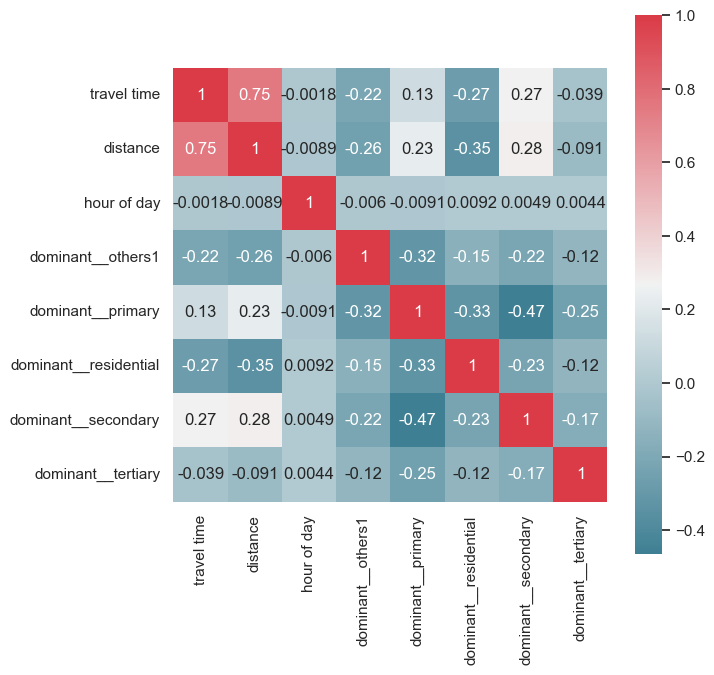

In [55]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(7,7))
corr = df1.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [56]:
x = np.array(df1[['distance','dominant__others1','dominant__primary','dominant__residential','dominant__tertiary','dominant__secondary']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df1['travel time'])
x

array([[0.57888295, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.04896347, 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.26845474, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.59311695, 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.5973016 , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.3923505 , 0.        , 1.        , 0.        , 0.        ,
        0.        ]])

In [57]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 6)
(3146, 6)


In [59]:
# inputs: distance +  dominant road
model3_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_1_1

Epoch 1/500
394/394 [==============================] - 1s 976us/step - loss: 1283892.1250 - mape: 98.8407 - rmse: 1133.0896 - val_loss: 1279643.3750 - val_mape: 96.5151 - val_rmse: 1131.2133
Epoch 2/500
394/394 [==============================] - 0s 873us/step - loss: 1179079.7500 - mape: 91.8845 - rmse: 1085.8544 - val_loss: 1125002.2500 - val_mape: 86.2410 - val_rmse: 1060.6613
Epoch 3/500
394/394 [==============================] - 0s 879us/step - loss: 998591.5625 - mape: 78.9225 - rmse: 999.2955 - val_loss: 918301.3125 - val_mape: 71.2349 - val_rmse: 958.2804
Epoch 4/500
394/394 [==============================] - 0s 854us/step - loss: 788940.0000 - mape: 62.9763 - rmse: 888.2230 - val_loss: 702531.6250 - val_mape: 55.3133 - val_rmse: 838.1716
Epoch 5/500
394/394 [==============================] - 0s 829us/step - loss: 589095.5000 - mape: 49.4300 - rmse: 767.5256 - val_loss: 513010.8438 - val_mape: 45.5788 - val_rmse: 716.2477
Epoch 6/500
394/394 [==============================] - 0s

Epoch 88/500
394/394 [==============================] - 0s 846us/step - loss: 126455.7578 - mape: 35.2743 - rmse: 355.6062 - val_loss: 116962.1094 - val_mape: 34.3834 - val_rmse: 341.9972
Epoch 89/500
394/394 [==============================] - 0s 850us/step - loss: 126451.8672 - mape: 35.0621 - rmse: 355.6007 - val_loss: 116964.7422 - val_mape: 34.6607 - val_rmse: 342.0011
Epoch 90/500
394/394 [==============================] - 0s 838us/step - loss: 126441.8750 - mape: 35.1398 - rmse: 355.5867 - val_loss: 116954.5859 - val_mape: 34.3803 - val_rmse: 341.9862
Epoch 91/500
394/394 [==============================] - 0s 849us/step - loss: 126422.4453 - mape: 35.0845 - rmse: 355.5594 - val_loss: 116980.6719 - val_mape: 34.7995 - val_rmse: 342.0244
Epoch 92/500
394/394 [==============================] - 0s 862us/step - loss: 126427.8828 - mape: 35.0717 - rmse: 355.5670 - val_loss: 116983.4766 - val_mape: 34.8381 - val_rmse: 342.0285
Epoch 93/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 869us/step - loss: 126071.7578 - mape: 34.8948 - rmse: 355.0659 - val_loss: 116586.3750 - val_mape: 34.4630 - val_rmse: 341.4475
Epoch 175/500
394/394 [==============================] - 0s 864us/step - loss: 126064.7422 - mape: 34.9016 - rmse: 355.0560 - val_loss: 116560.3828 - val_mape: 34.3699 - val_rmse: 341.4094
Epoch 176/500
394/394 [==============================] - 0s 832us/step - loss: 126068.5625 - mape: 34.9371 - rmse: 355.0613 - val_loss: 116553.0312 - val_mape: 34.3217 - val_rmse: 341.3987
Epoch 177/500
394/394 [==============================] - 0s 843us/step - loss: 126059.7031 - mape: 34.8483 - rmse: 355.0489 - val_loss: 116551.3438 - val_mape: 34.2817 - val_rmse: 341.3962
Epoch 178/500
394/394 [==============================] - 0s 873us/step - loss: 126059.8750 - mape: 34.9543 - rmse: 355.0491 - val_loss: 116560.2656 - val_mape: 34.2271 - val_rmse: 341.4092
Epoch 179/500
394/394 [==============================] - 0s 911us/ste

394/394 [==============================] - 0s 801us/step - loss: 125983.2188 - mape: 34.9665 - rmse: 354.9412 - val_loss: 116441.1953 - val_mape: 33.9979 - val_rmse: 341.2348
Epoch 261/500
394/394 [==============================] - 0s 823us/step - loss: 125981.3359 - mape: 34.6772 - rmse: 354.9385 - val_loss: 116481.7422 - val_mape: 34.5757 - val_rmse: 341.2942
Epoch 262/500
394/394 [==============================] - 0s 801us/step - loss: 125997.4609 - mape: 34.9602 - rmse: 354.9612 - val_loss: 116433.7891 - val_mape: 34.2477 - val_rmse: 341.2240
Epoch 263/500
394/394 [==============================] - 0s 810us/step - loss: 125981.2188 - mape: 34.7822 - rmse: 354.9383 - val_loss: 116439.3203 - val_mape: 34.2621 - val_rmse: 341.2321
Epoch 264/500
394/394 [==============================] - 0s 842us/step - loss: 125976.7500 - mape: 34.9199 - rmse: 354.9320 - val_loss: 116426.1953 - val_mape: 33.9615 - val_rmse: 341.2128
Epoch 265/500
394/394 [==============================] - 0s 797us/ste

394/394 [==============================] - 0s 842us/step - loss: 125962.3438 - mape: 34.6332 - rmse: 354.9117 - val_loss: 116485.1641 - val_mape: 34.7031 - val_rmse: 341.2992
Epoch 347/500
394/394 [==============================] - 0s 856us/step - loss: 125955.1562 - mape: 34.8522 - rmse: 354.9016 - val_loss: 116433.7422 - val_mape: 34.4155 - val_rmse: 341.2239
Epoch 348/500
394/394 [==============================] - 0s 876us/step - loss: 125951.1328 - mape: 34.8822 - rmse: 354.8959 - val_loss: 116424.2969 - val_mape: 34.3248 - val_rmse: 341.2101
Epoch 349/500
394/394 [==============================] - 0s 913us/step - loss: 125946.5000 - mape: 35.0431 - rmse: 354.8894 - val_loss: 116400.3359 - val_mape: 33.9549 - val_rmse: 341.1749
Epoch 350/500
394/394 [==============================] - 0s 931us/step - loss: 125955.9297 - mape: 34.6807 - rmse: 354.9027 - val_loss: 116392.4844 - val_mape: 34.0873 - val_rmse: 341.1634
Epoch 351/500
394/394 [==============================] - 0s 843us/ste

394/394 [==============================] - 0s 828us/step - loss: 125949.8906 - mape: 34.7417 - rmse: 354.8942 - val_loss: 116393.9141 - val_mape: 34.2667 - val_rmse: 341.1655
Epoch 433/500
394/394 [==============================] - 0s 869us/step - loss: 125925.3125 - mape: 34.8213 - rmse: 354.8596 - val_loss: 116393.8594 - val_mape: 34.1184 - val_rmse: 341.1654
Epoch 434/500
394/394 [==============================] - 0s 834us/step - loss: 125929.5469 - mape: 34.6441 - rmse: 354.8655 - val_loss: 116453.5703 - val_mape: 34.6348 - val_rmse: 341.2529
Epoch 435/500
394/394 [==============================] - 0s 879us/step - loss: 125942.8359 - mape: 34.8784 - rmse: 354.8842 - val_loss: 116432.6641 - val_mape: 34.5691 - val_rmse: 341.2223
Epoch 436/500
394/394 [==============================] - 0s 838us/step - loss: 125926.2031 - mape: 34.9989 - rmse: 354.8608 - val_loss: 116388.7891 - val_mape: 33.8927 - val_rmse: 341.1580
Epoch 437/500
394/394 [==============================] - 0s 844us/ste

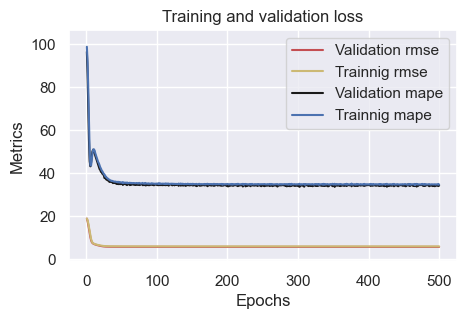

In [60]:
plotme(model3_1_1)


In [61]:
# inputs: distance +  dominant road
model3_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_1_2

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 1269719.6250 - mape: 97.9769 - rmse: 1126.8184 - val_loss: 1231108.2500 - val_mape: 93.4481 - val_rmse: 1109.5532
Epoch 2/500
394/394 [==============================] - 0s 745us/step - loss: 1070210.2500 - mape: 84.2222 - rmse: 1034.5096 - val_loss: 945578.6250 - val_mape: 73.3939 - val_rmse: 972.4087
Epoch 3/500
394/394 [==============================] - 0s 765us/step - loss: 762918.2500 - mape: 61.2330 - rmse: 873.4519 - val_loss: 625435.1250 - val_mape: 50.6010 - val_rmse: 790.8445
Epoch 4/500
394/394 [==============================] - 0s 725us/step - loss: 483233.1875 - mape: 45.3037 - rmse: 695.1498 - val_loss: 383557.7500 - val_mape: 43.0530 - val_rmse: 619.3204
Epoch 5/500
394/394 [==============================] - 0s 735us/step - loss: 304620.3750 - mape: 43.8930 - rmse: 551.9243 - val_loss: 254662.1406 - val_mape: 45.8033 - val_rmse: 504.6406
Epoch 6/500
394/394 [==============================] - 0s 762

Epoch 88/500
394/394 [==============================] - 0s 733us/step - loss: 126470.6953 - mape: 35.0653 - rmse: 355.6272 - val_loss: 117006.5391 - val_mape: 34.4970 - val_rmse: 342.0622
Epoch 89/500
394/394 [==============================] - 0s 720us/step - loss: 126444.1250 - mape: 35.0861 - rmse: 355.5898 - val_loss: 117041.1875 - val_mape: 34.8724 - val_rmse: 342.1128
Epoch 90/500
394/394 [==============================] - 0s 732us/step - loss: 126460.9141 - mape: 35.2307 - rmse: 355.6134 - val_loss: 117006.8281 - val_mape: 34.5833 - val_rmse: 342.0626
Epoch 91/500
394/394 [==============================] - 0s 766us/step - loss: 126447.6406 - mape: 35.1830 - rmse: 355.5948 - val_loss: 116974.9453 - val_mape: 34.4394 - val_rmse: 342.0160
Epoch 92/500
394/394 [==============================] - 0s 713us/step - loss: 126415.1172 - mape: 35.0055 - rmse: 355.5490 - val_loss: 117129.0625 - val_mape: 35.2755 - val_rmse: 342.2412
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 749us/step - loss: 126038.3906 - mape: 34.8949 - rmse: 355.0189 - val_loss: 116633.2422 - val_mape: 33.6996 - val_rmse: 341.5161
Epoch 175/500
394/394 [==============================] - 0s 742us/step - loss: 126033.9688 - mape: 34.8360 - rmse: 355.0126 - val_loss: 116570.2188 - val_mape: 34.0262 - val_rmse: 341.4238
Epoch 176/500
394/394 [==============================] - 0s 753us/step - loss: 126026.8984 - mape: 34.9453 - rmse: 355.0027 - val_loss: 116563.3125 - val_mape: 34.0682 - val_rmse: 341.4137
Epoch 177/500
394/394 [==============================] - 0s 738us/step - loss: 126018.2656 - mape: 34.6970 - rmse: 354.9905 - val_loss: 116674.6172 - val_mape: 34.8274 - val_rmse: 341.5767
Epoch 178/500
394/394 [==============================] - 0s 746us/step - loss: 126056.5625 - mape: 34.9934 - rmse: 355.0445 - val_loss: 116583.1016 - val_mape: 34.1026 - val_rmse: 341.4427
Epoch 179/500
394/394 [==============================] - 0s 723us/ste

394/394 [==============================] - 0s 713us/step - loss: 125958.3750 - mape: 34.6426 - rmse: 354.9062 - val_loss: 116503.9922 - val_mape: 34.4470 - val_rmse: 341.3268
Epoch 261/500
394/394 [==============================] - 0s 744us/step - loss: 125949.5391 - mape: 35.0097 - rmse: 354.8937 - val_loss: 116493.2812 - val_mape: 33.8776 - val_rmse: 341.3111
Epoch 262/500
394/394 [==============================] - 0s 721us/step - loss: 125952.2578 - mape: 34.6377 - rmse: 354.8975 - val_loss: 116478.9219 - val_mape: 34.3816 - val_rmse: 341.2901
Epoch 263/500
394/394 [==============================] - 0s 741us/step - loss: 125951.1875 - mape: 34.9273 - rmse: 354.8960 - val_loss: 116455.8594 - val_mape: 34.1343 - val_rmse: 341.2563
Epoch 264/500
394/394 [==============================] - 0s 769us/step - loss: 125943.0391 - mape: 34.7533 - rmse: 354.8846 - val_loss: 116478.6641 - val_mape: 34.1374 - val_rmse: 341.2897
Epoch 265/500
394/394 [==============================] - 0s 710us/ste

394/394 [==============================] - 0s 708us/step - loss: 125922.5469 - mape: 34.7553 - rmse: 354.8557 - val_loss: 116460.5625 - val_mape: 34.3794 - val_rmse: 341.2632
Epoch 347/500
394/394 [==============================] - 0s 730us/step - loss: 125929.7578 - mape: 34.7025 - rmse: 354.8658 - val_loss: 116444.4297 - val_mape: 34.2203 - val_rmse: 341.2396
Epoch 348/500
394/394 [==============================] - 0s 734us/step - loss: 125930.5234 - mape: 34.7184 - rmse: 354.8669 - val_loss: 116536.2812 - val_mape: 34.7995 - val_rmse: 341.3741
Epoch 349/500
394/394 [==============================] - 0s 727us/step - loss: 125950.6250 - mape: 34.9244 - rmse: 354.8952 - val_loss: 116431.0547 - val_mape: 34.0096 - val_rmse: 341.2199
Epoch 350/500
394/394 [==============================] - 0s 723us/step - loss: 125911.9141 - mape: 34.7079 - rmse: 354.8407 - val_loss: 116449.1562 - val_mape: 33.9742 - val_rmse: 341.2465
Epoch 351/500
394/394 [==============================] - 0s 759us/ste

394/394 [==============================] - 0s 755us/step - loss: 125914.0703 - mape: 34.7359 - rmse: 354.8437 - val_loss: 116439.5781 - val_mape: 34.3733 - val_rmse: 341.2325
Epoch 433/500
394/394 [==============================] - 0s 706us/step - loss: 125884.3359 - mape: 34.8894 - rmse: 354.8018 - val_loss: 116466.6484 - val_mape: 33.7097 - val_rmse: 341.2721
Epoch 434/500
394/394 [==============================] - 0s 761us/step - loss: 125883.0391 - mape: 34.6270 - rmse: 354.8000 - val_loss: 116451.0703 - val_mape: 34.3791 - val_rmse: 341.2493
Epoch 435/500
394/394 [==============================] - 0s 707us/step - loss: 125901.2656 - mape: 34.8962 - rmse: 354.8257 - val_loss: 116431.8672 - val_mape: 34.2992 - val_rmse: 341.2211
Epoch 436/500
394/394 [==============================] - 0s 723us/step - loss: 125897.6172 - mape: 34.8700 - rmse: 354.8206 - val_loss: 116423.1641 - val_mape: 33.8723 - val_rmse: 341.2084
Epoch 437/500
394/394 [==============================] - 0s 745us/ste

In [62]:
# inputs: distance +  dominant road
model3_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model3_1_3

Epoch 1/500
394/394 [==============================] - 1s 932us/step - loss: 1231727.7500 - mape: 95.4100 - rmse: 1109.8323 - val_loss: 1115535.6250 - val_mape: 85.6351 - val_rmse: 1056.1892
Epoch 2/500
394/394 [==============================] - 0s 752us/step - loss: 858376.3125 - mape: 68.4647 - rmse: 926.4860 - val_loss: 639893.1250 - val_mape: 51.4305 - val_rmse: 799.9332
Epoch 3/500
394/394 [==============================] - 0s 764us/step - loss: 441795.0000 - mape: 44.4736 - rmse: 664.6766 - val_loss: 309648.0312 - val_mape: 43.7222 - val_rmse: 556.4603
Epoch 4/500
394/394 [==============================] - 0s 776us/step - loss: 242416.2656 - mape: 46.6182 - rmse: 492.3578 - val_loss: 206028.7344 - val_mape: 49.6711 - val_rmse: 453.9039
Epoch 5/500
394/394 [==============================] - 0s 752us/step - loss: 193485.1875 - mape: 51.3099 - rmse: 439.8695 - val_loss: 182649.5781 - val_mape: 51.1827 - val_rmse: 427.3752
Epoch 6/500
394/394 [==============================] - 0s 765

Epoch 88/500
394/394 [==============================] - 0s 759us/step - loss: 126232.2969 - mape: 34.8459 - rmse: 355.2918 - val_loss: 116744.2266 - val_mape: 34.6479 - val_rmse: 341.6785
Epoch 89/500
394/394 [==============================] - 0s 764us/step - loss: 126225.4375 - mape: 35.0570 - rmse: 355.2822 - val_loss: 116716.7969 - val_mape: 34.0092 - val_rmse: 341.6384
Epoch 90/500
394/394 [==============================] - 0s 757us/step - loss: 126194.5547 - mape: 34.8331 - rmse: 355.2387 - val_loss: 116791.1406 - val_mape: 34.8829 - val_rmse: 341.7472
Epoch 91/500
394/394 [==============================] - 0s 755us/step - loss: 126205.3281 - mape: 35.0900 - rmse: 355.2539 - val_loss: 116752.3984 - val_mape: 34.7573 - val_rmse: 341.6905
Epoch 92/500
394/394 [==============================] - 0s 755us/step - loss: 126195.5703 - mape: 34.9994 - rmse: 355.2402 - val_loss: 116696.8203 - val_mape: 34.2075 - val_rmse: 341.6092
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 764us/step - loss: 126000.6250 - mape: 34.7626 - rmse: 354.9657 - val_loss: 116444.6719 - val_mape: 34.3784 - val_rmse: 341.2399
Epoch 175/500
394/394 [==============================] - 0s 772us/step - loss: 125996.9531 - mape: 34.8903 - rmse: 354.9605 - val_loss: 116457.2422 - val_mape: 34.4329 - val_rmse: 341.2583
Epoch 176/500
394/394 [==============================] - 0s 779us/step - loss: 126000.5547 - mape: 34.8638 - rmse: 354.9656 - val_loss: 116442.3125 - val_mape: 34.3632 - val_rmse: 341.2365
Epoch 177/500
394/394 [==============================] - 0s 763us/step - loss: 126001.5156 - mape: 34.8810 - rmse: 354.9669 - val_loss: 116450.3281 - val_mape: 33.9745 - val_rmse: 341.2482
Epoch 178/500
394/394 [==============================] - 0s 779us/step - loss: 126017.6406 - mape: 34.7283 - rmse: 354.9896 - val_loss: 116456.9688 - val_mape: 34.4760 - val_rmse: 341.2579
Epoch 179/500
394/394 [==============================] - 0s 739us/ste

394/394 [==============================] - 0s 763us/step - loss: 125962.3906 - mape: 34.7808 - rmse: 354.9118 - val_loss: 116391.8906 - val_mape: 34.1668 - val_rmse: 341.1626
Epoch 261/500
394/394 [==============================] - 0s 738us/step - loss: 125935.7969 - mape: 34.7466 - rmse: 354.8743 - val_loss: 116430.1094 - val_mape: 34.4915 - val_rmse: 341.2186
Epoch 262/500
394/394 [==============================] - 0s 763us/step - loss: 125953.2578 - mape: 34.8385 - rmse: 354.8989 - val_loss: 116438.3281 - val_mape: 34.6331 - val_rmse: 341.2306
Epoch 263/500
394/394 [==============================] - 0s 751us/step - loss: 125904.4062 - mape: 34.6958 - rmse: 354.8301 - val_loss: 116737.0156 - val_mape: 35.4254 - val_rmse: 341.6680
Epoch 264/500
394/394 [==============================] - 0s 738us/step - loss: 125993.2734 - mape: 34.8506 - rmse: 354.9553 - val_loss: 116447.1484 - val_mape: 34.4763 - val_rmse: 341.2435
Epoch 265/500
394/394 [==============================] - 0s 750us/ste

394/394 [==============================] - 0s 752us/step - loss: 125917.7188 - mape: 34.6738 - rmse: 354.8489 - val_loss: 116405.3281 - val_mape: 34.3941 - val_rmse: 341.1823
Epoch 347/500
394/394 [==============================] - 0s 750us/step - loss: 125896.9609 - mape: 34.7581 - rmse: 354.8196 - val_loss: 116434.8203 - val_mape: 34.4794 - val_rmse: 341.2255
Epoch 348/500
394/394 [==============================] - 0s 728us/step - loss: 125926.5547 - mape: 34.7934 - rmse: 354.8613 - val_loss: 116381.2344 - val_mape: 34.0600 - val_rmse: 341.1469
Epoch 349/500
394/394 [==============================] - 0s 751us/step - loss: 125936.7188 - mape: 34.8958 - rmse: 354.8756 - val_loss: 116383.0312 - val_mape: 33.9048 - val_rmse: 341.1496
Epoch 350/500
394/394 [==============================] - 0s 753us/step - loss: 125926.2812 - mape: 34.5775 - rmse: 354.8609 - val_loss: 116438.0000 - val_mape: 34.5406 - val_rmse: 341.2301
Epoch 351/500
394/394 [==============================] - 0s 739us/ste

394/394 [==============================] - 0s 753us/step - loss: 125920.8125 - mape: 34.6720 - rmse: 354.8532 - val_loss: 116403.8672 - val_mape: 34.6732 - val_rmse: 341.1801
Epoch 433/500
394/394 [==============================] - 0s 737us/step - loss: 125917.5547 - mape: 34.7820 - rmse: 354.8486 - val_loss: 116324.4062 - val_mape: 34.1354 - val_rmse: 341.0636
Epoch 434/500
394/394 [==============================] - 0s 763us/step - loss: 125953.6172 - mape: 34.7057 - rmse: 354.8994 - val_loss: 116325.6172 - val_mape: 34.1141 - val_rmse: 341.0654
Epoch 435/500
394/394 [==============================] - 0s 764us/step - loss: 125899.6719 - mape: 34.7721 - rmse: 354.8234 - val_loss: 116365.4062 - val_mape: 34.1881 - val_rmse: 341.1237
Epoch 436/500
394/394 [==============================] - 0s 764us/step - loss: 125947.7266 - mape: 34.7238 - rmse: 354.8911 - val_loss: 116387.9297 - val_mape: 34.5270 - val_rmse: 341.1567
Epoch 437/500
394/394 [==============================] - 0s 763us/ste

In [63]:
# inputs: distance +  dominant road
model3_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_1_4

Epoch 1/500
394/394 [==============================] - 1s 938us/step - loss: 790073.8125 - mape: 71.4989 - rmse: 888.8610 - val_loss: 190101.5000 - val_mape: 51.6739 - val_rmse: 436.0063
Epoch 2/500
394/394 [==============================] - 0s 789us/step - loss: 175135.5625 - mape: 50.4526 - rmse: 418.4920 - val_loss: 159221.7500 - val_mape: 47.8546 - val_rmse: 399.0260
Epoch 3/500
394/394 [==============================] - 0s 789us/step - loss: 157103.8594 - mape: 46.2364 - rmse: 396.3633 - val_loss: 142564.9375 - val_mape: 43.4994 - val_rmse: 377.5777
Epoch 4/500
394/394 [==============================] - 0s 789us/step - loss: 143568.8906 - mape: 42.7385 - rmse: 378.9048 - val_loss: 130522.4297 - val_mape: 42.7093 - val_rmse: 361.2789
Epoch 5/500
394/394 [==============================] - 0s 789us/step - loss: 134444.0312 - mape: 40.2882 - rmse: 366.6661 - val_loss: 122567.5391 - val_mape: 37.4766 - val_rmse: 350.0965
Epoch 6/500
394/394 [==============================] - 0s 788us/s

Epoch 45/500
394/394 [==============================] - 0s 792us/step - loss: 128471.5078 - mape: 35.8235 - rmse: 358.4292 - val_loss: 119176.0938 - val_mape: 35.5772 - val_rmse: 345.2189
Epoch 46/500
394/394 [==============================] - 0s 769us/step - loss: 128516.9531 - mape: 35.9338 - rmse: 358.4926 - val_loss: 119078.1250 - val_mape: 35.1096 - val_rmse: 345.0770
Epoch 47/500
394/394 [==============================] - 0s 769us/step - loss: 128547.3828 - mape: 35.8347 - rmse: 358.5351 - val_loss: 119317.6016 - val_mape: 36.1276 - val_rmse: 345.4238
Epoch 48/500
394/394 [==============================] - 0s 776us/step - loss: 128582.1641 - mape: 35.9047 - rmse: 358.5836 - val_loss: 119050.3438 - val_mape: 35.2475 - val_rmse: 345.0367
Epoch 49/500
394/394 [==============================] - 0s 776us/step - loss: 128547.5781 - mape: 35.8836 - rmse: 358.5353 - val_loss: 119463.0391 - val_mape: 36.0234 - val_rmse: 345.6342
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 793us/step - loss: 128621.5156 - mape: 35.8891 - rmse: 358.6384 - val_loss: 119296.7812 - val_mape: 36.0619 - val_rmse: 345.3936
Epoch 132/500
394/394 [==============================] - 0s 770us/step - loss: 128609.8359 - mape: 35.8612 - rmse: 358.6221 - val_loss: 119226.7734 - val_mape: 35.8592 - val_rmse: 345.2923
Epoch 133/500
394/394 [==============================] - 0s 768us/step - loss: 128502.1406 - mape: 35.8482 - rmse: 358.4720 - val_loss: 119448.4453 - val_mape: 36.3534 - val_rmse: 345.6132
Epoch 134/500
394/394 [==============================] - 0s 783us/step - loss: 128498.7031 - mape: 35.8917 - rmse: 358.4672 - val_loss: 119282.1484 - val_mape: 36.0405 - val_rmse: 345.3725
Epoch 135/500
394/394 [==============================] - 0s 789us/step - loss: 128609.1016 - mape: 35.8931 - rmse: 358.6211 - val_loss: 119178.7422 - val_mape: 35.7863 - val_rmse: 345.2227
Epoch 136/500
394/394 [==============================] - 0s 764us/ste

394/394 [==============================] - 0s 789us/step - loss: 128521.9531 - mape: 35.7175 - rmse: 358.4996 - val_loss: 119119.6719 - val_mape: 35.1064 - val_rmse: 345.1372
Epoch 218/500
394/394 [==============================] - 0s 789us/step - loss: 128526.7578 - mape: 36.0136 - rmse: 358.5063 - val_loss: 119019.9844 - val_mape: 34.2346 - val_rmse: 344.9927
Epoch 219/500
394/394 [==============================] - 0s 788us/step - loss: 128510.2422 - mape: 35.9280 - rmse: 358.4832 - val_loss: 119386.5703 - val_mape: 33.5296 - val_rmse: 345.5236
Epoch 220/500
394/394 [==============================] - 0s 789us/step - loss: 128563.4297 - mape: 35.8266 - rmse: 358.5574 - val_loss: 119172.0000 - val_mape: 35.7216 - val_rmse: 345.2130
Epoch 221/500
394/394 [==============================] - 0s 789us/step - loss: 128520.3750 - mape: 35.7783 - rmse: 358.4974 - val_loss: 119088.9453 - val_mape: 35.5250 - val_rmse: 345.0927
Epoch 222/500
394/394 [==============================] - 0s 788us/ste

394/394 [==============================] - 0s 805us/step - loss: 128532.8750 - mape: 35.9398 - rmse: 358.5148 - val_loss: 119102.9844 - val_mape: 35.4744 - val_rmse: 345.1130
Epoch 304/500
394/394 [==============================] - 0s 783us/step - loss: 128493.5469 - mape: 35.9214 - rmse: 358.4600 - val_loss: 119094.8047 - val_mape: 34.8455 - val_rmse: 345.1012
Epoch 305/500
394/394 [==============================] - 0s 773us/step - loss: 128523.7891 - mape: 35.6290 - rmse: 358.5021 - val_loss: 119196.6719 - val_mape: 35.6593 - val_rmse: 345.2487
Epoch 306/500
394/394 [==============================] - 0s 789us/step - loss: 128501.0938 - mape: 35.9806 - rmse: 358.4705 - val_loss: 119276.1172 - val_mape: 35.8583 - val_rmse: 345.3637
Epoch 307/500
394/394 [==============================] - 0s 787us/step - loss: 128628.6328 - mape: 35.7699 - rmse: 358.6483 - val_loss: 119112.6328 - val_mape: 34.9420 - val_rmse: 345.1270
Epoch 308/500
394/394 [==============================] - 0s 772us/ste

394/394 [==============================] - 0s 789us/step - loss: 128490.9375 - mape: 35.7710 - rmse: 358.4563 - val_loss: 119284.9141 - val_mape: 36.0713 - val_rmse: 345.3765
Epoch 390/500
394/394 [==============================] - 0s 789us/step - loss: 128548.5312 - mape: 36.0581 - rmse: 358.5367 - val_loss: 119006.6172 - val_mape: 34.5471 - val_rmse: 344.9734
Epoch 391/500
394/394 [==============================] - 0s 775us/step - loss: 128520.9766 - mape: 35.7878 - rmse: 358.4982 - val_loss: 119333.2500 - val_mape: 36.0867 - val_rmse: 345.4464
Epoch 392/500
394/394 [==============================] - 0s 789us/step - loss: 128471.1172 - mape: 35.8520 - rmse: 358.4287 - val_loss: 119149.3438 - val_mape: 34.9586 - val_rmse: 345.1802
Epoch 393/500
394/394 [==============================] - 0s 776us/step - loss: 128577.0781 - mape: 35.8218 - rmse: 358.5764 - val_loss: 119037.5156 - val_mape: 35.0046 - val_rmse: 345.0181
Epoch 394/500
394/394 [==============================] - 0s 775us/ste

394/394 [==============================] - 0s 789us/step - loss: 128462.9688 - mape: 35.8376 - rmse: 358.4173 - val_loss: 119956.7266 - val_mape: 37.0361 - val_rmse: 346.3477
Epoch 476/500
394/394 [==============================] - 0s 793us/step - loss: 128529.8984 - mape: 36.0048 - rmse: 358.5107 - val_loss: 119061.4844 - val_mape: 35.3954 - val_rmse: 345.0529
Epoch 477/500
394/394 [==============================] - 0s 771us/step - loss: 128474.5938 - mape: 35.8325 - rmse: 358.4335 - val_loss: 120155.3516 - val_mape: 37.0295 - val_rmse: 346.6343
Epoch 478/500
394/394 [==============================] - 0s 777us/step - loss: 128542.6328 - mape: 35.8018 - rmse: 358.5284 - val_loss: 119262.3828 - val_mape: 35.9257 - val_rmse: 345.3439
Epoch 479/500
394/394 [==============================] - 0s 788us/step - loss: 128467.1484 - mape: 35.8440 - rmse: 358.4232 - val_loss: 119394.7031 - val_mape: 36.1260 - val_rmse: 345.5354
Epoch 480/500
394/394 [==============================] - 0s 789us/ste

In [64]:
# inputs: distance +  dominant road
model3_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_1_5

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 587329.6875 - mape: 65.7023 - rmse: 766.3744 - val_loss: 166318.5312 - val_mape: 49.0261 - val_rmse: 407.8217
Epoch 2/500
394/394 [==============================] - 0s 838us/step - loss: 158087.2812 - mape: 46.4852 - rmse: 397.6019 - val_loss: 139003.1406 - val_mape: 43.0458 - val_rmse: 372.8312
Epoch 3/500
394/394 [==============================] - 0s 871us/step - loss: 139040.2656 - mape: 41.4576 - rmse: 372.8810 - val_loss: 124019.0703 - val_mape: 38.6079 - val_rmse: 352.1634
Epoch 4/500
394/394 [==============================] - 0s 867us/step - loss: 130534.5078 - mape: 38.1656 - rmse: 361.2956 - val_loss: 119639.7266 - val_mape: 35.6991 - val_rmse: 345.8898
Epoch 5/500
394/394 [==============================] - 0s 856us/step - loss: 128714.3750 - mape: 36.5819 - rmse: 358.7679 - val_loss: 119149.5156 - val_mape: 35.0600 - val_rmse: 345.1804
Epoch 6/500
394/394 [==============================] - 0s 849us/ste

Epoch 45/500
394/394 [==============================] - 0s 865us/step - loss: 128672.9297 - mape: 35.8800 - rmse: 358.7101 - val_loss: 119043.0312 - val_mape: 35.4753 - val_rmse: 345.0261
Epoch 46/500
394/394 [==============================] - 0s 882us/step - loss: 128650.6797 - mape: 35.9631 - rmse: 358.6791 - val_loss: 119014.9844 - val_mape: 35.0319 - val_rmse: 344.9855
Epoch 47/500
394/394 [==============================] - 0s 842us/step - loss: 128630.1797 - mape: 35.8802 - rmse: 358.6505 - val_loss: 118840.7266 - val_mape: 34.6255 - val_rmse: 344.7328
Epoch 48/500
394/394 [==============================] - 0s 864us/step - loss: 128554.4219 - mape: 35.6669 - rmse: 358.5449 - val_loss: 120487.1328 - val_mape: 37.5147 - val_rmse: 347.1126
Epoch 49/500
394/394 [==============================] - 0s 848us/step - loss: 128647.1328 - mape: 35.9174 - rmse: 358.6741 - val_loss: 119350.8672 - val_mape: 36.4565 - val_rmse: 345.4720
Epoch 50/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 865us/step - loss: 128318.5938 - mape: 35.8223 - rmse: 358.2159 - val_loss: 119212.6719 - val_mape: 36.5306 - val_rmse: 345.2719
Epoch 132/500
394/394 [==============================] - 0s 865us/step - loss: 128167.1875 - mape: 35.9094 - rmse: 358.0045 - val_loss: 118604.8750 - val_mape: 35.1902 - val_rmse: 344.3906
Epoch 133/500
394/394 [==============================] - 0s 867us/step - loss: 128318.3281 - mape: 35.8347 - rmse: 358.2155 - val_loss: 118844.3750 - val_mape: 35.9685 - val_rmse: 344.7381
Epoch 134/500
394/394 [==============================] - 0s 879us/step - loss: 128358.4062 - mape: 35.7160 - rmse: 358.2714 - val_loss: 118922.1484 - val_mape: 36.3799 - val_rmse: 344.8509
Epoch 135/500
394/394 [==============================] - 0s 850us/step - loss: 128413.7344 - mape: 35.9675 - rmse: 358.3486 - val_loss: 119596.8047 - val_mape: 36.9437 - val_rmse: 345.8277
Epoch 136/500
394/394 [==============================] - 0s 866us/ste

394/394 [==============================] - 0s 851us/step - loss: 128131.4766 - mape: 35.9256 - rmse: 357.9546 - val_loss: 118394.6094 - val_mape: 34.2334 - val_rmse: 344.0852
Epoch 218/500
394/394 [==============================] - 0s 855us/step - loss: 128151.0938 - mape: 35.8333 - rmse: 357.9820 - val_loss: 118422.2969 - val_mape: 35.0877 - val_rmse: 344.1254
Epoch 219/500
394/394 [==============================] - 0s 839us/step - loss: 128290.1484 - mape: 35.7253 - rmse: 358.1761 - val_loss: 118665.1250 - val_mape: 35.2738 - val_rmse: 344.4781
Epoch 220/500
394/394 [==============================] - 0s 866us/step - loss: 128362.2812 - mape: 35.8512 - rmse: 358.2768 - val_loss: 118890.0000 - val_mape: 36.6115 - val_rmse: 344.8043
Epoch 221/500
394/394 [==============================] - 0s 870us/step - loss: 128293.8125 - mape: 35.8814 - rmse: 358.1812 - val_loss: 118524.3750 - val_mape: 35.6389 - val_rmse: 344.2737
Epoch 222/500
394/394 [==============================] - 0s 867us/ste

394/394 [==============================] - 0s 864us/step - loss: 128113.3828 - mape: 35.8949 - rmse: 357.9293 - val_loss: 118598.5391 - val_mape: 35.9522 - val_rmse: 344.3814
Epoch 304/500
394/394 [==============================] - 0s 865us/step - loss: 128183.5234 - mape: 35.8604 - rmse: 358.0273 - val_loss: 118435.7500 - val_mape: 35.7280 - val_rmse: 344.1450
Epoch 305/500
394/394 [==============================] - 0s 840us/step - loss: 128209.4453 - mape: 35.7711 - rmse: 358.0635 - val_loss: 118359.3047 - val_mape: 35.5170 - val_rmse: 344.0339
Epoch 306/500
394/394 [==============================] - 0s 841us/step - loss: 128157.2656 - mape: 35.9675 - rmse: 357.9906 - val_loss: 118592.6094 - val_mape: 33.8319 - val_rmse: 344.3728
Epoch 307/500
394/394 [==============================] - 0s 845us/step - loss: 128180.9922 - mape: 35.7657 - rmse: 358.0237 - val_loss: 118601.0156 - val_mape: 34.7738 - val_rmse: 344.3850
Epoch 308/500
394/394 [==============================] - 0s 865us/ste

394/394 [==============================] - 0s 840us/step - loss: 128186.0312 - mape: 35.8316 - rmse: 358.0308 - val_loss: 118829.7422 - val_mape: 33.9445 - val_rmse: 344.7169
Epoch 390/500
394/394 [==============================] - 0s 854us/step - loss: 128237.6250 - mape: 35.7639 - rmse: 358.1028 - val_loss: 118493.8906 - val_mape: 35.7148 - val_rmse: 344.2294
Epoch 391/500
394/394 [==============================] - 0s 872us/step - loss: 128215.6719 - mape: 36.0696 - rmse: 358.0722 - val_loss: 118359.9844 - val_mape: 35.3794 - val_rmse: 344.0349
Epoch 392/500
394/394 [==============================] - 0s 837us/step - loss: 128108.3750 - mape: 35.6382 - rmse: 357.9223 - val_loss: 118438.8672 - val_mape: 35.2467 - val_rmse: 344.1495
Epoch 393/500
394/394 [==============================] - 0s 879us/step - loss: 128088.4766 - mape: 35.9332 - rmse: 357.8945 - val_loss: 118362.2344 - val_mape: 34.5508 - val_rmse: 344.0381
Epoch 394/500
394/394 [==============================] - 0s 851us/ste

394/394 [==============================] - 0s 865us/step - loss: 128076.9219 - mape: 35.7979 - rmse: 357.8784 - val_loss: 118312.7656 - val_mape: 35.2199 - val_rmse: 343.9662
Epoch 476/500
394/394 [==============================] - 0s 840us/step - loss: 128010.1797 - mape: 35.7223 - rmse: 357.7851 - val_loss: 118552.2188 - val_mape: 36.1248 - val_rmse: 344.3141
Epoch 477/500
394/394 [==============================] - 0s 865us/step - loss: 128015.1484 - mape: 35.9517 - rmse: 357.7921 - val_loss: 118122.3281 - val_mape: 34.1518 - val_rmse: 343.6893
Epoch 478/500
394/394 [==============================] - 0s 866us/step - loss: 128151.4688 - mape: 35.7197 - rmse: 357.9825 - val_loss: 118258.7031 - val_mape: 35.6340 - val_rmse: 343.8876
Epoch 479/500
394/394 [==============================] - 0s 865us/step - loss: 127986.6953 - mape: 35.7312 - rmse: 357.7523 - val_loss: 118177.7500 - val_mape: 35.4053 - val_rmse: 343.7699
Epoch 480/500
394/394 [==============================] - 0s 878us/ste

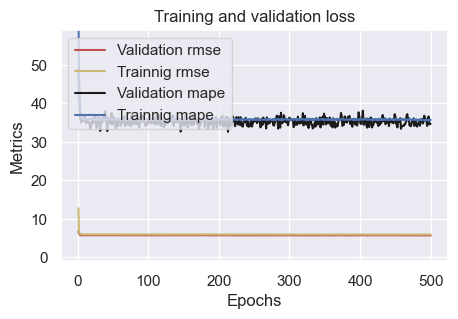

In [65]:
plotme(model3_1_5)

#### 2. Target (mean) encoding of dominated roadtype

In [66]:
df2 = df.iloc[:,0:6].copy()
df2 = df2.drop('hour of day',axis=1)
df2.head()

travel time  distance    hr_sin        hr_cos    1st ranked
0         1163  0.578883 -1.000000 -1.836970e-16       primary
1          347  0.048963 -0.707107  7.071068e-01       service
2          720  0.268455 -0.965926  2.588190e-01       primary
3          355  0.056803 -0.866025 -5.000000e-01  unclassified
4          356  0.076939 -0.965926 -2.588190e-01   residential

In [67]:
te = TargetEncoder()
df2['1st ranked'] = te.fit_transform(df2['1st ranked'],df2['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [68]:
df2.head()

travel time  distance    hr_sin        hr_cos   1st ranked
0         1163  0.578883 -1.000000 -1.836970e-16  1090.548554
1          347  0.048963 -0.707107  7.071068e-01   567.669463
2          720  0.268455 -0.965926  2.588190e-01  1090.548554
3          355  0.056803 -0.866025 -5.000000e-01   643.604235
4          356  0.076939 -0.965926 -2.588190e-01   637.309250

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

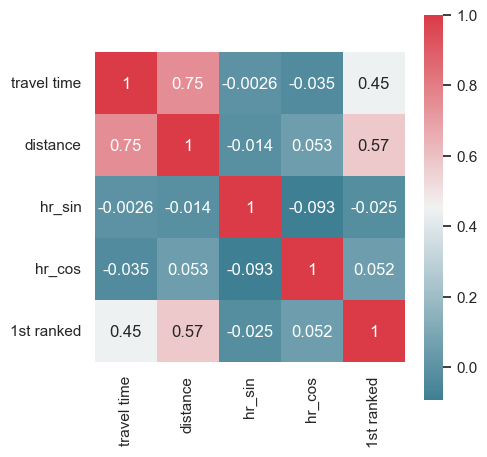

In [69]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(5,5))
corr = df2.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [70]:
x = np.array(df2[['distance','hr_sin','hr_cos','1st ranked']])
y = np.array(df2['travel time'])
x

array([[ 5.78882945e-01, -1.00000000e+00, -1.83697020e-16,
         1.09054855e+03],
       [ 4.89634734e-02, -7.07106781e-01,  7.07106781e-01,
         5.67669463e+02],
       [ 2.68454745e-01, -9.65925826e-01,  2.58819045e-01,
         1.09054855e+03],
       ...,
       [ 5.93116949e-01,  5.00000000e-01,  8.66025404e-01,
         1.09054855e+03],
       [ 5.97301600e-01, -5.00000000e-01,  8.66025404e-01,
         1.09054855e+03],
       [ 3.92350497e-01,  1.00000000e+00,  6.12323400e-17,
         1.09054855e+03]])

In [71]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 4)
(3146, 4)


In [73]:
# inputs: distance + hour + dominant road
model3_3_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model3_3_1

Epoch 1/500
394/394 [==============================] - 0s 865us/step - loss: 408571.8750 - mape: 56.4235 - rmse: 639.1963 - val_loss: 237531.3281 - val_mape: 54.5775 - val_rmse: 487.3719
Epoch 2/500
394/394 [==============================] - 0s 713us/step - loss: 233312.2812 - mape: 55.4779 - rmse: 483.0241 - val_loss: 237073.6406 - val_mape: 55.2137 - val_rmse: 486.9021
Epoch 3/500
394/394 [==============================] - 0s 738us/step - loss: 233200.2500 - mape: 55.5149 - rmse: 482.9081 - val_loss: 236799.6094 - val_mape: 55.8301 - val_rmse: 486.6206
Epoch 4/500
394/394 [==============================] - 0s 738us/step - loss: 233122.4844 - mape: 55.6834 - rmse: 482.8276 - val_loss: 238105.0469 - val_mape: 53.4679 - val_rmse: 487.9601
Epoch 5/500
394/394 [==============================] - 0s 738us/step - loss: 233208.3125 - mape: 55.3229 - rmse: 482.9165 - val_loss: 236645.6094 - val_mape: 55.0108 - val_rmse: 486.4623
Epoch 6/500
394/394 [==============================] - 0s 723us/s

Epoch 45/500
394/394 [==============================] - 0s 708us/step - loss: 203860.4375 - mape: 51.0465 - rmse: 451.5091 - val_loss: 203431.2812 - val_mape: 53.1873 - val_rmse: 451.0336
Epoch 46/500
394/394 [==============================] - 0s 712us/step - loss: 202843.7188 - mape: 51.0085 - rmse: 450.3817 - val_loss: 205108.5312 - val_mape: 46.6540 - val_rmse: 452.8891
Epoch 47/500
394/394 [==============================] - 0s 712us/step - loss: 200936.5469 - mape: 50.5334 - rmse: 448.2595 - val_loss: 201223.3906 - val_mape: 47.5370 - val_rmse: 448.5793
Epoch 48/500
394/394 [==============================] - 0s 712us/step - loss: 199747.5938 - mape: 50.4363 - rmse: 446.9313 - val_loss: 197414.3125 - val_mape: 50.3133 - val_rmse: 444.3133
Epoch 49/500
394/394 [==============================] - 0s 712us/step - loss: 198161.0156 - mape: 50.2005 - rmse: 445.1528 - val_loss: 196993.8281 - val_mape: 47.6345 - val_rmse: 443.8399
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 713us/step - loss: 131810.5625 - mape: 34.9624 - rmse: 363.0573 - val_loss: 122272.1953 - val_mape: 31.8491 - val_rmse: 349.6744
Epoch 132/500
394/394 [==============================] - 0s 712us/step - loss: 131949.9688 - mape: 34.8969 - rmse: 363.2492 - val_loss: 121374.3516 - val_mape: 34.1594 - val_rmse: 348.3882
Epoch 133/500
394/394 [==============================] - 0s 737us/step - loss: 131959.1562 - mape: 35.0128 - rmse: 363.2618 - val_loss: 133339.7344 - val_mape: 27.8251 - val_rmse: 365.1571
Epoch 134/500
394/394 [==============================] - 0s 713us/step - loss: 131881.7344 - mape: 34.8564 - rmse: 363.1552 - val_loss: 121743.6562 - val_mape: 32.1720 - val_rmse: 348.9178
Epoch 135/500
394/394 [==============================] - 0s 713us/step - loss: 131672.1875 - mape: 34.9263 - rmse: 362.8666 - val_loss: 128443.8281 - val_mape: 28.7847 - val_rmse: 358.3906
Epoch 136/500
394/394 [==============================] - 0s 713us/ste

394/394 [==============================] - 0s 725us/step - loss: 129438.8984 - mape: 35.4586 - rmse: 359.7762 - val_loss: 124380.3281 - val_mape: 29.9929 - val_rmse: 352.6760
Epoch 218/500
394/394 [==============================] - 0s 725us/step - loss: 129483.2500 - mape: 35.4667 - rmse: 359.8378 - val_loss: 119479.8828 - val_mape: 35.4902 - val_rmse: 345.6586
Epoch 219/500
394/394 [==============================] - 0s 710us/step - loss: 129826.8828 - mape: 35.4887 - rmse: 360.3150 - val_loss: 121412.8594 - val_mape: 37.8753 - val_rmse: 348.4435
Epoch 220/500
394/394 [==============================] - 0s 711us/step - loss: 129949.7031 - mape: 35.5142 - rmse: 360.4854 - val_loss: 123398.1953 - val_mape: 30.3955 - val_rmse: 351.2808
Epoch 221/500
394/394 [==============================] - 0s 703us/step - loss: 129629.1172 - mape: 35.5119 - rmse: 360.0404 - val_loss: 120395.8906 - val_mape: 32.1768 - val_rmse: 346.9811
Epoch 222/500
394/394 [==============================] - 0s 687us/ste

394/394 [==============================] - 0s 738us/step - loss: 129807.7656 - mape: 35.8657 - rmse: 360.2885 - val_loss: 119935.3672 - val_mape: 32.9679 - val_rmse: 346.3169
Epoch 304/500
394/394 [==============================] - 0s 713us/step - loss: 129693.0781 - mape: 35.9721 - rmse: 360.1292 - val_loss: 119198.4297 - val_mape: 34.3781 - val_rmse: 345.2513
Epoch 305/500
394/394 [==============================] - 0s 726us/step - loss: 130079.1875 - mape: 35.9696 - rmse: 360.6649 - val_loss: 119299.0781 - val_mape: 35.7008 - val_rmse: 345.3970
Epoch 306/500
394/394 [==============================] - 0s 711us/step - loss: 128792.7656 - mape: 35.7626 - rmse: 358.8771 - val_loss: 119160.6250 - val_mape: 35.0136 - val_rmse: 345.1965
Epoch 307/500
394/394 [==============================] - 0s 749us/step - loss: 130185.6328 - mape: 35.9224 - rmse: 360.8125 - val_loss: 121788.6953 - val_mape: 31.5478 - val_rmse: 348.9824
Epoch 308/500
394/394 [==============================] - 0s 712us/ste

394/394 [==============================] - 0s 738us/step - loss: 129937.6641 - mape: 35.9745 - rmse: 360.4687 - val_loss: 127013.2500 - val_mape: 41.8434 - val_rmse: 356.3892
Epoch 390/500
394/394 [==============================] - 0s 726us/step - loss: 129505.9297 - mape: 36.0062 - rmse: 359.8693 - val_loss: 119964.4844 - val_mape: 37.0266 - val_rmse: 346.3589
Epoch 391/500
394/394 [==============================] - 0s 712us/step - loss: 128950.3281 - mape: 35.9784 - rmse: 359.0966 - val_loss: 119738.2734 - val_mape: 36.7023 - val_rmse: 346.0322
Epoch 392/500
394/394 [==============================] - 0s 712us/step - loss: 129080.7734 - mape: 35.9924 - rmse: 359.2781 - val_loss: 119279.2500 - val_mape: 35.7273 - val_rmse: 345.3683
Epoch 393/500
394/394 [==============================] - 0s 713us/step - loss: 129038.1094 - mape: 35.9212 - rmse: 359.2188 - val_loss: 119236.2422 - val_mape: 35.5650 - val_rmse: 345.3060
Epoch 394/500
394/394 [==============================] - 0s 712us/ste

394/394 [==============================] - 0s 713us/step - loss: 129741.7422 - mape: 36.1439 - rmse: 360.1968 - val_loss: 119896.5156 - val_mape: 36.9651 - val_rmse: 346.2608
Epoch 476/500
394/394 [==============================] - 0s 707us/step - loss: 129998.3359 - mape: 36.1681 - rmse: 360.5528 - val_loss: 119188.2109 - val_mape: 34.7341 - val_rmse: 345.2365
Epoch 477/500
394/394 [==============================] - 0s 734us/step - loss: 129098.0703 - mape: 35.9764 - rmse: 359.3022 - val_loss: 121449.4531 - val_mape: 38.5624 - val_rmse: 348.4960
Epoch 478/500
394/394 [==============================] - 0s 713us/step - loss: 129523.9531 - mape: 36.0838 - rmse: 359.8944 - val_loss: 119174.7578 - val_mape: 35.1371 - val_rmse: 345.2170
Epoch 479/500
394/394 [==============================] - 0s 713us/step - loss: 129329.2266 - mape: 35.9999 - rmse: 359.6237 - val_loss: 120867.3672 - val_mape: 32.3150 - val_rmse: 347.6599
Epoch 480/500
394/394 [==============================] - 0s 719us/ste

In [74]:
# inputs: distance + hour + dominant road
model3_3_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model3_3_2

Epoch 1/500
394/394 [==============================] - 1s 885us/step - loss: 352702.1250 - mape: 57.0927 - rmse: 593.8873 - val_loss: 237349.3438 - val_mape: 54.8449 - val_rmse: 487.1851
Epoch 2/500
394/394 [==============================] - 0s 771us/step - loss: 233381.3125 - mape: 55.5806 - rmse: 483.0956 - val_loss: 236794.6875 - val_mape: 55.7216 - val_rmse: 486.6155
Epoch 3/500
394/394 [==============================] - 0s 721us/step - loss: 233026.5156 - mape: 55.4728 - rmse: 482.7282 - val_loss: 236593.9219 - val_mape: 56.6185 - val_rmse: 486.4092
Epoch 4/500
394/394 [==============================] - 0s 763us/step - loss: 232902.7188 - mape: 55.7062 - rmse: 482.5999 - val_loss: 239483.7031 - val_mape: 52.2391 - val_rmse: 489.3707
Epoch 5/500
394/394 [==============================] - 0s 763us/step - loss: 232803.4375 - mape: 55.3560 - rmse: 482.4971 - val_loss: 235822.8906 - val_mape: 56.1377 - val_rmse: 485.6160
Epoch 6/500
394/394 [==============================] - 0s 763us/s

Epoch 45/500
394/394 [==============================] - 0s 764us/step - loss: 170809.1719 - mape: 45.0892 - rmse: 413.2906 - val_loss: 163443.3594 - val_mape: 42.2459 - val_rmse: 404.2813
Epoch 46/500
394/394 [==============================] - 0s 764us/step - loss: 167393.3438 - mape: 44.4098 - rmse: 409.1373 - val_loss: 161755.4688 - val_mape: 46.5083 - val_rmse: 402.1884
Epoch 47/500
394/394 [==============================] - 0s 763us/step - loss: 165695.5000 - mape: 44.0011 - rmse: 407.0571 - val_loss: 161062.5469 - val_mape: 39.1759 - val_rmse: 401.3260
Epoch 48/500
394/394 [==============================] - 0s 738us/step - loss: 162459.3438 - mape: 43.3952 - rmse: 403.0625 - val_loss: 163016.0781 - val_mape: 37.1295 - val_rmse: 403.7525
Epoch 49/500
394/394 [==============================] - 0s 737us/step - loss: 161284.7656 - mape: 42.9781 - rmse: 401.6028 - val_loss: 154014.6094 - val_mape: 38.9836 - val_rmse: 392.4470
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 745us/step - loss: 130688.6328 - mape: 35.3317 - rmse: 361.5088 - val_loss: 120148.4141 - val_mape: 36.2086 - val_rmse: 346.6243
Epoch 132/500
394/394 [==============================] - 0s 756us/step - loss: 130238.8672 - mape: 35.3323 - rmse: 360.8862 - val_loss: 119474.9609 - val_mape: 33.6496 - val_rmse: 345.6515
Epoch 133/500
394/394 [==============================] - 0s 729us/step - loss: 130427.7031 - mape: 35.4173 - rmse: 361.1478 - val_loss: 125120.7188 - val_mape: 40.0582 - val_rmse: 353.7241
Epoch 134/500
394/394 [==============================] - 0s 763us/step - loss: 131026.5859 - mape: 35.5941 - rmse: 361.9760 - val_loss: 119680.5391 - val_mape: 33.0816 - val_rmse: 345.9488
Epoch 135/500
394/394 [==============================] - 0s 757us/step - loss: 129797.6484 - mape: 35.3356 - rmse: 360.2744 - val_loss: 119570.6250 - val_mape: 35.3261 - val_rmse: 345.7899
Epoch 136/500
394/394 [==============================] - 0s 756us/ste

394/394 [==============================] - 0s 752us/step - loss: 129906.0625 - mape: 36.0154 - rmse: 360.4248 - val_loss: 119730.5234 - val_mape: 33.3021 - val_rmse: 346.0210
Epoch 218/500
394/394 [==============================] - 0s 762us/step - loss: 130275.5938 - mape: 35.9611 - rmse: 360.9371 - val_loss: 119189.4141 - val_mape: 35.2231 - val_rmse: 345.2382
Epoch 219/500
394/394 [==============================] - 0s 730us/step - loss: 130507.9141 - mape: 35.9688 - rmse: 361.2588 - val_loss: 119801.7812 - val_mape: 36.7278 - val_rmse: 346.1239
Epoch 220/500
394/394 [==============================] - 0s 763us/step - loss: 130562.7891 - mape: 36.0557 - rmse: 361.3347 - val_loss: 119325.4844 - val_mape: 34.0605 - val_rmse: 345.4352
Epoch 221/500
394/394 [==============================] - 0s 752us/step - loss: 129191.2266 - mape: 35.9386 - rmse: 359.4318 - val_loss: 119300.4688 - val_mape: 35.7240 - val_rmse: 345.3990
Epoch 222/500
394/394 [==============================] - 0s 779us/ste

394/394 [==============================] - 0s 753us/step - loss: 129494.0625 - mape: 35.9697 - rmse: 359.8528 - val_loss: 125582.9219 - val_mape: 41.1769 - val_rmse: 354.3768
Epoch 304/500
394/394 [==============================] - 0s 774us/step - loss: 130596.6562 - mape: 36.1843 - rmse: 361.3816 - val_loss: 119180.8906 - val_mape: 34.8863 - val_rmse: 345.2259
Epoch 305/500
394/394 [==============================] - 0s 764us/step - loss: 129540.6250 - mape: 35.9708 - rmse: 359.9175 - val_loss: 119985.4062 - val_mape: 37.0850 - val_rmse: 346.3891
Epoch 306/500
394/394 [==============================] - 0s 763us/step - loss: 129832.9844 - mape: 36.0324 - rmse: 360.3235 - val_loss: 121815.7812 - val_mape: 38.8531 - val_rmse: 349.0212
Epoch 307/500
394/394 [==============================] - 0s 776us/step - loss: 129951.2031 - mape: 36.1126 - rmse: 360.4875 - val_loss: 119926.2656 - val_mape: 33.1737 - val_rmse: 346.3037
Epoch 308/500
394/394 [==============================] - 0s 776us/ste

394/394 [==============================] - 0s 754us/step - loss: 129217.7266 - mape: 36.0003 - rmse: 359.4687 - val_loss: 120029.1719 - val_mape: 33.0560 - val_rmse: 346.4523
Epoch 390/500
394/394 [==============================] - 0s 740us/step - loss: 130124.9219 - mape: 35.9912 - rmse: 360.7283 - val_loss: 119490.4375 - val_mape: 33.8062 - val_rmse: 345.6739
Epoch 391/500
394/394 [==============================] - 0s 733us/step - loss: 130626.9922 - mape: 36.1358 - rmse: 361.4236 - val_loss: 127771.6562 - val_mape: 42.2453 - val_rmse: 357.4516
Epoch 392/500
394/394 [==============================] - 0s 763us/step - loss: 129752.3047 - mape: 36.0649 - rmse: 360.2115 - val_loss: 121113.9297 - val_mape: 38.2849 - val_rmse: 348.0143
Epoch 393/500
394/394 [==============================] - 0s 751us/step - loss: 129408.6797 - mape: 36.0296 - rmse: 359.7342 - val_loss: 119197.7734 - val_mape: 34.7588 - val_rmse: 345.2503
Epoch 394/500
394/394 [==============================] - 0s 764us/ste

394/394 [==============================] - 0s 764us/step - loss: 129750.6328 - mape: 36.1275 - rmse: 360.2091 - val_loss: 119774.1094 - val_mape: 36.7948 - val_rmse: 346.0840
Epoch 476/500
394/394 [==============================] - 0s 747us/step - loss: 130202.6719 - mape: 36.1351 - rmse: 360.8361 - val_loss: 119360.9766 - val_mape: 34.1517 - val_rmse: 345.4866
Epoch 477/500
394/394 [==============================] - 0s 742us/step - loss: 129431.8281 - mape: 36.0802 - rmse: 359.7664 - val_loss: 121549.6328 - val_mape: 38.6618 - val_rmse: 348.6397
Epoch 478/500
394/394 [==============================] - 0s 731us/step - loss: 130287.3047 - mape: 36.1192 - rmse: 360.9533 - val_loss: 120744.8359 - val_mape: 37.9485 - val_rmse: 347.4836
Epoch 479/500
394/394 [==============================] - 0s 725us/step - loss: 129285.6641 - mape: 35.9621 - rmse: 359.5632 - val_loss: 119225.1562 - val_mape: 35.4676 - val_rmse: 345.2899
Epoch 480/500
394/394 [==============================] - 0s 739us/ste

In [75]:
# inputs: distance + hour + dominant road
model3_3_3 = nnmodel(300, num_hlayers=1,Epoch=500)
model3_3_3

Epoch 1/500
394/394 [==============================] - 1s 933us/step - loss: 278354.7812 - mape: 55.7994 - rmse: 527.5934 - val_loss: 239022.7344 - val_mape: 53.0318 - val_rmse: 488.8995
Epoch 2/500
394/394 [==============================] - 0s 794us/step - loss: 233268.6406 - mape: 55.4845 - rmse: 482.9789 - val_loss: 236462.7656 - val_mape: 55.7036 - val_rmse: 486.2744
Epoch 3/500
394/394 [==============================] - 0s 774us/step - loss: 233251.2656 - mape: 55.5587 - rmse: 482.9609 - val_loss: 236091.0781 - val_mape: 55.0926 - val_rmse: 485.8920
Epoch 4/500
394/394 [==============================] - 0s 742us/step - loss: 232843.5000 - mape: 55.4801 - rmse: 482.5386 - val_loss: 236170.7656 - val_mape: 57.6129 - val_rmse: 485.9740
Epoch 5/500
394/394 [==============================] - 0s 767us/step - loss: 232584.1719 - mape: 55.5108 - rmse: 482.2698 - val_loss: 235161.6719 - val_mape: 56.8514 - val_rmse: 484.9347
Epoch 6/500
394/394 [==============================] - 0s 761us/s

Epoch 45/500
394/394 [==============================] - 0s 789us/step - loss: 135697.3281 - mape: 35.2608 - rmse: 368.3712 - val_loss: 124293.6016 - val_mape: 31.2606 - val_rmse: 352.5530
Epoch 46/500
394/394 [==============================] - 0s 785us/step - loss: 136485.5469 - mape: 35.2337 - rmse: 369.4395 - val_loss: 124323.8438 - val_mape: 36.7137 - val_rmse: 352.5959
Epoch 47/500
394/394 [==============================] - 0s 774us/step - loss: 135031.6719 - mape: 35.0815 - rmse: 367.4666 - val_loss: 122792.6172 - val_mape: 32.0835 - val_rmse: 350.4178
Epoch 48/500
394/394 [==============================] - 0s 768us/step - loss: 135634.1719 - mape: 34.9977 - rmse: 368.2855 - val_loss: 124016.4141 - val_mape: 36.7810 - val_rmse: 352.1596
Epoch 49/500
394/394 [==============================] - 0s 788us/step - loss: 135425.2344 - mape: 35.3153 - rmse: 368.0017 - val_loss: 123807.4219 - val_mape: 30.7735 - val_rmse: 351.8628
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 764us/step - loss: 131052.6875 - mape: 36.1572 - rmse: 362.0120 - val_loss: 124619.9297 - val_mape: 40.5252 - val_rmse: 353.0155
Epoch 132/500
394/394 [==============================] - 0s 763us/step - loss: 132008.1250 - mape: 36.2855 - rmse: 363.3292 - val_loss: 123086.2500 - val_mape: 30.9740 - val_rmse: 350.8365
Epoch 133/500
394/394 [==============================] - 0s 763us/step - loss: 131242.4219 - mape: 36.0493 - rmse: 362.2740 - val_loss: 119377.5234 - val_mape: 35.8299 - val_rmse: 345.5105
Epoch 134/500
394/394 [==============================] - 0s 764us/step - loss: 130824.7422 - mape: 36.1649 - rmse: 361.6970 - val_loss: 121338.6406 - val_mape: 31.8967 - val_rmse: 348.3370
Epoch 135/500
394/394 [==============================] - 0s 763us/step - loss: 130335.5859 - mape: 35.9135 - rmse: 361.0202 - val_loss: 121574.9141 - val_mape: 38.5270 - val_rmse: 348.6759
Epoch 136/500
394/394 [==============================] - 0s 771us/ste

394/394 [==============================] - 0s 788us/step - loss: 130845.4922 - mape: 35.8963 - rmse: 361.7257 - val_loss: 134042.7812 - val_mape: 44.9364 - val_rmse: 366.1185
Epoch 218/500
394/394 [==============================] - 0s 789us/step - loss: 131799.4844 - mape: 36.1507 - rmse: 363.0420 - val_loss: 119695.2891 - val_mape: 32.4003 - val_rmse: 345.9701
Epoch 219/500
394/394 [==============================] - 0s 767us/step - loss: 129114.1953 - mape: 35.7463 - rmse: 359.3246 - val_loss: 125506.4531 - val_mape: 28.9792 - val_rmse: 354.2689
Epoch 220/500
394/394 [==============================] - 0s 773us/step - loss: 130505.2969 - mape: 35.7641 - rmse: 361.2552 - val_loss: 121113.5781 - val_mape: 39.0735 - val_rmse: 348.0138
Epoch 221/500
394/394 [==============================] - 0s 764us/step - loss: 129028.9219 - mape: 35.5909 - rmse: 359.2060 - val_loss: 130465.6797 - val_mape: 43.9843 - val_rmse: 361.2003
Epoch 222/500
394/394 [==============================] - 0s 779us/ste

394/394 [==============================] - 0s 763us/step - loss: 128925.7656 - mape: 35.5144 - rmse: 359.0623 - val_loss: 118065.7500 - val_mape: 32.7113 - val_rmse: 343.6070
Epoch 304/500
394/394 [==============================] - 0s 752us/step - loss: 129430.8516 - mape: 35.5234 - rmse: 359.7650 - val_loss: 117755.1719 - val_mape: 33.9110 - val_rmse: 343.1547
Epoch 305/500
394/394 [==============================] - 0s 765us/step - loss: 129030.2578 - mape: 35.5198 - rmse: 359.2078 - val_loss: 128174.4297 - val_mape: 28.4327 - val_rmse: 358.0146
Epoch 306/500
394/394 [==============================] - 0s 763us/step - loss: 128901.4844 - mape: 35.4988 - rmse: 359.0285 - val_loss: 117708.2344 - val_mape: 33.9456 - val_rmse: 343.0863
Epoch 307/500
394/394 [==============================] - 0s 753us/step - loss: 128835.3594 - mape: 35.4138 - rmse: 358.9364 - val_loss: 118182.7969 - val_mape: 32.0831 - val_rmse: 343.7773
Epoch 308/500
394/394 [==============================] - 0s 779us/ste

394/394 [==============================] - 0s 789us/step - loss: 129293.6406 - mape: 35.3098 - rmse: 359.5742 - val_loss: 122685.8750 - val_mape: 30.4916 - val_rmse: 350.2654
Epoch 390/500
394/394 [==============================] - 0s 763us/step - loss: 129530.1016 - mape: 35.5420 - rmse: 359.9029 - val_loss: 125237.4453 - val_mape: 41.6045 - val_rmse: 353.8890
Epoch 391/500
394/394 [==============================] - 0s 780us/step - loss: 129213.3359 - mape: 35.4162 - rmse: 359.4626 - val_loss: 127716.1719 - val_mape: 27.9666 - val_rmse: 357.3740
Epoch 392/500
394/394 [==============================] - 0s 762us/step - loss: 128413.9062 - mape: 35.2238 - rmse: 358.3488 - val_loss: 120388.6719 - val_mape: 31.4026 - val_rmse: 346.9707
Epoch 393/500
394/394 [==============================] - 0s 763us/step - loss: 129177.2109 - mape: 35.3256 - rmse: 359.4123 - val_loss: 120383.2578 - val_mape: 38.4945 - val_rmse: 346.9629
Epoch 394/500
394/394 [==============================] - 0s 764us/ste

394/394 [==============================] - 0s 764us/step - loss: 129444.6328 - mape: 35.3639 - rmse: 359.7841 - val_loss: 118634.4688 - val_mape: 36.8478 - val_rmse: 344.4335
Epoch 476/500
394/394 [==============================] - 0s 758us/step - loss: 129973.1328 - mape: 35.4429 - rmse: 360.5179 - val_loss: 121422.6953 - val_mape: 39.4683 - val_rmse: 348.4576
Epoch 477/500
394/394 [==============================] - 0s 789us/step - loss: 128137.6719 - mape: 35.3067 - rmse: 357.9632 - val_loss: 119156.6484 - val_mape: 37.1468 - val_rmse: 345.1907
Epoch 478/500
394/394 [==============================] - 0s 763us/step - loss: 128115.9531 - mape: 35.2520 - rmse: 357.9329 - val_loss: 119709.2344 - val_mape: 30.4431 - val_rmse: 345.9902
Epoch 479/500
394/394 [==============================] - 0s 776us/step - loss: 128891.1250 - mape: 35.2374 - rmse: 359.0141 - val_loss: 120057.1172 - val_mape: 31.0013 - val_rmse: 346.4926
Epoch 480/500
394/394 [==============================] - 0s 739us/ste

In [76]:
# inputs: distance + hour + dominant road
model3_3_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model3_3_4

Epoch 1/500
394/394 [==============================] - 1s 949us/step - loss: 304206.6250 - mape: 56.6702 - rmse: 551.5493 - val_loss: 238536.5625 - val_mape: 53.5023 - val_rmse: 488.4020
Epoch 2/500
394/394 [==============================] - 0s 930us/step - loss: 233733.3438 - mape: 55.4999 - rmse: 483.4598 - val_loss: 237229.2500 - val_mape: 57.3759 - val_rmse: 487.0619
Epoch 3/500
394/394 [==============================] - 0s 789us/step - loss: 233637.1719 - mape: 55.6114 - rmse: 483.3603 - val_loss: 238517.6094 - val_mape: 53.0502 - val_rmse: 488.3827
Epoch 4/500
394/394 [==============================] - 0s 815us/step - loss: 233950.1250 - mape: 55.5396 - rmse: 483.6839 - val_loss: 237808.7812 - val_mape: 53.3076 - val_rmse: 487.6564
Epoch 5/500
394/394 [==============================] - 0s 788us/step - loss: 233414.8125 - mape: 55.5611 - rmse: 483.1302 - val_loss: 237007.4531 - val_mape: 53.6684 - val_rmse: 486.8341
Epoch 6/500
394/394 [==============================] - 0s 789us/s

Epoch 45/500
394/394 [==============================] - 0s 788us/step - loss: 132928.7969 - mape: 34.4561 - rmse: 364.5940 - val_loss: 132745.0938 - val_mape: 42.9558 - val_rmse: 364.3420
Epoch 46/500
394/394 [==============================] - 0s 789us/step - loss: 132450.1250 - mape: 34.6197 - rmse: 363.9370 - val_loss: 131973.1094 - val_mape: 26.6912 - val_rmse: 363.2810
Epoch 47/500
394/394 [==============================] - 0s 789us/step - loss: 131096.2969 - mape: 34.2558 - rmse: 362.0722 - val_loss: 119964.8359 - val_mape: 31.6419 - val_rmse: 346.3594
Epoch 48/500
394/394 [==============================] - 0s 780us/step - loss: 131368.5000 - mape: 34.5152 - rmse: 362.4479 - val_loss: 121240.1094 - val_mape: 29.6803 - val_rmse: 348.1955
Epoch 49/500
394/394 [==============================] - 0s 776us/step - loss: 131351.3281 - mape: 34.3979 - rmse: 362.4242 - val_loss: 118798.6797 - val_mape: 32.3060 - val_rmse: 344.6718
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 783us/step - loss: 130126.8359 - mape: 35.3067 - rmse: 360.7310 - val_loss: 121831.2734 - val_mape: 39.1386 - val_rmse: 349.0434
Epoch 132/500
394/394 [==============================] - 0s 763us/step - loss: 130647.8438 - mape: 35.5114 - rmse: 361.4524 - val_loss: 123829.3438 - val_mape: 29.2016 - val_rmse: 351.8940
Epoch 133/500
394/394 [==============================] - 0s 776us/step - loss: 130562.6328 - mape: 35.4053 - rmse: 361.3345 - val_loss: 120121.6406 - val_mape: 32.6221 - val_rmse: 346.5857
Epoch 134/500
394/394 [==============================] - 0s 779us/step - loss: 130192.5312 - mape: 35.3515 - rmse: 360.8220 - val_loss: 135586.2031 - val_mape: 45.5549 - val_rmse: 368.2203
Epoch 135/500
394/394 [==============================] - 0s 773us/step - loss: 130288.9297 - mape: 35.6100 - rmse: 360.9556 - val_loss: 119765.8047 - val_mape: 37.0055 - val_rmse: 346.0720
Epoch 136/500
394/394 [==============================] - 0s 789us/ste

394/394 [==============================] - 0s 763us/step - loss: 129400.1094 - mape: 35.2616 - rmse: 359.7223 - val_loss: 118475.2266 - val_mape: 36.1483 - val_rmse: 344.2023
Epoch 218/500
394/394 [==============================] - 0s 798us/step - loss: 129452.3438 - mape: 35.3104 - rmse: 359.7949 - val_loss: 118086.0625 - val_mape: 33.5266 - val_rmse: 343.6365
Epoch 219/500
394/394 [==============================] - 0s 764us/step - loss: 129642.2188 - mape: 35.5386 - rmse: 360.0586 - val_loss: 117894.9141 - val_mape: 34.9806 - val_rmse: 343.3583
Epoch 220/500
394/394 [==============================] - 0s 764us/step - loss: 131433.1562 - mape: 35.7845 - rmse: 362.5371 - val_loss: 137286.1406 - val_mape: 46.2309 - val_rmse: 370.5215
Epoch 221/500
394/394 [==============================] - 0s 788us/step - loss: 131596.0625 - mape: 35.9302 - rmse: 362.7617 - val_loss: 119055.4688 - val_mape: 31.4428 - val_rmse: 345.0442
Epoch 222/500
394/394 [==============================] - 0s 789us/ste

394/394 [==============================] - 0s 789us/step - loss: 130064.0859 - mape: 35.5126 - rmse: 360.6440 - val_loss: 118466.2500 - val_mape: 36.2037 - val_rmse: 344.1893
Epoch 304/500
394/394 [==============================] - 0s 789us/step - loss: 129548.0234 - mape: 35.4845 - rmse: 359.9278 - val_loss: 118593.0781 - val_mape: 35.0649 - val_rmse: 344.3734
Epoch 305/500
394/394 [==============================] - 0s 784us/step - loss: 128818.2266 - mape: 35.1413 - rmse: 358.9126 - val_loss: 118806.4922 - val_mape: 36.7411 - val_rmse: 344.6832
Epoch 306/500
394/394 [==============================] - 0s 783us/step - loss: 129436.4609 - mape: 35.4171 - rmse: 359.7728 - val_loss: 118496.1641 - val_mape: 32.1327 - val_rmse: 344.2327
Epoch 307/500
394/394 [==============================] - 0s 776us/step - loss: 128313.1328 - mape: 35.1698 - rmse: 358.2082 - val_loss: 117842.8672 - val_mape: 34.0998 - val_rmse: 343.2825
Epoch 308/500
394/394 [==============================] - 0s 791us/ste

394/394 [==============================] - 0s 790us/step - loss: 128852.1875 - mape: 35.1535 - rmse: 358.9599 - val_loss: 119508.2188 - val_mape: 37.5805 - val_rmse: 345.6996
Epoch 390/500
394/394 [==============================] - 0s 773us/step - loss: 128534.4531 - mape: 35.1047 - rmse: 358.5170 - val_loss: 123845.7344 - val_mape: 29.3097 - val_rmse: 351.9172
Epoch 391/500
394/394 [==============================] - 0s 796us/step - loss: 130261.4141 - mape: 35.5817 - rmse: 360.9174 - val_loss: 123946.4062 - val_mape: 40.8080 - val_rmse: 352.0602
Epoch 392/500
394/394 [==============================] - 0s 781us/step - loss: 128661.8906 - mape: 35.1546 - rmse: 358.6947 - val_loss: 121686.1641 - val_mape: 39.3771 - val_rmse: 348.8354
Epoch 393/500
394/394 [==============================] - 0s 798us/step - loss: 128158.7656 - mape: 35.1922 - rmse: 357.9927 - val_loss: 121807.1016 - val_mape: 29.6262 - val_rmse: 349.0087
Epoch 394/500
394/394 [==============================] - 0s 784us/ste

394/394 [==============================] - 0s 795us/step - loss: 129267.4062 - mape: 35.4913 - rmse: 359.5378 - val_loss: 119745.4219 - val_mape: 30.6788 - val_rmse: 346.0425
Epoch 476/500
394/394 [==============================] - 0s 787us/step - loss: 128616.7344 - mape: 35.0758 - rmse: 358.6317 - val_loss: 130923.4453 - val_mape: 44.1094 - val_rmse: 361.8334
Epoch 477/500
394/394 [==============================] - 0s 785us/step - loss: 128719.5938 - mape: 35.2953 - rmse: 358.7751 - val_loss: 120380.8047 - val_mape: 38.2615 - val_rmse: 346.9594
Epoch 478/500
394/394 [==============================] - 0s 785us/step - loss: 129412.2188 - mape: 35.4720 - rmse: 359.7391 - val_loss: 117648.2422 - val_mape: 33.1513 - val_rmse: 342.9989
Epoch 479/500
394/394 [==============================] - 0s 794us/step - loss: 128243.1172 - mape: 35.1155 - rmse: 358.1105 - val_loss: 118595.4453 - val_mape: 36.5877 - val_rmse: 344.3769
Epoch 480/500
394/394 [==============================] - 0s 775us/ste

In [77]:
# inputs: distance + hour + dominant road
model3_3_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model3_3_5

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 254931.2656 - mape: 56.0255 - rmse: 504.9072 - val_loss: 236797.2812 - val_mape: 56.1648 - val_rmse: 486.6182
Epoch 2/500
394/394 [==============================] - 0s 862us/step - loss: 234328.8750 - mape: 55.6669 - rmse: 484.0753 - val_loss: 238999.1250 - val_mape: 52.5691 - val_rmse: 488.8754
Epoch 3/500
394/394 [==============================] - 0s 857us/step - loss: 233798.1562 - mape: 55.5147 - rmse: 483.5268 - val_loss: 236556.7344 - val_mape: 53.8297 - val_rmse: 486.3710
Epoch 4/500
394/394 [==============================] - 0s 855us/step - loss: 234181.9844 - mape: 55.4731 - rmse: 483.9235 - val_loss: 237804.8906 - val_mape: 52.3504 - val_rmse: 487.6524
Epoch 5/500
394/394 [==============================] - 0s 858us/step - loss: 232695.5000 - mape: 55.3180 - rmse: 482.3852 - val_loss: 234593.9375 - val_mape: 54.1048 - val_rmse: 484.3490
Epoch 6/500
394/394 [==============================] - 0s 843us/ste

Epoch 45/500
394/394 [==============================] - 0s 855us/step - loss: 133518.6562 - mape: 35.5489 - rmse: 365.4020 - val_loss: 124522.9219 - val_mape: 28.7799 - val_rmse: 352.8781
Epoch 46/500
394/394 [==============================] - 0s 839us/step - loss: 131906.5469 - mape: 35.4134 - rmse: 363.1894 - val_loss: 118236.9922 - val_mape: 34.5706 - val_rmse: 343.8560
Epoch 47/500
394/394 [==============================] - 0s 844us/step - loss: 131507.4531 - mape: 35.4481 - rmse: 362.6396 - val_loss: 121926.5312 - val_mape: 38.8091 - val_rmse: 349.1798
Epoch 48/500
394/394 [==============================] - 0s 844us/step - loss: 133875.6094 - mape: 35.7070 - rmse: 365.8902 - val_loss: 170371.5781 - val_mape: 26.2613 - val_rmse: 412.7609
Epoch 49/500
394/394 [==============================] - 0s 850us/step - loss: 133358.0781 - mape: 35.7207 - rmse: 365.1823 - val_loss: 174452.5469 - val_mape: 55.3346 - val_rmse: 417.6752
Epoch 50/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 850us/step - loss: 130180.3203 - mape: 35.6001 - rmse: 360.8051 - val_loss: 133490.1406 - val_mape: 45.1012 - val_rmse: 365.3630
Epoch 132/500
394/394 [==============================] - 0s 850us/step - loss: 130080.8203 - mape: 35.5377 - rmse: 360.6672 - val_loss: 118765.4375 - val_mape: 32.3787 - val_rmse: 344.6236
Epoch 133/500
394/394 [==============================] - 0s 847us/step - loss: 130651.6016 - mape: 35.5054 - rmse: 361.4576 - val_loss: 120000.6172 - val_mape: 37.8256 - val_rmse: 346.4110
Epoch 134/500
394/394 [==============================] - 0s 844us/step - loss: 132326.0938 - mape: 35.9609 - rmse: 363.7665 - val_loss: 118768.0312 - val_mape: 36.3052 - val_rmse: 344.6274
Epoch 135/500
394/394 [==============================] - 0s 845us/step - loss: 129666.9609 - mape: 35.5420 - rmse: 360.0930 - val_loss: 118567.4219 - val_mape: 36.5897 - val_rmse: 344.3362
Epoch 136/500
394/394 [==============================] - 0s 839us/ste

394/394 [==============================] - 0s 850us/step - loss: 128853.5234 - mape: 35.4385 - rmse: 358.9617 - val_loss: 122077.8203 - val_mape: 29.7650 - val_rmse: 349.3964
Epoch 218/500
394/394 [==============================] - 0s 852us/step - loss: 130421.6562 - mape: 35.4759 - rmse: 361.1394 - val_loss: 126597.2109 - val_mape: 42.1663 - val_rmse: 355.8050
Epoch 219/500
394/394 [==============================] - 0s 849us/step - loss: 130976.6562 - mape: 35.6743 - rmse: 361.9070 - val_loss: 119421.5000 - val_mape: 37.5787 - val_rmse: 345.5742
Epoch 220/500
394/394 [==============================] - 0s 829us/step - loss: 129622.4219 - mape: 35.4695 - rmse: 360.0311 - val_loss: 120717.9375 - val_mape: 38.4691 - val_rmse: 347.4449
Epoch 221/500
394/394 [==============================] - 0s 844us/step - loss: 128715.6562 - mape: 35.4060 - rmse: 358.7697 - val_loss: 119569.7500 - val_mape: 31.8549 - val_rmse: 345.7886
Epoch 222/500
394/394 [==============================] - 0s 820us/ste

394/394 [==============================] - 0s 860us/step - loss: 130929.7188 - mape: 35.6280 - rmse: 361.8421 - val_loss: 120699.9531 - val_mape: 30.9603 - val_rmse: 347.4190
Epoch 304/500
394/394 [==============================] - 0s 1ms/step - loss: 130921.6562 - mape: 35.7094 - rmse: 361.8310 - val_loss: 120195.0625 - val_mape: 30.9111 - val_rmse: 346.6916
Epoch 305/500
394/394 [==============================] - 0s 856us/step - loss: 129057.2500 - mape: 35.4294 - rmse: 359.2454 - val_loss: 120723.4609 - val_mape: 30.6579 - val_rmse: 347.4528
Epoch 306/500
394/394 [==============================] - 0s 887us/step - loss: 129646.1562 - mape: 35.3935 - rmse: 360.0641 - val_loss: 121761.4531 - val_mape: 39.3406 - val_rmse: 348.9433
Epoch 307/500
394/394 [==============================] - 0s 839us/step - loss: 129054.0312 - mape: 35.4826 - rmse: 359.2409 - val_loss: 117447.9766 - val_mape: 33.8649 - val_rmse: 342.7068
Epoch 308/500
394/394 [==============================] - 0s 841us/step 

394/394 [==============================] - 0s 850us/step - loss: 129510.2422 - mape: 35.4624 - rmse: 359.8753 - val_loss: 119316.6484 - val_mape: 30.9165 - val_rmse: 345.4224
Epoch 390/500
394/394 [==============================] - 0s 864us/step - loss: 128967.7812 - mape: 35.2872 - rmse: 359.1208 - val_loss: 118180.9609 - val_mape: 32.1814 - val_rmse: 343.7746
Epoch 391/500
394/394 [==============================] - 0s 827us/step - loss: 129196.5703 - mape: 35.3737 - rmse: 359.4392 - val_loss: 121671.5000 - val_mape: 30.0633 - val_rmse: 348.8144
Epoch 392/500
394/394 [==============================] - 0s 839us/step - loss: 128453.9297 - mape: 35.1674 - rmse: 358.4047 - val_loss: 122659.2031 - val_mape: 40.1428 - val_rmse: 350.2274
Epoch 393/500
394/394 [==============================] - 0s 866us/step - loss: 129736.8438 - mape: 35.4830 - rmse: 360.1900 - val_loss: 117444.2891 - val_mape: 32.8500 - val_rmse: 342.7014
Epoch 394/500
394/394 [==============================] - 0s 840us/ste

394/394 [==============================] - 0s 865us/step - loss: 128848.1172 - mape: 35.1622 - rmse: 358.9542 - val_loss: 118695.6562 - val_mape: 36.6387 - val_rmse: 344.5224
Epoch 476/500
394/394 [==============================] - 0s 864us/step - loss: 129494.7500 - mape: 35.4160 - rmse: 359.8538 - val_loss: 123864.9375 - val_mape: 28.7705 - val_rmse: 351.9445
Epoch 477/500
394/394 [==============================] - 0s 841us/step - loss: 129009.8516 - mape: 35.3732 - rmse: 359.1794 - val_loss: 117393.9297 - val_mape: 34.9022 - val_rmse: 342.6280
Epoch 478/500
394/394 [==============================] - 0s 855us/step - loss: 129473.8594 - mape: 35.4141 - rmse: 359.8248 - val_loss: 119552.3984 - val_mape: 37.7172 - val_rmse: 345.7635
Epoch 479/500
394/394 [==============================] - 0s 890us/step - loss: 129135.2891 - mape: 35.2674 - rmse: 359.3540 - val_loss: 120397.3516 - val_mape: 38.6102 - val_rmse: 346.9832
Epoch 480/500
394/394 [==============================] - 0s 866us/ste

# sub-problem 4:     ******* input: distance & hour & [1,2,3]ranked roadtypes *********

#### Analysis of features

In [78]:
df4 = df.iloc[:,0:8].copy()
df4 = df4.drop(['hr_sin','hr_cos','hour of day'],axis=1)
df4.head()

travel time  distance    1st ranked    2nd ranked   3rd ranked
0         1163  0.578883       primary       service  residential
1          347  0.048963       service  unclassified  residential
2          720  0.268455       primary  unclassified     tertiary
3          355  0.056803  unclassified       service      primary
4          356  0.076939   residential  unclassified      service

In [79]:
df4 = df4.replace({np.nan:None})
df4.head()

travel time  distance    1st ranked    2nd ranked   3rd ranked
0         1163  0.578883       primary       service  residential
1          347  0.048963       service  unclassified  residential
2          720  0.268455       primary  unclassified     tertiary
3          355  0.056803  unclassified       service      primary
4          356  0.076939   residential  unclassified      service

In [80]:
#### column wise count of non missing values 
print('shape of df: ',df.shape)
df.count(axis = 0)

shape of df:  (15728, 17)


travel time    15728
distance       15728
hour of day    15728
hr_sin         15728
hr_cos         15728
1st ranked     15728
2nd ranked     15123
3rd ranked     14136
4d ranked      10714
5th ranked      7097
6th ranked      2362
1st dist       15728
2nd dist       15123
3rd dist       14136
4rd dist       10714
5th dist        7097
6th dist        2362
dtype: int64

In [81]:
df4['1st ranked'].isna().sum()

0

In [82]:
df4['2nd ranked'].isna().sum()

605

In [83]:
df4['3rd ranked'].isna().sum()

1592

In [84]:
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         203
primary         6395
residential     2173
secondary       3775
service          596
tertiary        1355
track              2
trunk              1
unclassified    1228
Name: travel time, dtype: int64

In [85]:
option = ['residential','tertiary','primary','secondary']
df4.loc[~df4['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df4.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        2030
primary        6395
residential    2173
secondary      3775
tertiary       1355
Name: travel time, dtype: int64

In [86]:
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street       2
motorway           21
primary          4117
primary_link       32
residential      3014
road                2
secondary        1166
service          3457
tertiary         2672
track              15
trunk               2
trunk_link          1
unclassified      622
Name: travel time, dtype: int64

In [87]:
option = ['residential','tertiary','secondary','primary',None]
df4.loc[~df4['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df4.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        4154
primary        4117
residential    3014
secondary      1166
tertiary       2672
Name: travel time, dtype: int64

In [88]:
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       21
motorway_link      117
primary           2054
primary_link       628
residential       3688
road                 2
secondary          649
secondary_link      23
service           5233
tertiary          1253
track               39
trunk                1
trunk_link           4
unclassified       424
Name: travel time, dtype: int64

In [89]:
option = ['residential','primary_link','tertiary','primary','service',None]
df4.loc[~df4['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df4.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3         1280
primary         2054
primary_link     628
residential     3688
service         5233
tertiary        1253
Name: travel time, dtype: int64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [90]:
te = TargetEncoder()
df4['1st ranked'] = te.fit_transform(df4['1st ranked'],df4['travel time'])
df4['2nd ranked'] = te.fit_transform(df4['2nd ranked'],df4['travel time'])
df4['3rd ranked'] = te.fit_transform(df4['3rd ranked'],df4['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [91]:
# Normalize using Min/Max Normalization.
normalize=(df4['1st ranked']-df4['1st ranked'].min())/(df4['1st ranked'].max()-df4['1st ranked'].min())
df4['1st ranked'] = normalize
normalize=(df4['2nd ranked']-df4['2nd ranked'].min())/(df4['2nd ranked'].max()-df4['2nd ranked'].min())
df4['2nd ranked'] = normalize
normalize=(df4['3rd ranked']-df4['3rd ranked'].min())/(df4['3rd ranked'].max()-df4['3rd ranked'].min())
df4['3rd ranked'] = normalize

In [92]:
df4.head()

travel time  distance  1st ranked  2nd ranked  3rd ranked
0         1163  0.578883    0.717681         0.0    0.403485
1          347  0.048963    0.104585         0.0    0.403485
2          720  0.268455    0.717681         0.0    0.978002
3          355  0.056803    0.104585         0.0    0.000000
4          356  0.076939    0.000000         0.0    0.258511

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

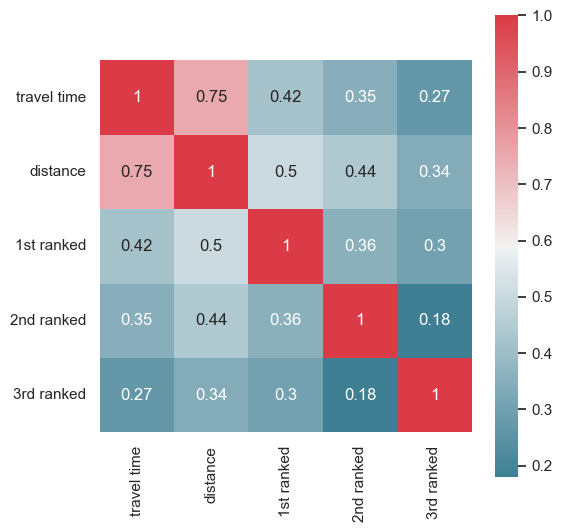

In [93]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df4.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [94]:
x = np.array(df4[['distance','1st ranked','2nd ranked','3rd ranked']])
y = np.array(df4['travel time'])
x

array([[0.57888295, 0.71768096, 0.        , 0.40348499],
       [0.04896347, 0.10458498, 0.        , 0.40348499],
       [0.26845474, 0.71768096, 0.        , 0.978002  ],
       ...,
       [0.59311695, 0.71768096, 1.        , 0.978002  ],
       [0.5973016 , 0.71768096, 1.        , 0.978002  ],
       [0.3923505 , 0.71768096, 1.        , 0.77751626]])

In [95]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 4)
(3146, 4)


In [97]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_1_1

Epoch 1/500
394/394 [==============================] - 0s 873us/step - loss: 1274633.8750 - mape: 98.4603 - rmse: 1128.9968 - val_loss: 1254755.8750 - val_mape: 95.5655 - val_rmse: 1120.1588
Epoch 2/500
394/394 [==============================] - 0s 750us/step - loss: 1134774.0000 - mape: 90.1742 - rmse: 1065.2577 - val_loss: 1054973.3750 - val_mape: 83.6808 - val_rmse: 1027.1190
Epoch 3/500
394/394 [==============================] - 0s 714us/step - loss: 904999.9375 - mape: 75.3799 - rmse: 951.3148 - val_loss: 793628.6250 - val_mape: 66.6119 - val_rmse: 890.8583
Epoch 4/500
394/394 [==============================] - 0s 760us/step - loss: 653206.0625 - mape: 57.9695 - rmse: 808.2117 - val_loss: 546627.3125 - val_mape: 49.9310 - val_rmse: 739.3425
Epoch 5/500
394/394 [==============================] - 0s 763us/step - loss: 441420.4062 - mape: 44.7595 - rmse: 664.3948 - val_loss: 361126.0312 - val_mape: 40.3158 - val_rmse: 600.9376
Epoch 6/500
394/394 [==============================] - 0s

Epoch 88/500
394/394 [==============================] - 0s 720us/step - loss: 128980.3438 - mape: 36.2489 - rmse: 359.1383 - val_loss: 120080.5625 - val_mape: 35.2782 - val_rmse: 346.5264
Epoch 89/500
394/394 [==============================] - 0s 735us/step - loss: 128961.3906 - mape: 36.0129 - rmse: 359.1119 - val_loss: 120088.6484 - val_mape: 35.5871 - val_rmse: 346.5381
Epoch 90/500
394/394 [==============================] - 0s 726us/step - loss: 128949.1953 - mape: 36.0253 - rmse: 359.0950 - val_loss: 120094.1094 - val_mape: 35.7007 - val_rmse: 346.5460
Epoch 91/500
394/394 [==============================] - 0s 750us/step - loss: 128951.1172 - mape: 36.0723 - rmse: 359.0977 - val_loss: 120116.7812 - val_mape: 35.8431 - val_rmse: 346.5787
Epoch 92/500
394/394 [==============================] - 0s 726us/step - loss: 128934.1719 - mape: 36.0780 - rmse: 359.0740 - val_loss: 120080.2734 - val_mape: 35.7652 - val_rmse: 346.5260
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 725us/step - loss: 127738.8828 - mape: 35.4855 - rmse: 357.4058 - val_loss: 118714.5547 - val_mape: 34.9903 - val_rmse: 344.5498
Epoch 175/500
394/394 [==============================] - 0s 713us/step - loss: 127721.1641 - mape: 35.4223 - rmse: 357.3810 - val_loss: 118718.8984 - val_mape: 35.1600 - val_rmse: 344.5561
Epoch 176/500
394/394 [==============================] - 0s 740us/step - loss: 127713.7656 - mape: 35.6149 - rmse: 357.3706 - val_loss: 118665.3750 - val_mape: 34.8993 - val_rmse: 344.4784
Epoch 177/500
394/394 [==============================] - 0s 736us/step - loss: 127699.1953 - mape: 35.4450 - rmse: 357.3503 - val_loss: 118680.6484 - val_mape: 35.1047 - val_rmse: 344.5006
Epoch 178/500
394/394 [==============================] - 0s 725us/step - loss: 127692.1875 - mape: 35.6179 - rmse: 357.3404 - val_loss: 118639.8359 - val_mape: 34.8806 - val_rmse: 344.4413
Epoch 179/500
394/394 [==============================] - 0s 712us/ste

394/394 [==============================] - 0s 737us/step - loss: 126973.1953 - mape: 35.1257 - rmse: 356.3330 - val_loss: 117944.5312 - val_mape: 34.6101 - val_rmse: 343.4305
Epoch 261/500
394/394 [==============================] - 0s 738us/step - loss: 126968.9062 - mape: 35.2003 - rmse: 356.3270 - val_loss: 117942.0000 - val_mape: 34.6135 - val_rmse: 343.4268
Epoch 262/500
394/394 [==============================] - 0s 706us/step - loss: 126951.6719 - mape: 35.1879 - rmse: 356.3028 - val_loss: 117942.0703 - val_mape: 34.6952 - val_rmse: 343.4269
Epoch 263/500
394/394 [==============================] - 0s 737us/step - loss: 126962.7812 - mape: 35.1485 - rmse: 356.3184 - val_loss: 117935.7344 - val_mape: 34.6835 - val_rmse: 343.4177
Epoch 264/500
394/394 [==============================] - 0s 765us/step - loss: 126955.0547 - mape: 35.2159 - rmse: 356.3075 - val_loss: 117958.6406 - val_mape: 34.8877 - val_rmse: 343.4511
Epoch 265/500
394/394 [==============================] - 0s 743us/ste

394/394 [==============================] - 0s 738us/step - loss: 126688.6172 - mape: 34.9282 - rmse: 355.9334 - val_loss: 117713.3125 - val_mape: 34.9476 - val_rmse: 343.0938
Epoch 347/500
394/394 [==============================] - 0s 738us/step - loss: 126692.1172 - mape: 35.2281 - rmse: 355.9384 - val_loss: 117659.7344 - val_mape: 34.1671 - val_rmse: 343.0157
Epoch 348/500
394/394 [==============================] - 0s 738us/step - loss: 126716.1719 - mape: 34.9975 - rmse: 355.9721 - val_loss: 117653.5312 - val_mape: 34.6160 - val_rmse: 343.0066
Epoch 349/500
394/394 [==============================] - 0s 740us/step - loss: 126683.2422 - mape: 34.9325 - rmse: 355.9259 - val_loss: 117692.5391 - val_mape: 34.8883 - val_rmse: 343.0635
Epoch 350/500
394/394 [==============================] - 0s 735us/step - loss: 126707.4766 - mape: 35.0638 - rmse: 355.9599 - val_loss: 117674.5781 - val_mape: 34.8053 - val_rmse: 343.0373
Epoch 351/500
394/394 [==============================] - 0s 706us/ste

394/394 [==============================] - 0s 710us/step - loss: 126603.3125 - mape: 34.9161 - rmse: 355.8136 - val_loss: 117521.9766 - val_mape: 34.5070 - val_rmse: 342.8148
Epoch 433/500
394/394 [==============================] - 0s 738us/step - loss: 126591.3906 - mape: 34.9169 - rmse: 355.7968 - val_loss: 117552.2344 - val_mape: 34.7683 - val_rmse: 342.8589
Epoch 434/500
394/394 [==============================] - 0s 750us/step - loss: 126593.0469 - mape: 35.0970 - rmse: 355.7992 - val_loss: 117512.9219 - val_mape: 34.3359 - val_rmse: 342.8016
Epoch 435/500
394/394 [==============================] - 0s 724us/step - loss: 126571.1172 - mape: 35.0837 - rmse: 355.7683 - val_loss: 117573.9297 - val_mape: 33.8888 - val_rmse: 342.8906
Epoch 436/500
394/394 [==============================] - 0s 722us/step - loss: 126606.5156 - mape: 34.8860 - rmse: 355.8181 - val_loss: 117512.5859 - val_mape: 34.4291 - val_rmse: 342.8011
Epoch 437/500
394/394 [==============================] - 0s 716us/ste

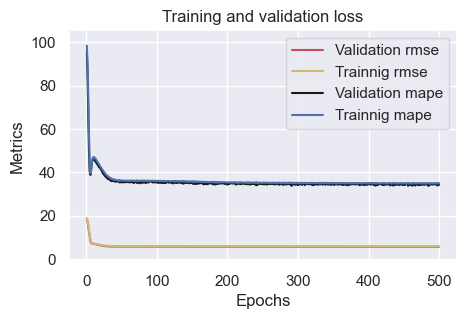

In [98]:
plotme(model4_1_1)

In [99]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_1_2

Epoch 1/500
394/394 [==============================] - 1s 885us/step - loss: 1268404.1250 - mape: 98.0929 - rmse: 1126.2345 - val_loss: 1229905.7500 - val_mape: 94.1390 - val_rmse: 1109.0111
Epoch 2/500
394/394 [==============================] - 0s 754us/step - loss: 1069074.5000 - mape: 85.9874 - rmse: 1033.9606 - val_loss: 940623.1875 - val_mape: 76.3780 - val_rmse: 969.8573
Epoch 3/500
394/394 [==============================] - 0s 725us/step - loss: 758792.9375 - mape: 65.2142 - rmse: 871.0872 - val_loss: 614993.7500 - val_mape: 54.3794 - val_rmse: 784.2154
Epoch 4/500
394/394 [==============================] - 0s 735us/step - loss: 474646.5000 - mape: 46.6047 - rmse: 688.9459 - val_loss: 368062.9062 - val_mape: 40.5663 - val_rmse: 606.6819
Epoch 5/500
394/394 [==============================] - 0s 721us/step - loss: 293497.2500 - mape: 39.6910 - rmse: 541.7538 - val_loss: 239462.8281 - val_mape: 39.1318 - val_rmse: 489.3494
Epoch 6/500
394/394 [==============================] - 0s 7

Epoch 88/500
394/394 [==============================] - 0s 751us/step - loss: 128179.8906 - mape: 35.7853 - rmse: 358.0222 - val_loss: 119154.8750 - val_mape: 34.6787 - val_rmse: 345.1882
Epoch 89/500
394/394 [==============================] - 0s 714us/step - loss: 128163.6953 - mape: 35.5312 - rmse: 357.9996 - val_loss: 119201.3125 - val_mape: 35.6048 - val_rmse: 345.2554
Epoch 90/500
394/394 [==============================] - 0s 738us/step - loss: 128169.9375 - mape: 35.7983 - rmse: 358.0083 - val_loss: 119097.8984 - val_mape: 35.1843 - val_rmse: 345.1056
Epoch 91/500
394/394 [==============================] - 0s 763us/step - loss: 128130.3906 - mape: 35.7347 - rmse: 357.9531 - val_loss: 119074.9062 - val_mape: 35.1434 - val_rmse: 345.0723
Epoch 92/500
394/394 [==============================] - 0s 764us/step - loss: 128134.0312 - mape: 35.6725 - rmse: 357.9581 - val_loss: 119060.3438 - val_mape: 35.2154 - val_rmse: 345.0512
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 745us/step - loss: 126950.3125 - mape: 35.4201 - rmse: 356.3009 - val_loss: 117896.9141 - val_mape: 33.8943 - val_rmse: 343.3612
Epoch 175/500
394/394 [==============================] - 0s 763us/step - loss: 126994.3516 - mape: 35.0274 - rmse: 356.3627 - val_loss: 117805.2031 - val_mape: 34.7862 - val_rmse: 343.2276
Epoch 176/500
394/394 [==============================] - 0s 745us/step - loss: 126976.9141 - mape: 35.2101 - rmse: 356.3382 - val_loss: 117782.7422 - val_mape: 34.5762 - val_rmse: 343.1949
Epoch 177/500
394/394 [==============================] - 0s 766us/step - loss: 126949.5156 - mape: 35.2102 - rmse: 356.2997 - val_loss: 117798.2188 - val_mape: 34.2504 - val_rmse: 343.2174
Epoch 178/500
394/394 [==============================] - 0s 766us/step - loss: 126929.8750 - mape: 35.1572 - rmse: 356.2722 - val_loss: 117768.7891 - val_mape: 34.4737 - val_rmse: 343.1746
Epoch 179/500
394/394 [==============================] - 0s 749us/ste

394/394 [==============================] - 0s 762us/step - loss: 126635.0312 - mape: 34.9369 - rmse: 355.8582 - val_loss: 117418.3359 - val_mape: 34.5130 - val_rmse: 342.6636
Epoch 261/500
394/394 [==============================] - 0s 739us/step - loss: 126612.8438 - mape: 34.9118 - rmse: 355.8270 - val_loss: 117443.3750 - val_mape: 34.7705 - val_rmse: 342.7001
Epoch 262/500
394/394 [==============================] - 0s 762us/step - loss: 126597.1406 - mape: 34.9466 - rmse: 355.8049 - val_loss: 117547.4453 - val_mape: 35.1967 - val_rmse: 342.8519
Epoch 263/500
394/394 [==============================] - 0s 762us/step - loss: 126607.2500 - mape: 35.1629 - rmse: 355.8191 - val_loss: 117413.3281 - val_mape: 34.2981 - val_rmse: 342.6563
Epoch 264/500
394/394 [==============================] - 0s 774us/step - loss: 126606.0625 - mape: 34.9244 - rmse: 355.8174 - val_loss: 117437.5859 - val_mape: 34.7961 - val_rmse: 342.6917
Epoch 265/500
394/394 [==============================] - 0s 737us/ste

394/394 [==============================] - 0s 743us/step - loss: 126489.5312 - mape: 35.0764 - rmse: 355.6537 - val_loss: 117306.4531 - val_mape: 34.0051 - val_rmse: 342.5003
Epoch 347/500
394/394 [==============================] - 0s 747us/step - loss: 126534.5000 - mape: 34.9145 - rmse: 355.7169 - val_loss: 117285.8828 - val_mape: 34.5073 - val_rmse: 342.4703
Epoch 348/500
394/394 [==============================] - 0s 729us/step - loss: 126516.2188 - mape: 35.0304 - rmse: 355.6912 - val_loss: 117283.0078 - val_mape: 34.2763 - val_rmse: 342.4661
Epoch 349/500
394/394 [==============================] - 0s 764us/step - loss: 126502.1172 - mape: 35.0183 - rmse: 355.6714 - val_loss: 117282.5859 - val_mape: 34.1450 - val_rmse: 342.4655
Epoch 350/500
394/394 [==============================] - 0s 732us/step - loss: 126521.6016 - mape: 34.8862 - rmse: 355.6988 - val_loss: 117289.9375 - val_mape: 34.6407 - val_rmse: 342.4762
Epoch 351/500
394/394 [==============================] - 0s 737us/ste

394/394 [==============================] - 0s 744us/step - loss: 126453.0234 - mape: 34.9329 - rmse: 355.6023 - val_loss: 117222.8125 - val_mape: 34.7267 - val_rmse: 342.3782
Epoch 433/500
394/394 [==============================] - 0s 758us/step - loss: 126457.9844 - mape: 35.0251 - rmse: 355.6093 - val_loss: 117188.4688 - val_mape: 34.4341 - val_rmse: 342.3280
Epoch 434/500
394/394 [==============================] - 0s 735us/step - loss: 126451.4766 - mape: 34.9233 - rmse: 355.6002 - val_loss: 117187.2031 - val_mape: 34.1914 - val_rmse: 342.3262
Epoch 435/500
394/394 [==============================] - 0s 750us/step - loss: 126458.4453 - mape: 34.8570 - rmse: 355.6100 - val_loss: 117210.5312 - val_mape: 34.6920 - val_rmse: 342.3602
Epoch 436/500
394/394 [==============================] - 0s 736us/step - loss: 126452.6875 - mape: 34.9304 - rmse: 355.6019 - val_loss: 117189.1328 - val_mape: 34.4780 - val_rmse: 342.3290
Epoch 437/500
394/394 [==============================] - 0s 770us/ste

In [100]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_1_3

Epoch 1/500
394/394 [==============================] - 1s 889us/step - loss: 1220509.1250 - mape: 95.2084 - rmse: 1104.7666 - val_loss: 1082100.2500 - val_mape: 85.3615 - val_rmse: 1040.2405
Epoch 2/500
394/394 [==============================] - 0s 771us/step - loss: 800556.1250 - mape: 68.1921 - rmse: 894.7380 - val_loss: 559751.0625 - val_mape: 50.7624 - val_rmse: 748.1651
Epoch 3/500
394/394 [==============================] - 0s 778us/step - loss: 376977.1250 - mape: 42.2935 - rmse: 613.9846 - val_loss: 255021.4688 - val_mape: 38.7480 - val_rmse: 504.9965
Epoch 4/500
394/394 [==============================] - 0s 760us/step - loss: 214002.4844 - mape: 41.8596 - rmse: 462.6040 - val_loss: 189168.2188 - val_mape: 43.9687 - val_rmse: 434.9347
Epoch 5/500
394/394 [==============================] - 0s 765us/step - loss: 189816.7344 - mape: 46.3233 - rmse: 435.6796 - val_loss: 181747.4219 - val_mape: 45.9492 - val_rmse: 426.3185
Epoch 6/500
394/394 [==============================] - 0s 763

Epoch 88/500
394/394 [==============================] - 0s 743us/step - loss: 127839.2422 - mape: 35.5916 - rmse: 357.5461 - val_loss: 118737.1328 - val_mape: 34.8799 - val_rmse: 344.5826
Epoch 89/500
394/394 [==============================] - 0s 740us/step - loss: 127775.8594 - mape: 35.4106 - rmse: 357.4575 - val_loss: 118871.2188 - val_mape: 35.6885 - val_rmse: 344.7771
Epoch 90/500
394/394 [==============================] - 0s 767us/step - loss: 127777.2891 - mape: 35.5924 - rmse: 357.4595 - val_loss: 118756.5938 - val_mape: 35.4315 - val_rmse: 344.6108
Epoch 91/500
394/394 [==============================] - 0s 783us/step - loss: 127719.1484 - mape: 35.6901 - rmse: 357.3782 - val_loss: 118649.2266 - val_mape: 34.5994 - val_rmse: 344.4550
Epoch 92/500
394/394 [==============================] - 0s 776us/step - loss: 127736.5859 - mape: 35.5425 - rmse: 357.4026 - val_loss: 118620.2266 - val_mape: 34.5492 - val_rmse: 344.4129
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 750us/step - loss: 126750.6016 - mape: 35.0550 - rmse: 356.0205 - val_loss: 117644.1719 - val_mape: 34.3855 - val_rmse: 342.9930
Epoch 175/500
394/394 [==============================] - 0s 746us/step - loss: 126733.3281 - mape: 35.0356 - rmse: 355.9962 - val_loss: 117659.5547 - val_mape: 34.2192 - val_rmse: 343.0154
Epoch 176/500
394/394 [==============================] - 0s 763us/step - loss: 126744.2344 - mape: 35.0033 - rmse: 356.0116 - val_loss: 117646.5625 - val_mape: 34.4428 - val_rmse: 342.9965
Epoch 177/500
394/394 [==============================] - 0s 758us/step - loss: 126708.7109 - mape: 35.0119 - rmse: 355.9617 - val_loss: 117708.6562 - val_mape: 34.9775 - val_rmse: 343.0869
Epoch 178/500
394/394 [==============================] - 0s 763us/step - loss: 126764.6172 - mape: 35.1018 - rmse: 356.0402 - val_loss: 117685.5703 - val_mape: 34.8570 - val_rmse: 343.0533
Epoch 179/500
394/394 [==============================] - 0s 764us/ste

394/394 [==============================] - 0s 771us/step - loss: 126533.7188 - mape: 34.8955 - rmse: 355.7158 - val_loss: 117519.5859 - val_mape: 35.0758 - val_rmse: 342.8113
Epoch 261/500
394/394 [==============================] - 0s 757us/step - loss: 126534.5312 - mape: 34.9506 - rmse: 355.7169 - val_loss: 117488.3047 - val_mape: 35.0103 - val_rmse: 342.7657
Epoch 262/500
394/394 [==============================] - 0s 748us/step - loss: 126536.0234 - mape: 35.0326 - rmse: 355.7190 - val_loss: 117381.3984 - val_mape: 34.0266 - val_rmse: 342.6097
Epoch 263/500
394/394 [==============================] - 0s 751us/step - loss: 126538.3906 - mape: 34.9130 - rmse: 355.7224 - val_loss: 117350.7422 - val_mape: 34.2202 - val_rmse: 342.5649
Epoch 264/500
394/394 [==============================] - 0s 781us/step - loss: 126531.1562 - mape: 34.8847 - rmse: 355.7122 - val_loss: 117351.0625 - val_mape: 34.3322 - val_rmse: 342.5654
Epoch 265/500
394/394 [==============================] - 0s 759us/ste

394/394 [==============================] - 0s 763us/step - loss: 126422.9844 - mape: 34.8416 - rmse: 355.5601 - val_loss: 117286.7031 - val_mape: 34.9691 - val_rmse: 342.4715
Epoch 347/500
394/394 [==============================] - 0s 765us/step - loss: 126439.0469 - mape: 34.8765 - rmse: 355.5827 - val_loss: 117242.7578 - val_mape: 34.7907 - val_rmse: 342.4073
Epoch 348/500
394/394 [==============================] - 0s 781us/step - loss: 126428.4062 - mape: 34.9792 - rmse: 355.5677 - val_loss: 117222.7422 - val_mape: 34.6852 - val_rmse: 342.3781
Epoch 349/500
394/394 [==============================] - 0s 758us/step - loss: 126422.5625 - mape: 34.9253 - rmse: 355.5595 - val_loss: 117200.3359 - val_mape: 34.5461 - val_rmse: 342.3453
Epoch 350/500
394/394 [==============================] - 0s 793us/step - loss: 126419.4375 - mape: 34.9892 - rmse: 355.5551 - val_loss: 117181.3438 - val_mape: 34.3814 - val_rmse: 342.3176
Epoch 351/500
394/394 [==============================] - 0s 745us/ste

394/394 [==============================] - 0s 753us/step - loss: 126388.1172 - mape: 34.8628 - rmse: 355.5111 - val_loss: 117159.6797 - val_mape: 34.7168 - val_rmse: 342.2859
Epoch 433/500
394/394 [==============================] - 0s 737us/step - loss: 126374.9453 - mape: 34.8522 - rmse: 355.4926 - val_loss: 117169.0859 - val_mape: 34.7408 - val_rmse: 342.2997
Epoch 434/500
394/394 [==============================] - 0s 748us/step - loss: 126381.5547 - mape: 34.8748 - rmse: 355.5018 - val_loss: 117115.1484 - val_mape: 34.3112 - val_rmse: 342.2209
Epoch 435/500
394/394 [==============================] - 0s 745us/step - loss: 126356.8672 - mape: 34.8059 - rmse: 355.4671 - val_loss: 117137.7578 - val_mape: 34.5770 - val_rmse: 342.2539
Epoch 436/500
394/394 [==============================] - 0s 764us/step - loss: 126385.8672 - mape: 35.0180 - rmse: 355.5079 - val_loss: 117117.1797 - val_mape: 34.2379 - val_rmse: 342.2239
Epoch 437/500
394/394 [==============================] - 0s 760us/ste

In [101]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_1_4

Epoch 1/500
394/394 [==============================] - 1s 971us/step - loss: 742779.5000 - mape: 68.6562 - rmse: 861.8466 - val_loss: 183093.4062 - val_mape: 46.4250 - val_rmse: 427.8942
Epoch 2/500
394/394 [==============================] - 0s 824us/step - loss: 180269.7969 - mape: 46.8002 - rmse: 424.5819 - val_loss: 164649.7812 - val_mape: 45.6196 - val_rmse: 405.7706
Epoch 3/500
394/394 [==============================] - 0s 840us/step - loss: 161935.3281 - mape: 44.3775 - rmse: 402.4119 - val_loss: 145202.1094 - val_mape: 41.6769 - val_rmse: 381.0540
Epoch 4/500
394/394 [==============================] - 0s 835us/step - loss: 145505.1875 - mape: 41.4558 - rmse: 381.4514 - val_loss: 130502.1719 - val_mape: 39.8289 - val_rmse: 361.2509
Epoch 5/500
394/394 [==============================] - 0s 771us/step - loss: 135029.9531 - mape: 39.0501 - rmse: 367.4642 - val_loss: 123383.2734 - val_mape: 38.2459 - val_rmse: 351.2596
Epoch 6/500
394/394 [==============================] - 0s 793us/s

Epoch 45/500
394/394 [==============================] - 0s 788us/step - loss: 128516.5547 - mape: 35.9014 - rmse: 358.4921 - val_loss: 119415.6484 - val_mape: 34.7295 - val_rmse: 345.5657
Epoch 46/500
394/394 [==============================] - 0s 790us/step - loss: 128427.7734 - mape: 35.8185 - rmse: 358.3682 - val_loss: 120648.1250 - val_mape: 33.0886 - val_rmse: 347.3444
Epoch 47/500
394/394 [==============================] - 0s 795us/step - loss: 128493.2188 - mape: 35.6945 - rmse: 358.4595 - val_loss: 119437.7656 - val_mape: 34.1962 - val_rmse: 345.5977
Epoch 48/500
394/394 [==============================] - 0s 799us/step - loss: 128383.9297 - mape: 35.8134 - rmse: 358.3070 - val_loss: 119311.9609 - val_mape: 34.4681 - val_rmse: 345.4156
Epoch 49/500
394/394 [==============================] - 0s 792us/step - loss: 128400.5938 - mape: 35.6233 - rmse: 358.3303 - val_loss: 119212.7578 - val_mape: 34.7755 - val_rmse: 345.2720
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 785us/step - loss: 127019.4688 - mape: 35.0540 - rmse: 356.3979 - val_loss: 117727.8047 - val_mape: 33.8569 - val_rmse: 343.1149
Epoch 132/500
394/394 [==============================] - 0s 789us/step - loss: 126809.5625 - mape: 35.0039 - rmse: 356.1033 - val_loss: 117737.7656 - val_mape: 35.1030 - val_rmse: 343.1294
Epoch 133/500
394/394 [==============================] - 0s 793us/step - loss: 126871.2734 - mape: 34.9788 - rmse: 356.1899 - val_loss: 117589.6484 - val_mape: 34.3986 - val_rmse: 342.9135
Epoch 134/500
394/394 [==============================] - 0s 800us/step - loss: 126970.3359 - mape: 34.9435 - rmse: 356.3290 - val_loss: 117677.0078 - val_mape: 35.0154 - val_rmse: 343.0408
Epoch 135/500
394/394 [==============================] - 0s 788us/step - loss: 126827.1719 - mape: 34.9966 - rmse: 356.1280 - val_loss: 117824.3125 - val_mape: 33.7745 - val_rmse: 343.2555
Epoch 136/500
394/394 [==============================] - 0s 790us/ste

394/394 [==============================] - 0s 802us/step - loss: 126862.0781 - mape: 34.9263 - rmse: 356.1770 - val_loss: 117838.2266 - val_mape: 33.6374 - val_rmse: 343.2757
Epoch 218/500
394/394 [==============================] - 0s 782us/step - loss: 126809.6250 - mape: 34.9755 - rmse: 356.1034 - val_loss: 117836.4609 - val_mape: 35.2698 - val_rmse: 343.2732
Epoch 219/500
394/394 [==============================] - 0s 799us/step - loss: 126855.1250 - mape: 35.1070 - rmse: 356.1673 - val_loss: 117975.7500 - val_mape: 32.9646 - val_rmse: 343.4760
Epoch 220/500
394/394 [==============================] - 0s 791us/step - loss: 126921.5703 - mape: 34.7512 - rmse: 356.2605 - val_loss: 117581.6797 - val_mape: 34.0447 - val_rmse: 342.9019
Epoch 221/500
394/394 [==============================] - 0s 775us/step - loss: 126865.4141 - mape: 35.0144 - rmse: 356.1817 - val_loss: 117704.8906 - val_mape: 33.6271 - val_rmse: 343.0815
Epoch 222/500
394/394 [==============================] - 0s 781us/ste

394/394 [==============================] - 0s 783us/step - loss: 126861.5312 - mape: 35.0038 - rmse: 356.1763 - val_loss: 117709.3359 - val_mape: 33.4700 - val_rmse: 343.0880
Epoch 304/500
394/394 [==============================] - 0s 782us/step - loss: 126898.4688 - mape: 34.8147 - rmse: 356.2281 - val_loss: 118413.6094 - val_mape: 36.1146 - val_rmse: 344.1128
Epoch 305/500
394/394 [==============================] - 0s 780us/step - loss: 126883.2031 - mape: 35.0626 - rmse: 356.2067 - val_loss: 118121.0234 - val_mape: 32.6905 - val_rmse: 343.6874
Epoch 306/500
394/394 [==============================] - 0s 784us/step - loss: 126930.3828 - mape: 34.9077 - rmse: 356.2729 - val_loss: 117530.0156 - val_mape: 34.2197 - val_rmse: 342.8265
Epoch 307/500
394/394 [==============================] - 0s 799us/step - loss: 126921.2188 - mape: 34.9139 - rmse: 356.2600 - val_loss: 117594.4375 - val_mape: 34.2022 - val_rmse: 342.9204
Epoch 308/500
394/394 [==============================] - 0s 828us/ste

394/394 [==============================] - 0s 795us/step - loss: 127009.2734 - mape: 34.7956 - rmse: 356.3836 - val_loss: 117598.6797 - val_mape: 34.6579 - val_rmse: 342.9266
Epoch 390/500
394/394 [==============================] - 0s 789us/step - loss: 126912.3672 - mape: 34.9780 - rmse: 356.2476 - val_loss: 117722.1953 - val_mape: 33.5619 - val_rmse: 343.1067
Epoch 391/500
394/394 [==============================] - 0s 801us/step - loss: 126808.7891 - mape: 35.0546 - rmse: 356.1022 - val_loss: 117564.9922 - val_mape: 34.2217 - val_rmse: 342.8775
Epoch 392/500
394/394 [==============================] - 0s 772us/step - loss: 126897.0312 - mape: 34.8315 - rmse: 356.2261 - val_loss: 117752.2422 - val_mape: 33.5001 - val_rmse: 343.1505
Epoch 393/500
394/394 [==============================] - 0s 777us/step - loss: 126804.6250 - mape: 34.9094 - rmse: 356.0964 - val_loss: 117571.3750 - val_mape: 34.2682 - val_rmse: 342.8868
Epoch 394/500
394/394 [==============================] - 0s 771us/ste

394/394 [==============================] - 0s 783us/step - loss: 126927.6172 - mape: 35.0563 - rmse: 356.2690 - val_loss: 117652.0469 - val_mape: 33.7842 - val_rmse: 343.0045
Epoch 476/500
394/394 [==============================] - 0s 778us/step - loss: 126846.6250 - mape: 34.8903 - rmse: 356.1553 - val_loss: 117573.6719 - val_mape: 34.5814 - val_rmse: 342.8902
Epoch 477/500
394/394 [==============================] - 0s 773us/step - loss: 126907.7656 - mape: 34.8588 - rmse: 356.2411 - val_loss: 117787.8281 - val_mape: 35.2851 - val_rmse: 343.2023
Epoch 478/500
394/394 [==============================] - 0s 788us/step - loss: 126961.0547 - mape: 34.9798 - rmse: 356.3159 - val_loss: 117559.4219 - val_mape: 34.3831 - val_rmse: 342.8694
Epoch 479/500
394/394 [==============================] - 0s 768us/step - loss: 126877.5156 - mape: 34.8583 - rmse: 356.1987 - val_loss: 117681.6250 - val_mape: 35.0316 - val_rmse: 343.0475
Epoch 480/500
394/394 [==============================] - 0s 783us/ste

In [102]:
# inputs: distance + 1st & 2nd & 3rd dominant road
model4_1_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_1_5

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 568141.8750 - mape: 61.8193 - rmse: 753.7519 - val_loss: 175902.0469 - val_mape: 45.0113 - val_rmse: 419.4068
Epoch 2/500
394/394 [==============================] - 0s 835us/step - loss: 170336.9844 - mape: 45.3771 - rmse: 412.7190 - val_loss: 151244.5156 - val_mape: 42.6443 - val_rmse: 388.9017
Epoch 3/500
394/394 [==============================] - 0s 860us/step - loss: 148844.2969 - mape: 42.0500 - rmse: 385.8034 - val_loss: 131241.6562 - val_mape: 39.7071 - val_rmse: 362.2729
Epoch 4/500
394/394 [==============================] - 0s 852us/step - loss: 134683.6562 - mape: 38.9029 - rmse: 366.9927 - val_loss: 122240.1328 - val_mape: 37.7098 - val_rmse: 349.6286
Epoch 5/500
394/394 [==============================] - 0s 842us/step - loss: 130166.2969 - mape: 36.9300 - rmse: 360.7857 - val_loss: 120524.7656 - val_mape: 35.8293 - val_rmse: 347.1668
Epoch 6/500
394/394 [==============================] - 0s 847us/ste

Epoch 45/500
394/394 [==============================] - 0s 862us/step - loss: 129520.3359 - mape: 36.2588 - rmse: 359.8893 - val_loss: 120399.3359 - val_mape: 34.8831 - val_rmse: 346.9861
Epoch 46/500
394/394 [==============================] - 0s 848us/step - loss: 129528.6172 - mape: 36.1769 - rmse: 359.9008 - val_loss: 120954.1406 - val_mape: 36.9231 - val_rmse: 347.7846
Epoch 47/500
394/394 [==============================] - 0s 862us/step - loss: 129669.1484 - mape: 36.3440 - rmse: 360.0960 - val_loss: 120549.9609 - val_mape: 36.0839 - val_rmse: 347.2031
Epoch 48/500
394/394 [==============================] - 0s 899us/step - loss: 129534.1484 - mape: 36.0406 - rmse: 359.9085 - val_loss: 120327.9375 - val_mape: 35.3043 - val_rmse: 346.8832
Epoch 49/500
394/394 [==============================] - 0s 896us/step - loss: 129477.5781 - mape: 36.1594 - rmse: 359.8299 - val_loss: 120673.5391 - val_mape: 36.7114 - val_rmse: 347.3810
Epoch 50/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 868us/step - loss: 129611.6094 - mape: 36.0388 - rmse: 360.0161 - val_loss: 121287.1641 - val_mape: 33.8183 - val_rmse: 348.2631
Epoch 132/500
394/394 [==============================] - 0s 834us/step - loss: 129642.8984 - mape: 36.2323 - rmse: 360.0596 - val_loss: 120394.9453 - val_mape: 35.7780 - val_rmse: 346.9797
Epoch 133/500
394/394 [==============================] - 0s 890us/step - loss: 129535.6875 - mape: 36.1595 - rmse: 359.9107 - val_loss: 120316.1562 - val_mape: 35.6090 - val_rmse: 346.8662
Epoch 134/500
394/394 [==============================] - 0s 871us/step - loss: 129369.1094 - mape: 36.2253 - rmse: 359.6792 - val_loss: 120881.6406 - val_mape: 34.1454 - val_rmse: 347.6804
Epoch 135/500
394/394 [==============================] - 0s 852us/step - loss: 129389.5234 - mape: 36.2097 - rmse: 359.7076 - val_loss: 120435.3438 - val_mape: 34.9555 - val_rmse: 347.0380
Epoch 136/500
394/394 [==============================] - 0s 860us/ste

394/394 [==============================] - 0s 856us/step - loss: 129480.6172 - mape: 36.2028 - rmse: 359.8342 - val_loss: 120965.5156 - val_mape: 34.0279 - val_rmse: 347.8010
Epoch 218/500
394/394 [==============================] - 0s 864us/step - loss: 129512.1562 - mape: 36.2911 - rmse: 359.8780 - val_loss: 120363.8359 - val_mape: 35.4065 - val_rmse: 346.9349
Epoch 219/500
394/394 [==============================] - 0s 888us/step - loss: 129430.2422 - mape: 36.2249 - rmse: 359.7642 - val_loss: 121120.6172 - val_mape: 33.8318 - val_rmse: 348.0239
Epoch 220/500
394/394 [==============================] - 0s 936us/step - loss: 129405.7344 - mape: 36.0837 - rmse: 359.7301 - val_loss: 120327.9922 - val_mape: 35.3103 - val_rmse: 346.8832
Epoch 221/500
394/394 [==============================] - 0s 954us/step - loss: 129419.9062 - mape: 36.2419 - rmse: 359.7498 - val_loss: 121065.1641 - val_mape: 33.9051 - val_rmse: 347.9442
Epoch 222/500
394/394 [==============================] - 0s 963us/ste

394/394 [==============================] - 0s 864us/step - loss: 129455.7109 - mape: 36.1248 - rmse: 359.7995 - val_loss: 120702.6406 - val_mape: 36.4656 - val_rmse: 347.4229
Epoch 304/500
394/394 [==============================] - 0s 867us/step - loss: 129412.3359 - mape: 36.1017 - rmse: 359.7393 - val_loss: 121359.7422 - val_mape: 37.3346 - val_rmse: 348.3672
Epoch 305/500
394/394 [==============================] - 0s 865us/step - loss: 129556.1094 - mape: 36.2399 - rmse: 359.9390 - val_loss: 120377.5938 - val_mape: 35.7812 - val_rmse: 346.9547
Epoch 306/500
394/394 [==============================] - 0s 872us/step - loss: 129613.8281 - mape: 36.2881 - rmse: 360.0192 - val_loss: 121049.7344 - val_mape: 36.9445 - val_rmse: 347.9220
Epoch 307/500
394/394 [==============================] - 0s 852us/step - loss: 129518.1953 - mape: 36.2305 - rmse: 359.8864 - val_loss: 120446.8828 - val_mape: 34.9071 - val_rmse: 347.0546
Epoch 308/500
394/394 [==============================] - 0s 885us/ste

394/394 [==============================] - 0s 872us/step - loss: 129429.1328 - mape: 36.3575 - rmse: 359.7626 - val_loss: 120333.5469 - val_mape: 35.4302 - val_rmse: 346.8913
Epoch 390/500
394/394 [==============================] - 0s 859us/step - loss: 129513.1641 - mape: 36.2116 - rmse: 359.8794 - val_loss: 120293.2656 - val_mape: 35.4917 - val_rmse: 346.8332
Epoch 391/500
394/394 [==============================] - 0s 865us/step - loss: 129439.4453 - mape: 36.3225 - rmse: 359.7769 - val_loss: 120453.5234 - val_mape: 34.5136 - val_rmse: 347.0641
Epoch 392/500
394/394 [==============================] - 0s 863us/step - loss: 129553.8047 - mape: 36.0665 - rmse: 359.9358 - val_loss: 120388.8516 - val_mape: 35.7536 - val_rmse: 346.9710
Epoch 393/500
394/394 [==============================] - 0s 849us/step - loss: 129534.5078 - mape: 36.2949 - rmse: 359.9090 - val_loss: 120450.5625 - val_mape: 36.0223 - val_rmse: 347.0599
Epoch 394/500
394/394 [==============================] - 0s 865us/ste

394/394 [==============================] - 0s 866us/step - loss: 128880.8047 - mape: 36.0115 - rmse: 358.9997 - val_loss: 119952.3672 - val_mape: 36.1936 - val_rmse: 346.3414
Epoch 476/500
394/394 [==============================] - 0s 876us/step - loss: 128922.2500 - mape: 36.1824 - rmse: 359.0574 - val_loss: 119718.1641 - val_mape: 35.7790 - val_rmse: 346.0031
Epoch 477/500
394/394 [==============================] - 0s 865us/step - loss: 128777.4375 - mape: 35.9363 - rmse: 358.8557 - val_loss: 119961.3203 - val_mape: 36.3891 - val_rmse: 346.3543
Epoch 478/500
394/394 [==============================] - 0s 865us/step - loss: 128799.4375 - mape: 36.2424 - rmse: 358.8864 - val_loss: 119674.5391 - val_mape: 35.6970 - val_rmse: 345.9401
Epoch 479/500
394/394 [==============================] - 0s 860us/step - loss: 128757.6875 - mape: 36.0416 - rmse: 358.8282 - val_loss: 119952.2578 - val_mape: 34.1486 - val_rmse: 346.3412
Epoch 480/500
394/394 [==============================] - 0s 849us/ste

### missing value handling approach 2: 

In [103]:
### missing value handling approach 2: 
df6 = df.iloc[:,0:8].copy()
df6[['1st ranked', '2nd ranked','3rd ranked']] = df6[['1st ranked', '2nd ranked','3rd ranked']].fillna(0)
df6.head()

travel time  distance  hour of day    hr_sin        hr_cos    1st ranked  \
0         1163  0.578883           18 -1.000000 -1.836970e-16       primary   
1          347  0.048963           21 -0.707107  7.071068e-01       service   
2          720  0.268455           19 -0.965926  2.588190e-01       primary   
3          355  0.056803           16 -0.866025 -5.000000e-01  unclassified   
4          356  0.076939           17 -0.965926 -2.588190e-01   residential   

     2nd ranked   3rd ranked  
0       service  residential  
1  unclassified  residential  
2  unclassified     tertiary  
3       service      primary  
4  unclassified      service

#### 2. encoding of ranked roadtype with binary-encoding

In [104]:
option = ['residential','tertiary','primary']
df6.loc[~df6['1st ranked'].isin(option),'1st ranked'] = 'others1'
option = ['residential','tertiary','secondary',0]
df6.loc[~df6['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
option = ['residential','tertiary',0]
df6.loc[~df6['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
df6.head(20)

travel time  distance  hour of day        hr_sin        hr_cos  \
0          1163  0.578883           18 -1.000000e+00 -1.836970e-16   
1           347  0.048963           21 -7.071068e-01  7.071068e-01   
2           720  0.268455           19 -9.659258e-01  2.588190e-01   
3           355  0.056803           16 -8.660254e-01 -5.000000e-01   
4           356  0.076939           17 -9.659258e-01 -2.588190e-01   
5           362  0.029283           20 -8.660254e-01  5.000000e-01   
6           457  0.145014           16 -8.660254e-01 -5.000000e-01   
7          1590  0.934388           22 -5.000000e-01  8.660254e-01   
8          1720  0.831630            1  2.588190e-01  9.659258e-01   
9           656  0.078470           15 -7.071068e-01 -7.071068e-01   
10          402  0.150663           23 -2.588190e-01  9.659258e-01   
11         1234  0.085468           18 -1.000000e+00 -1.836970e-16   
12         1046  0.170512           16 -8.660254e-01 -5.000000e-01   
13          366  0.085953           23 -2.588190e-01  9.659258e-01   
14         1212  0.192141           18 -1.000000e+00 -1.836970e-16   
15          404  0.110049           20 -8.660254e-01  5.000000e-01   
16         1055  0.000043           12  1.224647e-16 -1.000000e+00   
17          354  0.070200           19 -9.659258e-01  2.588190e-01   
18          247  0.052494            3  7.071068e-01  7.071068e-01   
19          770  0.150841           18 -1.000000e+00 -1.836970e-16   

     1st ranked   2nd ranked   3rd ranked  
0       primary      others2  residential  
1       others1      others2  residential  
2       primary      others2     tertiary  
3       others1      others2      others3  
4   residential      others2      others3  
5   residential      others2      others3  
6       primary  residential      others3  
7       primary    secondary      others3  
8       primary  residential      others3  
9       primary     tertiary      others3  
10     tertiary      others2      others3  
11  residential      others2      others3  
12     tertiary      others2  residential  
13      others1  residential      others3  
14      primary     tertiary  residential  
15      others1  residential      others3  
16  residential      others2      others3  
17  residential      others2            0  
18      others1      others2  residential  
19     tertiary      others2  residential

In [105]:
#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['1st ranked','2nd ranked','3rd ranked'],return_df=True)
#Fit and Transform Data 
df6=encoder.fit_transform(df6) 
df6

travel time  distance  hour of day    hr_sin        hr_cos  \
0             1163  0.578883           18 -1.000000 -1.836970e-16   
1              347  0.048963           21 -0.707107  7.071068e-01   
2              720  0.268455           19 -0.965926  2.588190e-01   
3              355  0.056803           16 -0.866025 -5.000000e-01   
4              356  0.076939           17 -0.965926 -2.588190e-01   
...            ...       ...          ...       ...           ...   
15758         1649  0.657683           21 -0.707107  7.071068e-01   
15759         1385  0.594228            1  0.258819  9.659258e-01   
15760         1217  0.593117            2  0.500000  8.660254e-01   
15761         1189  0.597302           22 -0.500000  8.660254e-01   
15762         1112  0.392350            6  1.000000  6.123234e-17   

       1st ranked_0  1st ranked_1  1st ranked_2  2nd ranked_0  2nd ranked_1  \
0                 0             0             1             0             0   
1                 0             1             0             0             0   
2                 0             0             1             0             0   
3                 0             1             0             0             0   
4                 0             1             1             0             0   
...             ...           ...           ...           ...           ...   
15758             0             0             1             0             1   
15759             0             0             1             1             0   
15760             0             0             1             0             1   
15761             0             0             1             0             1   
15762             0             0             1             0             1   

       2nd ranked_2  3rd ranked_0  3rd ranked_1  3rd ranked_2  
0                 1             0             0             1  
1                 1             0             0             1  
2                 1             0             1             0  
3                 1             0             1             1  
4                 1             0             1             1  
...             ...           ...           ...           ...  
15758             1             0             0             1  
15759             0             0             1             1  
15760             1             0             1             0  
15761             1             0             1             0  
15762             1             1             0             0  

[15728 rows x 14 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

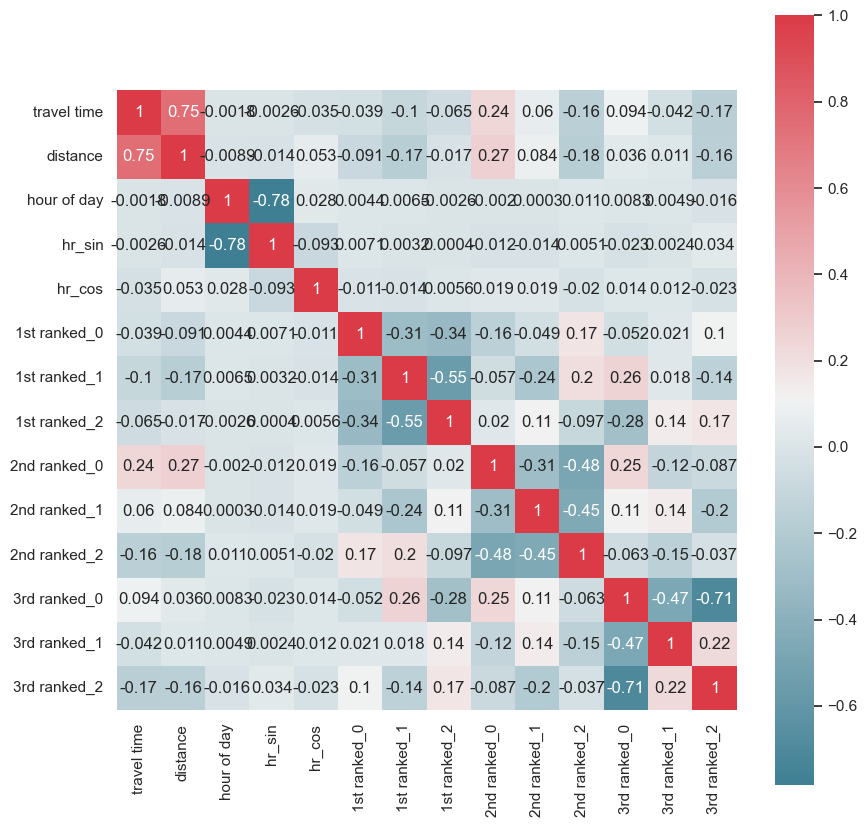

In [106]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10,10))
corr = df6.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [107]:
x = np.array(df6[['distance','1st ranked_0','1st ranked_1','1st ranked_2','2nd ranked_0','2nd ranked_1','2nd ranked_2','3rd ranked_0','3rd ranked_1','3rd ranked_2']])
# x = np.array(df1.iloc[:,1:])
y = np.array(df6['travel time'])
x.shape

(15728, 10)

In [108]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [109]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 10)
(3146, 10)


In [110]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_1 = nnmodel(50, num_hlayers=1,Epoch=500)
model4_4_1

Epoch 1/500
394/394 [==============================] - 0s 866us/step - loss: 1267540.5000 - mape: 97.5575 - rmse: 1125.8510 - val_loss: 1234415.2500 - val_mape: 92.9990 - val_rmse: 1111.0424
Epoch 2/500
394/394 [==============================] - 0s 715us/step - loss: 1087311.7500 - mape: 84.1691 - rmse: 1042.7424 - val_loss: 979246.5625 - val_mape: 73.4890 - val_rmse: 989.5688
Epoch 3/500
394/394 [==============================] - 0s 737us/step - loss: 802751.6875 - mape: 61.9150 - rmse: 895.9641 - val_loss: 675362.8125 - val_mape: 53.0749 - val_rmse: 821.8046
Epoch 4/500
394/394 [==============================] - 0s 731us/step - loss: 533982.6875 - mape: 49.6499 - rmse: 730.7412 - val_loss: 447192.7500 - val_mape: 50.2618 - val_rmse: 668.7247
Epoch 5/500
394/394 [==============================] - 0s 737us/step - loss: 370683.4688 - mape: 52.0079 - rmse: 608.8378 - val_loss: 335450.0938 - val_mape: 55.9841 - val_rmse: 579.1805
Epoch 6/500
394/394 [==============================] - 0s 7

Epoch 88/500
394/394 [==============================] - 0s 721us/step - loss: 126966.5781 - mape: 35.4414 - rmse: 356.3237 - val_loss: 117485.3438 - val_mape: 35.0721 - val_rmse: 342.7614
Epoch 89/500
394/394 [==============================] - 0s 730us/step - loss: 126952.7344 - mape: 35.5941 - rmse: 356.3043 - val_loss: 117454.8672 - val_mape: 34.9834 - val_rmse: 342.7169
Epoch 90/500
394/394 [==============================] - 0s 738us/step - loss: 126944.3281 - mape: 35.5696 - rmse: 356.2925 - val_loss: 117418.4141 - val_mape: 34.7818 - val_rmse: 342.6637
Epoch 91/500
394/394 [==============================] - 0s 737us/step - loss: 126896.0547 - mape: 35.5363 - rmse: 356.2247 - val_loss: 117405.3516 - val_mape: 34.8248 - val_rmse: 342.6447
Epoch 92/500
394/394 [==============================] - 0s 739us/step - loss: 126881.8594 - mape: 35.4472 - rmse: 356.2048 - val_loss: 117392.7109 - val_mape: 34.9943 - val_rmse: 342.6262
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 753us/step - loss: 125724.6562 - mape: 35.1867 - rmse: 354.5767 - val_loss: 116322.3359 - val_mape: 34.5260 - val_rmse: 341.0606
Epoch 175/500
394/394 [==============================] - 0s 734us/step - loss: 125699.5625 - mape: 35.2007 - rmse: 354.5414 - val_loss: 116325.6875 - val_mape: 34.7007 - val_rmse: 341.0655
Epoch 176/500
394/394 [==============================] - 0s 725us/step - loss: 125688.2656 - mape: 35.1568 - rmse: 354.5254 - val_loss: 116290.6641 - val_mape: 34.2114 - val_rmse: 341.0142
Epoch 177/500
394/394 [==============================] - 0s 733us/step - loss: 125662.8281 - mape: 35.0550 - rmse: 354.4895 - val_loss: 116357.9219 - val_mape: 34.9867 - val_rmse: 341.1128
Epoch 178/500
394/394 [==============================] - 0s 739us/step - loss: 125640.4531 - mape: 35.2111 - rmse: 354.4580 - val_loss: 116246.9609 - val_mape: 34.3114 - val_rmse: 340.9501
Epoch 179/500
394/394 [==============================] - 0s 735us/ste

394/394 [==============================] - 0s 723us/step - loss: 124913.2188 - mape: 34.8566 - rmse: 353.4306 - val_loss: 115727.7969 - val_mape: 33.5600 - val_rmse: 340.1879
Epoch 261/500
394/394 [==============================] - 0s 737us/step - loss: 124921.2109 - mape: 34.7327 - rmse: 353.4420 - val_loss: 115742.2109 - val_mape: 34.4532 - val_rmse: 340.2091
Epoch 262/500
394/394 [==============================] - 0s 714us/step - loss: 124893.7266 - mape: 34.7418 - rmse: 353.4031 - val_loss: 115795.1250 - val_mape: 34.7333 - val_rmse: 340.2868
Epoch 263/500
394/394 [==============================] - 0s 738us/step - loss: 124906.1875 - mape: 34.7143 - rmse: 353.4207 - val_loss: 115876.9219 - val_mape: 35.0886 - val_rmse: 340.4070
Epoch 264/500
394/394 [==============================] - 0s 730us/step - loss: 124900.0312 - mape: 34.8865 - rmse: 353.4120 - val_loss: 115679.1328 - val_mape: 33.9572 - val_rmse: 340.1164
Epoch 265/500
394/394 [==============================] - 0s 730us/ste

394/394 [==============================] - 0s 757us/step - loss: 124491.7734 - mape: 34.4908 - rmse: 352.8339 - val_loss: 115592.8359 - val_mape: 34.9991 - val_rmse: 339.9895
Epoch 347/500
394/394 [==============================] - 0s 731us/step - loss: 124491.5781 - mape: 34.7163 - rmse: 352.8336 - val_loss: 115374.7266 - val_mape: 34.0596 - val_rmse: 339.6685
Epoch 348/500
394/394 [==============================] - 0s 759us/step - loss: 124502.8359 - mape: 34.6079 - rmse: 352.8496 - val_loss: 115374.1094 - val_mape: 34.0983 - val_rmse: 339.6676
Epoch 349/500
394/394 [==============================] - 0s 759us/step - loss: 124489.1797 - mape: 34.5105 - rmse: 352.8302 - val_loss: 115447.0859 - val_mape: 34.5196 - val_rmse: 339.7751
Epoch 350/500
394/394 [==============================] - 0s 733us/step - loss: 124402.8750 - mape: 34.4831 - rmse: 352.7079 - val_loss: 115584.0078 - val_mape: 35.0003 - val_rmse: 339.9765
Epoch 351/500
394/394 [==============================] - 0s 723us/ste

394/394 [==============================] - 0s 736us/step - loss: 124200.7266 - mape: 34.3410 - rmse: 352.4212 - val_loss: 115290.0625 - val_mape: 34.3492 - val_rmse: 339.5439
Epoch 433/500
394/394 [==============================] - 0s 733us/step - loss: 124218.2344 - mape: 34.3356 - rmse: 352.4461 - val_loss: 115431.4453 - val_mape: 34.8359 - val_rmse: 339.7520
Epoch 434/500
394/394 [==============================] - 0s 723us/step - loss: 124215.7188 - mape: 34.5453 - rmse: 352.4425 - val_loss: 115246.7812 - val_mape: 34.1043 - val_rmse: 339.4802
Epoch 435/500
394/394 [==============================] - 0s 725us/step - loss: 124203.6250 - mape: 34.3585 - rmse: 352.4254 - val_loss: 115309.7891 - val_mape: 34.4347 - val_rmse: 339.5729
Epoch 436/500
394/394 [==============================] - 0s 740us/step - loss: 124220.5391 - mape: 34.4756 - rmse: 352.4493 - val_loss: 115243.0156 - val_mape: 33.9758 - val_rmse: 339.4746
Epoch 437/500
394/394 [==============================] - 0s 726us/ste

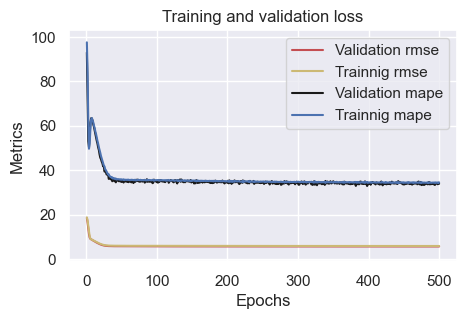

In [111]:
plotme(model4_4_1)
    

In [112]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_2 = nnmodel(100, num_hlayers=1,Epoch=500)
model4_4_2

Epoch 1/500
394/394 [==============================] - 1s 916us/step - loss: 1233928.8750 - mape: 95.0114 - rmse: 1110.8235 - val_loss: 1128863.5000 - val_mape: 85.1691 - val_rmse: 1062.4799
Epoch 2/500
394/394 [==============================] - 0s 740us/step - loss: 885165.0625 - mape: 67.9789 - rmse: 940.8321 - val_loss: 687373.8125 - val_mape: 53.5614 - val_rmse: 829.0801
Epoch 3/500
394/394 [==============================] - 0s 760us/step - loss: 499954.0938 - mape: 49.6582 - rmse: 707.0743 - val_loss: 387211.2812 - val_mape: 52.3800 - val_rmse: 622.2631
Epoch 4/500
394/394 [==============================] - 0s 767us/step - loss: 323703.9062 - mape: 56.4098 - rmse: 568.9498 - val_loss: 301496.6875 - val_mape: 60.9004 - val_rmse: 549.0872
Epoch 5/500
394/394 [==============================] - 0s 748us/step - loss: 284357.9375 - mape: 62.6903 - rmse: 533.2522 - val_loss: 281458.2188 - val_mape: 64.0170 - val_rmse: 530.5264
Epoch 6/500
394/394 [==============================] - 0s 742

Epoch 88/500
394/394 [==============================] - 0s 789us/step - loss: 126546.9609 - mape: 35.4829 - rmse: 355.7344 - val_loss: 116953.5781 - val_mape: 34.6395 - val_rmse: 341.9848
Epoch 89/500
394/394 [==============================] - 0s 730us/step - loss: 126450.1172 - mape: 35.3529 - rmse: 355.5983 - val_loss: 117020.3906 - val_mape: 35.2756 - val_rmse: 342.0824
Epoch 90/500
394/394 [==============================] - 0s 747us/step - loss: 126411.6484 - mape: 35.4480 - rmse: 355.5442 - val_loss: 116907.7969 - val_mape: 34.6305 - val_rmse: 341.9178
Epoch 91/500
394/394 [==============================] - 0s 763us/step - loss: 126422.6484 - mape: 35.3584 - rmse: 355.5596 - val_loss: 117006.0703 - val_mape: 35.3869 - val_rmse: 342.0615
Epoch 92/500
394/394 [==============================] - 0s 768us/step - loss: 126387.4141 - mape: 35.4724 - rmse: 355.5101 - val_loss: 116869.9375 - val_mape: 34.7408 - val_rmse: 341.8625
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 748us/step - loss: 125248.4297 - mape: 34.8284 - rmse: 353.9045 - val_loss: 115997.9141 - val_mape: 34.9235 - val_rmse: 340.5847
Epoch 175/500
394/394 [==============================] - 0s 732us/step - loss: 125226.1719 - mape: 35.0136 - rmse: 353.8731 - val_loss: 115871.3516 - val_mape: 34.2468 - val_rmse: 340.3988
Epoch 176/500
394/394 [==============================] - 0s 738us/step - loss: 125213.1953 - mape: 34.9429 - rmse: 353.8548 - val_loss: 115890.4375 - val_mape: 34.2281 - val_rmse: 340.4268
Epoch 177/500
394/394 [==============================] - 0s 763us/step - loss: 125202.4531 - mape: 34.9278 - rmse: 353.8396 - val_loss: 116000.6172 - val_mape: 33.1795 - val_rmse: 340.5886
Epoch 178/500
394/394 [==============================] - 0s 725us/step - loss: 125162.9375 - mape: 34.7388 - rmse: 353.7838 - val_loss: 116050.6250 - val_mape: 35.1973 - val_rmse: 340.6620
Epoch 179/500
394/394 [==============================] - 0s 736us/ste

394/394 [==============================] - 0s 764us/step - loss: 124699.3750 - mape: 34.5238 - rmse: 353.1280 - val_loss: 115615.6250 - val_mape: 34.7422 - val_rmse: 340.0230
Epoch 261/500
394/394 [==============================] - 0s 755us/step - loss: 124680.3516 - mape: 34.5477 - rmse: 353.1010 - val_loss: 115628.9766 - val_mape: 34.8880 - val_rmse: 340.0426
Epoch 262/500
394/394 [==============================] - 0s 750us/step - loss: 124665.9375 - mape: 34.7259 - rmse: 353.0806 - val_loss: 115461.8516 - val_mape: 33.7091 - val_rmse: 339.7968
Epoch 263/500
394/394 [==============================] - 0s 750us/step - loss: 124690.1797 - mape: 34.5905 - rmse: 353.1150 - val_loss: 115459.6641 - val_mape: 33.4341 - val_rmse: 339.7935
Epoch 264/500
394/394 [==============================] - 0s 765us/step - loss: 124691.0547 - mape: 34.5543 - rmse: 353.1162 - val_loss: 115379.0000 - val_mape: 33.7615 - val_rmse: 339.6748
Epoch 265/500
394/394 [==============================] - 0s 750us/ste

394/394 [==============================] - 0s 750us/step - loss: 124443.1406 - mape: 34.6511 - rmse: 352.7650 - val_loss: 115279.9688 - val_mape: 33.7162 - val_rmse: 339.5291
Epoch 347/500
394/394 [==============================] - 0s 741us/step - loss: 124396.7188 - mape: 34.4313 - rmse: 352.6992 - val_loss: 115277.7656 - val_mape: 33.6360 - val_rmse: 339.5258
Epoch 348/500
394/394 [==============================] - 0s 756us/step - loss: 124422.2188 - mape: 34.5055 - rmse: 352.7354 - val_loss: 115269.1250 - val_mape: 33.4955 - val_rmse: 339.5131
Epoch 349/500
394/394 [==============================] - 0s 765us/step - loss: 124397.0703 - mape: 34.4864 - rmse: 352.6997 - val_loss: 115257.7109 - val_mape: 33.4794 - val_rmse: 339.4962
Epoch 350/500
394/394 [==============================] - 0s 775us/step - loss: 124374.3516 - mape: 34.3522 - rmse: 352.6675 - val_loss: 115341.3438 - val_mape: 34.3223 - val_rmse: 339.6194
Epoch 351/500
394/394 [==============================] - 0s 761us/ste

394/394 [==============================] - 0s 737us/step - loss: 124171.0156 - mape: 34.6232 - rmse: 352.3791 - val_loss: 115072.8203 - val_mape: 33.4383 - val_rmse: 339.2238
Epoch 433/500
394/394 [==============================] - 0s 752us/step - loss: 124155.5859 - mape: 34.4228 - rmse: 352.3572 - val_loss: 115100.7109 - val_mape: 33.4177 - val_rmse: 339.2650
Epoch 434/500
394/394 [==============================] - 0s 747us/step - loss: 124140.5156 - mape: 34.3412 - rmse: 352.3358 - val_loss: 115083.2891 - val_mape: 33.8343 - val_rmse: 339.2393
Epoch 435/500
394/394 [==============================] - 0s 751us/step - loss: 124157.4766 - mape: 34.3996 - rmse: 352.3599 - val_loss: 115082.0469 - val_mape: 33.4540 - val_rmse: 339.2375
Epoch 436/500
394/394 [==============================] - 0s 746us/step - loss: 124170.8281 - mape: 34.3860 - rmse: 352.3788 - val_loss: 115063.7422 - val_mape: 33.4060 - val_rmse: 339.2105
Epoch 437/500
394/394 [==============================] - 0s 759us/ste

In [113]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_3 = nnmodel(200, num_hlayers=1,Epoch=500)
model4_4_3

Epoch 1/500
394/394 [==============================] - 1s 916us/step - loss: 1148487.2500 - mape: 88.6489 - rmse: 1071.6749 - val_loss: 891742.5000 - val_mape: 66.5948 - val_rmse: 944.3212
Epoch 2/500
394/394 [==============================] - 0s 756us/step - loss: 568095.8125 - mape: 52.4444 - rmse: 753.7213 - val_loss: 369030.0938 - val_mape: 53.2019 - val_rmse: 607.4785
Epoch 3/500
394/394 [==============================] - 0s 764us/step - loss: 304205.1250 - mape: 59.3842 - rmse: 551.5479 - val_loss: 285557.5312 - val_mape: 63.1867 - val_rmse: 534.3759
Epoch 4/500
394/394 [==============================] - 0s 761us/step - loss: 271000.3125 - mape: 63.2946 - rmse: 520.5769 - val_loss: 264154.1562 - val_mape: 62.9992 - val_rmse: 513.9593
Epoch 5/500
394/394 [==============================] - 0s 760us/step - loss: 252363.7656 - mape: 61.7183 - rmse: 502.3582 - val_loss: 242351.2500 - val_mape: 59.9129 - val_rmse: 492.2918
Epoch 6/500
394/394 [==============================] - 0s 758us

Epoch 88/500
394/394 [==============================] - 0s 750us/step - loss: 125894.5625 - mape: 35.2559 - rmse: 354.8162 - val_loss: 116439.3438 - val_mape: 34.4360 - val_rmse: 341.2321
Epoch 89/500
394/394 [==============================] - 0s 755us/step - loss: 125819.7656 - mape: 35.1346 - rmse: 354.7108 - val_loss: 116417.8828 - val_mape: 33.8743 - val_rmse: 341.2007
Epoch 90/500
394/394 [==============================] - 0s 754us/step - loss: 125824.0391 - mape: 35.1245 - rmse: 354.7169 - val_loss: 116502.2578 - val_mape: 35.3798 - val_rmse: 341.3243
Epoch 91/500
394/394 [==============================] - 0s 778us/step - loss: 125832.2188 - mape: 35.1467 - rmse: 354.7284 - val_loss: 116330.3047 - val_mape: 34.4237 - val_rmse: 341.0723
Epoch 92/500
394/394 [==============================] - 0s 741us/step - loss: 125759.2500 - mape: 35.3078 - rmse: 354.6255 - val_loss: 116383.8203 - val_mape: 33.5858 - val_rmse: 341.1507
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 761us/step - loss: 124647.4609 - mape: 34.4974 - rmse: 353.0545 - val_loss: 115839.8906 - val_mape: 35.3405 - val_rmse: 340.3526
Epoch 175/500
394/394 [==============================] - 0s 764us/step - loss: 124685.3359 - mape: 34.7446 - rmse: 353.1081 - val_loss: 115463.9609 - val_mape: 33.5795 - val_rmse: 339.7999
Epoch 176/500
394/394 [==============================] - 0s 763us/step - loss: 124656.3203 - mape: 34.4538 - rmse: 353.0670 - val_loss: 115519.7031 - val_mape: 34.5179 - val_rmse: 339.8819
Epoch 177/500
394/394 [==============================] - 0s 748us/step - loss: 124658.7031 - mape: 34.7136 - rmse: 353.0704 - val_loss: 115400.7656 - val_mape: 33.8531 - val_rmse: 339.7069
Epoch 178/500
394/394 [==============================] - 0s 764us/step - loss: 124717.9844 - mape: 34.6777 - rmse: 353.1543 - val_loss: 115469.8047 - val_mape: 34.4573 - val_rmse: 339.8085
Epoch 179/500
394/394 [==============================] - 0s 763us/ste

394/394 [==============================] - 0s 756us/step - loss: 124301.2734 - mape: 34.4603 - rmse: 352.5638 - val_loss: 115287.6797 - val_mape: 34.4287 - val_rmse: 339.5404
Epoch 261/500
394/394 [==============================] - 0s 744us/step - loss: 124267.4297 - mape: 34.3374 - rmse: 352.5159 - val_loss: 115580.9297 - val_mape: 35.0877 - val_rmse: 339.9720
Epoch 262/500
394/394 [==============================] - 0s 739us/step - loss: 124322.2500 - mape: 34.5508 - rmse: 352.5936 - val_loss: 115257.3984 - val_mape: 34.2620 - val_rmse: 339.4958
Epoch 263/500
394/394 [==============================] - 0s 759us/step - loss: 124320.0469 - mape: 34.4247 - rmse: 352.5905 - val_loss: 115296.8359 - val_mape: 34.3606 - val_rmse: 339.5539
Epoch 264/500
394/394 [==============================] - 0s 749us/step - loss: 124293.9375 - mape: 34.5161 - rmse: 352.5535 - val_loss: 115147.1250 - val_mape: 33.3195 - val_rmse: 339.3333
Epoch 265/500
394/394 [==============================] - 0s 766us/ste

394/394 [==============================] - 0s 790us/step - loss: 124086.7500 - mape: 34.3618 - rmse: 352.2595 - val_loss: 115125.1094 - val_mape: 34.3250 - val_rmse: 339.3009
Epoch 347/500
394/394 [==============================] - 0s 753us/step - loss: 123999.2500 - mape: 34.3783 - rmse: 352.1353 - val_loss: 115064.9609 - val_mape: 34.0561 - val_rmse: 339.2123
Epoch 348/500
394/394 [==============================] - 0s 741us/step - loss: 124065.8906 - mape: 34.3173 - rmse: 352.2299 - val_loss: 115034.5000 - val_mape: 33.8137 - val_rmse: 339.1674
Epoch 349/500
394/394 [==============================] - 0s 739us/step - loss: 124024.6016 - mape: 34.4631 - rmse: 352.1713 - val_loss: 115023.9609 - val_mape: 33.9777 - val_rmse: 339.1518
Epoch 350/500
394/394 [==============================] - 0s 763us/step - loss: 124078.9688 - mape: 34.3398 - rmse: 352.2484 - val_loss: 114999.7422 - val_mape: 33.1348 - val_rmse: 339.1161
Epoch 351/500
394/394 [==============================] - 0s 764us/ste

394/394 [==============================] - 0s 750us/step - loss: 123794.0000 - mape: 34.3476 - rmse: 351.8437 - val_loss: 114847.4297 - val_mape: 33.1818 - val_rmse: 338.8915
Epoch 433/500
394/394 [==============================] - 0s 751us/step - loss: 123857.3828 - mape: 34.2846 - rmse: 351.9338 - val_loss: 114894.3594 - val_mape: 33.0419 - val_rmse: 338.9607
Epoch 434/500
394/394 [==============================] - 0s 740us/step - loss: 123827.3203 - mape: 34.2155 - rmse: 351.8911 - val_loss: 114929.0859 - val_mape: 32.9900 - val_rmse: 339.0119
Epoch 435/500
394/394 [==============================] - 0s 737us/step - loss: 123842.0312 - mape: 34.1888 - rmse: 351.9120 - val_loss: 114880.5938 - val_mape: 34.0673 - val_rmse: 338.9404
Epoch 436/500
394/394 [==============================] - 0s 763us/step - loss: 123827.9844 - mape: 34.1808 - rmse: 351.8920 - val_loss: 115201.0078 - val_mape: 34.9614 - val_rmse: 339.4128
Epoch 437/500
394/394 [==============================] - 0s 738us/ste

In [114]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_4 = nnmodel(100,50, num_hlayers=2,Epoch=500)
model4_4_4

Epoch 1/500
394/394 [==============================] - 1s 936us/step - loss: 739950.1875 - mape: 73.5911 - rmse: 860.2036 - val_loss: 272116.1875 - val_mape: 63.1855 - val_rmse: 521.6476
Epoch 2/500
394/394 [==============================] - 0s 788us/step - loss: 239851.6875 - mape: 60.6031 - rmse: 489.7466 - val_loss: 209887.7812 - val_mape: 55.9094 - val_rmse: 458.1351
Epoch 3/500
394/394 [==============================] - 0s 803us/step - loss: 191723.2500 - mape: 52.8648 - rmse: 437.8621 - val_loss: 162864.2500 - val_mape: 47.1554 - val_rmse: 403.5644
Epoch 4/500
394/394 [==============================] - 0s 788us/step - loss: 155252.2344 - mape: 45.3479 - rmse: 394.0206 - val_loss: 133531.0469 - val_mape: 39.8005 - val_rmse: 365.4190
Epoch 5/500
394/394 [==============================] - 0s 788us/step - loss: 136384.0938 - mape: 39.6596 - rmse: 369.3022 - val_loss: 123233.6797 - val_mape: 37.2227 - val_rmse: 351.0465
Epoch 6/500
394/394 [==============================] - 0s 796us/s

Epoch 45/500
394/394 [==============================] - 0s 789us/step - loss: 125689.6016 - mape: 35.1808 - rmse: 354.5273 - val_loss: 116375.5156 - val_mape: 33.7459 - val_rmse: 341.1385
Epoch 46/500
394/394 [==============================] - 0s 793us/step - loss: 125717.4141 - mape: 35.2606 - rmse: 354.5665 - val_loss: 116158.4844 - val_mape: 34.1956 - val_rmse: 340.8203
Epoch 47/500
394/394 [==============================] - 0s 790us/step - loss: 125628.1641 - mape: 35.1968 - rmse: 354.4406 - val_loss: 116341.5469 - val_mape: 33.1293 - val_rmse: 341.0888
Epoch 48/500
394/394 [==============================] - 0s 784us/step - loss: 125737.0781 - mape: 34.9781 - rmse: 354.5942 - val_loss: 116359.8750 - val_mape: 35.0786 - val_rmse: 341.1156
Epoch 49/500
394/394 [==============================] - 0s 791us/step - loss: 125539.8203 - mape: 35.0004 - rmse: 354.3160 - val_loss: 116141.5703 - val_mape: 34.7898 - val_rmse: 340.7955
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 785us/step - loss: 124509.9609 - mape: 34.4941 - rmse: 352.8597 - val_loss: 115582.4844 - val_mape: 34.8833 - val_rmse: 339.9742
Epoch 132/500
394/394 [==============================] - 0s 800us/step - loss: 124376.7188 - mape: 34.4805 - rmse: 352.6708 - val_loss: 115666.5156 - val_mape: 34.9912 - val_rmse: 340.0978
Epoch 133/500
394/394 [==============================] - 0s 809us/step - loss: 124321.3672 - mape: 34.4326 - rmse: 352.5923 - val_loss: 115281.1797 - val_mape: 33.7343 - val_rmse: 339.5308
Epoch 134/500
394/394 [==============================] - 0s 789us/step - loss: 124414.1719 - mape: 34.4777 - rmse: 352.7239 - val_loss: 115429.5938 - val_mape: 33.0726 - val_rmse: 339.7493
Epoch 135/500
394/394 [==============================] - 0s 838us/step - loss: 124311.1250 - mape: 34.3433 - rmse: 352.5778 - val_loss: 115272.6328 - val_mape: 34.0219 - val_rmse: 339.5182
Epoch 136/500
394/394 [==============================] - 0s 815us/ste

394/394 [==============================] - 0s 797us/step - loss: 124012.1641 - mape: 34.4191 - rmse: 352.1536 - val_loss: 115348.4844 - val_mape: 33.0131 - val_rmse: 339.6299
Epoch 218/500
394/394 [==============================] - 0s 805us/step - loss: 123845.8281 - mape: 34.2253 - rmse: 351.9174 - val_loss: 115603.1641 - val_mape: 34.4246 - val_rmse: 340.0046
Epoch 219/500
394/394 [==============================] - 0s 783us/step - loss: 123894.2812 - mape: 34.2993 - rmse: 351.9862 - val_loss: 115574.3984 - val_mape: 34.8188 - val_rmse: 339.9623
Epoch 220/500
394/394 [==============================] - 0s 789us/step - loss: 123986.5469 - mape: 34.3826 - rmse: 352.1172 - val_loss: 115333.6641 - val_mape: 32.7804 - val_rmse: 339.6081
Epoch 221/500
394/394 [==============================] - 0s 817us/step - loss: 123922.7734 - mape: 34.1949 - rmse: 352.0267 - val_loss: 115290.0391 - val_mape: 34.2187 - val_rmse: 339.5439
Epoch 222/500
394/394 [==============================] - 0s 786us/ste

394/394 [==============================] - 0s 793us/step - loss: 123750.2031 - mape: 34.1705 - rmse: 351.7815 - val_loss: 115093.9688 - val_mape: 33.4203 - val_rmse: 339.2550
Epoch 304/500
394/394 [==============================] - 0s 810us/step - loss: 123586.4531 - mape: 34.1527 - rmse: 351.5486 - val_loss: 114948.6172 - val_mape: 33.2184 - val_rmse: 339.0407
Epoch 305/500
394/394 [==============================] - 0s 803us/step - loss: 123698.3359 - mape: 34.1434 - rmse: 351.7077 - val_loss: 115293.2969 - val_mape: 32.4995 - val_rmse: 339.5487
Epoch 306/500
394/394 [==============================] - 0s 800us/step - loss: 123691.5625 - mape: 34.1291 - rmse: 351.6981 - val_loss: 116612.2891 - val_mape: 36.4617 - val_rmse: 341.4854
Epoch 307/500
394/394 [==============================] - 0s 774us/step - loss: 123628.6797 - mape: 34.2378 - rmse: 351.6087 - val_loss: 115137.5156 - val_mape: 33.5383 - val_rmse: 339.3192
Epoch 308/500
394/394 [==============================] - 0s 814us/ste

394/394 [==============================] - 0s 783us/step - loss: 123503.1953 - mape: 34.1546 - rmse: 351.4302 - val_loss: 115447.9062 - val_mape: 33.0792 - val_rmse: 339.7762
Epoch 390/500
394/394 [==============================] - 0s 788us/step - loss: 123600.1719 - mape: 34.1224 - rmse: 351.5682 - val_loss: 115215.7734 - val_mape: 34.1439 - val_rmse: 339.4345
Epoch 391/500
394/394 [==============================] - 0s 853us/step - loss: 123604.7969 - mape: 34.2711 - rmse: 351.5747 - val_loss: 114961.3906 - val_mape: 33.2574 - val_rmse: 339.0596
Epoch 392/500
394/394 [==============================] - 0s 809us/step - loss: 123519.5625 - mape: 34.1037 - rmse: 351.4535 - val_loss: 115230.1406 - val_mape: 33.8265 - val_rmse: 339.4557
Epoch 393/500
394/394 [==============================] - 0s 798us/step - loss: 123444.7891 - mape: 34.1189 - rmse: 351.3471 - val_loss: 115585.1328 - val_mape: 35.1149 - val_rmse: 339.9781
Epoch 394/500
394/394 [==============================] - 0s 814us/ste

394/394 [==============================] - 0s 863us/step - loss: 123317.9453 - mape: 34.1207 - rmse: 351.1665 - val_loss: 115137.8984 - val_mape: 32.2832 - val_rmse: 339.3198
Epoch 476/500
394/394 [==============================] - 0s 938us/step - loss: 123471.8125 - mape: 34.0584 - rmse: 351.3856 - val_loss: 115257.1875 - val_mape: 34.5682 - val_rmse: 339.4955
Epoch 477/500
394/394 [==============================] - 0s 911us/step - loss: 123449.4922 - mape: 34.2317 - rmse: 351.3538 - val_loss: 114927.4609 - val_mape: 33.4600 - val_rmse: 339.0095
Epoch 478/500
394/394 [==============================] - 0s 806us/step - loss: 123556.9531 - mape: 34.3506 - rmse: 351.5067 - val_loss: 115146.2109 - val_mape: 32.8465 - val_rmse: 339.3320
Epoch 479/500
394/394 [==============================] - 0s 827us/step - loss: 123486.4688 - mape: 34.0390 - rmse: 351.4064 - val_loss: 115234.2188 - val_mape: 34.4716 - val_rmse: 339.4617
Epoch 480/500
394/394 [==============================] - 0s 782us/ste

In [115]:
# plotme(model4_4_4)

In [116]:
# inputs: distance + hour + 1st & 2nd & 3rd dominant road
model4_4_5 = nnmodel(200,100, num_hlayers=2,Epoch=500)
model4_4_5

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 549016.5000 - mape: 68.9716 - rmse: 740.9565 - val_loss: 232500.2188 - val_mape: 57.3223 - val_rmse: 482.1828
Epoch 2/500
394/394 [==============================] - 0s 871us/step - loss: 195839.6875 - mape: 53.5627 - rmse: 442.5378 - val_loss: 155361.0625 - val_mape: 45.6167 - val_rmse: 394.1587
Epoch 3/500
394/394 [==============================] - 0s 920us/step - loss: 145176.7656 - mape: 42.3208 - rmse: 381.0207 - val_loss: 125121.3125 - val_mape: 39.0907 - val_rmse: 353.7249
Epoch 4/500
394/394 [==============================] - 0s 868us/step - loss: 131331.0312 - mape: 37.2838 - rmse: 362.3962 - val_loss: 120326.8750 - val_mape: 34.6446 - val_rmse: 346.8817
Epoch 5/500
394/394 [==============================] - 0s 905us/step - loss: 129340.3750 - mape: 36.0754 - rmse: 359.6392 - val_loss: 118897.8906 - val_mape: 34.6710 - val_rmse: 344.8157
Epoch 6/500
394/394 [==============================] - 0s 923us/ste

Epoch 45/500
394/394 [==============================] - 0s 871us/step - loss: 126037.3359 - mape: 35.2774 - rmse: 355.0174 - val_loss: 116871.5391 - val_mape: 35.4239 - val_rmse: 341.8648
Epoch 46/500
394/394 [==============================] - 0s 874us/step - loss: 125988.0625 - mape: 35.1613 - rmse: 354.9480 - val_loss: 116307.7344 - val_mape: 34.2426 - val_rmse: 341.0392
Epoch 47/500
394/394 [==============================] - 0s 889us/step - loss: 125984.9844 - mape: 35.3629 - rmse: 354.9436 - val_loss: 116472.1250 - val_mape: 33.5400 - val_rmse: 341.2801
Epoch 48/500
394/394 [==============================] - 0s 861us/step - loss: 125931.7266 - mape: 34.9601 - rmse: 354.8686 - val_loss: 116390.1719 - val_mape: 34.3525 - val_rmse: 341.1600
Epoch 49/500
394/394 [==============================] - 0s 863us/step - loss: 125944.9688 - mape: 35.2617 - rmse: 354.8873 - val_loss: 117353.4688 - val_mape: 37.0511 - val_rmse: 342.5689
Epoch 50/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 865us/step - loss: 124542.8438 - mape: 34.5661 - rmse: 352.9063 - val_loss: 115592.7266 - val_mape: 32.4627 - val_rmse: 339.9893
Epoch 132/500
394/394 [==============================] - 0s 863us/step - loss: 124511.9375 - mape: 34.1808 - rmse: 352.8625 - val_loss: 117420.2734 - val_mape: 37.2578 - val_rmse: 342.6664
Epoch 133/500
394/394 [==============================] - 0s 853us/step - loss: 124678.6016 - mape: 34.7489 - rmse: 353.0986 - val_loss: 115501.8203 - val_mape: 33.3423 - val_rmse: 339.8556
Epoch 134/500
394/394 [==============================] - 0s 859us/step - loss: 124590.2188 - mape: 34.4160 - rmse: 352.9734 - val_loss: 115732.4766 - val_mape: 34.3817 - val_rmse: 340.1948
Epoch 135/500
394/394 [==============================] - 0s 866us/step - loss: 124468.0547 - mape: 34.5964 - rmse: 352.8003 - val_loss: 115912.7188 - val_mape: 31.8682 - val_rmse: 340.4596
Epoch 136/500
394/394 [==============================] - 0s 870us/ste

394/394 [==============================] - 0s 861us/step - loss: 124040.7891 - mape: 34.4079 - rmse: 352.1942 - val_loss: 115870.7812 - val_mape: 33.7437 - val_rmse: 340.3980
Epoch 218/500
394/394 [==============================] - 0s 860us/step - loss: 124297.6250 - mape: 34.4038 - rmse: 352.5587 - val_loss: 115913.7578 - val_mape: 32.4490 - val_rmse: 340.4611
Epoch 219/500
394/394 [==============================] - 0s 866us/step - loss: 124044.5469 - mape: 34.5202 - rmse: 352.1996 - val_loss: 115489.3203 - val_mape: 33.3849 - val_rmse: 339.8372
Epoch 220/500
394/394 [==============================] - 0s 864us/step - loss: 124195.9141 - mape: 34.2805 - rmse: 352.4144 - val_loss: 115669.1641 - val_mape: 34.8076 - val_rmse: 340.1017
Epoch 221/500
394/394 [==============================] - 0s 869us/step - loss: 124135.9531 - mape: 34.4492 - rmse: 352.3293 - val_loss: 116080.4062 - val_mape: 34.6966 - val_rmse: 340.7057
Epoch 222/500
394/394 [==============================] - 0s 859us/ste

394/394 [==============================] - 0s 859us/step - loss: 123447.0859 - mape: 34.0776 - rmse: 351.3504 - val_loss: 115280.6641 - val_mape: 34.9806 - val_rmse: 339.5301
Epoch 304/500
394/394 [==============================] - 0s 841us/step - loss: 123420.6562 - mape: 34.2167 - rmse: 351.3128 - val_loss: 115242.1406 - val_mape: 32.6081 - val_rmse: 339.4733
Epoch 305/500
394/394 [==============================] - 0s 864us/step - loss: 123416.3750 - mape: 34.1843 - rmse: 351.3067 - val_loss: 115402.2812 - val_mape: 35.0956 - val_rmse: 339.7091
Epoch 306/500
394/394 [==============================] - 0s 848us/step - loss: 123511.5938 - mape: 34.1484 - rmse: 351.4422 - val_loss: 114999.1172 - val_mape: 33.5319 - val_rmse: 339.1152
Epoch 307/500
394/394 [==============================] - 0s 874us/step - loss: 123367.2812 - mape: 34.1287 - rmse: 351.2368 - val_loss: 115390.7656 - val_mape: 32.7561 - val_rmse: 339.6922
Epoch 308/500
394/394 [==============================] - 0s 870us/ste

394/394 [==============================] - 0s 864us/step - loss: 122684.1016 - mape: 34.1400 - rmse: 350.2629 - val_loss: 114365.2812 - val_mape: 33.6466 - val_rmse: 338.1794
Epoch 390/500
394/394 [==============================] - 0s 864us/step - loss: 122864.0859 - mape: 33.9949 - rmse: 350.5197 - val_loss: 114594.7344 - val_mape: 33.2697 - val_rmse: 338.5184
Epoch 391/500
394/394 [==============================] - 0s 872us/step - loss: 122792.1250 - mape: 34.0093 - rmse: 350.4171 - val_loss: 114925.1250 - val_mape: 35.1498 - val_rmse: 339.0061
Epoch 392/500
394/394 [==============================] - 0s 873us/step - loss: 122736.7031 - mape: 34.1546 - rmse: 350.3380 - val_loss: 115218.2969 - val_mape: 31.8304 - val_rmse: 339.4382
Epoch 393/500
394/394 [==============================] - 0s 860us/step - loss: 122779.1094 - mape: 34.0458 - rmse: 350.3985 - val_loss: 116037.3516 - val_mape: 32.1313 - val_rmse: 340.6425
Epoch 394/500
394/394 [==============================] - 0s 870us/ste

394/394 [==============================] - 0s 887us/step - loss: 122433.3203 - mape: 33.9367 - rmse: 349.9047 - val_loss: 114850.9219 - val_mape: 32.6808 - val_rmse: 338.8966
Epoch 476/500
394/394 [==============================] - 0s 886us/step - loss: 122368.3359 - mape: 33.8991 - rmse: 349.8119 - val_loss: 114714.7422 - val_mape: 32.6947 - val_rmse: 338.6956
Epoch 477/500
394/394 [==============================] - 0s 865us/step - loss: 122519.1172 - mape: 34.0145 - rmse: 350.0273 - val_loss: 114310.0234 - val_mape: 32.9478 - val_rmse: 338.0977
Epoch 478/500
394/394 [==============================] - 0s 941us/step - loss: 122492.9453 - mape: 33.9122 - rmse: 349.9899 - val_loss: 114493.2500 - val_mape: 34.7272 - val_rmse: 338.3685
Epoch 479/500
394/394 [==============================] - 0s 871us/step - loss: 122395.4453 - mape: 33.9531 - rmse: 349.8506 - val_loss: 115042.1953 - val_mape: 35.7044 - val_rmse: 339.1787
Epoch 480/500
394/394 [==============================] - 0s 872us/ste

In [117]:
# plotme(model4_4_5)

## sub-problem 6:  **input: distance & hour &  roadtypes contribution**

#### Analysis of features

In [118]:
df7 = df.iloc[:,:].copy()
df7 = df7.drop(['hour of day','1st ranked','2nd ranked','3rd ranked','4d ranked','5th ranked','6th ranked','4rd dist','5th dist','6th dist'], axis=1)
df7 = df7.fillna(0)
df7.head()

travel time  distance    hr_sin        hr_cos  1st dist  2nd dist  3rd dist
0         1163  0.578883 -1.000000 -1.836970e-16  0.942077  0.038438  0.019485
1          347  0.048963 -0.707107  7.071068e-01  0.329781  0.247697  0.233717
2          720  0.268455 -0.965926  2.588190e-01  0.848450  0.070327  0.036221
3          355  0.056803 -0.866025 -5.000000e-01  0.458768  0.292752  0.165359
4          356  0.076939 -0.965926 -2.588190e-01  0.351629  0.270712  0.208898

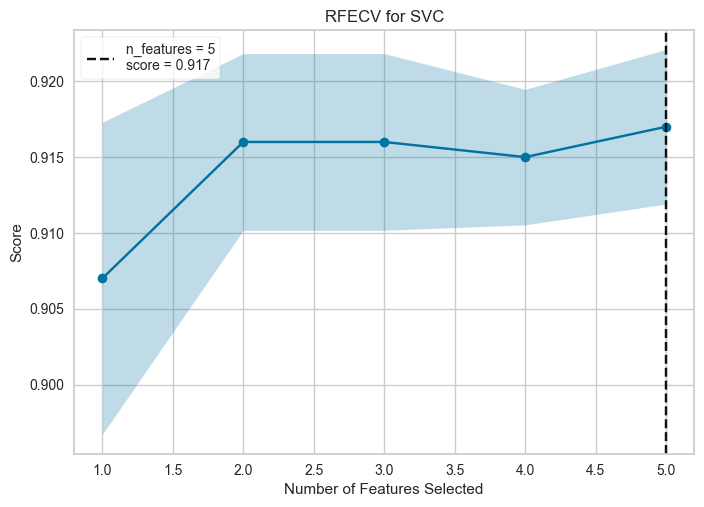

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [119]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=2, n_redundant=2,
    n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=0,
    )

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [120]:
# In this example we can see that 5 features were selected, though there doesn’t appear to be much improvement
# in the f1 score of the model after around 2 features.
# the curve jumps to an excellent accuracy when the three informative features are captured, 
# then gradually decreases in accuracy as the non informative features are added into the model.
# to find the optimal number of features cross-validation is used with RFE to score different feature subsets
# and select the best scoring collection of features.

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

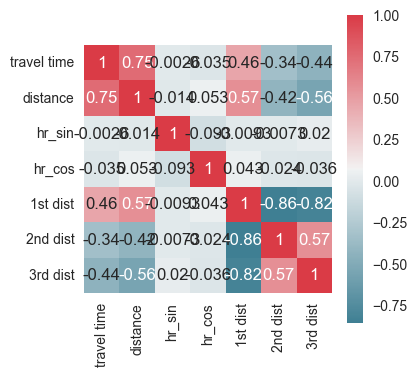

In [121]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(4,4))
corr = df7.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [122]:
x = np.array(df7[['distance','1st dist','2nd dist','3rd dist']])
y = np.array(df7['travel time'])
x

array([[0.57888295, 0.94207722, 0.0384379 , 0.01948487],
       [0.04896347, 0.32978142, 0.24769673, 0.23371714],
       [0.26845474, 0.8484496 , 0.07032717, 0.03622133],
       ...,
       [0.59311695, 0.9223731 , 0.06718749, 0.00808443],
       [0.5973016 , 0.91597878, 0.07490417, 0.00802838],
       [0.3923505 , 0.92943486, 0.07056514, 0.        ]])

In [123]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12582, 4)
(3146, 4)


In [125]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model6_1_1

Epoch 1/500
394/394 [==============================] - 1s 949us/step - loss: 842553.0625 - mape: 72.2847 - rmse: 917.9069 - val_loss: 211581.1250 - val_mape: 52.0222 - val_rmse: 459.9795
Epoch 2/500
394/394 [==============================] - 0s 800us/step - loss: 185664.5469 - mape: 54.1858 - rmse: 430.8881 - val_loss: 163503.1562 - val_mape: 50.7003 - val_rmse: 404.3552
Epoch 3/500
394/394 [==============================] - 0s 828us/step - loss: 156315.9688 - mape: 47.8288 - rmse: 395.3681 - val_loss: 138732.2031 - val_mape: 45.1185 - val_rmse: 372.4677
Epoch 4/500
394/394 [==============================] - 0s 798us/step - loss: 141144.4531 - mape: 42.5900 - rmse: 375.6920 - val_loss: 127816.8281 - val_mape: 39.1916 - val_rmse: 357.5148
Epoch 5/500
394/394 [==============================] - 0s 809us/step - loss: 134732.9062 - mape: 39.3661 - rmse: 367.0598 - val_loss: 123178.1094 - val_mape: 37.9089 - val_rmse: 350.9674
Epoch 6/500
394/394 [==============================] - 0s 814us/s

Epoch 45/500
394/394 [==============================] - 0s 850us/step - loss: 127852.0469 - mape: 35.3746 - rmse: 357.5641 - val_loss: 118731.2969 - val_mape: 34.0489 - val_rmse: 344.5741
Epoch 46/500
394/394 [==============================] - 0s 804us/step - loss: 127833.2578 - mape: 35.3166 - rmse: 357.5378 - val_loss: 119404.3984 - val_mape: 36.4310 - val_rmse: 345.5494
Epoch 47/500
394/394 [==============================] - 0s 802us/step - loss: 127736.3281 - mape: 35.3348 - rmse: 357.4022 - val_loss: 119165.0312 - val_mape: 36.2519 - val_rmse: 345.2029
Epoch 48/500
394/394 [==============================] - 0s 799us/step - loss: 127816.5547 - mape: 35.5455 - rmse: 357.5144 - val_loss: 118568.2109 - val_mape: 34.4638 - val_rmse: 344.3373
Epoch 49/500
394/394 [==============================] - 0s 801us/step - loss: 127735.6953 - mape: 35.3284 - rmse: 357.4013 - val_loss: 118647.3438 - val_mape: 35.0191 - val_rmse: 344.4522
Epoch 50/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 847us/step - loss: 127322.1250 - mape: 35.1676 - rmse: 356.8223 - val_loss: 118440.9922 - val_mape: 33.8464 - val_rmse: 344.1526
Epoch 132/500
394/394 [==============================] - 0s 802us/step - loss: 127414.3594 - mape: 35.2165 - rmse: 356.9515 - val_loss: 118274.3516 - val_mape: 34.3508 - val_rmse: 343.9104
Epoch 133/500
394/394 [==============================] - 0s 789us/step - loss: 127347.0391 - mape: 35.0719 - rmse: 356.8572 - val_loss: 118276.5703 - val_mape: 34.4258 - val_rmse: 343.9136
Epoch 134/500
394/394 [==============================] - 0s 847us/step - loss: 127403.0469 - mape: 35.1357 - rmse: 356.9356 - val_loss: 118278.6641 - val_mape: 34.3345 - val_rmse: 343.9167
Epoch 135/500
394/394 [==============================] - 0s 801us/step - loss: 127413.2500 - mape: 35.0592 - rmse: 356.9499 - val_loss: 118281.6562 - val_mape: 34.5465 - val_rmse: 343.9210
Epoch 136/500
394/394 [==============================] - 0s 799us/ste

394/394 [==============================] - 0s 836us/step - loss: 127400.1953 - mape: 35.1296 - rmse: 356.9316 - val_loss: 118253.7188 - val_mape: 34.3897 - val_rmse: 343.8804
Epoch 218/500
394/394 [==============================] - 0s 841us/step - loss: 127334.1328 - mape: 34.9316 - rmse: 356.8391 - val_loss: 118489.2266 - val_mape: 35.3149 - val_rmse: 344.2226
Epoch 219/500
394/394 [==============================] - 0s 816us/step - loss: 127348.5781 - mape: 35.0128 - rmse: 356.8593 - val_loss: 118327.5234 - val_mape: 34.7461 - val_rmse: 343.9877
Epoch 220/500
394/394 [==============================] - 0s 782us/step - loss: 127319.5625 - mape: 35.0869 - rmse: 356.8187 - val_loss: 118254.9219 - val_mape: 34.2191 - val_rmse: 343.8821
Epoch 221/500
394/394 [==============================] - 0s 814us/step - loss: 127237.8828 - mape: 35.0352 - rmse: 356.7042 - val_loss: 118285.6875 - val_mape: 34.1179 - val_rmse: 343.9268
Epoch 222/500
394/394 [==============================] - 0s 814us/ste

394/394 [==============================] - 0s 819us/step - loss: 127268.1250 - mape: 34.9284 - rmse: 356.7466 - val_loss: 118438.1250 - val_mape: 33.2387 - val_rmse: 344.1484
Epoch 304/500
394/394 [==============================] - 0s 794us/step - loss: 127349.4922 - mape: 35.1785 - rmse: 356.8606 - val_loss: 118685.0234 - val_mape: 32.6085 - val_rmse: 344.5069
Epoch 305/500
394/394 [==============================] - 0s 814us/step - loss: 127337.6562 - mape: 34.7845 - rmse: 356.8440 - val_loss: 118279.1328 - val_mape: 34.4329 - val_rmse: 343.9173
Epoch 306/500
394/394 [==============================] - 0s 798us/step - loss: 127328.1641 - mape: 35.1294 - rmse: 356.8307 - val_loss: 118253.8828 - val_mape: 34.0975 - val_rmse: 343.8806
Epoch 307/500
394/394 [==============================] - 0s 810us/step - loss: 127284.0469 - mape: 34.9411 - rmse: 356.7689 - val_loss: 118704.2812 - val_mape: 35.7236 - val_rmse: 344.5349
Epoch 308/500
394/394 [==============================] - 0s 795us/ste

394/394 [==============================] - 0s 792us/step - loss: 127359.1484 - mape: 34.9935 - rmse: 356.8741 - val_loss: 118270.3516 - val_mape: 34.1418 - val_rmse: 343.9046
Epoch 390/500
394/394 [==============================] - 0s 815us/step - loss: 127348.8906 - mape: 35.1228 - rmse: 356.8598 - val_loss: 119031.8359 - val_mape: 32.3163 - val_rmse: 345.0099
Epoch 391/500
394/394 [==============================] - 0s 789us/step - loss: 127376.8047 - mape: 34.7624 - rmse: 356.8989 - val_loss: 118504.7812 - val_mape: 35.3174 - val_rmse: 344.2452
Epoch 392/500
394/394 [==============================] - 0s 802us/step - loss: 127310.1797 - mape: 35.0718 - rmse: 356.8055 - val_loss: 119217.3359 - val_mape: 32.5390 - val_rmse: 345.2786
Epoch 393/500
394/394 [==============================] - 0s 789us/step - loss: 127386.5547 - mape: 35.1965 - rmse: 356.9125 - val_loss: 118255.0781 - val_mape: 34.3836 - val_rmse: 343.8824
Epoch 394/500
394/394 [==============================] - 0s 814us/ste

394/394 [==============================] - 0s 804us/step - loss: 127318.8047 - mape: 35.0016 - rmse: 356.8176 - val_loss: 118593.9609 - val_mape: 33.1022 - val_rmse: 344.3747
Epoch 476/500
394/394 [==============================] - 0s 795us/step - loss: 127356.4766 - mape: 35.0519 - rmse: 356.8704 - val_loss: 118516.4453 - val_mape: 35.3430 - val_rmse: 344.2622
Epoch 477/500
394/394 [==============================] - 0s 782us/step - loss: 127334.6875 - mape: 34.9608 - rmse: 356.8399 - val_loss: 118319.7422 - val_mape: 34.7689 - val_rmse: 343.9764
Epoch 478/500
394/394 [==============================] - 0s 795us/step - loss: 127352.3516 - mape: 34.8706 - rmse: 356.8646 - val_loss: 118526.0469 - val_mape: 35.3791 - val_rmse: 344.2761
Epoch 479/500
394/394 [==============================] - 0s 803us/step - loss: 127334.6797 - mape: 35.0851 - rmse: 356.8398 - val_loss: 118396.7656 - val_mape: 33.4791 - val_rmse: 344.0883
Epoch 480/500
394/394 [==============================] - 0s 799us/ste

In [126]:
# plotme(model6_1_1)

In [127]:
# inputs: distance + hour + 1st dist + 2nd dist + 3rd dist
model6_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model6_1_2

Epoch 1/500
394/394 [==============================] - 1s 1ms/step - loss: 619450.4375 - mape: 67.4691 - rmse: 787.0518 - val_loss: 181584.7188 - val_mape: 55.2027 - val_rmse: 426.1276
Epoch 2/500
394/394 [==============================] - 0s 867us/step - loss: 164697.7969 - mape: 50.1211 - rmse: 405.8298 - val_loss: 141527.4531 - val_mape: 45.9642 - val_rmse: 376.2014
Epoch 3/500
394/394 [==============================] - 0s 890us/step - loss: 141243.4062 - mape: 42.6233 - rmse: 375.8236 - val_loss: 126552.4844 - val_mape: 38.7331 - val_rmse: 355.7422
Epoch 4/500
394/394 [==============================] - 0s 865us/step - loss: 133342.6562 - mape: 38.7213 - rmse: 365.1611 - val_loss: 122077.9141 - val_mape: 36.4740 - val_rmse: 349.3965
Epoch 5/500
394/394 [==============================] - 0s 862us/step - loss: 130794.2891 - mape: 37.3362 - rmse: 361.6549 - val_loss: 121491.9062 - val_mape: 37.9371 - val_rmse: 348.5569
Epoch 6/500
394/394 [==============================] - 0s 890us/ste

Epoch 45/500
394/394 [==============================] - 0s 874us/step - loss: 129556.9297 - mape: 36.0855 - rmse: 359.9402 - val_loss: 120442.2969 - val_mape: 35.7982 - val_rmse: 347.0480
Epoch 46/500
394/394 [==============================] - 0s 864us/step - loss: 129575.3125 - mape: 36.5678 - rmse: 359.9657 - val_loss: 120267.3203 - val_mape: 35.0416 - val_rmse: 346.7958
Epoch 47/500
394/394 [==============================] - 0s 884us/step - loss: 129577.4062 - mape: 36.1465 - rmse: 359.9686 - val_loss: 120426.8828 - val_mape: 36.1571 - val_rmse: 347.0258
Epoch 48/500
394/394 [==============================] - 0s 888us/step - loss: 129668.1172 - mape: 36.3731 - rmse: 360.0946 - val_loss: 120357.1797 - val_mape: 34.7311 - val_rmse: 346.9253
Epoch 49/500
394/394 [==============================] - 0s 890us/step - loss: 129583.8438 - mape: 36.2502 - rmse: 359.9776 - val_loss: 120306.2812 - val_mape: 35.3958 - val_rmse: 346.8520
Epoch 50/500
394/394 [==============================] - 0s 8

394/394 [==============================] - 0s 883us/step - loss: 129526.2422 - mape: 36.2683 - rmse: 359.8976 - val_loss: 120261.1484 - val_mape: 35.1926 - val_rmse: 346.7869
Epoch 132/500
394/394 [==============================] - 0s 864us/step - loss: 129640.7109 - mape: 36.3695 - rmse: 360.0565 - val_loss: 120416.4688 - val_mape: 36.0585 - val_rmse: 347.0108
Epoch 133/500
394/394 [==============================] - 0s 882us/step - loss: 129584.8750 - mape: 36.2501 - rmse: 359.9790 - val_loss: 120337.1875 - val_mape: 35.8581 - val_rmse: 346.8965
Epoch 134/500
394/394 [==============================] - 0s 884us/step - loss: 129467.3984 - mape: 36.2280 - rmse: 359.8158 - val_loss: 120309.9531 - val_mape: 35.5177 - val_rmse: 346.8572
Epoch 135/500
394/394 [==============================] - 0s 881us/step - loss: 129544.2188 - mape: 36.4162 - rmse: 359.9225 - val_loss: 120321.9297 - val_mape: 34.9932 - val_rmse: 346.8745
Epoch 136/500
394/394 [==============================] - 0s 865us/ste

394/394 [==============================] - 0s 886us/step - loss: 129627.2109 - mape: 36.1710 - rmse: 360.0378 - val_loss: 120347.3203 - val_mape: 35.4103 - val_rmse: 346.9111
Epoch 218/500
394/394 [==============================] - 0s 891us/step - loss: 129580.2500 - mape: 36.4984 - rmse: 359.9726 - val_loss: 120260.2344 - val_mape: 34.9264 - val_rmse: 346.7856
Epoch 219/500
394/394 [==============================] - 0s 891us/step - loss: 129532.8984 - mape: 36.0865 - rmse: 359.9068 - val_loss: 120336.6641 - val_mape: 35.4257 - val_rmse: 346.8958
Epoch 220/500
394/394 [==============================] - 0s 874us/step - loss: 129586.5625 - mape: 36.3120 - rmse: 359.9813 - val_loss: 120304.7109 - val_mape: 35.2679 - val_rmse: 346.8497
Epoch 221/500
394/394 [==============================] - 0s 874us/step - loss: 129618.2031 - mape: 36.3117 - rmse: 360.0253 - val_loss: 120474.2188 - val_mape: 36.2374 - val_rmse: 347.0940
Epoch 222/500
394/394 [==============================] - 0s 874us/ste

394/394 [==============================] - 0s 857us/step - loss: 129436.0469 - mape: 36.1885 - rmse: 359.7722 - val_loss: 120291.3906 - val_mape: 35.4865 - val_rmse: 346.8305
Epoch 304/500
394/394 [==============================] - 0s 859us/step - loss: 129520.7109 - mape: 36.2740 - rmse: 359.8899 - val_loss: 120482.8047 - val_mape: 36.3092 - val_rmse: 347.1063
Epoch 305/500
394/394 [==============================] - 0s 845us/step - loss: 129528.8281 - mape: 36.2086 - rmse: 359.9011 - val_loss: 120386.9688 - val_mape: 35.2344 - val_rmse: 346.9683
Epoch 306/500
394/394 [==============================] - 0s 858us/step - loss: 129469.2656 - mape: 36.1432 - rmse: 359.8184 - val_loss: 121552.6328 - val_mape: 37.9592 - val_rmse: 348.6440
Epoch 307/500
394/394 [==============================] - 0s 860us/step - loss: 129451.0938 - mape: 36.4680 - rmse: 359.7931 - val_loss: 120380.3594 - val_mape: 35.9813 - val_rmse: 346.9587
Epoch 308/500
394/394 [==============================] - 0s 860us/ste

394/394 [==============================] - 0s 890us/step - loss: 129531.9297 - mape: 36.3335 - rmse: 359.9055 - val_loss: 120320.9453 - val_mape: 35.6302 - val_rmse: 346.8731
Epoch 390/500
394/394 [==============================] - 0s 891us/step - loss: 129581.6875 - mape: 36.3630 - rmse: 359.9746 - val_loss: 120375.6172 - val_mape: 34.7944 - val_rmse: 346.9519
Epoch 391/500
394/394 [==============================] - 0s 855us/step - loss: 129587.8438 - mape: 36.1632 - rmse: 359.9831 - val_loss: 120318.1406 - val_mape: 35.7156 - val_rmse: 346.8690
Epoch 392/500
394/394 [==============================] - 0s 885us/step - loss: 129565.4531 - mape: 36.3326 - rmse: 359.9520 - val_loss: 120354.8203 - val_mape: 35.8900 - val_rmse: 346.9219
Epoch 393/500
394/394 [==============================] - 0s 868us/step - loss: 129573.3672 - mape: 36.1828 - rmse: 359.9630 - val_loss: 120331.6172 - val_mape: 35.8769 - val_rmse: 346.8885
Epoch 394/500
394/394 [==============================] - 0s 902us/ste

394/394 [==============================] - 0s 874us/step - loss: 129435.5625 - mape: 36.1732 - rmse: 359.7715 - val_loss: 120284.2266 - val_mape: 35.4921 - val_rmse: 346.8202
Epoch 476/500
394/394 [==============================] - 0s 880us/step - loss: 129568.2500 - mape: 36.2528 - rmse: 359.9559 - val_loss: 120314.8750 - val_mape: 35.6172 - val_rmse: 346.8643
Epoch 477/500
394/394 [==============================] - 0s 869us/step - loss: 129574.0078 - mape: 36.2188 - rmse: 359.9639 - val_loss: 120291.2422 - val_mape: 35.2878 - val_rmse: 346.8303
Epoch 478/500
394/394 [==============================] - 0s 873us/step - loss: 129658.4375 - mape: 36.1860 - rmse: 360.0811 - val_loss: 120398.0547 - val_mape: 34.9745 - val_rmse: 346.9842
Epoch 479/500
394/394 [==============================] - 0s 878us/step - loss: 129459.6094 - mape: 36.3677 - rmse: 359.8050 - val_loss: 120517.1875 - val_mape: 34.5436 - val_rmse: 347.1559
Epoch 480/500
394/394 [==============================] - 0s 876us/ste

In [128]:
194.6574/60

3.24429

In [129]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model6_1_3

Epoch 1/500
394/394 [==============================] - 0s 874us/step - loss: 1283329.7500 - mape: 98.8004 - rmse: 1132.8414 - val_loss: 1279928.5000 - val_mape: 96.5748 - val_rmse: 1131.3392
Epoch 2/500
394/394 [==============================] - 0s 758us/step - loss: 1182657.3750 - mape: 92.1791 - rmse: 1087.5005 - val_loss: 1132014.1250 - val_mape: 86.8184 - val_rmse: 1063.9615
Epoch 3/500
394/394 [==============================] - 0s 750us/step - loss: 1005879.2500 - mape: 79.6796 - rmse: 1002.9353 - val_loss: 925210.6250 - val_mape: 71.9546 - val_rmse: 961.8787
Epoch 4/500
394/394 [==============================] - 0s 751us/step - loss: 794438.1250 - mape: 63.6225 - rmse: 891.3126 - val_loss: 707317.0000 - val_mape: 55.8438 - val_rmse: 841.0214
Epoch 5/500
394/394 [==============================] - 0s 739us/step - loss: 592377.0625 - mape: 49.6171 - rmse: 769.6603 - val_loss: 515811.7188 - val_mape: 45.8524 - val_rmse: 718.2003
Epoch 6/500
394/394 [==============================] - 

Epoch 88/500
394/394 [==============================] - 0s 736us/step - loss: 128103.6875 - mape: 35.7650 - rmse: 357.9157 - val_loss: 119013.4453 - val_mape: 35.1508 - val_rmse: 344.9832
Epoch 89/500
394/394 [==============================] - 0s 755us/step - loss: 128087.4375 - mape: 35.8239 - rmse: 357.8931 - val_loss: 119010.3672 - val_mape: 35.2332 - val_rmse: 344.9788
Epoch 90/500
394/394 [==============================] - 0s 737us/step - loss: 128077.7656 - mape: 35.7878 - rmse: 357.8795 - val_loss: 118986.7500 - val_mape: 35.0484 - val_rmse: 344.9445
Epoch 91/500
394/394 [==============================] - 0s 731us/step - loss: 128078.7578 - mape: 35.8072 - rmse: 357.8809 - val_loss: 118979.5469 - val_mape: 35.0772 - val_rmse: 344.9341
Epoch 92/500
394/394 [==============================] - 0s 736us/step - loss: 128064.6094 - mape: 35.7524 - rmse: 357.8611 - val_loss: 118982.1094 - val_mape: 35.1725 - val_rmse: 344.9378
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 712us/step - loss: 127626.7188 - mape: 35.2044 - rmse: 357.2488 - val_loss: 118679.1406 - val_mape: 35.0396 - val_rmse: 344.4984
Epoch 175/500
394/394 [==============================] - 0s 700us/step - loss: 127632.2578 - mape: 35.4850 - rmse: 357.2566 - val_loss: 118636.2891 - val_mape: 34.7535 - val_rmse: 344.4362
Epoch 176/500
394/394 [==============================] - 0s 720us/step - loss: 127616.6797 - mape: 35.2497 - rmse: 357.2348 - val_loss: 118664.7266 - val_mape: 34.9762 - val_rmse: 344.4775
Epoch 177/500
394/394 [==============================] - 0s 725us/step - loss: 127608.0234 - mape: 35.5696 - rmse: 357.2227 - val_loss: 118622.6094 - val_mape: 34.5134 - val_rmse: 344.4163
Epoch 178/500
394/394 [==============================] - 0s 728us/step - loss: 127612.9375 - mape: 35.3111 - rmse: 357.2295 - val_loss: 118626.6641 - val_mape: 34.5989 - val_rmse: 344.4222
Epoch 179/500
394/394 [==============================] - 0s 721us/ste

394/394 [==============================] - 0s 721us/step - loss: 127461.6719 - mape: 35.1235 - rmse: 357.0178 - val_loss: 118500.2812 - val_mape: 34.5324 - val_rmse: 344.2387
Epoch 261/500
394/394 [==============================] - 0s 723us/step - loss: 127448.5781 - mape: 35.1729 - rmse: 356.9994 - val_loss: 118492.1328 - val_mape: 34.3587 - val_rmse: 344.2269
Epoch 262/500
394/394 [==============================] - 0s 703us/step - loss: 127448.9688 - mape: 35.0290 - rmse: 357.0000 - val_loss: 118531.3906 - val_mape: 34.7957 - val_rmse: 344.2839
Epoch 263/500
394/394 [==============================] - 0s 728us/step - loss: 127442.8984 - mape: 35.3628 - rmse: 356.9915 - val_loss: 118499.8047 - val_mape: 34.3506 - val_rmse: 344.2380
Epoch 264/500
394/394 [==============================] - 0s 702us/step - loss: 127438.2188 - mape: 35.2311 - rmse: 356.9849 - val_loss: 118500.5391 - val_mape: 34.2914 - val_rmse: 344.2391
Epoch 265/500
394/394 [==============================] - 0s 706us/ste

394/394 [==============================] - 0s 695us/step - loss: 127403.6953 - mape: 35.1341 - rmse: 356.9366 - val_loss: 118463.9688 - val_mape: 34.6076 - val_rmse: 344.1859
Epoch 347/500
394/394 [==============================] - 0s 713us/step - loss: 127381.5234 - mape: 35.0920 - rmse: 356.9055 - val_loss: 118504.1094 - val_mape: 34.8631 - val_rmse: 344.2443
Epoch 348/500
394/394 [==============================] - 0s 700us/step - loss: 127378.2109 - mape: 35.1730 - rmse: 356.9008 - val_loss: 118458.4141 - val_mape: 34.5869 - val_rmse: 344.1779
Epoch 349/500
394/394 [==============================] - 0s 737us/step - loss: 127354.0000 - mape: 35.2759 - rmse: 356.8669 - val_loss: 118455.1641 - val_mape: 34.1043 - val_rmse: 344.1732
Epoch 350/500
394/394 [==============================] - 0s 727us/step - loss: 127377.3359 - mape: 34.9995 - rmse: 356.8996 - val_loss: 118479.3203 - val_mape: 34.7324 - val_rmse: 344.2083
Epoch 351/500
394/394 [==============================] - 0s 742us/ste

394/394 [==============================] - 0s 754us/step - loss: 127332.5938 - mape: 35.0717 - rmse: 356.8369 - val_loss: 118374.0703 - val_mape: 34.4010 - val_rmse: 344.0553
Epoch 433/500
394/394 [==============================] - 0s 723us/step - loss: 127330.7109 - mape: 35.0668 - rmse: 356.8343 - val_loss: 118400.7109 - val_mape: 34.6538 - val_rmse: 344.0941
Epoch 434/500
394/394 [==============================] - 0s 709us/step - loss: 127326.8984 - mape: 35.1086 - rmse: 356.8289 - val_loss: 118399.7344 - val_mape: 34.6378 - val_rmse: 344.0926
Epoch 435/500
394/394 [==============================] - 0s 714us/step - loss: 127328.0547 - mape: 35.0859 - rmse: 356.8306 - val_loss: 118381.3828 - val_mape: 34.5366 - val_rmse: 344.0659
Epoch 436/500
394/394 [==============================] - 0s 763us/step - loss: 127337.0391 - mape: 35.1203 - rmse: 356.8432 - val_loss: 118375.8594 - val_mape: 34.4792 - val_rmse: 344.0579
Epoch 437/500
394/394 [==============================] - 0s 709us/ste

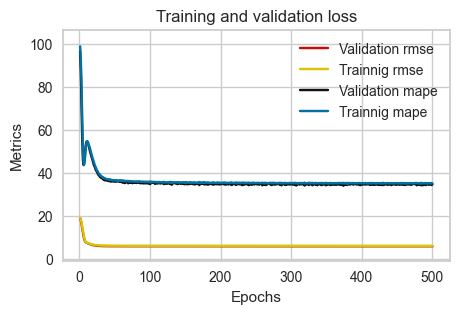

In [130]:
plotme(model6_1_3)

In [131]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model6_1_4

Epoch 1/500
394/394 [==============================] - 1s 890us/step - loss: 1294279.1250 - mape: 99.5040 - rmse: 1137.6639 - val_loss: 1315246.7500 - val_mape: 98.7724 - val_rmse: 1146.8420
Epoch 2/500
394/394 [==============================] - 0s 757us/step - loss: 1264343.0000 - mape: 97.5538 - rmse: 1124.4301 - val_loss: 1273662.6250 - val_mape: 96.1246 - val_rmse: 1128.5667
Epoch 3/500
394/394 [==============================] - 0s 736us/step - loss: 1213975.2500 - mape: 94.2125 - rmse: 1101.8054 - val_loss: 1213066.3750 - val_mape: 92.1786 - val_rmse: 1101.3929
Epoch 4/500
394/394 [==============================] - 0s 745us/step - loss: 1147102.2500 - mape: 89.6895 - rmse: 1071.0286 - val_loss: 1137713.7500 - val_mape: 87.1082 - val_rmse: 1066.6366
Epoch 5/500
394/394 [==============================] - 0s 736us/step - loss: 1068069.3750 - mape: 84.1022 - rmse: 1033.4744 - val_loss: 1052248.8750 - val_mape: 81.1070 - val_rmse: 1025.7919
Epoch 6/500
394/394 [========================

Epoch 88/500
394/394 [==============================] - 0s 717us/step - loss: 130145.9453 - mape: 36.8524 - rmse: 360.7574 - val_loss: 120789.0469 - val_mape: 36.4882 - val_rmse: 347.5472
Epoch 89/500
394/394 [==============================] - 0s 728us/step - loss: 130100.8594 - mape: 37.0594 - rmse: 360.6950 - val_loss: 120733.3750 - val_mape: 36.3072 - val_rmse: 347.4671
Epoch 90/500
394/394 [==============================] - 0s 709us/step - loss: 130053.5547 - mape: 36.9464 - rmse: 360.6294 - val_loss: 120688.6641 - val_mape: 36.2032 - val_rmse: 347.4027
Epoch 91/500
394/394 [==============================] - 0s 734us/step - loss: 130008.3516 - mape: 36.8462 - rmse: 360.5667 - val_loss: 120659.9844 - val_mape: 36.2386 - val_rmse: 347.3615
Epoch 92/500
394/394 [==============================] - 0s 728us/step - loss: 129962.0469 - mape: 36.8817 - rmse: 360.5025 - val_loss: 120630.9688 - val_mape: 36.2200 - val_rmse: 347.3197
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 750us/step - loss: 129329.1484 - mape: 36.4385 - rmse: 359.6236 - val_loss: 120324.4141 - val_mape: 35.5639 - val_rmse: 346.8781
Epoch 175/500
394/394 [==============================] - 0s 727us/step - loss: 129337.6484 - mape: 36.1037 - rmse: 359.6354 - val_loss: 120344.9141 - val_mape: 35.7722 - val_rmse: 346.9077
Epoch 176/500
394/394 [==============================] - 0s 726us/step - loss: 129337.5078 - mape: 36.2920 - rmse: 359.6353 - val_loss: 120336.4453 - val_mape: 35.6931 - val_rmse: 346.8954
Epoch 177/500
394/394 [==============================] - 0s 775us/step - loss: 129338.9219 - mape: 36.2203 - rmse: 359.6372 - val_loss: 120345.0938 - val_mape: 35.7626 - val_rmse: 346.9079
Epoch 178/500
394/394 [==============================] - 0s 725us/step - loss: 129339.7188 - mape: 36.3166 - rmse: 359.6383 - val_loss: 120333.6406 - val_mape: 35.6742 - val_rmse: 346.8914
Epoch 179/500
394/394 [==============================] - 0s 709us/ste

394/394 [==============================] - 0s 733us/step - loss: 129327.7656 - mape: 36.0975 - rmse: 359.6217 - val_loss: 120339.4375 - val_mape: 35.7404 - val_rmse: 346.8997
Epoch 261/500
394/394 [==============================] - 0s 725us/step - loss: 129327.1094 - mape: 36.2622 - rmse: 359.6208 - val_loss: 120340.2891 - val_mape: 35.7508 - val_rmse: 346.9010
Epoch 262/500
394/394 [==============================] - 0s 739us/step - loss: 129322.8828 - mape: 36.1997 - rmse: 359.6149 - val_loss: 120342.6641 - val_mape: 35.7694 - val_rmse: 346.9044
Epoch 263/500
394/394 [==============================] - 0s 737us/step - loss: 129329.3828 - mape: 36.2847 - rmse: 359.6239 - val_loss: 120340.2500 - val_mape: 35.7528 - val_rmse: 346.9009
Epoch 264/500
394/394 [==============================] - 0s 733us/step - loss: 129321.8516 - mape: 36.1246 - rmse: 359.6135 - val_loss: 120356.2109 - val_mape: 35.8470 - val_rmse: 346.9239
Epoch 265/500
394/394 [==============================] - 0s 720us/ste

394/394 [==============================] - 0s 739us/step - loss: 129321.5078 - mape: 36.2280 - rmse: 359.6130 - val_loss: 120335.5156 - val_mape: 35.7621 - val_rmse: 346.8941
Epoch 347/500
394/394 [==============================] - 0s 740us/step - loss: 129320.8672 - mape: 36.3594 - rmse: 359.6121 - val_loss: 120324.2891 - val_mape: 35.6878 - val_rmse: 346.8779
Epoch 348/500
394/394 [==============================] - 0s 725us/step - loss: 129323.5078 - mape: 36.1102 - rmse: 359.6158 - val_loss: 120334.2031 - val_mape: 35.7592 - val_rmse: 346.8922
Epoch 349/500
394/394 [==============================] - 0s 713us/step - loss: 129321.1797 - mape: 36.2657 - rmse: 359.6125 - val_loss: 120327.1875 - val_mape: 35.7180 - val_rmse: 346.8821
Epoch 350/500
394/394 [==============================] - 0s 742us/step - loss: 129319.8281 - mape: 36.3074 - rmse: 359.6107 - val_loss: 120318.1484 - val_mape: 35.6375 - val_rmse: 346.8691
Epoch 351/500
394/394 [==============================] - 0s 730us/ste

394/394 [==============================] - 0s 738us/step - loss: 129316.4844 - mape: 36.2454 - rmse: 359.6060 - val_loss: 120324.0078 - val_mape: 35.6945 - val_rmse: 346.8775
Epoch 433/500
394/394 [==============================] - 0s 738us/step - loss: 129309.6328 - mape: 36.1200 - rmse: 359.5965 - val_loss: 120340.6484 - val_mape: 35.8108 - val_rmse: 346.9015
Epoch 434/500
394/394 [==============================] - 0s 733us/step - loss: 129332.4297 - mape: 36.3251 - rmse: 359.6282 - val_loss: 120319.3828 - val_mape: 35.6693 - val_rmse: 346.8708
Epoch 435/500
394/394 [==============================] - 0s 727us/step - loss: 129311.5078 - mape: 36.3725 - rmse: 359.5991 - val_loss: 120307.3281 - val_mape: 35.5188 - val_rmse: 346.8535
Epoch 436/500
394/394 [==============================] - 0s 734us/step - loss: 129328.3047 - mape: 36.1365 - rmse: 359.6224 - val_loss: 120317.9766 - val_mape: 35.6568 - val_rmse: 346.8688
Epoch 437/500
394/394 [==============================] - 0s 732us/ste

In [132]:
# inputs: distance + 1st dist + 2nd dist + 3rd dist
model6_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model6_1_5

Epoch 1/500
394/394 [==============================] - 0s 865us/step - loss: 1272123.3750 - mape: 98.0867 - rmse: 1127.8845 - val_loss: 1244893.7500 - val_mape: 94.3120 - val_rmse: 1115.7480
Epoch 2/500
394/394 [==============================] - 0s 738us/step - loss: 1106368.5000 - mape: 86.8470 - rmse: 1051.8406 - val_loss: 1006604.6875 - val_mape: 77.9076 - val_rmse: 1003.2969
Epoch 3/500
394/394 [==============================] - 0s 753us/step - loss: 840406.5625 - mape: 67.2211 - rmse: 916.7369 - val_loss: 718375.6250 - val_mape: 56.5948 - val_rmse: 847.5704
Epoch 4/500
394/394 [==============================] - 0s 738us/step - loss: 573443.5000 - mape: 48.8986 - rmse: 757.2605 - val_loss: 471120.1875 - val_mape: 44.5715 - val_rmse: 686.3820
Epoch 5/500
394/394 [==============================] - 0s 739us/step - loss: 374049.5000 - mape: 43.3164 - rmse: 611.5959 - val_loss: 310758.0938 - val_mape: 44.5747 - val_rmse: 557.4568
Epoch 6/500
394/394 [==============================] - 0s

Epoch 88/500
394/394 [==============================] - 0s 734us/step - loss: 127757.6953 - mape: 35.5886 - rmse: 357.4321 - val_loss: 118726.0078 - val_mape: 35.1245 - val_rmse: 344.5664
Epoch 89/500
394/394 [==============================] - 0s 735us/step - loss: 127751.7656 - mape: 35.4226 - rmse: 357.4238 - val_loss: 118777.7109 - val_mape: 35.3690 - val_rmse: 344.6414
Epoch 90/500
394/394 [==============================] - 0s 761us/step - loss: 127739.6875 - mape: 35.5895 - rmse: 357.4069 - val_loss: 118690.7891 - val_mape: 34.8384 - val_rmse: 344.5153
Epoch 91/500
394/394 [==============================] - 0s 732us/step - loss: 127705.8906 - mape: 35.5918 - rmse: 357.3596 - val_loss: 118687.1953 - val_mape: 34.4391 - val_rmse: 344.5101
Epoch 92/500
394/394 [==============================] - 0s 751us/step - loss: 127732.6953 - mape: 35.4951 - rmse: 357.3971 - val_loss: 118680.2891 - val_mape: 34.5482 - val_rmse: 344.5001
Epoch 93/500
394/394 [==============================] - 0s 7

394/394 [==============================] - 0s 732us/step - loss: 127449.3516 - mape: 35.2575 - rmse: 357.0005 - val_loss: 118483.1094 - val_mape: 34.4973 - val_rmse: 344.2137
Epoch 175/500
394/394 [==============================] - 0s 736us/step - loss: 127451.3984 - mape: 35.1833 - rmse: 357.0034 - val_loss: 118501.5469 - val_mape: 34.7267 - val_rmse: 344.2405
Epoch 176/500
394/394 [==============================] - 0s 738us/step - loss: 127470.7656 - mape: 35.2910 - rmse: 357.0305 - val_loss: 118466.7656 - val_mape: 34.2897 - val_rmse: 344.1900
Epoch 177/500
394/394 [==============================] - 0s 723us/step - loss: 127438.1172 - mape: 35.0360 - rmse: 356.9848 - val_loss: 118512.6484 - val_mape: 34.8172 - val_rmse: 344.2567
Epoch 178/500
394/394 [==============================] - 0s 735us/step - loss: 127443.4688 - mape: 35.2053 - rmse: 356.9922 - val_loss: 118474.8750 - val_mape: 34.4965 - val_rmse: 344.2018
Epoch 179/500
394/394 [==============================] - 0s 731us/ste

394/394 [==============================] - 0s 737us/step - loss: 127364.1094 - mape: 35.0017 - rmse: 356.8811 - val_loss: 118426.4453 - val_mape: 34.5912 - val_rmse: 344.1314
Epoch 261/500
394/394 [==============================] - 0s 749us/step - loss: 127342.4375 - mape: 35.0454 - rmse: 356.8507 - val_loss: 118504.1094 - val_mape: 35.0009 - val_rmse: 344.2443
Epoch 262/500
394/394 [==============================] - 0s 746us/step - loss: 127351.2422 - mape: 35.2371 - rmse: 356.8631 - val_loss: 118418.7656 - val_mape: 34.2728 - val_rmse: 344.1203
Epoch 263/500
394/394 [==============================] - 0s 751us/step - loss: 127333.4297 - mape: 34.9517 - rmse: 356.8381 - val_loss: 118524.2188 - val_mape: 35.0792 - val_rmse: 344.2735
Epoch 264/500
394/394 [==============================] - 0s 735us/step - loss: 127341.1484 - mape: 35.1996 - rmse: 356.8489 - val_loss: 118435.6406 - val_mape: 34.6714 - val_rmse: 344.1448
Epoch 265/500
394/394 [==============================] - 0s 725us/ste

394/394 [==============================] - 0s 761us/step - loss: 127313.8984 - mape: 35.2697 - rmse: 356.8107 - val_loss: 118361.0547 - val_mape: 34.3124 - val_rmse: 344.0364
Epoch 347/500
394/394 [==============================] - 0s 747us/step - loss: 127294.0156 - mape: 34.9952 - rmse: 356.7829 - val_loss: 118463.7344 - val_mape: 34.9874 - val_rmse: 344.1856
Epoch 348/500
394/394 [==============================] - 0s 760us/step - loss: 127297.8438 - mape: 35.0630 - rmse: 356.7882 - val_loss: 118405.4297 - val_mape: 34.7303 - val_rmse: 344.1009
Epoch 349/500
394/394 [==============================] - 0s 754us/step - loss: 127293.1953 - mape: 35.1127 - rmse: 356.7817 - val_loss: 118373.5469 - val_mape: 34.4706 - val_rmse: 344.0546
Epoch 350/500
394/394 [==============================] - 0s 734us/step - loss: 127287.3359 - mape: 35.0290 - rmse: 356.7735 - val_loss: 118399.0859 - val_mape: 34.6876 - val_rmse: 344.0917
Epoch 351/500
394/394 [==============================] - 0s 740us/ste

394/394 [==============================] - 0s 763us/step - loss: 127253.5078 - mape: 35.0852 - rmse: 356.7261 - val_loss: 118336.7422 - val_mape: 34.4635 - val_rmse: 344.0011
Epoch 433/500
394/394 [==============================] - 0s 752us/step - loss: 127238.8438 - mape: 34.9943 - rmse: 356.7055 - val_loss: 118356.7422 - val_mape: 34.6476 - val_rmse: 344.0302
Epoch 434/500
394/394 [==============================] - 0s 764us/step - loss: 127230.8203 - mape: 34.9542 - rmse: 356.6943 - val_loss: 118404.0000 - val_mape: 34.9005 - val_rmse: 344.0988
Epoch 435/500
394/394 [==============================] - 0s 751us/step - loss: 127251.1250 - mape: 35.2226 - rmse: 356.7227 - val_loss: 118339.8984 - val_mape: 34.4931 - val_rmse: 344.0057
Epoch 436/500
394/394 [==============================] - 0s 751us/step - loss: 127251.9062 - mape: 35.0275 - rmse: 356.7238 - val_loss: 118343.2656 - val_mape: 34.5447 - val_rmse: 344.0106
Epoch 437/500
394/394 [==============================] - 0s 741us/ste

## sub-problem 7:  **input: distance & hour & all roadtypes with real distance**

In [133]:
df8 = dff.iloc[:,:].copy()
df8 = df8.drop(['hour of day'], axis=1)
df8.head(20)

travel time  distance  living_street  motorway  motorway_link    primary  \
0          1163  0.140212            0.0       0.0            0.0  20416.446   
1           347  0.011859            0.0       0.0            0.0    386.602   
2           720  0.065023            0.0       0.0            0.0   8633.723   
3           355  0.013758            0.0       0.0            0.0    386.602   
4           356  0.018635            0.0       0.0            0.0    291.863   
5           362  0.007093            0.0       0.0            0.0    222.157   
6           457  0.035124            0.0       0.0            0.0   3162.342   
7          1590  0.226319            0.0       0.0            0.0  32858.317   
8          1720  0.201430            0.0       0.0            0.0  28328.731   
9           656  0.019006            0.0       0.0            0.0   1794.717   
10          402  0.036492            0.0       0.0            0.0   1031.740   
11         1234  0.020701            0.0       0.0            0.0    291.863   
12         1046  0.041300            0.0       0.0            0.0   1794.658   
13          366  0.020819            0.0       0.0            0.0    386.602   
14         1212  0.046539            0.0       0.0            0.0   2338.434   
15          404  0.026655            0.0       0.0            0.0    386.602   
16         1055  0.000011            0.0       0.0            0.0      0.000   
17          354  0.017003            0.0       0.0            0.0   1147.912   
18          247  0.012715            0.0       0.0            0.0    291.863   
19          770  0.036535            0.0       0.0            0.0    291.863   

    primary_link  residential  road  secondary  secondary_link  service  \
0          0.000      422.271   0.0      0.000             0.0  833.016   
1          0.000      478.566   0.0      0.000             0.0  675.270   
2          0.000      179.300   0.0      0.000             0.0  278.634   
3          0.000      194.331   0.0      0.000             0.0  684.440   
4        228.532     1084.292   0.0      0.000             0.0  644.164   
5          0.000      871.822   0.0      0.000             0.0  180.294   
6         57.469     2340.268   0.0      0.000             0.0    0.000   
7          0.000       81.136   0.0   1770.293             0.0  127.126   
8        680.733     1332.292   0.0      0.000             0.0  587.253   
9        344.024       81.136   0.0      0.000             0.0  188.852   
10         0.000       98.164   0.0      0.000             0.0  520.548   
11       229.960     1818.954   0.0      0.000             0.0  773.088   
12       152.983     1361.907   0.0      0.000             0.0  995.498   
13         0.000      933.643   0.0      0.000             0.0  503.306   
14       152.983     1707.701   0.0      0.000             0.0  906.878   
15         0.000     1496.281   0.0      0.000             0.0  833.016   
16         0.000      138.459   0.0      0.000             0.0   65.488   
17         0.000     1686.152   0.0      0.000             0.0    0.000   
18       229.960      341.135   0.0      0.000             0.0  485.776   
19       229.960      856.410   0.0      0.000             0.0  470.432   

    tertiary  track  trunk  trunk_link  unclassified  others  
0      0.000    0.0    0.0         0.0         0.000     0.0  
1      0.000    0.0    0.0         0.0       507.191     0.0  
2    368.584    0.0    0.0         0.0       715.641     0.0  
3      0.000    0.0    0.0         0.0      1072.578     0.0  
4      0.000    0.0    0.0         0.0       834.774     0.0  
5     44.532    0.0    0.0         0.0         0.000     0.0  
6     44.532    0.0    0.0         0.0         0.000     0.0  
7      0.000    0.0    0.0         0.0         0.000     0.0  
8      0.000    0.0    0.0         0.0       102.520     0.0  
9    425.623    0.0    0.0         0.0       305.970     0.0  
10  4163.346    0.0    0.0         0.0         0.000  

In [134]:
# Normalize using Min/Max Normalization.
normalize=(df8['living_street']-df8['living_street'].min())/(df8['living_street'].max()-df8['living_street'].min())
df8['living_street'] = normalize
normalize=(df8['motorway']-df8['motorway'].min())/(df8['motorway'].max()-df8['motorway'].min())
df8['motorway'] = normalize
normalize=(df8['motorway_link']-df8['motorway_link'].min())/(df8['motorway_link'].max()-df8['motorway_link'].min())
df8['motorway_link'] = normalize
normalize=(df8['primary']-df8['primary'].min())/(df8['primary'].max()-df8['primary'].min())
df8['primary'] = normalize
normalize=(df8['primary_link']-df8['primary_link'].min())/(df8['primary_link'].max()-df8['primary_link'].min())
df8['primary_link'] = normalize
normalize=(df8['residential']-df8['residential'].min())/(df8['residential'].max()-df8['residential'].min())
df8['residential'] = normalize
normalize=(df8['road']-df8['road'].min())/(df8['road'].max()-df8['road'].min())
df8['road'] = normalize
normalize=(df8['secondary']-df8['secondary'].min())/(df8['secondary'].max()-df8['secondary'].min())
df8['secondary'] = normalize
normalize=(df8['secondary_link']-df8['secondary_link'].min())/(df8['secondary_link'].max()-df8['secondary_link'].min())
df8['secondary_link'] = normalize
normalize=(df8['service']-df8['service'].min())/(df8['service'].max()-df8['service'].min())
df8['service'] = normalize
normalize=(df8['tertiary']-df8['tertiary'].min())/(df8['tertiary'].max()-df8['tertiary'].min())
df8['tertiary'] = normalize
normalize=(df8['track']-df8['track'].min())/(df8['track'].max()-df8['track'].min())
df8['track'] = normalize
normalize=(df8['trunk']-df8['trunk'].min())/(df8['trunk'].max()-df8['trunk'].min())
df8['trunk'] = normalize
normalize=(df8['trunk_link']-df8['trunk_link'].min())/(df8['trunk_link'].max()-df8['trunk_link'].min())
df8['trunk_link'] = normalize
normalize=(df8['unclassified']-df8['unclassified'].min())/(df8['unclassified'].max()-df8['unclassified'].min())
df8['unclassified'] = normalize
normalize=(df8['others']-df8['others'].min())/(df8['others'].max()-df8['others'].min())
df8['others'] = normalize
df8

travel time  distance  living_street  motorway  motorway_link  \
0             1163  0.140212            0.0       0.0            0.0   
1              347  0.011859            0.0       0.0            0.0   
2              720  0.065023            0.0       0.0            0.0   
3              355  0.013758            0.0       0.0            0.0   
4              356  0.018635            0.0       0.0            0.0   
...            ...       ...            ...       ...            ...   
15758         1649  0.159298            0.0       0.0            0.0   
15759         1385  0.143928            0.0       0.0            0.0   
15760         1217  0.143659            0.0       0.0            0.0   
15761         1189  0.144673            0.0       0.0            0.0   
15762         1112  0.095031            0.0       0.0            0.0   

        primary  primary_link  residential  road  secondary  secondary_link  \
0      0.333986       0.00000     0.012642   0.0   0.000000             0.0   
1      0.006324       0.00000     0.014327   0.0   0.000000             0.0   
2      0.141236       0.00000     0.005368   0.0   0.000000             0.0   
3      0.006324       0.00000     0.005818   0.0   0.000000             0.0   
4      0.004774       0.07232     0.032461   0.0   0.000000             0.0   
...         ...           ...          ...   ...        ...             ...   
15758  0.334954       0.00000     0.045995   0.0   0.048156             0.0   
15759  0.247723       0.00000     0.008946   0.0   0.036429             0.0   
15760  0.334954       0.00000     0.001565   0.0   0.042895             0.0   
15761  0.334954       0.00000     0.000729   0.0   0.048156             0.0   
15762  0.224477       0.00000     0.000000   0.0   0.029963             0.0   

        service  tertiary  track  trunk  trunk_link  unclassified  others  
0      0.159651  0.000000    0.0    0.0         0.0      0.000000     0.0  
1      0.129418  0.000000    0.0    0.0         0.0      0.088106     0.0  
2      0.053401  0.012524    0.0    0.0         0.0      0.124317     0.0  
3      0.131176  0.000000    0.0    0.0         0.0      0.186321     0.0  
4      0.123457  0.000000    0.0    0.0         0.0      0.145012     0.0  
...         ...       ...    ...    ...         ...           ...     ...  
15758  0.000000  0.030699    0.0    0.0         0.0      0.000000     0.0  
15759  0.019190  0.184543    0.0    0.0         0.0      0.000000     0.0  
15760  0.000000  0.006098    0.0    0.0         0.0      0.000000     0.0  
15761  0.000000  0.006098    0.0    0.0         0.0      0.000000     0.0  
15762  0.000000  0.000000    0.0    0.0         0.0      0.000000     0.0  

[15763 rows x 18 columns]

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

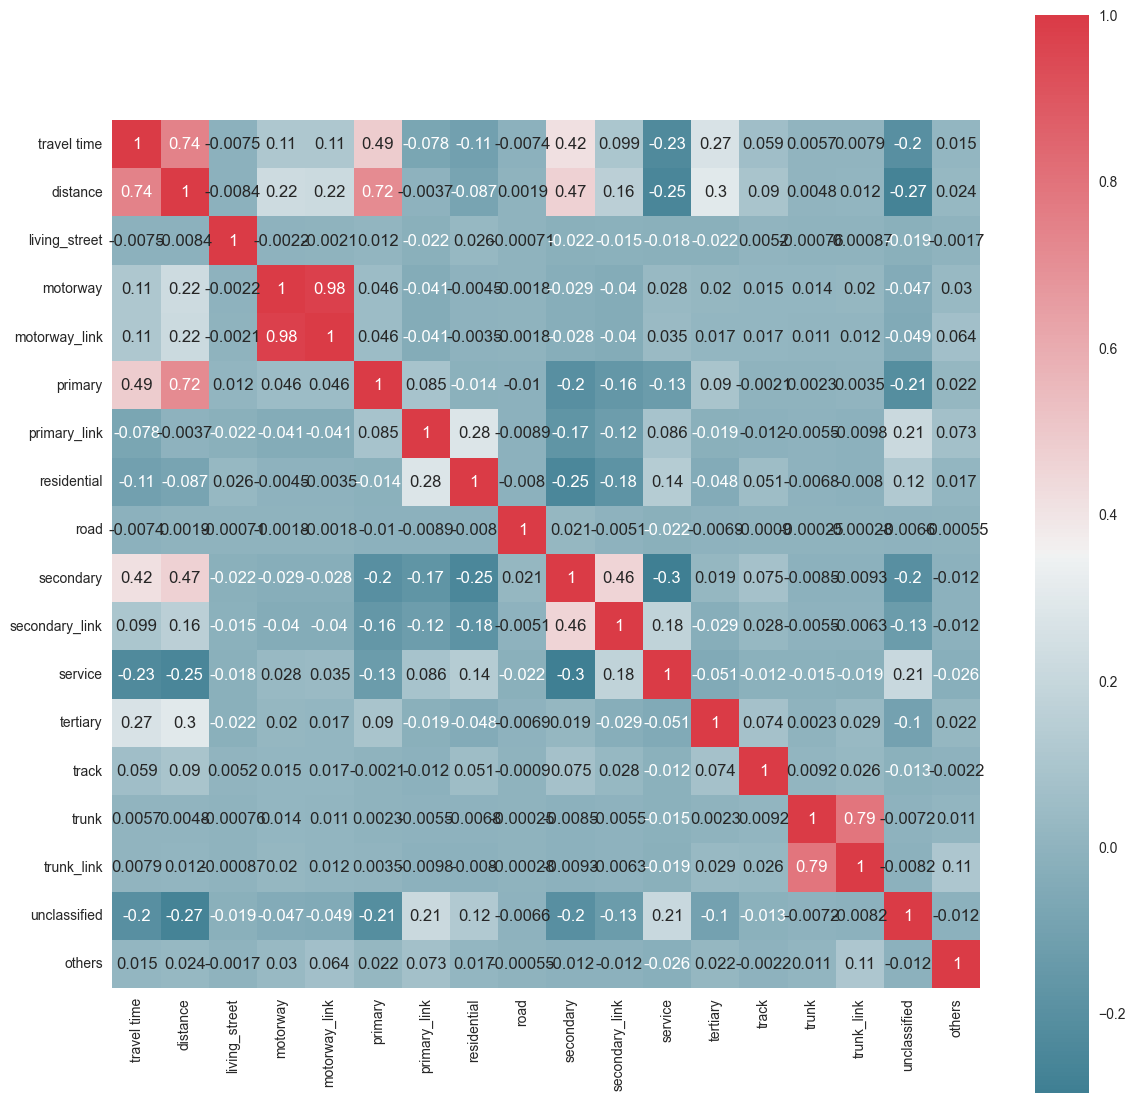

In [135]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(14,14))
corr = df8.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [136]:
x = np.array(df8.iloc[:,1:])
y = np.array(df8['travel time'])
x

array([[0.14021152, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01185947, 0.        , 0.        , ..., 0.        , 0.08810598,
        0.        ],
       [0.06502256, 0.        , 0.        , ..., 0.        , 0.12431659,
        0.        ],
       ...,
       [0.14365915, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14467271, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09503141, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [137]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [138]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12610, 17)
(3153, 17)


In [139]:
# inputs: distance + roadtypes distance
model7_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model7_1_1

Epoch 1/500
395/395 [==============================] - 1s 949us/step - loss: 838822.3125 - mape: 72.2943 - rmse: 915.8724 - val_loss: 212732.6875 - val_mape: 51.7669 - val_rmse: 461.2296
Epoch 2/500
395/395 [==============================] - 0s 797us/step - loss: 182544.8906 - mape: 51.6439 - rmse: 427.2527 - val_loss: 160404.3750 - val_mape: 49.4254 - val_rmse: 400.5052
Epoch 3/500
395/395 [==============================] - 0s 796us/step - loss: 146576.2031 - mape: 45.4057 - rmse: 382.8527 - val_loss: 137091.0469 - val_mape: 43.4886 - val_rmse: 370.2581
Epoch 4/500
395/395 [==============================] - 0s 787us/step - loss: 133062.6719 - mape: 40.4706 - rmse: 364.7776 - val_loss: 129128.5234 - val_mape: 39.8585 - val_rmse: 359.3446
Epoch 5/500
395/395 [==============================] - 0s 797us/step - loss: 129472.2422 - mape: 38.0776 - rmse: 359.8225 - val_loss: 126624.8750 - val_mape: 38.5381 - val_rmse: 355.8439
Epoch 6/500
395/395 [==============================] - 0s 812us/s

Epoch 45/500
395/395 [==============================] - 0s 796us/step - loss: 124948.8828 - mape: 35.1416 - rmse: 353.4811 - val_loss: 123431.9688 - val_mape: 35.6238 - val_rmse: 351.3289
Epoch 46/500
395/395 [==============================] - 0s 776us/step - loss: 125010.7969 - mape: 35.1108 - rmse: 353.5687 - val_loss: 123795.4688 - val_mape: 34.5822 - val_rmse: 351.8458
Epoch 47/500
395/395 [==============================] - 0s 788us/step - loss: 124921.0469 - mape: 34.9651 - rmse: 353.4417 - val_loss: 123488.4453 - val_mape: 36.0666 - val_rmse: 351.4092
Epoch 48/500
395/395 [==============================] - 0s 789us/step - loss: 124825.1094 - mape: 35.2828 - rmse: 353.3060 - val_loss: 123362.7891 - val_mape: 35.7268 - val_rmse: 351.2304
Epoch 49/500
395/395 [==============================] - 0s 795us/step - loss: 124899.8516 - mape: 35.0060 - rmse: 353.4117 - val_loss: 123453.9766 - val_mape: 35.3406 - val_rmse: 351.3602
Epoch 50/500
395/395 [==============================] - 0s 8

395/395 [==============================] - 0s 809us/step - loss: 123376.9766 - mape: 34.3413 - rmse: 351.2506 - val_loss: 123612.5156 - val_mape: 33.9445 - val_rmse: 351.5857
Epoch 132/500
395/395 [==============================] - 0s 783us/step - loss: 123353.9531 - mape: 34.3031 - rmse: 351.2178 - val_loss: 123550.3828 - val_mape: 36.1932 - val_rmse: 351.4973
Epoch 133/500
395/395 [==============================] - 0s 785us/step - loss: 123362.0078 - mape: 34.6166 - rmse: 351.2293 - val_loss: 123229.4844 - val_mape: 35.4742 - val_rmse: 351.0406
Epoch 134/500
395/395 [==============================] - 0s 811us/step - loss: 123458.2812 - mape: 34.3936 - rmse: 351.3663 - val_loss: 123285.3359 - val_mape: 35.0494 - val_rmse: 351.1201
Epoch 135/500
395/395 [==============================] - 0s 796us/step - loss: 123442.1562 - mape: 34.3397 - rmse: 351.3434 - val_loss: 123628.2188 - val_mape: 36.5292 - val_rmse: 351.6080
Epoch 136/500
395/395 [==============================] - 0s 797us/ste

395/395 [==============================] - 0s 802us/step - loss: 122429.0938 - mape: 34.4344 - rmse: 349.8987 - val_loss: 123125.6406 - val_mape: 33.6275 - val_rmse: 350.8926
Epoch 218/500
395/395 [==============================] - 0s 799us/step - loss: 122514.4141 - mape: 34.1629 - rmse: 350.0206 - val_loss: 122898.6016 - val_mape: 34.9639 - val_rmse: 350.5690
Epoch 219/500
395/395 [==============================] - 0s 788us/step - loss: 122379.2891 - mape: 34.2274 - rmse: 349.8275 - val_loss: 123083.3750 - val_mape: 35.5520 - val_rmse: 350.8324
Epoch 220/500
395/395 [==============================] - 0s 838us/step - loss: 122443.0156 - mape: 34.2795 - rmse: 349.9186 - val_loss: 123044.0312 - val_mape: 35.0496 - val_rmse: 350.7763
Epoch 221/500
395/395 [==============================] - 0s 780us/step - loss: 122393.9688 - mape: 34.3630 - rmse: 349.8485 - val_loss: 122811.9219 - val_mape: 34.5796 - val_rmse: 350.4453
Epoch 222/500
395/395 [==============================] - 0s 786us/ste

395/395 [==============================] - 0s 807us/step - loss: 121505.5391 - mape: 34.4923 - rmse: 348.5764 - val_loss: 122554.8125 - val_mape: 33.2955 - val_rmse: 350.0783
Epoch 304/500
395/395 [==============================] - 0s 793us/step - loss: 121372.3594 - mape: 33.8278 - rmse: 348.3853 - val_loss: 122530.7891 - val_mape: 35.8318 - val_rmse: 350.0440
Epoch 305/500
395/395 [==============================] - 0s 793us/step - loss: 121456.6094 - mape: 34.2528 - rmse: 348.5063 - val_loss: 122282.1094 - val_mape: 34.4288 - val_rmse: 349.6886
Epoch 306/500
395/395 [==============================] - 0s 811us/step - loss: 121386.8047 - mape: 34.1866 - rmse: 348.4061 - val_loss: 122486.2188 - val_mape: 33.6681 - val_rmse: 349.9803
Epoch 307/500
395/395 [==============================] - 0s 806us/step - loss: 121453.4844 - mape: 34.1141 - rmse: 348.5018 - val_loss: 122335.2578 - val_mape: 34.8460 - val_rmse: 349.7646
Epoch 308/500
395/395 [==============================] - 0s 790us/ste

395/395 [==============================] - 0s 781us/step - loss: 120809.8516 - mape: 34.0905 - rmse: 347.5771 - val_loss: 121739.3906 - val_mape: 34.8947 - val_rmse: 348.9117
Epoch 390/500
395/395 [==============================] - 0s 814us/step - loss: 120819.1328 - mape: 33.9888 - rmse: 347.5905 - val_loss: 122559.1406 - val_mape: 32.8029 - val_rmse: 350.0845
Epoch 391/500
395/395 [==============================] - 0s 788us/step - loss: 120903.2031 - mape: 33.8334 - rmse: 347.7114 - val_loss: 122194.8750 - val_mape: 35.2693 - val_rmse: 349.5638
Epoch 392/500
395/395 [==============================] - 0s 787us/step - loss: 120924.8047 - mape: 33.9446 - rmse: 347.7424 - val_loss: 121791.4922 - val_mape: 34.8867 - val_rmse: 348.9864
Epoch 393/500
395/395 [==============================] - 0s 793us/step - loss: 120817.7969 - mape: 33.9050 - rmse: 347.5885 - val_loss: 122957.2266 - val_mape: 37.1338 - val_rmse: 350.6526
Epoch 394/500
395/395 [==============================] - 0s 790us/ste

395/395 [==============================] - 0s 803us/step - loss: 120720.9297 - mape: 33.9507 - rmse: 347.4492 - val_loss: 122114.0000 - val_mape: 35.6764 - val_rmse: 349.4482
Epoch 476/500
395/395 [==============================] - 0s 790us/step - loss: 120736.0859 - mape: 33.8772 - rmse: 347.4710 - val_loss: 121866.9609 - val_mape: 35.3744 - val_rmse: 349.0945
Epoch 477/500
395/395 [==============================] - 0s 792us/step - loss: 120660.2891 - mape: 33.8779 - rmse: 347.3619 - val_loss: 121922.6562 - val_mape: 34.8618 - val_rmse: 349.1743
Epoch 478/500
395/395 [==============================] - 0s 809us/step - loss: 120606.8672 - mape: 34.0196 - rmse: 347.2850 - val_loss: 122452.4688 - val_mape: 32.7976 - val_rmse: 349.9321
Epoch 479/500
395/395 [==============================] - 0s 787us/step - loss: 120578.7031 - mape: 33.8323 - rmse: 347.2444 - val_loss: 122090.6953 - val_mape: 33.5601 - val_rmse: 349.4148
Epoch 480/500
395/395 [==============================] - 0s 800us/ste

In [140]:
# plotme(model7_1_1)

In [141]:
# inputs: distance + hour + roadtypes distance
model7_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model7_1_2

Epoch 1/500
395/395 [==============================] - 1s 1ms/step - loss: 629852.6250 - mape: 66.1455 - rmse: 793.6326 - val_loss: 178370.2500 - val_mape: 53.0142 - val_rmse: 422.3390
Epoch 2/500
395/395 [==============================] - 0s 897us/step - loss: 151928.1406 - mape: 46.2893 - rmse: 389.7796 - val_loss: 136056.8125 - val_mape: 41.1593 - val_rmse: 368.8588
Epoch 3/500
395/395 [==============================] - 0s 939us/step - loss: 131293.4531 - mape: 39.4815 - rmse: 362.3444 - val_loss: 127240.3047 - val_mape: 39.0518 - val_rmse: 356.7076
Epoch 4/500
395/395 [==============================] - 0s 907us/step - loss: 128552.2969 - mape: 36.9864 - rmse: 358.5419 - val_loss: 125731.9297 - val_mape: 37.2866 - val_rmse: 354.5870
Epoch 5/500
395/395 [==============================] - 0s 900us/step - loss: 127574.7266 - mape: 36.6354 - rmse: 357.1761 - val_loss: 125382.8984 - val_mape: 35.5937 - val_rmse: 354.0945
Epoch 6/500
395/395 [==============================] - 0s 889us/ste

Epoch 45/500
395/395 [==============================] - 0s 891us/step - loss: 125526.9531 - mape: 35.3661 - rmse: 354.2978 - val_loss: 124276.2812 - val_mape: 34.4679 - val_rmse: 352.5284
Epoch 46/500
395/395 [==============================] - 0s 879us/step - loss: 125484.3672 - mape: 35.3410 - rmse: 354.2377 - val_loss: 123641.0781 - val_mape: 36.4330 - val_rmse: 351.6263
Epoch 47/500
395/395 [==============================] - 0s 872us/step - loss: 125363.5547 - mape: 35.3598 - rmse: 354.0672 - val_loss: 125266.6641 - val_mape: 33.1463 - val_rmse: 353.9303
Epoch 48/500
395/395 [==============================] - 0s 895us/step - loss: 125573.4375 - mape: 35.2256 - rmse: 354.3634 - val_loss: 123895.1016 - val_mape: 35.5849 - val_rmse: 351.9874
Epoch 49/500
395/395 [==============================] - 0s 884us/step - loss: 125337.5938 - mape: 35.3779 - rmse: 354.0305 - val_loss: 123855.2656 - val_mape: 35.0372 - val_rmse: 351.9308
Epoch 50/500
395/395 [==============================] - 0s 8

395/395 [==============================] - 0s 903us/step - loss: 123660.0000 - mape: 34.6279 - rmse: 351.6532 - val_loss: 123559.2344 - val_mape: 33.5320 - val_rmse: 351.5099
Epoch 132/500
395/395 [==============================] - 0s 888us/step - loss: 123663.4609 - mape: 34.5374 - rmse: 351.6582 - val_loss: 123064.0312 - val_mape: 34.5047 - val_rmse: 350.8048
Epoch 133/500
395/395 [==============================] - 0s 897us/step - loss: 123666.9688 - mape: 34.3942 - rmse: 351.6631 - val_loss: 123090.4531 - val_mape: 35.5689 - val_rmse: 350.8425
Epoch 134/500
395/395 [==============================] - 0s 897us/step - loss: 123728.7656 - mape: 34.6319 - rmse: 351.7510 - val_loss: 123332.9141 - val_mape: 36.2283 - val_rmse: 351.1879
Epoch 135/500
395/395 [==============================] - 0s 901us/step - loss: 123668.9219 - mape: 34.6819 - rmse: 351.6659 - val_loss: 123102.6641 - val_mape: 35.3455 - val_rmse: 350.8599
Epoch 136/500
395/395 [==============================] - 0s 888us/ste

395/395 [==============================] - 0s 886us/step - loss: 122576.8828 - mape: 34.3094 - rmse: 350.1098 - val_loss: 122716.8359 - val_mape: 33.9175 - val_rmse: 350.3096
Epoch 218/500
395/395 [==============================] - 0s 898us/step - loss: 122458.5234 - mape: 34.4723 - rmse: 349.9407 - val_loss: 122567.0703 - val_mape: 34.4227 - val_rmse: 350.0958
Epoch 219/500
395/395 [==============================] - 0s 895us/step - loss: 122427.8281 - mape: 34.2481 - rmse: 349.8969 - val_loss: 123129.5938 - val_mape: 34.1724 - val_rmse: 350.8983
Epoch 220/500
395/395 [==============================] - 0s 904us/step - loss: 122329.0625 - mape: 34.4688 - rmse: 349.7557 - val_loss: 123003.8594 - val_mape: 34.0086 - val_rmse: 350.7191
Epoch 221/500
395/395 [==============================] - 0s 907us/step - loss: 122425.5312 - mape: 34.4193 - rmse: 349.8936 - val_loss: 122659.4922 - val_mape: 34.6498 - val_rmse: 350.2278
Epoch 222/500
395/395 [==============================] - 0s 893us/ste

395/395 [==============================] - 0s 883us/step - loss: 121059.9141 - mape: 34.1255 - rmse: 347.9366 - val_loss: 122088.4922 - val_mape: 34.4061 - val_rmse: 349.4117
Epoch 304/500
395/395 [==============================] - 0s 888us/step - loss: 120918.4844 - mape: 34.1597 - rmse: 347.7333 - val_loss: 122098.4688 - val_mape: 35.6832 - val_rmse: 349.4259
Epoch 305/500
395/395 [==============================] - 0s 929us/step - loss: 120754.6094 - mape: 34.1597 - rmse: 347.4977 - val_loss: 124468.2969 - val_mape: 31.3948 - val_rmse: 352.8007
Epoch 306/500
395/395 [==============================] - 0s 888us/step - loss: 120947.3906 - mape: 34.0348 - rmse: 347.7749 - val_loss: 121979.5156 - val_mape: 34.5132 - val_rmse: 349.2556
Epoch 307/500
395/395 [==============================] - 0s 889us/step - loss: 120928.8281 - mape: 34.0487 - rmse: 347.7482 - val_loss: 122447.9375 - val_mape: 36.1550 - val_rmse: 349.9256
Epoch 308/500
395/395 [==============================] - 0s 896us/ste

395/395 [==============================] - 0s 892us/step - loss: 120430.8125 - mape: 33.9285 - rmse: 347.0314 - val_loss: 122040.7812 - val_mape: 34.6051 - val_rmse: 349.3434
Epoch 390/500
395/395 [==============================] - 0s 899us/step - loss: 120523.8359 - mape: 34.1035 - rmse: 347.1654 - val_loss: 122052.4766 - val_mape: 35.6981 - val_rmse: 349.3601
Epoch 391/500
395/395 [==============================] - 0s 888us/step - loss: 120566.1406 - mape: 34.2657 - rmse: 347.2263 - val_loss: 122205.7578 - val_mape: 33.6671 - val_rmse: 349.5794
Epoch 392/500
395/395 [==============================] - 0s 898us/step - loss: 120596.6875 - mape: 34.0801 - rmse: 347.2703 - val_loss: 121819.4219 - val_mape: 33.8354 - val_rmse: 349.0264
Epoch 393/500
395/395 [==============================] - 0s 909us/step - loss: 120370.5625 - mape: 33.9535 - rmse: 346.9446 - val_loss: 122025.9531 - val_mape: 34.5475 - val_rmse: 349.3221
Epoch 394/500
395/395 [==============================] - 0s 882us/ste

395/395 [==============================] - 0s 896us/step - loss: 120525.9844 - mape: 34.1554 - rmse: 347.1685 - val_loss: 122063.5000 - val_mape: 33.8441 - val_rmse: 349.3759
Epoch 476/500
395/395 [==============================] - 0s 899us/step - loss: 120483.1953 - mape: 33.9249 - rmse: 347.1069 - val_loss: 121711.5469 - val_mape: 34.7394 - val_rmse: 348.8718
Epoch 477/500
395/395 [==============================] - 0s 878us/step - loss: 120262.5703 - mape: 34.0051 - rmse: 346.7889 - val_loss: 121849.1484 - val_mape: 35.1609 - val_rmse: 349.0690
Epoch 478/500
395/395 [==============================] - 0s 883us/step - loss: 120423.0078 - mape: 34.0155 - rmse: 347.0202 - val_loss: 121926.8125 - val_mape: 33.8674 - val_rmse: 349.1802
Epoch 479/500
395/395 [==============================] - 0s 914us/step - loss: 120289.9531 - mape: 34.0936 - rmse: 346.8284 - val_loss: 122332.7109 - val_mape: 33.1200 - val_rmse: 349.7609
Epoch 480/500
395/395 [==============================] - 0s 932us/ste

In [142]:
# plotme(model7_1_2)

In [143]:
# inputs: distance + roadtypes distance
model7_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model7_1_3

Epoch 1/500
395/395 [==============================] - 0s 875us/step - loss: 1300570.1250 - mape: 99.1005 - rmse: 1140.4254 - val_loss: 1270285.5000 - val_mape: 97.3737 - val_rmse: 1127.0695
Epoch 2/500
395/395 [==============================] - 0s 766us/step - loss: 1223552.0000 - mape: 94.2811 - rmse: 1106.1428 - val_loss: 1161414.3750 - val_mape: 90.3644 - val_rmse: 1077.6893
Epoch 3/500
395/395 [==============================] - 0s 741us/step - loss: 1089953.2500 - mape: 85.5081 - rmse: 1044.0083 - val_loss: 1008143.9375 - val_mape: 79.7677 - val_rmse: 1004.0637
Epoch 4/500
395/395 [==============================] - 0s 758us/step - loss: 924181.7500 - mape: 73.5932 - rmse: 961.3438 - val_loss: 833090.8125 - val_mape: 66.5026 - val_rmse: 912.7381
Epoch 5/500
395/395 [==============================] - 0s 788us/step - loss: 747111.9375 - mape: 60.0328 - rmse: 864.3564 - val_loss: 659258.2500 - val_mape: 53.1932 - val_rmse: 811.9472
Epoch 6/500
395/395 [==============================] 

Epoch 88/500
395/395 [==============================] - 0s 757us/step - loss: 125419.5859 - mape: 35.3134 - rmse: 354.1463 - val_loss: 123483.6562 - val_mape: 35.2926 - val_rmse: 351.4024
Epoch 89/500
395/395 [==============================] - 0s 735us/step - loss: 125395.0625 - mape: 35.1843 - rmse: 354.1117 - val_loss: 123448.6719 - val_mape: 35.4615 - val_rmse: 351.3526
Epoch 90/500
395/395 [==============================] - 0s 743us/step - loss: 125379.1484 - mape: 35.2907 - rmse: 354.0892 - val_loss: 123424.2969 - val_mape: 35.6390 - val_rmse: 351.3179
Epoch 91/500
395/395 [==============================] - 0s 734us/step - loss: 125351.6094 - mape: 35.3165 - rmse: 354.0503 - val_loss: 123424.5078 - val_mape: 35.4859 - val_rmse: 351.3182
Epoch 92/500
395/395 [==============================] - 0s 756us/step - loss: 125329.3047 - mape: 35.2208 - rmse: 354.0188 - val_loss: 123402.2422 - val_mape: 35.5809 - val_rmse: 351.2866
Epoch 93/500
395/395 [==============================] - 0s 7

395/395 [==============================] - 0s 752us/step - loss: 123905.5234 - mape: 34.7364 - rmse: 352.0022 - val_loss: 122807.1406 - val_mape: 35.2396 - val_rmse: 350.4385
Epoch 175/500
395/395 [==============================] - 0s 736us/step - loss: 123896.6328 - mape: 34.8602 - rmse: 351.9895 - val_loss: 122797.0938 - val_mape: 35.1961 - val_rmse: 350.4242
Epoch 176/500
395/395 [==============================] - 0s 761us/step - loss: 123884.7031 - mape: 34.9174 - rmse: 351.9726 - val_loss: 122812.3672 - val_mape: 34.9487 - val_rmse: 350.4460
Epoch 177/500
395/395 [==============================] - 0s 754us/step - loss: 123872.3594 - mape: 34.6771 - rmse: 351.9550 - val_loss: 122791.4375 - val_mape: 35.2234 - val_rmse: 350.4161
Epoch 178/500
395/395 [==============================] - 0s 746us/step - loss: 123861.7031 - mape: 34.9834 - rmse: 351.9399 - val_loss: 122829.7891 - val_mape: 34.8236 - val_rmse: 350.4708
Epoch 179/500
395/395 [==============================] - 0s 752us/ste

395/395 [==============================] - 0s 729us/step - loss: 122955.1250 - mape: 34.6433 - rmse: 350.6496 - val_loss: 122499.8047 - val_mape: 34.7933 - val_rmse: 349.9997
Epoch 261/500
395/395 [==============================] - 0s 760us/step - loss: 122940.2656 - mape: 34.4409 - rmse: 350.6284 - val_loss: 122490.3281 - val_mape: 34.9358 - val_rmse: 349.9862
Epoch 262/500
395/395 [==============================] - 0s 749us/step - loss: 122934.5938 - mape: 34.6571 - rmse: 350.6203 - val_loss: 122462.6797 - val_mape: 34.9006 - val_rmse: 349.9467
Epoch 263/500
395/395 [==============================] - 0s 753us/step - loss: 122925.1484 - mape: 34.5322 - rmse: 350.6068 - val_loss: 122490.6328 - val_mape: 34.8184 - val_rmse: 349.9866
Epoch 264/500
395/395 [==============================] - 0s 739us/step - loss: 122917.0703 - mape: 34.5885 - rmse: 350.5953 - val_loss: 122508.8984 - val_mape: 34.6315 - val_rmse: 350.0127
Epoch 265/500
395/395 [==============================] - 0s 734us/ste

395/395 [==============================] - 0s 752us/step - loss: 122322.8828 - mape: 34.4079 - rmse: 349.7469 - val_loss: 122337.4531 - val_mape: 34.5018 - val_rmse: 349.7677
Epoch 347/500
395/395 [==============================] - 0s 755us/step - loss: 122333.6875 - mape: 34.3584 - rmse: 349.7623 - val_loss: 122331.2891 - val_mape: 34.6493 - val_rmse: 349.7589
Epoch 348/500
395/395 [==============================] - 0s 752us/step - loss: 122329.4062 - mape: 34.4394 - rmse: 349.7562 - val_loss: 122287.1406 - val_mape: 34.7287 - val_rmse: 349.6958
Epoch 349/500
395/395 [==============================] - 0s 760us/step - loss: 122320.8672 - mape: 34.4407 - rmse: 349.7440 - val_loss: 122302.4141 - val_mape: 34.6741 - val_rmse: 349.7176
Epoch 350/500
395/395 [==============================] - 0s 750us/step - loss: 122309.9453 - mape: 34.4587 - rmse: 349.7284 - val_loss: 122340.8750 - val_mape: 34.4408 - val_rmse: 349.7726
Epoch 351/500
395/395 [==============================] - 0s 748us/ste

395/395 [==============================] - 0s 743us/step - loss: 121930.0078 - mape: 34.3667 - rmse: 349.1848 - val_loss: 122292.0859 - val_mape: 34.4618 - val_rmse: 349.7029
Epoch 433/500
395/395 [==============================] - 0s 756us/step - loss: 121931.3047 - mape: 34.2278 - rmse: 349.1866 - val_loss: 122287.1094 - val_mape: 34.5816 - val_rmse: 349.6957
Epoch 434/500
395/395 [==============================] - 0s 775us/step - loss: 121933.3984 - mape: 34.2706 - rmse: 349.1896 - val_loss: 122320.2500 - val_mape: 34.4955 - val_rmse: 349.7431
Epoch 435/500
395/395 [==============================] - 0s 755us/step - loss: 121924.8750 - mape: 34.1388 - rmse: 349.1774 - val_loss: 122292.6562 - val_mape: 34.6632 - val_rmse: 349.7037
Epoch 436/500
395/395 [==============================] - 0s 749us/step - loss: 121924.7031 - mape: 34.2357 - rmse: 349.1772 - val_loss: 122288.5312 - val_mape: 34.7311 - val_rmse: 349.6978
Epoch 437/500
395/395 [==============================] - 0s 761us/ste

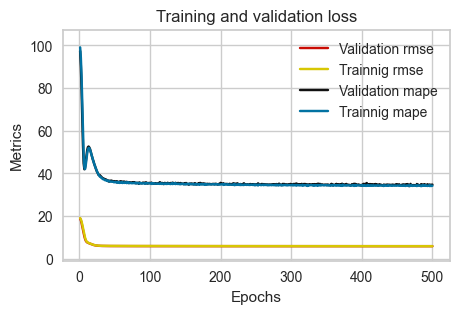

In [144]:
plotme(model7_1_3)

In [145]:
# inputs: distance + roadtypes distance
model7_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model7_1_4

Epoch 1/500
395/395 [==============================] - 1s 888us/step - loss: 1311294.2500 - mape: 99.7458 - rmse: 1145.1176 - val_loss: 1301936.6250 - val_mape: 99.3417 - val_rmse: 1141.0244
Epoch 2/500
395/395 [==============================] - 0s 728us/step - loss: 1293771.3750 - mape: 98.6739 - rmse: 1137.4407 - val_loss: 1277539.3750 - val_mape: 97.8188 - val_rmse: 1130.2828
Epoch 3/500
395/395 [==============================] - 0s 744us/step - loss: 1263111.2500 - mape: 96.7510 - rmse: 1123.8822 - val_loss: 1241089.1250 - val_mape: 95.5154 - val_rmse: 1114.0417
Epoch 4/500
395/395 [==============================] - 0s 734us/step - loss: 1221295.7500 - mape: 94.1396 - rmse: 1105.1226 - val_loss: 1193796.6250 - val_mape: 92.4644 - val_rmse: 1092.6100
Epoch 5/500
395/395 [==============================] - 0s 732us/step - loss: 1166489.2500 - mape: 90.6006 - rmse: 1080.0413 - val_loss: 1132638.7500 - val_mape: 88.4071 - val_rmse: 1064.2550
Epoch 6/500
395/395 [========================

Epoch 88/500
395/395 [==============================] - 0s 737us/step - loss: 127934.7812 - mape: 36.6701 - rmse: 357.6797 - val_loss: 125453.0234 - val_mape: 37.0405 - val_rmse: 354.1935
Epoch 89/500
395/395 [==============================] - 0s 722us/step - loss: 127893.8672 - mape: 36.6391 - rmse: 357.6225 - val_loss: 125410.2734 - val_mape: 36.9673 - val_rmse: 354.1331
Epoch 90/500
395/395 [==============================] - 0s 737us/step - loss: 127843.7734 - mape: 36.5829 - rmse: 357.5525 - val_loss: 125358.2500 - val_mape: 36.8980 - val_rmse: 354.0597
Epoch 91/500
395/395 [==============================] - 0s 728us/step - loss: 127800.5703 - mape: 36.5555 - rmse: 357.4921 - val_loss: 125314.7891 - val_mape: 36.8653 - val_rmse: 353.9983
Epoch 92/500
395/395 [==============================] - 0s 742us/step - loss: 127767.0859 - mape: 36.6026 - rmse: 357.4452 - val_loss: 125279.3672 - val_mape: 36.7524 - val_rmse: 353.9482
Epoch 93/500
395/395 [==============================] - 0s 7

395/395 [==============================] - 0s 734us/step - loss: 126341.2969 - mape: 35.7740 - rmse: 355.4452 - val_loss: 124137.6016 - val_mape: 35.9666 - val_rmse: 352.3317
Epoch 175/500
395/395 [==============================] - 0s 720us/step - loss: 126329.9922 - mape: 35.7915 - rmse: 355.4293 - val_loss: 124143.6406 - val_mape: 35.8802 - val_rmse: 352.3402
Epoch 176/500
395/395 [==============================] - 0s 724us/step - loss: 126324.6406 - mape: 35.7062 - rmse: 355.4218 - val_loss: 124143.1562 - val_mape: 35.8921 - val_rmse: 352.3395
Epoch 177/500
395/395 [==============================] - 0s 741us/step - loss: 126317.0469 - mape: 35.6221 - rmse: 355.4111 - val_loss: 124124.9531 - val_mape: 35.9744 - val_rmse: 352.3137
Epoch 178/500
395/395 [==============================] - 0s 736us/step - loss: 126305.9453 - mape: 35.8191 - rmse: 355.3955 - val_loss: 124130.3750 - val_mape: 35.8881 - val_rmse: 352.3214
Epoch 179/500
395/395 [==============================] - 0s 729us/ste

395/395 [==============================] - 0s 729us/step - loss: 125883.6328 - mape: 35.6659 - rmse: 354.8008 - val_loss: 124033.6562 - val_mape: 35.7614 - val_rmse: 352.1841
Epoch 261/500
395/395 [==============================] - 0s 740us/step - loss: 125872.4375 - mape: 35.6293 - rmse: 354.7851 - val_loss: 124039.1719 - val_mape: 35.7190 - val_rmse: 352.1920
Epoch 262/500
395/395 [==============================] - 0s 736us/step - loss: 125868.5312 - mape: 35.4925 - rmse: 354.7795 - val_loss: 124020.3281 - val_mape: 35.8723 - val_rmse: 352.1652
Epoch 263/500
395/395 [==============================] - 0s 724us/step - loss: 125866.6016 - mape: 35.6165 - rmse: 354.7768 - val_loss: 124034.2188 - val_mape: 35.8005 - val_rmse: 352.1849
Epoch 264/500
395/395 [==============================] - 0s 732us/step - loss: 125859.6797 - mape: 35.6342 - rmse: 354.7671 - val_loss: 124048.7422 - val_mape: 35.6897 - val_rmse: 352.2055
Epoch 265/500
395/395 [==============================] - 0s 723us/ste

395/395 [==============================] - 0s 729us/step - loss: 125593.8125 - mape: 35.4080 - rmse: 354.3922 - val_loss: 123994.2344 - val_mape: 35.6908 - val_rmse: 352.1281
Epoch 347/500
395/395 [==============================] - 0s 719us/step - loss: 125591.0312 - mape: 35.5745 - rmse: 354.3882 - val_loss: 123994.2031 - val_mape: 35.7120 - val_rmse: 352.1281
Epoch 348/500
395/395 [==============================] - 0s 736us/step - loss: 125580.5938 - mape: 35.3764 - rmse: 354.3735 - val_loss: 123990.3594 - val_mape: 35.7979 - val_rmse: 352.1227
Epoch 349/500
395/395 [==============================] - 0s 736us/step - loss: 125583.7812 - mape: 35.5470 - rmse: 354.3780 - val_loss: 123996.7344 - val_mape: 35.7300 - val_rmse: 352.1317
Epoch 350/500
395/395 [==============================] - 0s 723us/step - loss: 125579.9688 - mape: 35.5679 - rmse: 354.3727 - val_loss: 123986.0078 - val_mape: 35.7017 - val_rmse: 352.1165
Epoch 351/500
395/395 [==============================] - 0s 726us/ste

395/395 [==============================] - 0s 740us/step - loss: 125354.2500 - mape: 35.5016 - rmse: 354.0540 - val_loss: 123958.7266 - val_mape: 35.5655 - val_rmse: 352.0777
Epoch 433/500
395/395 [==============================] - 0s 717us/step - loss: 125349.4375 - mape: 35.2691 - rmse: 354.0472 - val_loss: 123937.6875 - val_mape: 35.7144 - val_rmse: 352.0479
Epoch 434/500
395/395 [==============================] - 0s 732us/step - loss: 125350.4375 - mape: 35.4625 - rmse: 354.0486 - val_loss: 123940.2656 - val_mape: 35.6254 - val_rmse: 352.0515
Epoch 435/500
395/395 [==============================] - 0s 731us/step - loss: 125346.7578 - mape: 35.4369 - rmse: 354.0434 - val_loss: 123944.0078 - val_mape: 35.6238 - val_rmse: 352.0568
Epoch 436/500
395/395 [==============================] - 0s 740us/step - loss: 125347.7812 - mape: 35.3939 - rmse: 354.0449 - val_loss: 123942.3438 - val_mape: 35.6017 - val_rmse: 352.0545
Epoch 437/500
395/395 [==============================] - 0s 729us/ste

In [146]:
# inputs: distance + roadtypes distance
model7_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model7_1_5

Epoch 1/500
395/395 [==============================] - 1s 894us/step - loss: 1288091.0000 - mape: 98.3187 - rmse: 1134.9409 - val_loss: 1230482.2500 - val_mape: 94.8711 - val_rmse: 1109.2710
Epoch 2/500
395/395 [==============================] - 0s 760us/step - loss: 1134381.0000 - mape: 88.5248 - rmse: 1065.0732 - val_loss: 1016338.4375 - val_mape: 80.3997 - val_rmse: 1008.1361
Epoch 3/500
395/395 [==============================] - 0s 758us/step - loss: 888210.3750 - mape: 70.8508 - rmse: 942.4492 - val_loss: 753417.0625 - val_mape: 60.2800 - val_rmse: 867.9960
Epoch 4/500
395/395 [==============================] - 0s 764us/step - loss: 631845.1250 - mape: 51.9061 - rmse: 794.8868 - val_loss: 515551.0625 - val_mape: 45.0204 - val_rmse: 718.0189
Epoch 5/500
395/395 [==============================] - 0s 760us/step - loss: 427241.1562 - mape: 42.5548 - rmse: 653.6368 - val_loss: 348838.0000 - val_mape: 41.8508 - val_rmse: 590.6251
Epoch 6/500
395/395 [==============================] - 0s

Epoch 88/500
395/395 [==============================] - 0s 749us/step - loss: 125093.1172 - mape: 35.3228 - rmse: 353.6851 - val_loss: 123553.5625 - val_mape: 35.1450 - val_rmse: 351.5019
Epoch 89/500
395/395 [==============================] - 0s 763us/step - loss: 125086.8281 - mape: 35.2083 - rmse: 353.6762 - val_loss: 123500.2891 - val_mape: 35.5186 - val_rmse: 351.4261
Epoch 90/500
395/395 [==============================] - 0s 775us/step - loss: 125058.3516 - mape: 35.2754 - rmse: 353.6359 - val_loss: 123514.4453 - val_mape: 35.3729 - val_rmse: 351.4462
Epoch 91/500
395/395 [==============================] - 0s 757us/step - loss: 125050.9141 - mape: 35.1803 - rmse: 353.6254 - val_loss: 123474.3203 - val_mape: 35.7360 - val_rmse: 351.3891
Epoch 92/500
395/395 [==============================] - 0s 772us/step - loss: 125015.4766 - mape: 35.2592 - rmse: 353.5753 - val_loss: 123459.3828 - val_mape: 36.0774 - val_rmse: 351.3679
Epoch 93/500
395/395 [==============================] - 0s 7

395/395 [==============================] - 0s 763us/step - loss: 123577.4297 - mape: 35.0244 - rmse: 351.5358 - val_loss: 122842.1719 - val_mape: 35.0514 - val_rmse: 350.4885
Epoch 175/500
395/395 [==============================] - 0s 758us/step - loss: 123558.6953 - mape: 34.8442 - rmse: 351.5092 - val_loss: 122853.5312 - val_mape: 35.0363 - val_rmse: 350.5047
Epoch 176/500
395/395 [==============================] - 0s 777us/step - loss: 123513.1406 - mape: 34.9376 - rmse: 351.4444 - val_loss: 122795.0859 - val_mape: 35.0728 - val_rmse: 350.4213
Epoch 177/500
395/395 [==============================] - 0s 763us/step - loss: 123501.3438 - mape: 34.7404 - rmse: 351.4276 - val_loss: 122818.3359 - val_mape: 35.3510 - val_rmse: 350.4545
Epoch 178/500
395/395 [==============================] - 0s 787us/step - loss: 123512.6953 - mape: 34.9225 - rmse: 351.4437 - val_loss: 122822.4766 - val_mape: 34.9949 - val_rmse: 350.4604
Epoch 179/500
395/395 [==============================] - 0s 795us/ste

395/395 [==============================] - 0s 765us/step - loss: 122503.2031 - mape: 34.4181 - rmse: 350.0046 - val_loss: 122370.1797 - val_mape: 34.6862 - val_rmse: 349.8145
Epoch 261/500
395/395 [==============================] - 0s 752us/step - loss: 122489.9844 - mape: 34.4344 - rmse: 349.9857 - val_loss: 122401.6641 - val_mape: 34.4829 - val_rmse: 349.8595
Epoch 262/500
395/395 [==============================] - 0s 752us/step - loss: 122478.2266 - mape: 34.4216 - rmse: 349.9689 - val_loss: 122378.4609 - val_mape: 34.7546 - val_rmse: 349.8263
Epoch 263/500
395/395 [==============================] - 0s 791us/step - loss: 122465.7031 - mape: 34.3716 - rmse: 349.9510 - val_loss: 122358.4609 - val_mape: 35.1481 - val_rmse: 349.7977
Epoch 264/500
395/395 [==============================] - 0s 761us/step - loss: 122457.9141 - mape: 34.5323 - rmse: 349.9399 - val_loss: 122358.2500 - val_mape: 34.8410 - val_rmse: 349.7975
Epoch 265/500
395/395 [==============================] - 0s 762us/ste

395/395 [==============================] - 0s 764us/step - loss: 121828.9922 - mape: 34.3537 - rmse: 349.0401 - val_loss: 122230.0625 - val_mape: 34.5445 - val_rmse: 349.6142
Epoch 347/500
395/395 [==============================] - 0s 755us/step - loss: 121829.9609 - mape: 34.2397 - rmse: 349.0415 - val_loss: 122202.6641 - val_mape: 34.8410 - val_rmse: 349.5750
Epoch 348/500
395/395 [==============================] - 0s 759us/step - loss: 121824.0234 - mape: 34.1990 - rmse: 349.0330 - val_loss: 122233.8203 - val_mape: 34.8092 - val_rmse: 349.6195
Epoch 349/500
395/395 [==============================] - 0s 744us/step - loss: 121799.0078 - mape: 34.3341 - rmse: 348.9971 - val_loss: 122272.3672 - val_mape: 34.2836 - val_rmse: 349.6747
Epoch 350/500
395/395 [==============================] - 0s 739us/step - loss: 121830.8047 - mape: 34.1512 - rmse: 349.0427 - val_loss: 122245.8438 - val_mape: 34.7631 - val_rmse: 349.6367
Epoch 351/500
395/395 [==============================] - 0s 761us/ste

395/395 [==============================] - 0s 752us/step - loss: 121379.5469 - mape: 34.2022 - rmse: 348.3957 - val_loss: 122161.6719 - val_mape: 34.4889 - val_rmse: 349.5163
Epoch 433/500
395/395 [==============================] - 0s 773us/step - loss: 121375.5391 - mape: 34.1687 - rmse: 348.3899 - val_loss: 122145.8672 - val_mape: 34.4439 - val_rmse: 349.4937
Epoch 434/500
395/395 [==============================] - 0s 752us/step - loss: 121395.3047 - mape: 34.1363 - rmse: 348.4183 - val_loss: 122161.6172 - val_mape: 34.8531 - val_rmse: 349.5163
Epoch 435/500
395/395 [==============================] - 0s 752us/step - loss: 121362.4922 - mape: 34.4042 - rmse: 348.3712 - val_loss: 122156.2422 - val_mape: 34.4517 - val_rmse: 349.5086
Epoch 436/500
395/395 [==============================] - 0s 738us/step - loss: 121362.5156 - mape: 34.1029 - rmse: 348.3712 - val_loss: 122092.0078 - val_mape: 34.7433 - val_rmse: 349.4167
Epoch 437/500
395/395 [==============================] - 0s 749us/ste

## model 8: take the most powerful regressors: distance, 1st dominated hot-encoded, primary road full distance

In [147]:
df = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf_ph_sphs.csv', index_col=0)
dff = pd.read_csv('C:\\My files\\Dr Buzna\\trips\\NN\\real_distance\\tripdf1_ph_sphs.csv', index_col=0)
df_ = pd.concat([df, dff], axis=1)
df_ = df_[['travel time','distance','1st ranked','2nd ranked','3rd ranked','primary','secondary','service']]
df_ = df_.T.drop_duplicates().T
# df_ = df_.drop(df_.columns[[1, 1, 2]],axis = 1)
df_

travel time distance    1st ranked    2nd ranked   3rd ranked  primary  \
0            1163  21671.7       primary       service  residential  20416.4   
1             347  2047.63       service  unclassified  residential  386.602   
2             720  10175.9       primary  unclassified     tertiary  8633.72   
3             355  2337.95  unclassified       service      primary  386.602   
4             356  3083.62   residential  unclassified      service  291.863   
...           ...      ...           ...           ...          ...      ...   
15758        1649  24589.9       primary     secondary  residential  20475.6   
15759        1385    22240       primary      tertiary    secondary  15143.2   
15760        1217  22198.8       primary     secondary     tertiary  20475.6   
15761        1189  22353.8       primary     secondary     tertiary  20475.6   
15762        1112    14764       primary     secondary          NaN  13722.2   

      secondary  service  
0             0  833.016  
1             0   675.27  
2             0  278.634  
3             0   684.44  
4             0  644.164  
...         ...      ...  
15758   1674.39        0  
15759   1266.65   100.13  
15760   1491.48        0  
15761   1674.39        0  
15762   1041.83        0  

[15763 rows x 8 columns]

In [148]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15763 entries, 0 to 15762
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   travel time  15763 non-null  object
 1   distance     15763 non-null  object
 2   1st ranked   15763 non-null  object
 3   2nd ranked   15158 non-null  object
 4   3rd ranked   14171 non-null  object
 5   primary      15763 non-null  object
 6   secondary    15763 non-null  object
 7   service      15763 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [149]:
df_['travel time'] = df_['travel time'].astype(float)
df_['primary'] = df_['primary'].astype(float)
df_['secondary'] = df_['secondary'].astype(float)
df_['service'] = df_['service'].astype(float)
df_['distance'] = df_['distance'].astype(float)
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15763 entries, 0 to 15762
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel time  15763 non-null  float64
 1   distance     15763 non-null  float64
 2   1st ranked   15763 non-null  object 
 3   2nd ranked   15158 non-null  object 
 4   3rd ranked   14171 non-null  object 
 5   primary      15763 non-null  float64
 6   secondary    15763 non-null  float64
 7   service      15763 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [150]:
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
motorway         205.0
primary         6423.0
residential     2173.0
secondary       3778.0
service          596.0
tertiary        1357.0
track              2.0
trunk              1.0
unclassified    1228.0
Name: travel time, dtype: float64

In [151]:
option = ['residential','tertiary','primary','secondary']
df_.loc[~df_['1st ranked'].isin(option),'1st ranked'] = 'others1'
summar1 = df_.groupby('1st ranked').agg(np.size)
summar1['travel time']

1st ranked
others1        2032.0
primary        6423.0
residential    2173.0
secondary      3778.0
tertiary       1357.0
Name: travel time, dtype: float64

In [152]:
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
living_street       2.0
motorway           26.0
primary          4121.0
primary_link       33.0
residential      3024.0
road                2.0
secondary        1176.0
service          3458.0
tertiary         2676.0
track              15.0
trunk               2.0
trunk_link          1.0
unclassified      622.0
Name: travel time, dtype: float64

In [153]:
option = ['residential','tertiary','secondary','primary',None]
df_.loc[~df_['2nd ranked'].isin(option),'2nd ranked'] = 'others2'
summar1 = df_.groupby('2nd ranked').agg(np.size)
summar1['travel time']

2nd ranked
others2        4766.0
primary        4121.0
residential    3024.0
secondary      1176.0
tertiary       2676.0
Name: travel time, dtype: float64

In [154]:
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
living_street       21.0
motorway             1.0
motorway_link      120.0
primary           2056.0
primary_link       631.0
residential       3697.0
road                 2.0
secondary          650.0
secondary_link      23.0
service           5237.0
tertiary          1261.0
track               41.0
trunk                1.0
trunk_link           4.0
unclassified       426.0
Name: travel time, dtype: float64

In [155]:
option = ['residential','tertiary','primary','service',None]
df_.loc[~df_['3rd ranked'].isin(option),'3rd ranked'] = 'others3'
summar1 = df_.groupby('3rd ranked').agg(np.size)
summar1['travel time']

3rd ranked
others3        3512.0
primary        2056.0
residential    3697.0
service        5237.0
tertiary       1261.0
Name: travel time, dtype: float64

## Encoding features

#### 1. Target (mean) encoding of dominated roadtype

In [156]:
te = TargetEncoder()
df_['1st ranked'] = te.fit_transform(df_['1st ranked'],df_['travel time'])
df_['2nd ranked'] = te.fit_transform(df_['2nd ranked'],df_['travel time'])
df_['3rd ranked'] = te.fit_transform(df_['3rd ranked'],df_['travel time'])

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\category_encoders\target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [157]:
df_.head()

travel time   distance   1st ranked  2nd ranked   3rd ranked    primary  \
0       1163.0  21671.733  1094.427526  825.435585   990.563159  20416.446   
1        347.0   2047.629   704.813976  825.435585   990.563159    386.602   
2        720.0  10175.882  1094.427526  825.435585  1255.683584   8633.723   
3        355.0   2337.951   704.813976  825.435585   803.746109    386.602   
4        356.0   3083.625   637.309250  825.435585   922.059385    291.863   

   secondary  service  
0        0.0  833.016  
1        0.0  675.270  
2        0.0  278.634  
3        0.0  684.440  
4        0.0  644.164

c:\users\shima\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


<AxesSubplot:>

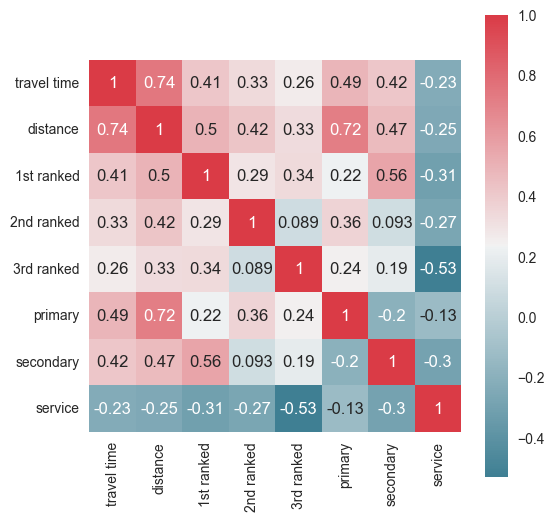

In [158]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(6,6))
corr = df_.corr()
sns.heatmap(corr,annot=True, mask=np.zeros_like(corr,dtype=np.bool),
           cmap=sns.diverging_palette(220,10, as_cmap=True),
           square=True, ax=ax)

In [159]:
x = np.array(df_.iloc[:,1:])
y = np.array(df_['travel time'])
x

array([[21671.733     ,  1094.42752608,   825.4355854 , ...,
        20416.446     ,     0.        ,   833.016     ],
       [ 2047.629     ,   704.81397638,   825.4355854 , ...,
          386.602     ,     0.        ,   675.27      ],
       [10175.882     ,  1094.42752608,   825.4355854 , ...,
         8633.723     ,     0.        ,   278.634     ],
       ...,
       [22198.85      ,  1094.42752608,  1312.98469388, ...,
        20475.622     ,  1491.485     ,     0.        ],
       [22353.817     ,  1094.42752608,  1312.98469388, ...,
        20475.622     ,  1674.394     ,     0.        ],
       [14764.019     ,  1094.42752608,  1312.98469388, ...,
        13722.194     ,  1041.825     ,     0.        ]])

In [160]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [161]:
print(X_train.shape)
print(X_test.shape)
# X_train

(12610, 7)
(3153, 7)


In [162]:
# inputs: distance + roadtypes distance
model8_1_3 = nnmodel_(50, num_hlayers=1,Epoch=500)
model8_1_3

Epoch 1/500
395/395 [==============================] - 1s 904us/step - loss: 613095.5000 - mape: 44.6162 - rmse: 783.0042 - val_loss: 132310.7500 - val_mape: 35.6257 - val_rmse: 363.7455
Epoch 2/500
395/395 [==============================] - 0s 746us/step - loss: 140305.7188 - mape: 35.6420 - rmse: 374.5740 - val_loss: 129654.3672 - val_mape: 34.1485 - val_rmse: 360.0755
Epoch 3/500
395/395 [==============================] - 0s 749us/step - loss: 137164.3750 - mape: 35.4851 - rmse: 370.3571 - val_loss: 127895.6172 - val_mape: 36.7764 - val_rmse: 357.6250
Epoch 4/500
395/395 [==============================] - 0s 750us/step - loss: 133301.4531 - mape: 34.9815 - rmse: 365.1047 - val_loss: 128147.8047 - val_mape: 37.2445 - val_rmse: 357.9774
Epoch 5/500
395/395 [==============================] - 0s 735us/step - loss: 132040.7969 - mape: 35.0328 - rmse: 363.3742 - val_loss: 132677.0938 - val_mape: 32.3099 - val_rmse: 364.2487
Epoch 6/500
395/395 [==============================] - 0s 748us/s

Epoch 45/500
395/395 [==============================] - 0s 761us/step - loss: 126098.9688 - mape: 34.0123 - rmse: 355.1042 - val_loss: 132822.2031 - val_mape: 32.7143 - val_rmse: 364.4478
Epoch 46/500
395/395 [==============================] - 0s 761us/step - loss: 127963.3359 - mape: 34.3636 - rmse: 357.7196 - val_loss: 122667.0156 - val_mape: 33.1328 - val_rmse: 350.2385
Epoch 47/500
395/395 [==============================] - 0s 749us/step - loss: 125123.0938 - mape: 34.1763 - rmse: 353.7274 - val_loss: 134308.7500 - val_mape: 29.8958 - val_rmse: 366.4816
Epoch 48/500
395/395 [==============================] - 0s 761us/step - loss: 124780.4062 - mape: 33.8974 - rmse: 353.2427 - val_loss: 132298.9062 - val_mape: 37.6650 - val_rmse: 363.7292
Epoch 49/500
395/395 [==============================] - 0s 753us/step - loss: 124505.2344 - mape: 33.9335 - rmse: 352.8530 - val_loss: 122963.3984 - val_mape: 32.7905 - val_rmse: 350.6614
Epoch 50/500
395/395 [==============================] - 0s 7

395/395 [==============================] - 0s 759us/step - loss: 122649.0625 - mape: 33.8261 - rmse: 350.2129 - val_loss: 129765.4297 - val_mape: 33.4911 - val_rmse: 360.2297
Epoch 132/500
395/395 [==============================] - 0s 772us/step - loss: 122384.9219 - mape: 33.6792 - rmse: 349.8356 - val_loss: 122567.5547 - val_mape: 34.0620 - val_rmse: 350.0965
Epoch 133/500
395/395 [==============================] - 0s 761us/step - loss: 122839.0000 - mape: 33.9196 - rmse: 350.4839 - val_loss: 121987.8672 - val_mape: 35.4996 - val_rmse: 349.2676
Epoch 134/500
395/395 [==============================] - 0s 753us/step - loss: 121864.6250 - mape: 33.7694 - rmse: 349.0912 - val_loss: 124402.2578 - val_mape: 31.8741 - val_rmse: 352.7070
Epoch 135/500
395/395 [==============================] - 0s 731us/step - loss: 122045.9531 - mape: 33.7473 - rmse: 349.3508 - val_loss: 123682.9062 - val_mape: 34.2353 - val_rmse: 351.6858
Epoch 136/500
395/395 [==============================] - 0s 736us/ste

395/395 [==============================] - 0s 746us/step - loss: 121245.8203 - mape: 33.7452 - rmse: 348.2037 - val_loss: 122917.0312 - val_mape: 31.5206 - val_rmse: 350.5952
Epoch 218/500
395/395 [==============================] - 0s 760us/step - loss: 120707.7656 - mape: 33.4811 - rmse: 347.4302 - val_loss: 121393.9219 - val_mape: 35.3115 - val_rmse: 348.4163
Epoch 219/500
395/395 [==============================] - 0s 775us/step - loss: 120929.0469 - mape: 33.8433 - rmse: 347.7485 - val_loss: 121180.8047 - val_mape: 33.5399 - val_rmse: 348.1103
Epoch 220/500
395/395 [==============================] - 0s 749us/step - loss: 120964.7266 - mape: 33.5828 - rmse: 347.7998 - val_loss: 121737.1875 - val_mape: 34.3224 - val_rmse: 348.9086
Epoch 221/500
395/395 [==============================] - 0s 749us/step - loss: 121159.4844 - mape: 33.7444 - rmse: 348.0797 - val_loss: 121537.1641 - val_mape: 34.1103 - val_rmse: 348.6218
Epoch 222/500
395/395 [==============================] - 0s 761us/ste

395/395 [==============================] - 0s 743us/step - loss: 120435.3203 - mape: 33.5627 - rmse: 347.0379 - val_loss: 121575.2500 - val_mape: 35.3265 - val_rmse: 348.6764
Epoch 304/500
395/395 [==============================] - 0s 756us/step - loss: 120325.0547 - mape: 33.6179 - rmse: 346.8790 - val_loss: 121783.7266 - val_mape: 36.4346 - val_rmse: 348.9753
Epoch 305/500
395/395 [==============================] - 0s 780us/step - loss: 120254.6797 - mape: 33.7438 - rmse: 346.7776 - val_loss: 123240.5234 - val_mape: 34.4510 - val_rmse: 351.0563
Epoch 306/500
395/395 [==============================] - 0s 760us/step - loss: 120159.5078 - mape: 33.5786 - rmse: 346.6403 - val_loss: 122510.8984 - val_mape: 35.3613 - val_rmse: 350.0156
Epoch 307/500
395/395 [==============================] - 0s 759us/step - loss: 120417.0469 - mape: 33.7571 - rmse: 347.0116 - val_loss: 121700.4531 - val_mape: 33.6073 - val_rmse: 348.8559
Epoch 308/500
395/395 [==============================] - 0s 782us/ste

395/395 [==============================] - 0s 766us/step - loss: 119580.7656 - mape: 33.5650 - rmse: 345.8045 - val_loss: 122259.3984 - val_mape: 34.5585 - val_rmse: 349.6561
Epoch 390/500
395/395 [==============================] - 0s 731us/step - loss: 119457.3828 - mape: 33.4239 - rmse: 345.6261 - val_loss: 123369.4062 - val_mape: 36.4052 - val_rmse: 351.2398
Epoch 391/500
395/395 [==============================] - 0s 732us/step - loss: 119669.4844 - mape: 33.7190 - rmse: 345.9328 - val_loss: 122139.2031 - val_mape: 32.6261 - val_rmse: 349.4842
Epoch 392/500
395/395 [==============================] - 0s 738us/step - loss: 119825.3594 - mape: 33.3826 - rmse: 346.1580 - val_loss: 123231.0391 - val_mape: 36.7590 - val_rmse: 351.0428
Epoch 393/500
395/395 [==============================] - 0s 741us/step - loss: 119550.0938 - mape: 33.5208 - rmse: 345.7602 - val_loss: 121525.3906 - val_mape: 33.6109 - val_rmse: 348.6049
Epoch 394/500
395/395 [==============================] - 0s 760us/ste

395/395 [==============================] - 0s 749us/step - loss: 119864.4062 - mape: 33.5987 - rmse: 346.2144 - val_loss: 122819.9766 - val_mape: 36.1662 - val_rmse: 350.4568
Epoch 476/500
395/395 [==============================] - 0s 747us/step - loss: 119645.1094 - mape: 33.6808 - rmse: 345.8976 - val_loss: 122211.9062 - val_mape: 33.8632 - val_rmse: 349.5882
Epoch 477/500
395/395 [==============================] - 0s 763us/step - loss: 119810.7344 - mape: 33.5570 - rmse: 346.1369 - val_loss: 121753.6953 - val_mape: 33.2404 - val_rmse: 348.9322
Epoch 478/500
395/395 [==============================] - 0s 750us/step - loss: 119595.1875 - mape: 33.4807 - rmse: 345.8254 - val_loss: 122662.1328 - val_mape: 34.5729 - val_rmse: 350.2315
Epoch 479/500
395/395 [==============================] - 0s 762us/step - loss: 119445.8047 - mape: 33.3540 - rmse: 345.6093 - val_loss: 123759.1719 - val_mape: 33.7899 - val_rmse: 351.7942
Epoch 480/500
395/395 [==============================] - 0s 750us/ste

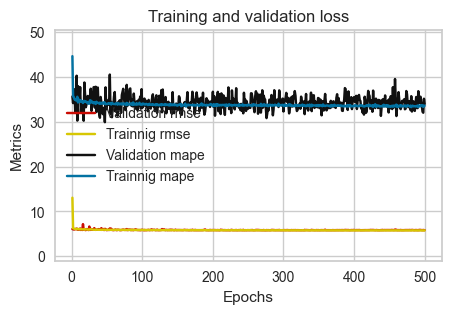

In [163]:
plotme(model8_1_3)

In [164]:
# inputs: distance + roadtypes distance
model8_1_5 = nnmodel_(100, num_hlayers=1,Epoch=500)
model8_1_5

Epoch 1/500
395/395 [==============================] - 1s 914us/step - loss: 161866.2969 - mape: 36.6043 - rmse: 402.3261 - val_loss: 133889.8594 - val_mape: 34.6855 - val_rmse: 365.9096
Epoch 2/500
395/395 [==============================] - 0s 770us/step - loss: 134561.2031 - mape: 35.1150 - rmse: 366.8258 - val_loss: 132756.7969 - val_mape: 37.0357 - val_rmse: 364.3581
Epoch 3/500
395/395 [==============================] - 0s 768us/step - loss: 133706.4844 - mape: 35.5012 - rmse: 365.6590 - val_loss: 525779.5625 - val_mape: 44.2037 - val_rmse: 725.1066
Epoch 4/500
395/395 [==============================] - 0s 765us/step - loss: 326937.3438 - mape: 43.6747 - rmse: 571.7844 - val_loss: 127423.6484 - val_mape: 32.2915 - val_rmse: 356.9645
Epoch 5/500
395/395 [==============================] - 0s 771us/step - loss: 128062.9141 - mape: 34.0871 - rmse: 357.8588 - val_loss: 125441.4922 - val_mape: 36.7543 - val_rmse: 354.1772
Epoch 6/500
395/395 [==============================] - 0s 764us/s

Epoch 45/500
395/395 [==============================] - 0s 757us/step - loss: 126854.1641 - mape: 34.2506 - rmse: 356.1659 - val_loss: 137791.2188 - val_mape: 39.2994 - val_rmse: 371.2024
Epoch 46/500
395/395 [==============================] - 0s 739us/step - loss: 128424.7891 - mape: 34.4235 - rmse: 358.3640 - val_loss: 130325.6484 - val_mape: 33.5780 - val_rmse: 361.0064
Epoch 47/500
395/395 [==============================] - 0s 747us/step - loss: 126697.6562 - mape: 34.0892 - rmse: 355.9461 - val_loss: 126526.2734 - val_mape: 34.0895 - val_rmse: 355.7053
Epoch 48/500
395/395 [==============================] - 0s 750us/step - loss: 124763.3438 - mape: 34.0519 - rmse: 353.2185 - val_loss: 125202.7969 - val_mape: 33.4926 - val_rmse: 353.8401
Epoch 49/500
395/395 [==============================] - 0s 757us/step - loss: 126622.4531 - mape: 34.3930 - rmse: 355.8405 - val_loss: 126925.6172 - val_mape: 36.6247 - val_rmse: 356.2662
Epoch 50/500
395/395 [==============================] - 0s 7

395/395 [==============================] - 0s 752us/step - loss: 122391.9531 - mape: 33.7055 - rmse: 349.8456 - val_loss: 123581.4141 - val_mape: 34.4239 - val_rmse: 351.5415
Epoch 132/500
395/395 [==============================] - 0s 753us/step - loss: 121128.1016 - mape: 33.7374 - rmse: 348.0346 - val_loss: 122480.7422 - val_mape: 35.1482 - val_rmse: 349.9725
Epoch 133/500
395/395 [==============================] - 0s 763us/step - loss: 120793.3359 - mape: 33.6506 - rmse: 347.5533 - val_loss: 121903.8750 - val_mape: 35.1625 - val_rmse: 349.1474
Epoch 134/500
395/395 [==============================] - 0s 752us/step - loss: 120960.4688 - mape: 33.6628 - rmse: 347.7937 - val_loss: 123005.7578 - val_mape: 32.4647 - val_rmse: 350.7218
Epoch 135/500
395/395 [==============================] - 0s 753us/step - loss: 121853.6328 - mape: 33.7522 - rmse: 349.0754 - val_loss: 123889.6797 - val_mape: 36.9822 - val_rmse: 351.9796
Epoch 136/500
395/395 [==============================] - 0s 761us/ste

395/395 [==============================] - 0s 761us/step - loss: 120415.1094 - mape: 33.5640 - rmse: 347.0088 - val_loss: 122506.4766 - val_mape: 33.2892 - val_rmse: 350.0092
Epoch 218/500
395/395 [==============================] - 0s 748us/step - loss: 119803.7266 - mape: 33.5425 - rmse: 346.1267 - val_loss: 123047.6094 - val_mape: 34.9761 - val_rmse: 350.7814
Epoch 219/500
395/395 [==============================] - 0s 752us/step - loss: 119690.1797 - mape: 33.4888 - rmse: 345.9627 - val_loss: 127394.2969 - val_mape: 37.2728 - val_rmse: 356.9234
Epoch 220/500
395/395 [==============================] - 0s 752us/step - loss: 119940.9609 - mape: 33.6784 - rmse: 346.3249 - val_loss: 125396.4922 - val_mape: 31.8142 - val_rmse: 354.1137
Epoch 221/500
395/395 [==============================] - 0s 760us/step - loss: 119527.3203 - mape: 33.3171 - rmse: 345.7272 - val_loss: 122885.0234 - val_mape: 36.1147 - val_rmse: 350.5496
Epoch 222/500
395/395 [==============================] - 0s 757us/ste

395/395 [==============================] - 0s 757us/step - loss: 120143.6719 - mape: 33.4760 - rmse: 346.6175 - val_loss: 123364.7422 - val_mape: 36.2604 - val_rmse: 351.2332
Epoch 304/500
395/395 [==============================] - 0s 757us/step - loss: 119776.5156 - mape: 33.5463 - rmse: 346.0874 - val_loss: 122392.6484 - val_mape: 32.1658 - val_rmse: 349.8466
Epoch 305/500
395/395 [==============================] - 0s 754us/step - loss: 119854.8828 - mape: 33.5514 - rmse: 346.2007 - val_loss: 122112.0391 - val_mape: 34.6281 - val_rmse: 349.4453
Epoch 306/500
395/395 [==============================] - 0s 762us/step - loss: 119330.7344 - mape: 33.5531 - rmse: 345.4428 - val_loss: 122968.6250 - val_mape: 32.1560 - val_rmse: 350.6688
Epoch 307/500
395/395 [==============================] - 0s 760us/step - loss: 119609.7578 - mape: 33.2646 - rmse: 345.8464 - val_loss: 123361.7656 - val_mape: 36.4342 - val_rmse: 351.2289
Epoch 308/500
395/395 [==============================] - 0s 762us/ste

395/395 [==============================] - 0s 782us/step - loss: 119270.7266 - mape: 33.3060 - rmse: 345.3560 - val_loss: 123159.0625 - val_mape: 35.1147 - val_rmse: 350.9402
Epoch 390/500
395/395 [==============================] - 0s 746us/step - loss: 119104.0312 - mape: 33.5763 - rmse: 345.1145 - val_loss: 122267.8906 - val_mape: 34.2692 - val_rmse: 349.6682
Epoch 391/500
395/395 [==============================] - 0s 759us/step - loss: 119215.7891 - mape: 33.3531 - rmse: 345.2764 - val_loss: 122753.6875 - val_mape: 35.6278 - val_rmse: 350.3622
Epoch 392/500
395/395 [==============================] - 0s 763us/step - loss: 119188.8125 - mape: 33.4014 - rmse: 345.2373 - val_loss: 122707.8047 - val_mape: 35.3452 - val_rmse: 350.2968
Epoch 393/500
395/395 [==============================] - 0s 740us/step - loss: 118647.3906 - mape: 33.3393 - rmse: 344.4523 - val_loss: 125121.9688 - val_mape: 38.4117 - val_rmse: 353.7258
Epoch 394/500
395/395 [==============================] - 0s 775us/ste

395/395 [==============================] - 0s 754us/step - loss: 118672.4375 - mape: 33.3606 - rmse: 344.4886 - val_loss: 122476.7500 - val_mape: 35.4620 - val_rmse: 349.9668
Epoch 476/500
395/395 [==============================] - 0s 753us/step - loss: 118698.8828 - mape: 33.3441 - rmse: 344.5270 - val_loss: 121919.9531 - val_mape: 35.0042 - val_rmse: 349.1704
Epoch 477/500
395/395 [==============================] - 0s 752us/step - loss: 119008.3594 - mape: 33.5045 - rmse: 344.9759 - val_loss: 122690.7891 - val_mape: 34.4479 - val_rmse: 350.2725
Epoch 478/500
395/395 [==============================] - 0s 752us/step - loss: 118457.4766 - mape: 33.3545 - rmse: 344.1765 - val_loss: 123151.0547 - val_mape: 35.4167 - val_rmse: 350.9288
Epoch 479/500
395/395 [==============================] - 0s 751us/step - loss: 118755.1953 - mape: 33.4367 - rmse: 344.6088 - val_loss: 123466.2500 - val_mape: 32.0024 - val_rmse: 351.3777
Epoch 480/500
395/395 [==============================] - 0s 763us/ste

In [165]:
# inputs: distance + roadtypes distance
model8_1_1 = nnmodel_(100,50, num_hlayers=2,Epoch=500)
model8_1_1

Epoch 1/500
395/395 [==============================] - 1s 942us/step - loss: 299244.6562 - mape: 40.0135 - rmse: 547.0326 - val_loss: 133072.9375 - val_mape: 35.1068 - val_rmse: 364.7916
Epoch 2/500
395/395 [==============================] - 0s 799us/step - loss: 147240.3125 - mape: 36.0384 - rmse: 383.7191 - val_loss: 127001.8125 - val_mape: 35.1622 - val_rmse: 356.3731
Epoch 3/500
395/395 [==============================] - 0s 801us/step - loss: 143153.0312 - mape: 35.4404 - rmse: 378.3557 - val_loss: 128910.7734 - val_mape: 37.8161 - val_rmse: 359.0415
Epoch 4/500
395/395 [==============================] - 0s 815us/step - loss: 138478.2031 - mape: 35.4613 - rmse: 372.1266 - val_loss: 141115.4375 - val_mape: 30.6627 - val_rmse: 375.6534
Epoch 5/500
395/395 [==============================] - 0s 798us/step - loss: 131596.0469 - mape: 34.5817 - rmse: 362.7617 - val_loss: 880561.7500 - val_mape: 57.9624 - val_rmse: 938.3825
Epoch 6/500
395/395 [==============================] - 0s 814us/s

Epoch 45/500
395/395 [==============================] - 0s 799us/step - loss: 122135.5312 - mape: 33.6702 - rmse: 349.4789 - val_loss: 122461.8906 - val_mape: 33.9794 - val_rmse: 349.9456
Epoch 46/500
395/395 [==============================] - 0s 795us/step - loss: 121237.3906 - mape: 33.6751 - rmse: 348.1916 - val_loss: 128968.7500 - val_mape: 31.9639 - val_rmse: 359.1222
Epoch 47/500
395/395 [==============================] - 0s 813us/step - loss: 121840.5703 - mape: 33.7560 - rmse: 349.0567 - val_loss: 122248.3359 - val_mape: 34.0109 - val_rmse: 349.6403
Epoch 48/500
395/395 [==============================] - 0s 787us/step - loss: 121491.6953 - mape: 33.7384 - rmse: 348.5566 - val_loss: 122301.3203 - val_mape: 33.3142 - val_rmse: 349.7161
Epoch 49/500
395/395 [==============================] - 0s 808us/step - loss: 121421.7266 - mape: 33.8461 - rmse: 348.4562 - val_loss: 121831.4922 - val_mape: 33.0280 - val_rmse: 349.0437
Epoch 50/500
395/395 [==============================] - 0s 8

395/395 [==============================] - 0s 789us/step - loss: 118758.8906 - mape: 33.2095 - rmse: 344.6141 - val_loss: 123176.3750 - val_mape: 37.8205 - val_rmse: 350.9649
Epoch 132/500
395/395 [==============================] - 0s 792us/step - loss: 119605.8516 - mape: 33.4918 - rmse: 345.8408 - val_loss: 122315.9688 - val_mape: 31.8799 - val_rmse: 349.7370
Epoch 133/500
395/395 [==============================] - 0s 799us/step - loss: 119541.9297 - mape: 33.4398 - rmse: 345.7484 - val_loss: 122972.7422 - val_mape: 35.0173 - val_rmse: 350.6747
Epoch 134/500
395/395 [==============================] - 0s 799us/step - loss: 119044.5547 - mape: 33.4233 - rmse: 345.0284 - val_loss: 123659.4062 - val_mape: 36.2405 - val_rmse: 351.6524
Epoch 135/500
395/395 [==============================] - 0s 806us/step - loss: 118508.3672 - mape: 33.2555 - rmse: 344.2505 - val_loss: 123392.8047 - val_mape: 35.7081 - val_rmse: 351.2731
Epoch 136/500
395/395 [==============================] - 0s 797us/ste

395/395 [==============================] - 0s 804us/step - loss: 117460.7266 - mape: 33.0112 - rmse: 342.7254 - val_loss: 123641.6875 - val_mape: 35.2310 - val_rmse: 351.6272
Epoch 218/500
395/395 [==============================] - 0s 808us/step - loss: 117356.2344 - mape: 33.1985 - rmse: 342.5730 - val_loss: 125768.2578 - val_mape: 34.8439 - val_rmse: 354.6382
Epoch 219/500
395/395 [==============================] - 0s 812us/step - loss: 117357.0625 - mape: 33.0734 - rmse: 342.5742 - val_loss: 124445.0703 - val_mape: 35.9521 - val_rmse: 352.7677
Epoch 220/500
395/395 [==============================] - 0s 797us/step - loss: 117507.8984 - mape: 33.0322 - rmse: 342.7943 - val_loss: 122371.2109 - val_mape: 35.3375 - val_rmse: 349.8160
Epoch 221/500
395/395 [==============================] - 0s 793us/step - loss: 117773.6641 - mape: 33.1540 - rmse: 343.1817 - val_loss: 122315.3750 - val_mape: 33.6441 - val_rmse: 349.7361
Epoch 222/500
395/395 [==============================] - 0s 819us/ste

395/395 [==============================] - 0s 794us/step - loss: 116328.5000 - mape: 32.7390 - rmse: 341.0696 - val_loss: 122489.5078 - val_mape: 35.6946 - val_rmse: 349.9850
Epoch 304/500
395/395 [==============================] - 0s 767us/step - loss: 116635.0938 - mape: 33.0812 - rmse: 341.5188 - val_loss: 123694.8516 - val_mape: 32.4248 - val_rmse: 351.7028
Epoch 305/500
395/395 [==============================] - 0s 806us/step - loss: 116532.1328 - mape: 32.6938 - rmse: 341.3680 - val_loss: 124028.0078 - val_mape: 34.9153 - val_rmse: 352.1761
Epoch 306/500
395/395 [==============================] - 0s 793us/step - loss: 116129.8906 - mape: 32.7159 - rmse: 340.7784 - val_loss: 127348.1562 - val_mape: 36.2370 - val_rmse: 356.8587
Epoch 307/500
395/395 [==============================] - 0s 793us/step - loss: 116427.3203 - mape: 32.9897 - rmse: 341.2145 - val_loss: 126736.7031 - val_mape: 34.2398 - val_rmse: 356.0010
Epoch 308/500
395/395 [==============================] - 0s 799us/ste

395/395 [==============================] - 0s 791us/step - loss: 115528.6172 - mape: 32.6379 - rmse: 339.8950 - val_loss: 123856.7969 - val_mape: 32.7661 - val_rmse: 351.9330
Epoch 390/500
395/395 [==============================] - 0s 783us/step - loss: 115592.5547 - mape: 32.7058 - rmse: 339.9890 - val_loss: 123730.2812 - val_mape: 32.9135 - val_rmse: 351.7531
Epoch 391/500
395/395 [==============================] - 0s 809us/step - loss: 115734.7266 - mape: 32.7031 - rmse: 340.1981 - val_loss: 123397.6016 - val_mape: 33.6957 - val_rmse: 351.2799
Epoch 392/500
395/395 [==============================] - 0s 798us/step - loss: 115561.6406 - mape: 32.6338 - rmse: 339.9436 - val_loss: 123740.2969 - val_mape: 33.8334 - val_rmse: 351.7674
Epoch 393/500
395/395 [==============================] - 0s 795us/step - loss: 115797.7500 - mape: 32.4864 - rmse: 340.2907 - val_loss: 124661.3516 - val_mape: 35.0653 - val_rmse: 353.0742
Epoch 394/500
395/395 [==============================] - 0s 818us/ste

395/395 [==============================] - 0s 798us/step - loss: 114596.9219 - mape: 32.4921 - rmse: 338.5217 - val_loss: 123667.0625 - val_mape: 33.8684 - val_rmse: 351.6633
Epoch 476/500
395/395 [==============================] - 0s 804us/step - loss: 114970.9922 - mape: 32.5939 - rmse: 339.0737 - val_loss: 124950.8750 - val_mape: 35.3347 - val_rmse: 353.4839
Epoch 477/500
395/395 [==============================] - 0s 818us/step - loss: 114757.1953 - mape: 32.6875 - rmse: 338.7583 - val_loss: 124279.5859 - val_mape: 31.8531 - val_rmse: 352.5331
Epoch 478/500
395/395 [==============================] - 0s 802us/step - loss: 115084.3750 - mape: 32.4238 - rmse: 339.2409 - val_loss: 124082.8125 - val_mape: 35.3711 - val_rmse: 352.2539
Epoch 479/500
395/395 [==============================] - 0s 808us/step - loss: 114695.3203 - mape: 32.4449 - rmse: 338.6670 - val_loss: 124523.6953 - val_mape: 35.8867 - val_rmse: 352.8792
Epoch 480/500
395/395 [==============================] - 0s 771us/ste

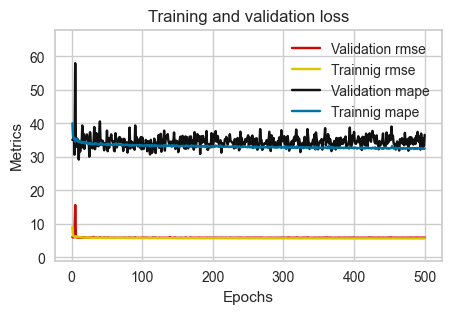

In [166]:
plotme(model8_1_1)

In [167]:
# inputs: distance + hour + roadtypes distance
model8_1_2 = nnmodel_(200,100, num_hlayers=2,Epoch=500)
model8_1_2

Epoch 1/500
395/395 [==============================] - 1s 1ms/step - loss: 170969.3906 - mape: 37.3752 - rmse: 413.4844 - val_loss: 156034.3281 - val_mape: 33.1868 - val_rmse: 395.0118
Epoch 2/500
395/395 [==============================] - 0s 915us/step - loss: 157847.4219 - mape: 36.3512 - rmse: 397.3002 - val_loss: 139112.9375 - val_mape: 34.9467 - val_rmse: 372.9785
Epoch 3/500
395/395 [==============================] - 0s 950us/step - loss: 149294.1562 - mape: 35.8223 - rmse: 386.3860 - val_loss: 148082.9531 - val_mape: 38.6301 - val_rmse: 384.8155
Epoch 4/500
395/395 [==============================] - 0s 921us/step - loss: 139914.4688 - mape: 35.1343 - rmse: 374.0514 - val_loss: 128481.9375 - val_mape: 38.2380 - val_rmse: 358.4438
Epoch 5/500
395/395 [==============================] - 0s 903us/step - loss: 141580.5469 - mape: 35.2370 - rmse: 376.2719 - val_loss: 127692.4141 - val_mape: 38.1395 - val_rmse: 357.3408
Epoch 6/500
395/395 [==============================] - 0s 912us/ste

Epoch 45/500
395/395 [==============================] - 0s 931us/step - loss: 121539.9453 - mape: 33.6794 - rmse: 348.6258 - val_loss: 122350.2500 - val_mape: 36.4086 - val_rmse: 349.7860
Epoch 46/500
395/395 [==============================] - 0s 902us/step - loss: 121687.2891 - mape: 33.8194 - rmse: 348.8371 - val_loss: 123322.7500 - val_mape: 36.0652 - val_rmse: 351.1734
Epoch 47/500
395/395 [==============================] - 0s 922us/step - loss: 121888.4922 - mape: 33.8016 - rmse: 349.1253 - val_loss: 122623.3125 - val_mape: 33.5097 - val_rmse: 350.1761
Epoch 48/500
395/395 [==============================] - 0s 899us/step - loss: 122035.6875 - mape: 33.8639 - rmse: 349.3361 - val_loss: 122492.0078 - val_mape: 35.4869 - val_rmse: 349.9886
Epoch 49/500
395/395 [==============================] - 0s 905us/step - loss: 120972.3203 - mape: 33.6563 - rmse: 347.8108 - val_loss: 122805.8438 - val_mape: 36.5614 - val_rmse: 350.4366
Epoch 50/500
395/395 [==============================] - 0s 9

395/395 [==============================] - 0s 900us/step - loss: 119294.0391 - mape: 33.2495 - rmse: 345.3897 - val_loss: 123357.2188 - val_mape: 35.4040 - val_rmse: 351.2225
Epoch 132/500
395/395 [==============================] - 0s 910us/step - loss: 118801.4062 - mape: 33.4703 - rmse: 344.6758 - val_loss: 125272.0312 - val_mape: 32.4489 - val_rmse: 353.9379
Epoch 133/500
395/395 [==============================] - 0s 926us/step - loss: 118885.1641 - mape: 33.1359 - rmse: 344.7973 - val_loss: 122492.3281 - val_mape: 33.4914 - val_rmse: 349.9890
Epoch 134/500
395/395 [==============================] - 0s 924us/step - loss: 119352.7812 - mape: 33.5140 - rmse: 345.4747 - val_loss: 122213.2188 - val_mape: 34.0441 - val_rmse: 349.5901
Epoch 135/500
395/395 [==============================] - 0s 921us/step - loss: 118963.4219 - mape: 33.2203 - rmse: 344.9107 - val_loss: 124532.4062 - val_mape: 36.5739 - val_rmse: 352.8915
Epoch 136/500
395/395 [==============================] - 0s 928us/ste

395/395 [==============================] - 0s 898us/step - loss: 118261.0781 - mape: 33.0729 - rmse: 343.8911 - val_loss: 124404.6328 - val_mape: 34.9572 - val_rmse: 352.7104
Epoch 218/500
395/395 [==============================] - 0s 904us/step - loss: 118354.2500 - mape: 33.1032 - rmse: 344.0265 - val_loss: 122714.1562 - val_mape: 34.7845 - val_rmse: 350.3058
Epoch 219/500
395/395 [==============================] - 0s 909us/step - loss: 117817.0859 - mape: 33.1307 - rmse: 343.2449 - val_loss: 122292.9688 - val_mape: 33.0961 - val_rmse: 349.7041
Epoch 220/500
395/395 [==============================] - 0s 908us/step - loss: 117552.7500 - mape: 32.9795 - rmse: 342.8597 - val_loss: 122711.7109 - val_mape: 36.2109 - val_rmse: 350.3023
Epoch 221/500
395/395 [==============================] - 0s 929us/step - loss: 117776.2031 - mape: 33.1846 - rmse: 343.1854 - val_loss: 122157.9375 - val_mape: 33.8486 - val_rmse: 349.5110
Epoch 222/500
395/395 [==============================] - 0s 891us/ste

395/395 [==============================] - 0s 916us/step - loss: 116565.4922 - mape: 32.8978 - rmse: 341.4169 - val_loss: 126007.2891 - val_mape: 34.7044 - val_rmse: 354.9751
Epoch 304/500
395/395 [==============================] - 0s 898us/step - loss: 116724.1250 - mape: 33.0059 - rmse: 341.6491 - val_loss: 122724.7734 - val_mape: 32.5797 - val_rmse: 350.3210
Epoch 305/500
395/395 [==============================] - 0s 908us/step - loss: 116557.9375 - mape: 32.8224 - rmse: 341.4058 - val_loss: 122513.5156 - val_mape: 33.1918 - val_rmse: 350.0193
Epoch 306/500
395/395 [==============================] - 0s 895us/step - loss: 116476.5156 - mape: 32.6292 - rmse: 341.2866 - val_loss: 122719.3516 - val_mape: 35.7618 - val_rmse: 350.3132
Epoch 307/500
395/395 [==============================] - 0s 912us/step - loss: 116742.8438 - mape: 32.7657 - rmse: 341.6765 - val_loss: 123853.7734 - val_mape: 36.2916 - val_rmse: 351.9286
Epoch 308/500
395/395 [==============================] - 0s 904us/ste

395/395 [==============================] - 0s 918us/step - loss: 116254.9219 - mape: 32.7587 - rmse: 340.9618 - val_loss: 122588.4375 - val_mape: 34.8423 - val_rmse: 350.1263
Epoch 390/500
395/395 [==============================] - 0s 947us/step - loss: 116259.8281 - mape: 32.8343 - rmse: 340.9690 - val_loss: 122943.6016 - val_mape: 34.1358 - val_rmse: 350.6331
Epoch 391/500
395/395 [==============================] - 0s 927us/step - loss: 115542.2812 - mape: 32.6429 - rmse: 339.9151 - val_loss: 124643.0469 - val_mape: 34.3487 - val_rmse: 353.0482
Epoch 392/500
395/395 [==============================] - 0s 921us/step - loss: 115943.1953 - mape: 32.7777 - rmse: 340.5043 - val_loss: 122861.7500 - val_mape: 33.8610 - val_rmse: 350.5164
Epoch 393/500
395/395 [==============================] - 0s 915us/step - loss: 115660.3906 - mape: 32.5487 - rmse: 340.0888 - val_loss: 123392.8438 - val_mape: 35.6893 - val_rmse: 351.2732
Epoch 394/500
395/395 [==============================] - 0s 921us/ste

395/395 [==============================] - 0s 924us/step - loss: 115982.9609 - mape: 32.5925 - rmse: 340.5627 - val_loss: 123671.8438 - val_mape: 34.4294 - val_rmse: 351.6701
Epoch 476/500
395/395 [==============================] - 0s 905us/step - loss: 114979.0000 - mape: 32.4887 - rmse: 339.0855 - val_loss: 122944.4453 - val_mape: 33.4750 - val_rmse: 350.6343
Epoch 477/500
395/395 [==============================] - 0s 893us/step - loss: 115786.8828 - mape: 32.7079 - rmse: 340.2747 - val_loss: 124242.8594 - val_mape: 34.0093 - val_rmse: 352.4810
Epoch 478/500
395/395 [==============================] - 0s 911us/step - loss: 115202.5781 - mape: 32.7643 - rmse: 339.4150 - val_loss: 123822.7578 - val_mape: 32.3248 - val_rmse: 351.8846
Epoch 479/500
395/395 [==============================] - 0s 918us/step - loss: 114848.8438 - mape: 32.3150 - rmse: 338.8936 - val_loss: 126344.0156 - val_mape: 35.4153 - val_rmse: 355.4490
Epoch 480/500
395/395 [==============================] - 0s 907us/ste

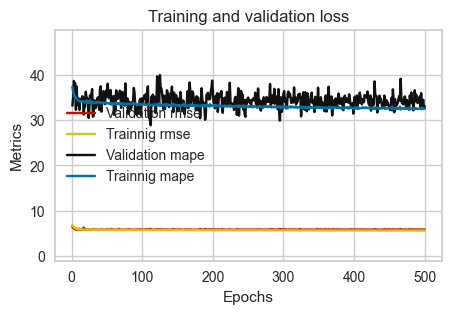

In [168]:
plotme(model8_1_2)

In [169]:
# inputs: distance + roadtypes distance
model8_1_4 = nnmodel_(10, num_hlayers=1,Epoch=500)
model8_1_4

Epoch 1/500
395/395 [==============================] - 1s 913us/step - loss: 311771.8125 - mape: 47.1673 - rmse: 558.3653 - val_loss: 140489.5781 - val_mape: 37.1961 - val_rmse: 374.8194
Epoch 2/500
395/395 [==============================] - 0s 736us/step - loss: 143970.2188 - mape: 35.9217 - rmse: 379.4341 - val_loss: 134710.7344 - val_mape: 35.9950 - val_rmse: 367.0296
Epoch 3/500
395/395 [==============================] - 0s 761us/step - loss: 139571.4375 - mape: 35.9345 - rmse: 373.5926 - val_loss: 131470.3281 - val_mape: 37.3271 - val_rmse: 362.5884
Epoch 4/500
395/395 [==============================] - 0s 753us/step - loss: 138434.6875 - mape: 36.2267 - rmse: 372.0681 - val_loss: 129336.8984 - val_mape: 34.5536 - val_rmse: 359.6344
Epoch 5/500
395/395 [==============================] - 0s 736us/step - loss: 136271.0469 - mape: 35.4041 - rmse: 369.1491 - val_loss: 134142.6250 - val_mape: 36.3420 - val_rmse: 366.2549
Epoch 6/500
395/395 [==============================] - 0s 719us/s

Epoch 45/500
395/395 [==============================] - 0s 723us/step - loss: 133324.5938 - mape: 35.8971 - rmse: 365.1364 - val_loss: 128085.6172 - val_mape: 36.2131 - val_rmse: 357.8905
Epoch 46/500
395/395 [==============================] - 0s 743us/step - loss: 132865.8750 - mape: 35.8110 - rmse: 364.5077 - val_loss: 126866.2500 - val_mape: 35.9925 - val_rmse: 356.1829
Epoch 47/500
395/395 [==============================] - 0s 734us/step - loss: 130531.7734 - mape: 35.7349 - rmse: 361.2918 - val_loss: 126123.1875 - val_mape: 35.0140 - val_rmse: 355.1383
Epoch 48/500
395/395 [==============================] - 0s 762us/step - loss: 132470.6250 - mape: 35.4954 - rmse: 363.9651 - val_loss: 130107.0547 - val_mape: 38.3927 - val_rmse: 360.7036
Epoch 49/500
395/395 [==============================] - 0s 739us/step - loss: 131541.1094 - mape: 35.7558 - rmse: 362.6860 - val_loss: 129417.8750 - val_mape: 34.7622 - val_rmse: 359.7469
Epoch 50/500
395/395 [==============================] - 0s 7

395/395 [==============================] - 0s 763us/step - loss: 126206.0312 - mape: 34.2344 - rmse: 355.2549 - val_loss: 125519.1562 - val_mape: 35.7037 - val_rmse: 354.2868
Epoch 132/500
395/395 [==============================] - 0s 723us/step - loss: 125513.4062 - mape: 34.4851 - rmse: 354.2787 - val_loss: 125449.7969 - val_mape: 34.2390 - val_rmse: 354.1889
Epoch 133/500
395/395 [==============================] - 0s 706us/step - loss: 125317.5000 - mape: 34.5026 - rmse: 354.0021 - val_loss: 124921.2422 - val_mape: 33.6943 - val_rmse: 353.4420
Epoch 134/500
395/395 [==============================] - 0s 736us/step - loss: 125285.6172 - mape: 34.1542 - rmse: 353.9571 - val_loss: 125217.8906 - val_mape: 36.6579 - val_rmse: 353.8614
Epoch 135/500
395/395 [==============================] - 0s 711us/step - loss: 125313.3438 - mape: 34.4475 - rmse: 353.9962 - val_loss: 124980.7031 - val_mape: 34.0457 - val_rmse: 353.5261
Epoch 136/500
395/395 [==============================] - 0s 751us/ste

395/395 [==============================] - 0s 738us/step - loss: 124437.5391 - mape: 34.0505 - rmse: 352.7570 - val_loss: 125011.7188 - val_mape: 35.8866 - val_rmse: 353.5700
Epoch 218/500
395/395 [==============================] - 0s 693us/step - loss: 124371.5000 - mape: 34.0658 - rmse: 352.6635 - val_loss: 128136.5156 - val_mape: 37.1012 - val_rmse: 357.9616
Epoch 219/500
395/395 [==============================] - 0s 704us/step - loss: 124318.5859 - mape: 34.1629 - rmse: 352.5884 - val_loss: 126787.7969 - val_mape: 36.5939 - val_rmse: 356.0728
Epoch 220/500
395/395 [==============================] - 0s 726us/step - loss: 124423.2812 - mape: 33.9780 - rmse: 352.7368 - val_loss: 127303.8047 - val_mape: 33.5902 - val_rmse: 356.7966
Epoch 221/500
395/395 [==============================] - 0s 724us/step - loss: 124510.2969 - mape: 34.0544 - rmse: 352.8602 - val_loss: 127886.5156 - val_mape: 33.5681 - val_rmse: 357.6122
Epoch 222/500
395/395 [==============================] - 0s 722us/ste

395/395 [==============================] - 0s 724us/step - loss: 123254.5000 - mape: 33.9017 - rmse: 351.0762 - val_loss: 124226.7891 - val_mape: 34.5324 - val_rmse: 352.4582
Epoch 304/500
395/395 [==============================] - 0s 737us/step - loss: 122987.4766 - mape: 33.8541 - rmse: 350.6957 - val_loss: 123574.6641 - val_mape: 35.3791 - val_rmse: 351.5319
Epoch 305/500
395/395 [==============================] - 0s 760us/step - loss: 123459.6719 - mape: 34.2454 - rmse: 351.3683 - val_loss: 123560.3047 - val_mape: 33.3092 - val_rmse: 351.5114
Epoch 306/500
395/395 [==============================] - 0s 729us/step - loss: 123351.2109 - mape: 33.8643 - rmse: 351.2139 - val_loss: 123697.0078 - val_mape: 34.7142 - val_rmse: 351.7058
Epoch 307/500
395/395 [==============================] - 0s 738us/step - loss: 123547.8203 - mape: 34.0277 - rmse: 351.4937 - val_loss: 123493.0625 - val_mape: 33.5809 - val_rmse: 351.4158
Epoch 308/500
395/395 [==============================] - 0s 717us/ste

395/395 [==============================] - 0s 693us/step - loss: 122580.3281 - mape: 33.8085 - rmse: 350.1147 - val_loss: 123868.8125 - val_mape: 35.1920 - val_rmse: 351.9500
Epoch 390/500
395/395 [==============================] - 0s 719us/step - loss: 122773.3906 - mape: 33.9902 - rmse: 350.3904 - val_loss: 123790.0547 - val_mape: 34.8984 - val_rmse: 351.8381
Epoch 391/500
395/395 [==============================] - 0s 715us/step - loss: 123013.3203 - mape: 33.7650 - rmse: 350.7325 - val_loss: 124032.3281 - val_mape: 35.1996 - val_rmse: 352.1823
Epoch 392/500
395/395 [==============================] - 0s 712us/step - loss: 122815.1250 - mape: 33.8627 - rmse: 350.4499 - val_loss: 123697.4375 - val_mape: 35.0971 - val_rmse: 351.7065
Epoch 393/500
395/395 [==============================] - 0s 720us/step - loss: 122696.9766 - mape: 33.9904 - rmse: 350.2813 - val_loss: 124195.7656 - val_mape: 35.4333 - val_rmse: 352.4142
Epoch 394/500
395/395 [==============================] - 0s 720us/ste

395/395 [==============================] - 0s 736us/step - loss: 122404.6953 - mape: 34.0401 - rmse: 349.8638 - val_loss: 126974.1953 - val_mape: 32.4539 - val_rmse: 356.3344
Epoch 476/500
395/395 [==============================] - 0s 736us/step - loss: 122276.9609 - mape: 33.7649 - rmse: 349.6812 - val_loss: 124265.8828 - val_mape: 33.5669 - val_rmse: 352.5137
Epoch 477/500
395/395 [==============================] - 0s 730us/step - loss: 122528.7266 - mape: 33.8909 - rmse: 350.0410 - val_loss: 123469.9922 - val_mape: 34.6251 - val_rmse: 351.3830
Epoch 478/500
395/395 [==============================] - 0s 749us/step - loss: 122463.2969 - mape: 33.8975 - rmse: 349.9476 - val_loss: 123354.2344 - val_mape: 34.4892 - val_rmse: 351.2182
Epoch 479/500
395/395 [==============================] - 0s 734us/step - loss: 122390.8047 - mape: 33.7820 - rmse: 349.8440 - val_loss: 123572.2266 - val_mape: 34.4319 - val_rmse: 351.5284
Epoch 480/500
395/395 [==============================] - 0s 683us/ste